In [1]:
#importing libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import roc_auc_score

In [2]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import accuracy_score

In [3]:
#download data
data = pd.read_excel("C:\\Users\\saido\\Downloads\\Arvand_Zypl.xlsx")

In [4]:
data.head(3)

KOD             Birthday    Year  Married   Gender Nationality   Educ  \
0   124017  1989-03-13 00:00:00     NaN  Оиладор  Мужской       Точик  Миёна   
1  1046052  1963-02-12 00:00:00     NaN  Оиладор  Женский       Точик  Миёна   
2  1046519  1969-01-12 00:00:00  1969.0  Оиладор  Мужской       Узбек  Миёна   

  FamilySize BusExper  Filial             Region  \
0          4        5  Хучанд                Ашт   
1          6      NaN  Хучанд           Кистакуз   
2          4        1  Хучанд  Худжанд-Панчшанбе   

  Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)  \
0                                             Бовари                                              
1                                             Бовари                                              
2                                                VIP                                              

    Навпреление деятельности                                     Продукт  \
0  Чорводори ва коркарди шир  Кредит на предпринимательскую деятельность   
1       Приобретение техники                      Потребительский кредит   
2  Чорводори ва коркарди шир  Кредит на предпринимательскую деятельность   

           Сектор Дата выдачи Валюта кредита  Сумма кредита  Срок кредита  \
0  Животноводство  2014-12-12         Сомони         3000.0            12   
1     Потребнужды  2014-01-15         Сомони         4000.0            18   
2  Животноводство  2014-01-03     Доллар США         1000.0            10   

  Дата окончания по графику  Ежемесячная сумма погашения по графику  \
0                2015-12-11                                  331.00   
1                2015-07-15                                  303.27   
2                2014-11-02                                  347.00   

   Льготный период (месяц)  \
0                      1.0   
1                      0.0   
2                      7.0   

  Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)  \
0                                        Категория 4                                                                                                
1                                        Категория 3                                                                                                
2                                             Группа                                                                                                

   Капитал    Актив  Обязательства  Дни просрочки  Максимальные дни просрочки  \
0   4670.0   5850.0            0.0              3                           3   
1  10219.0  10745.0          109.0              0                           0   
2   2196.0   2600.0          404.0              0                           0   

   Количество просрочек  Этап кредитования (который раз получает кредит  \
0                     1                                               1   
1                     0                                               1   
2                     0                                               9   

   Валовая прибыль  Чистая прибыль  
0           1000.0          1185.0  
1            851.0           417.0  
2            500.0           820.0

In [5]:
df = data.copy()

# Fixing some columns and Looking at Data

In [6]:
#в столбце 'FamilySize' есть значение 'Нет инфо', заменяем его на отсутствующее значение (NaN).
data['FamilySize'].replace({'Нет инфо': np.nan}, inplace=True)


In [7]:
# Преобразуем столбец 'Birthday' в формат даты, при этом устанавливаем NaN, если есть ошибки в данных.
data['Birthday'] = pd.to_datetime(data['Birthday'], errors='coerce')

# Вычисляем возраст, вычитая год рождения из текущего года (2014) и записываем результат в столбец 'Age'.
data['Age'] = 2014 - data['Birthday'].dt.year

In [8]:
data.head(1)

KOD   Birthday  Year  Married   Gender Nationality   Educ  FamilySize  \
0  124017 1989-03-13   NaN  Оиладор  Мужской       Точик  Миёна         4.0   

  BusExper  Filial Region  \
0        5  Хучанд    Ашт   

  Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)  \
0                                             Бовари                                              

    Навпреление деятельности                                     Продукт  \
0  Чорводори ва коркарди шир  Кредит на предпринимательскую деятельность   

           Сектор Дата выдачи Валюта кредита  Сумма кредита  Срок кредита  \
0  Животноводство  2014-12-12         Сомони         3000.0            12   

  Дата окончания по графику  Ежемесячная сумма погашения по графику  \
0                2015-12-11                                   331.0   

   Льготный период (месяц)  \
0                      1.0   

  Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)  \
0                                        Категория 4                                                                                                

   Капитал   Актив  Обязательства  Дни просрочки  Максимальные дни просрочки  \
0   4670.0  5850.0            0.0              3                           3   

   Количество просрочек  Этап кредитования (который раз получает кредит  \
0                     1                                               1   

   Валовая прибыль  Чистая прибыль   Age  
0           1000.0          1185.0  25.0

In [9]:
# Если возраст в столбце 'Age' равен NaN, заполняем его значением, 
#вычисленным как разница между текущим годом (2014) и годом из столбца 'Year'.
data['Age'] = np.where(pd.isnull(data['Age']), 2014 - data['Year'], data['Age'])


In [10]:
# Выводим уникальные значения столбца 'BusExper' в объекте данных 'data'.
data['BusExper'].unique()

array([5, nan, 1, 10, 15, 12, 11, 3, 19, 6, 8, 2, 18, 20, 30, 28, 25, 4,
       22, 26, 7, 23, 13, 16, 9, 40, 17, 34, 0, 14, 27, 50, 33, 29, 32,
       35, 44, '20+', 31, 38, 21, 49, 24, 42, 47, 45, 36, 39, '6мес',
       '6-мох', 46, 43, 1.5, 37, '1мох', 41, 2.5, 3.5, '4-мох', '8-мох',
       0.6, '6мох', 4.5, 48, '5 мох', '7-мох', 1.6, 0.8, 0.4, 0.7, 2.4,
       1.4, ',', 73, 215, 141, 'мир', 'ъолия', 123, 113, '4ё', 6.5, 100,
       1.1, 2.7, 1.3, '0.5', 2.3, 1.7, 0.5, 4.6, 75, 521, 60],
      dtype=object)

In [11]:
# Заменяем определенные значения в столбце 'BusExper'
data['BusExper'].replace({'20+' : '20', '6мес' : '0.6' , '6-мох' : '0.6','1мох' : '0.1', '4-мох' : '0.4', '8-мох' : '0.8','6мох' : '0.6','5 мох' : '0.5' , 
    '7-мох' : '0.7' , ',' : '0' , 'мир' : '0' , 'ъолия' : '0' , 
    '4ё' : '4' }, inplace = True)

In [12]:
#Заполняем пустые значения нулем 
data['BusExper'] = data['BusExper'].fillna(0)

In [13]:
#преобразуем столбец в формат float
data['BusExper'] = data['BusExper'].astype(float)

In [14]:
# заменяем значения больше 30 на 30.
data['BusExper'] = data['BusExper'].apply(lambda x: 30 if x > 30 else x)

In [15]:
#переименоваем столбец
data.rename(columns={'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)': 'Уровень клиента'}, inplace=True)

In [16]:
#переименоваем столбецы
data.rename(columns={'Продукт': 'Назначение'}, inplace=True)
data.rename(columns={'Навпреление деятельности': 'Цель Кредита'}, inplace=True)

In [17]:
# Заменяем определенные значения в столбце 'Цель Кредита'
data['Цель Кредита'].replace({'Чорводори ва коркарди шир' : 'животноводство и переработка молока', 'Савдо' : 'Торговля' , 'Хидматрасони' : 'Обслуживание','Истехсолот' : 'производство', 
    'Коркарди шир' : 'переработка молока' , 'Кишоварзи' : 'Сельское хозяйство' , 'Мевахушккуни' : 'Сушка фруктов' , 'Сушка фрутов': 'Сушка фруктов'}, inplace = True)

In [18]:
# Заменяем определенные значения в столбце 'Назначение' , 'Цель Кредита' , 'Сектор'
data['Назначение'].replace ({
    'Кредит на предпринимательскую деятельность': 'Бизнес-кредит',
    'Потребительский кредит': 'Потребительский кредит',
    'Жилищный кредит': 'Жилищный кредит',
    'Энергосберегающие технологии': 'Энергосберегающие проекты'
} , inplace = True)

data['Цель Кредита'].replace ({
    'животноводство и переработка молока': 'Животноводство и молочная продукция',
    'Приобретение техники': 'Кредит на технику',
    'Приобретение мебели': 'Кредит на мебель',
    'Ремонт дома': 'Кредит на ремонт дома',
    'Обслуживание': 'Обслуживание',
    'Оплата на лечение': 'Медицинский кредит',
    'производство': 'Производственный кредит',
    'Проведение мероприятий': 'Кредит на мероприятия',
    'Оплата поездок': 'Кредит на путешествия',
    'Переоборудование транспорта': 'Кредит на транспорт',
    'Покупка квартиры': 'Кредит на покупку жилья',
    'переработка молока': 'Переработка молока',
    'Оплата образования': 'Кредит на образование',
    'Ремонт места деятельности': 'Ремонт рабочего места',
    'Все': 'Универсальный кредит',
    'Потребнужды': 'Кредит на потребительские нужды',
    'Сельское хозяйство': 'Кредит на сельское хозяйство',
    'Животноводство': 'Кредит на животноводство',
    'Мевахушккуни': 'Кредит на сушку фруктов',
    'Коммерческий': 'Коммерческий кредит',
    'Потреб.другое': 'Другие потребительские кредиты'
}, inplace = True)

data['Сектор'].replace ({
    'Животноводство': 'Сектор животноводства',
    'Торговля': 'Сектор торговли',
    'Услуги': 'Сектор услуг',
    'Производство': 'Сектор производства',
    'Сельхозкультура (ТАФФ)': 'Сельское хозяйство (ТАФФ)',
    'Потреб Экспресс': 'Сектор экспресс-потребности',
    'Бизнес Экспресс': 'Сектор экспресс-бизнеса',
    'Зеленый кредит - Печки': 'Зеленый кредит - Печки',
    'Сельхозтехника (ТАФФ)': 'Сельхозтехника (ТАФФ)',
    'Мигрант': 'Кредит для мигрантов',
    'Покупка и строит-во жилья': 'Кредит на покупку и строительство жилья',
    'Ремонт жилья': 'Кредит на ремонт жилья',
    'Мигрант-Потреб 2': 'Кредит для мигрантов - Потребительский 2',
    'Старт-бизнес': 'Кредит на старт бизнеса',
    'KFW - Покупка и строит-во жилья': 'KFW - Кредит на покупку и строительство жилья',
    'KFW - Ремонт жилья': 'KFW - Кредит на ремонт жилья',
    'Зеленый кредит - Солнечные батареи': 'Зеленый кредит - Солнечные батареи',
    'Мигрант-бизнес 2': 'Кредит для мигрантов - Бизнес 2',
    'Товары в кредит': 'Кредит на покупку товаров',
    'Сельхозкультура-кредитная линия': 'Кредитная линия на сельское хозяйство',
    'Сельхозкультура (Сароб)': 'Сельское хозяйство (Сароб)'
} , inplace = True)

In [19]:
#переименоваем столбец
data.rename(columns={'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)': 'Залог'}, inplace=True)

In [20]:
#Заменяем определенные значения в столбце 'Цель Кредита'
data['Залог'].replace({'Категория 1' : 'недвижимость', 'Категория 2' : 'движимое имущество' , 'Категория 3' : 'поручительство','Категория 4' : 'без залога', 
    'Группа' : 'поручительство'}, inplace = True)

In [21]:
#переименоваем столбец
data.rename(columns={'Этап кредитования (который раз получает кредит': 'Количество кредитных историй'}, inplace=True)

In [22]:
# Умножаем столбец 'Сумма кредита' на соответствующий курс в зависимости от валюты кредита.
cur = {'Доллар США': 5.63, 'Рос.рубль': 0.115 , 'Сомони' : 1}

data['Сумма кредита'] *= data['Валюта кредита'].map(cur)

In [23]:
#убираем некоторые строки
data = data[data['Nationality'].isin(['Карис', 'Карачои']) == False]

In [24]:
#заполняем пустые значения модой
data['Назначение'].fillna(data['Назначение'].mode()[0], inplace=True)

In [25]:
# оставляем только те строки где возраст находится в диапазоне от 18 до 80 лет
data = data[(data['Age'] <= 80) & (data['Age'] >= 18)]

# Deleting some columns and Adding new column

In [26]:
#удаляем некоторые переменные
data = data.drop(['KOD', 'Birthday', 'Year', 'Сектор', 'Дата выдачи' , 'Дата окончания по графику',
                 'Ежемесячная сумма погашения по графику'] , axis=1)

In [27]:
df = data.copy()

In [28]:
#удаляем некоторые переменные
data = data.drop ( ['Капитал' , 'Актив' , 'Обязательства' ,   
               'Валовая прибыль' ] , axis=1)

In [29]:
#устанавливаем значение 1 если значение в столбце 'Максимальные дни просрочки' больше 20 иначе устанавливаем значение 0.
data['default_flg'] = data['Максимальные дни просрочки'].apply(lambda x: 1 if x > 20 else 0)

In [30]:
# Создаем новый столбец 'default_flg_days' который представляет собой среднее количество дней просрочек
data['default_flg_days'] = data['Дни просрочки'] / data['Количество просрочек']

In [31]:
#заполняем пустые значения нулем
data['default_flg_days'].fillna(0 , inplace = True)

In [32]:
#удаляем некоторые переменные
data = data.drop ( ['Валюта кредита' , 'Дни просрочки' ,'Максимальные дни просрочки' , 'Количество просрочек',
                   'Льготный период (месяц)'],axis=1)

# Преоброзование переменных

In [33]:
data.head(3)

Married   Gender Nationality   Educ  FamilySize  BusExper  Filial  \
0  Оиладор  Мужской       Точик  Миёна         4.0       5.0  Хучанд   
1  Оиладор  Женский       Точик  Миёна         6.0       0.0  Хучанд   
2  Оиладор  Мужской       Узбек  Миёна         4.0       1.0  Хучанд   

              Region Уровень клиента                         Цель Кредита  \
0                Ашт          Бовари  Животноводство и молочная продукция   
1           Кистакуз          Бовари                    Кредит на технику   
2  Худжанд-Панчшанбе             VIP  Животноводство и молочная продукция   

               Назначение  Сумма кредита  Срок кредита           Залог  \
0           Бизнес-кредит         3000.0            12      без залога   
1  Потребительский кредит         4000.0            18  поручительство   
2           Бизнес-кредит         5630.0            10  поручительство   

   Количество кредитных историй  Чистая прибыль   Age  default_flg  \
0                             1          1185.0  25.0            0   
1                             1           417.0  51.0            0   
2                             9           820.0  45.0            0   

   default_flg_days  
0               3.0  
1               0.0  
2               0.0

In [34]:
# Заменяем значения в столбце 'Gender' на числовые: 'Мужской' на 0, 'Женский' на 1.

data['Gender'] = data['Gender'].map({'Мужской': 0, 'Женский': 1})
# Преобразовываем тип данных столбца 'Gender' в целочисленный (int).

data['Gender'] = data['Gender'].astype(int)

In [35]:
# Выбираем столбцы с типом данных 'object'
df_cat = data.select_dtypes(include=['object'])
# Выбираем все столбцы кроме object столбцов
df_num = data.select_dtypes(exclude=['object'])

#используем get_dummies
df_dum = pd.get_dummies(df_cat ,dtype=np.uint8)

In [36]:
# Объединяем два datafram-a в один общий DataFrame df

df = pd.concat([df_num, df_dum], axis = True)

# Filling missing values 

In [37]:
#используем метод импутации для заполнения пустых значений 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_with_nan = df.columns[df.isnull().any()]

df_original = df.copy()

imputer = IterativeImputer(max_iter=10, random_state=0)

df[columns_with_nan] = imputer.fit_transform(df[columns_with_nan])

original = df_original[columns_with_nan].describe()
imputed = df[columns_with_nan].describe()

print("Original Data:")
print(original)

print("Imputed Data:")
print(imputed)


Original Data:
         FamilySize  Чистая прибыль
count  70523.000000    79640.000000
mean       3.238603     2077.402269
std        1.496354     5696.338105
min        1.000000   -70150.000000
25%        2.000000      560.000000
50%        3.000000     1050.000000
75%        4.000000     1863.000000
max        8.000000   595504.000000
Imputed Data:
         FamilySize  Чистая прибыль
count  85350.000000    85350.000000
mean       3.238513     2076.723822
std        1.360238     5502.529512
min        1.000000   -70150.000000
25%        2.000000      595.000000
50%        3.000000     1130.000000
75%        4.000000     2076.723822
max        8.000000   595504.000000


# Exploratory data analysis

In [38]:
# Преобразуем столбецЫ  в  тип данных int 
df['FamilySize'] = df['FamilySize'].astype(int)
df['Age'] = df['Age'].astype(int)

In [39]:
#выбираем все столбцы кроме uint8
df_num = df.select_dtypes(exclude=['uint8'])

In [40]:
#выводим описательную статистику 
df_num.describe()

Gender    FamilySize      BusExper  Сумма кредита  Срок кредита  \
count  85350.000000  85350.000000  85350.000000   85350.000000  85350.000000   
mean       0.408248      3.197165      7.419733    6690.276939     12.764476   
std        0.491512      1.363195      7.914546   13302.225488      5.398061   
min        0.000000      1.000000      0.000000      50.000000      1.000000   
25%        0.000000      2.000000      1.000000    2000.000000     12.000000   
50%        0.000000      3.000000      5.000000    4000.000000     12.000000   
75%        1.000000      4.000000     11.000000    7000.000000     12.000000   
max        1.000000      8.000000     30.000000  281500.000000    120.000000   

       Количество кредитных историй  Чистая прибыль           Age  \
count                  85350.000000    85350.000000  85350.000000   
mean                       2.751236     2076.723822     40.049936   
std                        3.203415     5502.529512     11.320057   
min                        0.000000   -70150.000000     18.000000   
25%                        1.000000      595.000000     30.000000   
50%                        2.000000     1130.000000     39.000000   
75%                        3.000000     2076.723822     49.000000   
max                       81.000000   595504.000000     76.000000   

        default_flg  default_flg_days  
count  85350.000000      85350.000000  
mean       0.066878          2.645242  
std        0.249811          6.058518  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        0.000000          1.000000  
75%        0.000000          3.000000  
max        1.000000        380.000000

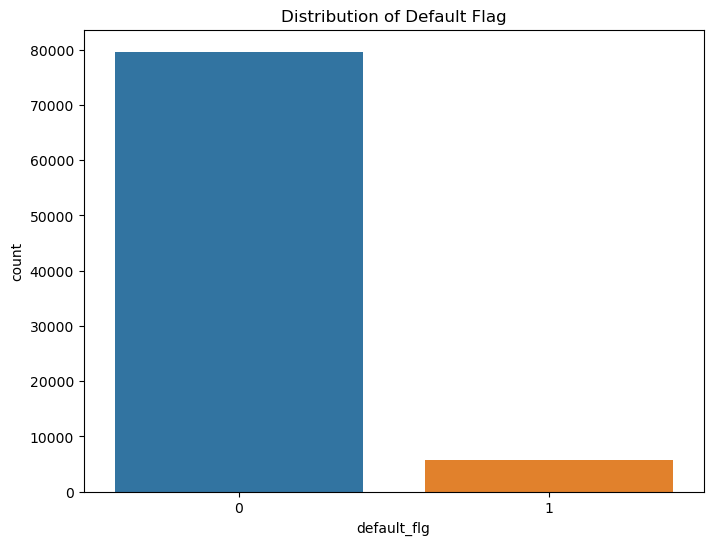

In [41]:
# Создаем график распределения значений в столбце 'default_flg'
plt.figure(figsize=(8, 6))
sns.countplot(x='default_flg', data=df)
plt.title('Distribution of Default Flag')
plt.show()

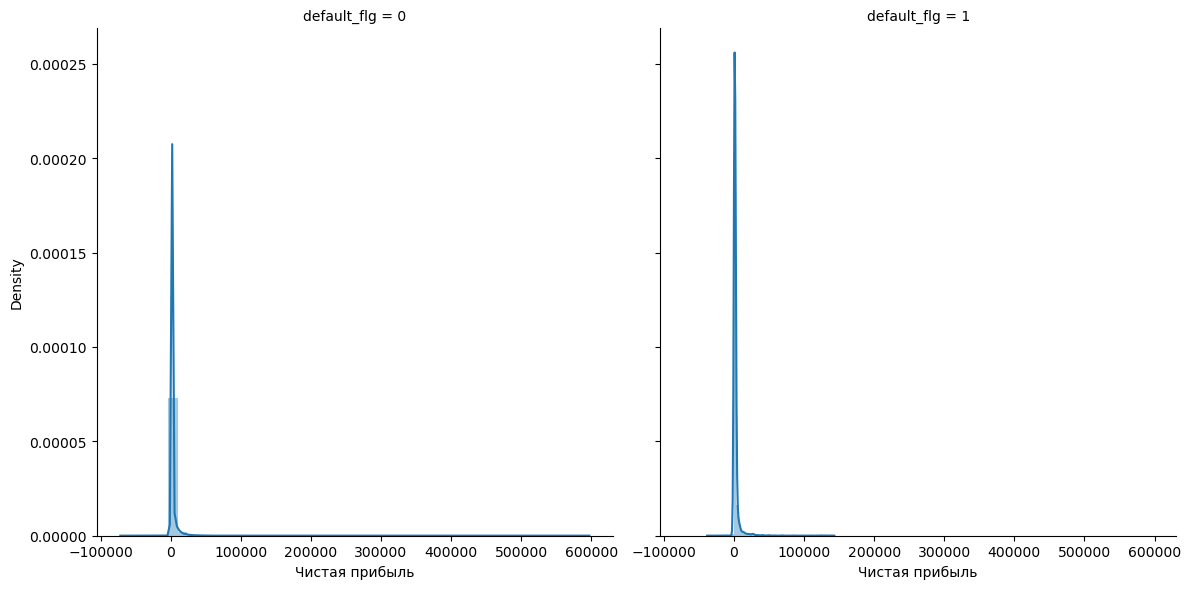

In [42]:
# Создаем график который показывает как распределена чистая прибыль для двух групп
g = sns.FacetGrid(df, col='default_flg', height=6)
g = g.map(sns.distplot, "Чистая прибыль")
plt.show()

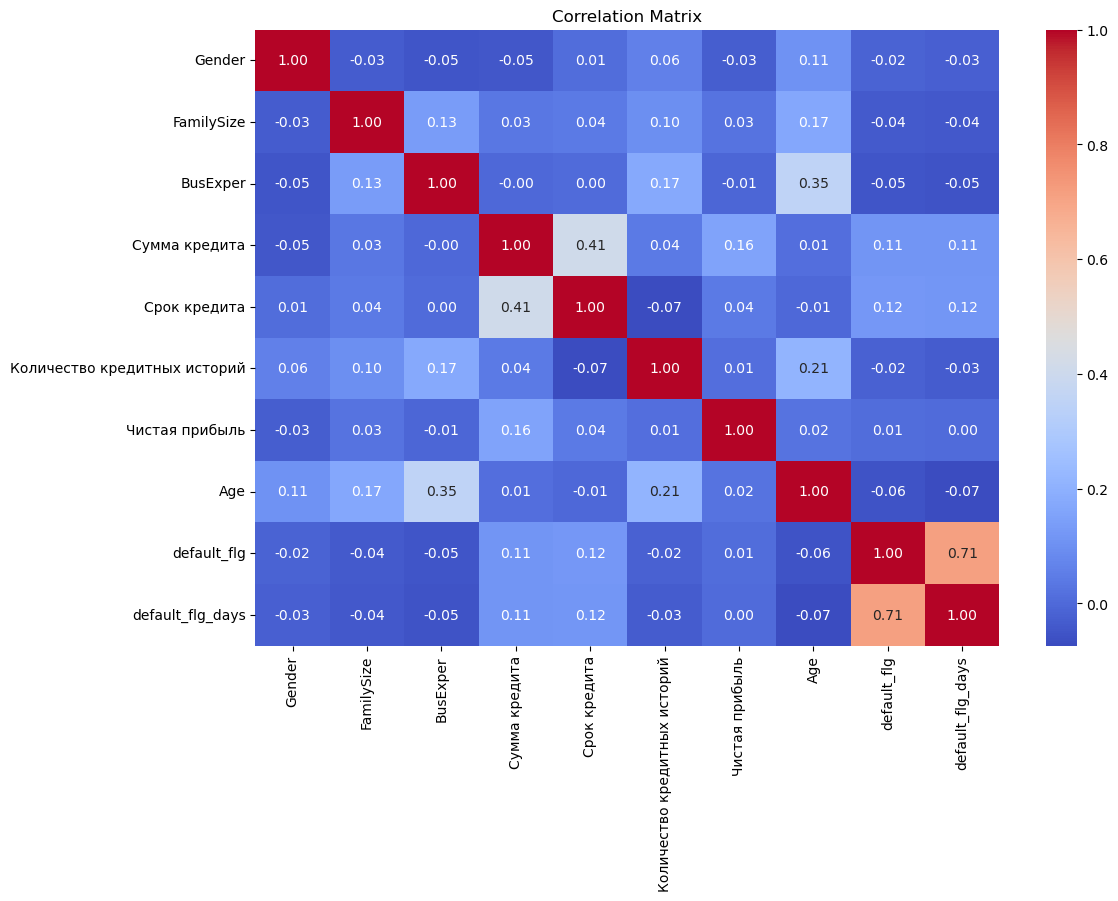

In [43]:
#корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

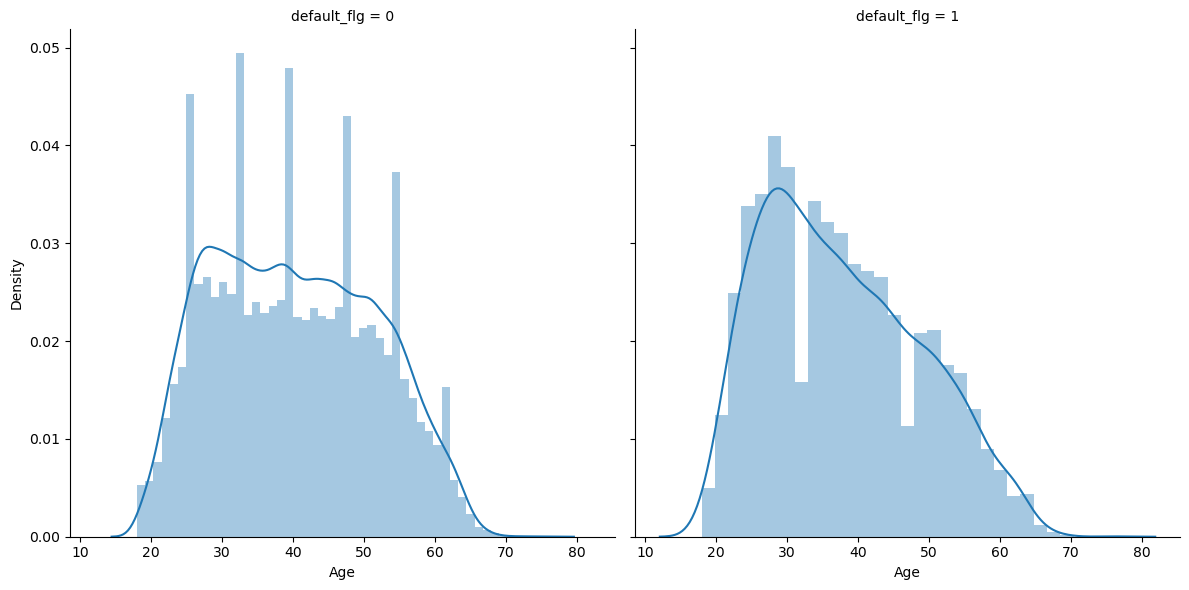

In [44]:
# Создаем график который показывает как распределен возраст для двух групп
g = sns.FacetGrid(df, col='default_flg', height=6)
g = g.map(sns.distplot, "Age")

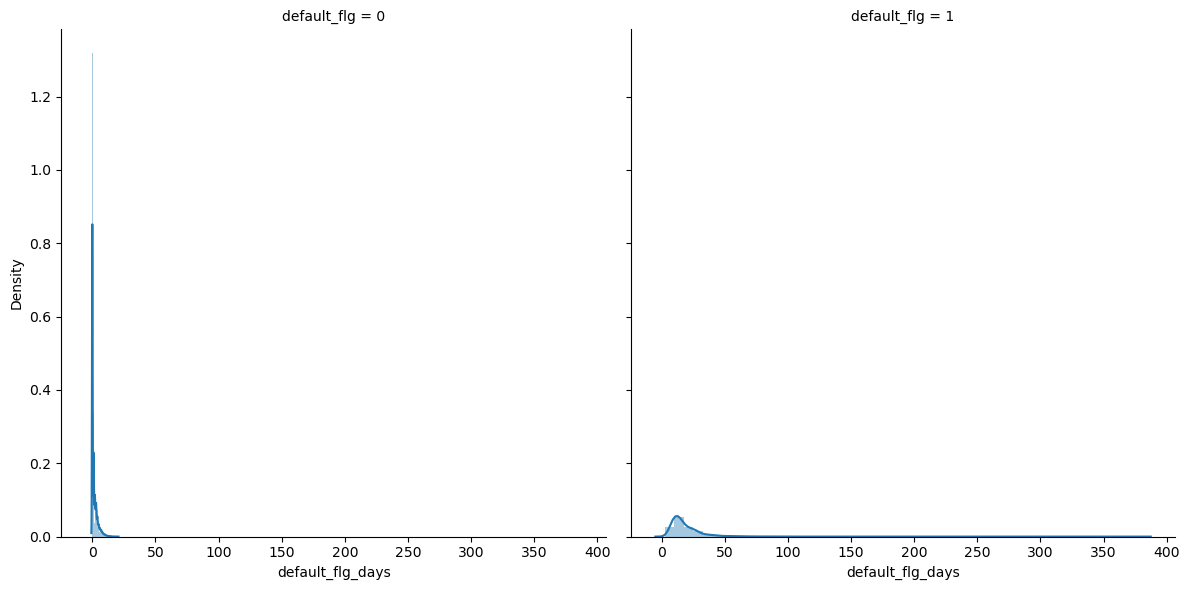

In [45]:
# Создаем график который показывает как распределено default_flg_days для двух групп
g = sns.FacetGrid(df, col='default_flg', height=6)
g = g.map(sns.distplot, "default_flg_days")

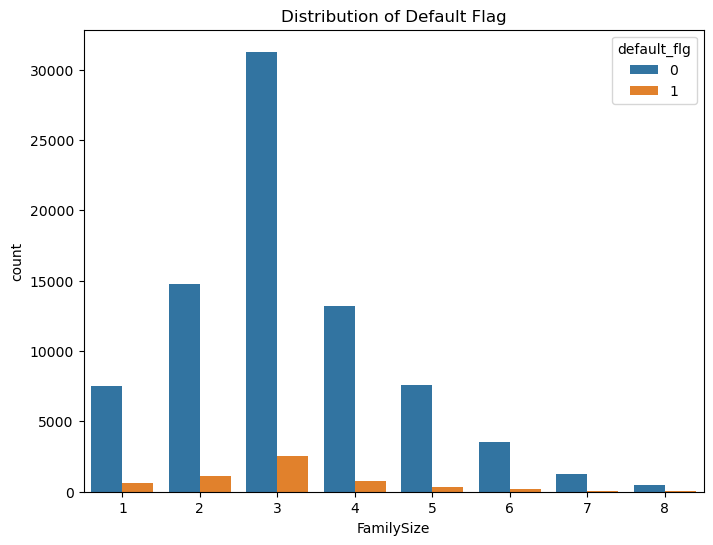

In [46]:
# Создаем график который показывает как распределено family_size в зависимости от наличия дефолта.

plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='default_flg', data=df)
plt.title('Distribution of Default Flag')
plt.show()

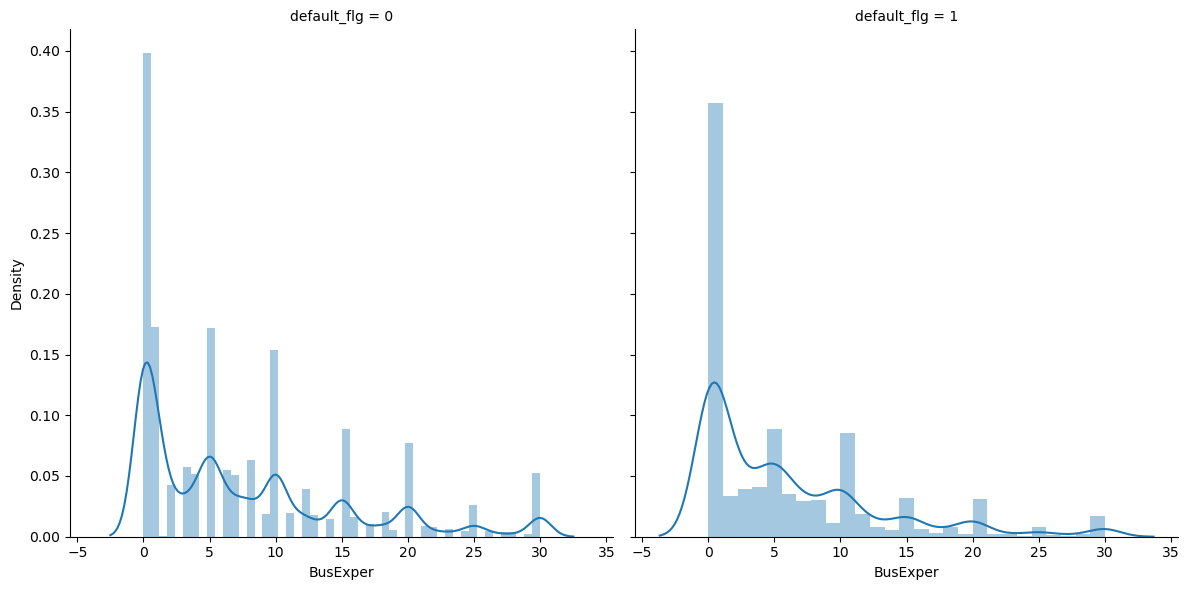

In [47]:
# Создаем график, который показывает, как распределен BusExper для двух групп
g = sns.FacetGrid(df, col='default_flg', height=6)
g = g.map(sns.distplot, "BusExper")

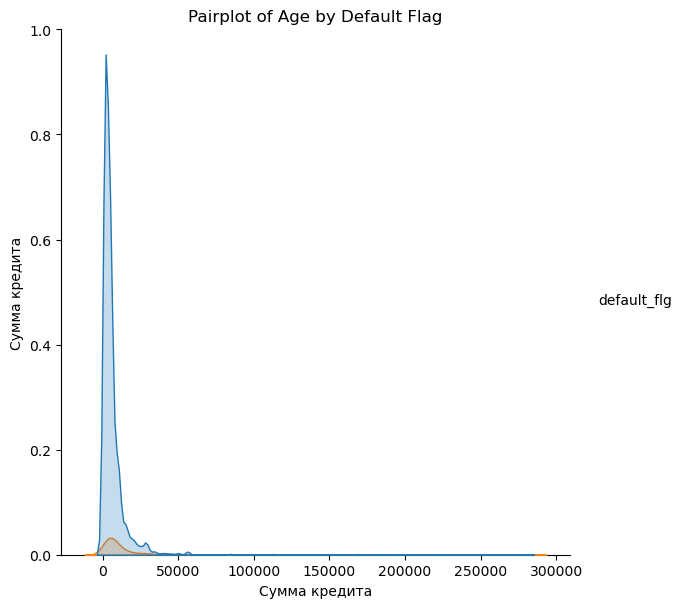

In [48]:
sns.pairplot(df, hue='default_flg', vars=['Сумма кредита'] , height = 6)
plt.title('Pairplot of Age by Default Flag')
plt.show()

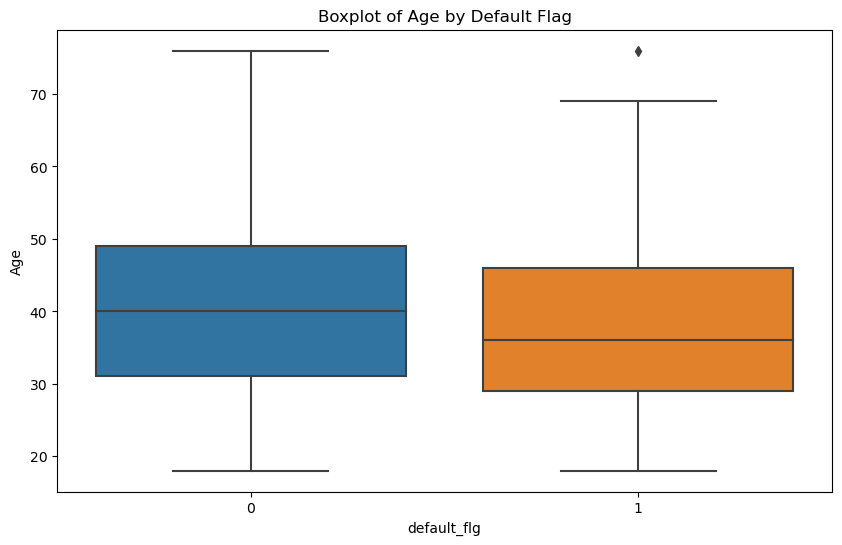

In [49]:
#Создаем box-plot для Age которая позволяет сравнить распределение возраста в зависимости от наличия дефолта

plt.figure(figsize=(10, 6))
sns.boxplot(x='default_flg', y='Age', data=df)
plt.title(f'Boxplot of Age by Default Flag')
plt.show()

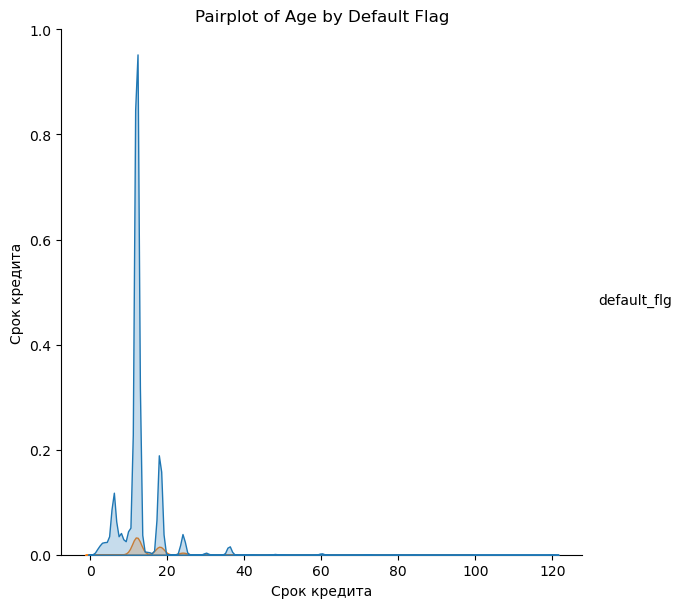

In [50]:
sns.pairplot(df, hue='default_flg', vars=['Срок кредита'] , height = 6)
plt.title('Pairplot of Age by Default Flag')
plt.show()

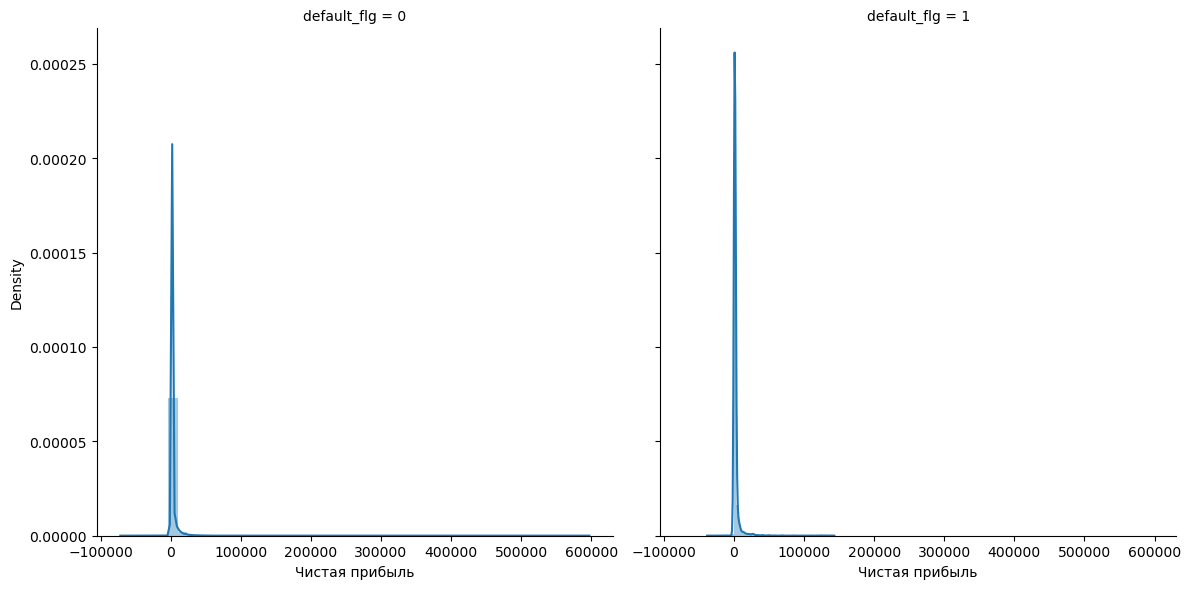

In [45]:
# Создаем график, который показывает, как распределена Чистая прибыль для двух групп

g = sns.FacetGrid(df, col='default_flg', height=6)
g = g.map(sns.distplot, "Чистая прибыль")

# Model Training

In [40]:
# for visualization
from sklearn.metrics import confusion_matrix
acc_sc = dict()
auc_sc = dict()
con_mt = dict()

In [41]:
X = df.drop(['default_flg' , 'default_flg_days'] , axis=1)
y = df['default_flg']

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 49)

In [43]:
#делаем стандартизацию некотрых переменных
from sklearn.preprocessing import StandardScaler

numeric_columns = X_train.select_dtypes(include=['float64', 'int64' , 'int32']).columns

exclude_columns = ['Gender']  

columns_to_scale = [col for col in numeric_columns if col not in exclude_columns]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [102]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [103]:
y_pred_LogReg = LogReg.predict(X_test)

y_pred_LogReg_proba = LogReg.predict_proba(X_test)[:, 1]

In [104]:
acc_sc['Logistic Regression'] = accuracy_score(y_test, y_pred_LogReg)
auc_sc['Logistic Regression'] = roc_auc_score(y_test, y_pred_LogReg_proba)
con_mt['Logistic Regression'] = confusion_matrix(y_test, y_pred_LogReg)
print(f"accuracy {acc_sc['Logistic Regression']}")
print(f"roc-auc  {auc_sc['Logistic Regression']}")

accuracy 0.9328646748681898
roc-auc  0.5770808956716004


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5 ],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy on Test Set: 0.9332747510251904


In [47]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=2, splitter='random')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       splitter='random')

In [49]:
y_pred_dtree = dtree.predict(X_test)

y_pred_dtree_proba = dtree.predict_proba(X_test)[:, 1]

In [50]:
acc_sc['Decision Tree'] = accuracy_score(y_test, y_pred_dtree)
auc_sc['Decision Tree'] = roc_auc_score(y_test, y_pred_dtree_proba)
con_mt['Decision Tree'] = confusion_matrix(y_test, y_pred_dtree)
print(f"accuracy {acc_sc['Decision Tree']}")
print(f"roc-auc  {auc_sc['Decision Tree']}")

accuracy 0.9326303456356181
roc-auc  0.7249375090454551


## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30 , 40 ],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)

KeyboardInterrupt: 

In [109]:
rf = RandomForestClassifier(n_estimators = 200 , min_samples_split = 5, max_depth = 30 , min_samples_leaf = 2 )
rf.fit ( X_train , y_train )

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [110]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

In [111]:
acc_sc['Random Forest'] = accuracy_score(y_test, y_pred_rf)
auc_sc['Random Forest'] = roc_auc_score(y_test, y_pred_rf_proba)
con_mt['Random Forest'] = confusion_matrix(y_test, y_pred_rf)
print(f"accuracy {acc_sc['Random Forest']}")
print(f"roc-auc  {auc_sc['Random Forest']}")

accuracy 0.9340949033391915
roc-auc  0.7765598552704999


In [112]:
con_mt

{'Logistic Regression': array([[15916,    23],
        [ 1123,     8]], dtype=int64),
 'Gradient Boosting': array([[15835,   104],
        [ 1066,    65]], dtype=int64),
 'AdaBoost': array([[15920,    19],
        [ 1116,    15]], dtype=int64),
 'xgboost': array([[15920,    19],
        [ 1102,    29]], dtype=int64),
 'Random Forest': array([[15935,     4],
        [ 1121,    10]], dtype=int64)}

## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled.values)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9317516110134739


In [62]:
knn = KNeighborsClassifier(n_neighbors = 30 , p = 2 ,  weights = 'distance')
knn.fit ( X_train, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [63]:
y_pred_knn = knn.predict(X_test.values)
y_pred_knn_proba = knn.predict_proba(X_test.values)[:, 1]

In [64]:
acc_sc['KNN'] = accuracy_score(y_test, y_pred_knn)
auc_sc['KNN'] = roc_auc_score(y_test, y_pred_knn_proba)
con_mt['KNN'] = confusion_matrix(y_test, y_pred_knn)
print(f"accuracy {acc_sc['KNN']}")
print(f"roc-auc  {auc_sc['KNN']}")

accuracy 0.9335090802577621
roc-auc  0.6403410293965016


In [65]:
con_mt

{'Random Forest': array([[15935,     4],
        [ 1121,    10]], dtype=int64),
 'KNN': array([[15918,    21],
        [ 1114,    17]], dtype=int64)}

## SVC

In [45]:
from sklearn.svm import SVC

In [ ]:
svc = SVC( kernel = 'sigmoid'  probability = True)
svc.fit ( X_train_scaled , y_train )

In [ ]:
y_pred_svc = svc.predict(X_test_scaled)
y_pred_svc_proba = svc.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(accuracy_score(y_test, y_pred_svc))
print(roc_auc_score(y_test, y_pred_svc_proba))

## CatBoost

In [66]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix

In [77]:
param_grid = {
    'iterations': [100, 200, 250],
    'learning_rate': [0.01, 0.1, 0.05],
    'depth': [4, 6],
}

catboost = CatBoostClassifier()
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

0:	learn: 0.6815542	total: 160ms	remaining: 15.8s
1:	learn: 0.6696235	total: 173ms	remaining: 8.49s
2:	learn: 0.6582755	total: 188ms	remaining: 6.08s
3:	learn: 0.6470570	total: 200ms	remaining: 4.79s
4:	learn: 0.6359847	total: 211ms	remaining: 4.01s
5:	learn: 0.6256951	total: 224ms	remaining: 3.52s
6:	learn: 0.6158760	total: 236ms	remaining: 3.14s
7:	learn: 0.6058131	total: 251ms	remaining: 2.88s
8:	learn: 0.5957534	total: 267ms	remaining: 2.7s
9:	learn: 0.5864311	total: 280ms	remaining: 2.52s
10:	learn: 0.5769421	total: 293ms	remaining: 2.37s
11:	learn: 0.5679007	total: 305ms	remaining: 2.23s
12:	learn: 0.5591732	total: 316ms	remaining: 2.11s
13:	learn: 0.5506814	total: 328ms	remaining: 2.01s
14:	learn: 0.5429016	total: 339ms	remaining: 1.92s
15:	learn: 0.5344703	total: 352ms	remaining: 1.85s
16:	learn: 0.5269546	total: 365ms	remaining: 1.78s
17:	learn: 0.5197118	total: 378ms	remaining: 1.72s
18:	learn: 0.5126912	total: 393ms	remaining: 1.68s
19:	learn: 0.5058631	total: 407ms	remainin

71:	learn: 0.3046469	total: 1.07s	remaining: 416ms
72:	learn: 0.3030037	total: 1.08s	remaining: 401ms
73:	learn: 0.3013728	total: 1.1s	remaining: 387ms
74:	learn: 0.2995133	total: 1.12s	remaining: 374ms
75:	learn: 0.2978778	total: 1.14s	remaining: 360ms
76:	learn: 0.2963944	total: 1.16s	remaining: 346ms
77:	learn: 0.2948046	total: 1.18s	remaining: 331ms
78:	learn: 0.2932571	total: 1.2s	remaining: 318ms
79:	learn: 0.2918067	total: 1.21s	remaining: 304ms
80:	learn: 0.2904568	total: 1.23s	remaining: 289ms
81:	learn: 0.2889026	total: 1.25s	remaining: 274ms
82:	learn: 0.2876108	total: 1.27s	remaining: 260ms
83:	learn: 0.2863307	total: 1.28s	remaining: 245ms
84:	learn: 0.2848916	total: 1.3s	remaining: 230ms
85:	learn: 0.2836429	total: 1.32s	remaining: 215ms
86:	learn: 0.2823285	total: 1.33s	remaining: 199ms
87:	learn: 0.2810099	total: 1.34s	remaining: 183ms
88:	learn: 0.2796654	total: 1.35s	remaining: 168ms
89:	learn: 0.2783011	total: 1.37s	remaining: 152ms
90:	learn: 0.2771395	total: 1.38s	

40:	learn: 0.3915745	total: 631ms	remaining: 909ms
41:	learn: 0.3874594	total: 644ms	remaining: 889ms
42:	learn: 0.3838068	total: 660ms	remaining: 875ms
43:	learn: 0.3800351	total: 675ms	remaining: 859ms
44:	learn: 0.3765998	total: 688ms	remaining: 841ms
45:	learn: 0.3728403	total: 700ms	remaining: 822ms
46:	learn: 0.3691307	total: 715ms	remaining: 806ms
47:	learn: 0.3653620	total: 728ms	remaining: 789ms
48:	learn: 0.3622178	total: 743ms	remaining: 773ms
49:	learn: 0.3592356	total: 752ms	remaining: 752ms
50:	learn: 0.3557940	total: 766ms	remaining: 736ms
51:	learn: 0.3526895	total: 779ms	remaining: 719ms
52:	learn: 0.3495529	total: 795ms	remaining: 705ms
53:	learn: 0.3466200	total: 810ms	remaining: 690ms
54:	learn: 0.3437259	total: 824ms	remaining: 675ms
55:	learn: 0.3407762	total: 839ms	remaining: 659ms
56:	learn: 0.3382802	total: 853ms	remaining: 644ms
57:	learn: 0.3355437	total: 869ms	remaining: 629ms
58:	learn: 0.3331284	total: 883ms	remaining: 613ms
59:	learn: 0.3304494	total: 898

15:	learn: 0.2333272	total: 242ms	remaining: 1.27s
16:	learn: 0.2308964	total: 257ms	remaining: 1.25s
17:	learn: 0.2293591	total: 269ms	remaining: 1.23s
18:	learn: 0.2282619	total: 286ms	remaining: 1.22s
19:	learn: 0.2264582	total: 301ms	remaining: 1.21s
20:	learn: 0.2249385	total: 317ms	remaining: 1.19s
21:	learn: 0.2239128	total: 331ms	remaining: 1.17s
22:	learn: 0.2230914	total: 346ms	remaining: 1.16s
23:	learn: 0.2222959	total: 356ms	remaining: 1.13s
24:	learn: 0.2214743	total: 368ms	remaining: 1.1s
25:	learn: 0.2207156	total: 380ms	remaining: 1.08s
26:	learn: 0.2202052	total: 393ms	remaining: 1.06s
27:	learn: 0.2193192	total: 406ms	remaining: 1.04s
28:	learn: 0.2189004	total: 417ms	remaining: 1.02s
29:	learn: 0.2185132	total: 431ms	remaining: 1.01s
30:	learn: 0.2180782	total: 446ms	remaining: 993ms
31:	learn: 0.2177832	total: 460ms	remaining: 977ms
32:	learn: 0.2174022	total: 475ms	remaining: 964ms
33:	learn: 0.2171117	total: 491ms	remaining: 953ms
34:	learn: 0.2167356	total: 509m

79:	learn: 0.2095767	total: 1.06s	remaining: 264ms
80:	learn: 0.2094693	total: 1.07s	remaining: 251ms
81:	learn: 0.2094036	total: 1.08s	remaining: 238ms
82:	learn: 0.2093245	total: 1.1s	remaining: 225ms
83:	learn: 0.2092079	total: 1.11s	remaining: 212ms
84:	learn: 0.2090936	total: 1.13s	remaining: 199ms
85:	learn: 0.2090095	total: 1.14s	remaining: 186ms
86:	learn: 0.2089591	total: 1.16s	remaining: 173ms
87:	learn: 0.2088832	total: 1.17s	remaining: 160ms
88:	learn: 0.2087648	total: 1.19s	remaining: 147ms
89:	learn: 0.2086808	total: 1.2s	remaining: 133ms
90:	learn: 0.2086776	total: 1.22s	remaining: 120ms
91:	learn: 0.2085871	total: 1.23s	remaining: 107ms
92:	learn: 0.2085010	total: 1.25s	remaining: 94.1ms
93:	learn: 0.2084427	total: 1.27s	remaining: 81ms
94:	learn: 0.2083560	total: 1.29s	remaining: 67.8ms
95:	learn: 0.2082973	total: 1.31s	remaining: 54.5ms
96:	learn: 0.2081657	total: 1.32s	remaining: 40.9ms
97:	learn: 0.2081296	total: 1.34s	remaining: 27.3ms
98:	learn: 0.2080924	total: 1

41:	learn: 0.2146580	total: 689ms	remaining: 951ms
42:	learn: 0.2144455	total: 704ms	remaining: 933ms
43:	learn: 0.2142412	total: 717ms	remaining: 912ms
44:	learn: 0.2138996	total: 732ms	remaining: 895ms
45:	learn: 0.2137845	total: 749ms	remaining: 879ms
46:	learn: 0.2136272	total: 765ms	remaining: 862ms
47:	learn: 0.2135071	total: 779ms	remaining: 844ms
48:	learn: 0.2133109	total: 791ms	remaining: 824ms
49:	learn: 0.2131614	total: 807ms	remaining: 807ms
50:	learn: 0.2130255	total: 819ms	remaining: 787ms
51:	learn: 0.2129254	total: 834ms	remaining: 770ms
52:	learn: 0.2128305	total: 849ms	remaining: 753ms
53:	learn: 0.2126041	total: 862ms	remaining: 734ms
54:	learn: 0.2123710	total: 879ms	remaining: 719ms
55:	learn: 0.2122642	total: 894ms	remaining: 702ms
56:	learn: 0.2120548	total: 909ms	remaining: 686ms
57:	learn: 0.2119441	total: 924ms	remaining: 669ms
58:	learn: 0.2118423	total: 937ms	remaining: 651ms
59:	learn: 0.2117256	total: 949ms	remaining: 633ms
60:	learn: 0.2116345	total: 963

14:	learn: 0.2963163	total: 229ms	remaining: 1.3s
15:	learn: 0.2894238	total: 249ms	remaining: 1.31s
16:	learn: 0.2825842	total: 269ms	remaining: 1.31s
17:	learn: 0.2764707	total: 288ms	remaining: 1.31s
18:	learn: 0.2713888	total: 303ms	remaining: 1.29s
19:	learn: 0.2670184	total: 319ms	remaining: 1.28s
20:	learn: 0.2626124	total: 336ms	remaining: 1.26s
21:	learn: 0.2583818	total: 350ms	remaining: 1.24s
22:	learn: 0.2545245	total: 366ms	remaining: 1.22s
23:	learn: 0.2510712	total: 382ms	remaining: 1.21s
24:	learn: 0.2486165	total: 400ms	remaining: 1.2s
25:	learn: 0.2457721	total: 417ms	remaining: 1.19s
26:	learn: 0.2434106	total: 433ms	remaining: 1.17s
27:	learn: 0.2412882	total: 449ms	remaining: 1.15s
28:	learn: 0.2393748	total: 464ms	remaining: 1.14s
29:	learn: 0.2381643	total: 482ms	remaining: 1.13s
30:	learn: 0.2366290	total: 500ms	remaining: 1.11s
31:	learn: 0.2354251	total: 516ms	remaining: 1.1s
32:	learn: 0.2339464	total: 531ms	remaining: 1.08s
33:	learn: 0.2329000	total: 546ms	

79:	learn: 0.2154091	total: 1.26s	remaining: 316ms
80:	learn: 0.2152715	total: 1.28s	remaining: 299ms
81:	learn: 0.2151647	total: 1.29s	remaining: 283ms
82:	learn: 0.2150313	total: 1.3s	remaining: 267ms
83:	learn: 0.2149010	total: 1.32s	remaining: 251ms
84:	learn: 0.2147970	total: 1.33s	remaining: 235ms
85:	learn: 0.2146470	total: 1.34s	remaining: 219ms
86:	learn: 0.2145141	total: 1.36s	remaining: 203ms
87:	learn: 0.2144384	total: 1.37s	remaining: 187ms
88:	learn: 0.2143017	total: 1.38s	remaining: 171ms
89:	learn: 0.2142254	total: 1.4s	remaining: 155ms
90:	learn: 0.2141486	total: 1.41s	remaining: 139ms
91:	learn: 0.2140254	total: 1.42s	remaining: 124ms
92:	learn: 0.2139661	total: 1.44s	remaining: 108ms
93:	learn: 0.2138788	total: 1.46s	remaining: 92.9ms
94:	learn: 0.2137892	total: 1.47s	remaining: 77.3ms
95:	learn: 0.2136887	total: 1.48s	remaining: 61.8ms
96:	learn: 0.2136029	total: 1.5s	remaining: 46.3ms
97:	learn: 0.2135389	total: 1.51s	remaining: 30.8ms
98:	learn: 0.2134625	total: 1

51:	learn: 0.2208140	total: 861ms	remaining: 795ms
52:	learn: 0.2203481	total: 876ms	remaining: 777ms
53:	learn: 0.2201147	total: 893ms	remaining: 761ms
54:	learn: 0.2198274	total: 907ms	remaining: 742ms
55:	learn: 0.2194625	total: 933ms	remaining: 733ms
56:	learn: 0.2192492	total: 947ms	remaining: 715ms
57:	learn: 0.2190768	total: 966ms	remaining: 699ms
58:	learn: 0.2188741	total: 984ms	remaining: 684ms
59:	learn: 0.2185835	total: 999ms	remaining: 666ms
60:	learn: 0.2184122	total: 1.01s	remaining: 648ms
61:	learn: 0.2182304	total: 1.03s	remaining: 630ms
62:	learn: 0.2180258	total: 1.04s	remaining: 613ms
63:	learn: 0.2178627	total: 1.05s	remaining: 593ms
64:	learn: 0.2176012	total: 1.07s	remaining: 577ms
65:	learn: 0.2173913	total: 1.08s	remaining: 558ms
66:	learn: 0.2172533	total: 1.1s	remaining: 542ms
67:	learn: 0.2170379	total: 1.12s	remaining: 526ms
68:	learn: 0.2169108	total: 1.14s	remaining: 510ms
69:	learn: 0.2168020	total: 1.15s	remaining: 493ms
70:	learn: 0.2166683	total: 1.17

20:	learn: 0.4985696	total: 282ms	remaining: 2.4s
21:	learn: 0.4921374	total: 296ms	remaining: 2.4s
22:	learn: 0.4855447	total: 310ms	remaining: 2.39s
23:	learn: 0.4788191	total: 323ms	remaining: 2.37s
24:	learn: 0.4718714	total: 340ms	remaining: 2.38s
25:	learn: 0.4658760	total: 359ms	remaining: 2.4s
26:	learn: 0.4597958	total: 374ms	remaining: 2.4s
27:	learn: 0.4542958	total: 390ms	remaining: 2.39s
28:	learn: 0.4486731	total: 408ms	remaining: 2.4s
29:	learn: 0.4433718	total: 428ms	remaining: 2.42s
30:	learn: 0.4379176	total: 449ms	remaining: 2.45s
31:	learn: 0.4325049	total: 471ms	remaining: 2.47s
32:	learn: 0.4275319	total: 488ms	remaining: 2.47s
33:	learn: 0.4223979	total: 505ms	remaining: 2.47s
34:	learn: 0.4173898	total: 521ms	remaining: 2.46s
35:	learn: 0.4130279	total: 536ms	remaining: 2.44s
36:	learn: 0.4087508	total: 549ms	remaining: 2.42s
37:	learn: 0.4041627	total: 562ms	remaining: 2.39s
38:	learn: 0.3996755	total: 574ms	remaining: 2.37s
39:	learn: 0.3950027	total: 586ms	re

180:	learn: 0.2302853	total: 2.59s	remaining: 272ms
181:	learn: 0.2301055	total: 2.6s	remaining: 257ms
182:	learn: 0.2298654	total: 2.62s	remaining: 243ms
183:	learn: 0.2297136	total: 2.63s	remaining: 229ms
184:	learn: 0.2295683	total: 2.64s	remaining: 214ms
185:	learn: 0.2293859	total: 2.66s	remaining: 200ms
186:	learn: 0.2292013	total: 2.67s	remaining: 186ms
187:	learn: 0.2290026	total: 2.69s	remaining: 171ms
188:	learn: 0.2288526	total: 2.7s	remaining: 157ms
189:	learn: 0.2287445	total: 2.71s	remaining: 143ms
190:	learn: 0.2285321	total: 2.72s	remaining: 128ms
191:	learn: 0.2283503	total: 2.73s	remaining: 114ms
192:	learn: 0.2282173	total: 2.75s	remaining: 99.6ms
193:	learn: 0.2280423	total: 2.76s	remaining: 85.3ms
194:	learn: 0.2279151	total: 2.77s	remaining: 71.1ms
195:	learn: 0.2277418	total: 2.78s	remaining: 56.8ms
196:	learn: 0.2275765	total: 2.8s	remaining: 42.6ms
197:	learn: 0.2274365	total: 2.81s	remaining: 28.4ms
198:	learn: 0.2273116	total: 2.82s	remaining: 14.2ms
199:	lea

149:	learn: 0.2385179	total: 2.32s	remaining: 772ms
150:	learn: 0.2381767	total: 2.33s	remaining: 757ms
151:	learn: 0.2378972	total: 2.35s	remaining: 742ms
152:	learn: 0.2374801	total: 2.36s	remaining: 726ms
153:	learn: 0.2372290	total: 2.38s	remaining: 710ms
154:	learn: 0.2368629	total: 2.39s	remaining: 695ms
155:	learn: 0.2365538	total: 2.41s	remaining: 680ms
156:	learn: 0.2363039	total: 2.42s	remaining: 664ms
157:	learn: 0.2359346	total: 2.44s	remaining: 648ms
158:	learn: 0.2356428	total: 2.45s	remaining: 632ms
159:	learn: 0.2352736	total: 2.47s	remaining: 617ms
160:	learn: 0.2349573	total: 2.48s	remaining: 601ms
161:	learn: 0.2346925	total: 2.49s	remaining: 584ms
162:	learn: 0.2344463	total: 2.5s	remaining: 569ms
163:	learn: 0.2342009	total: 2.52s	remaining: 553ms
164:	learn: 0.2339693	total: 2.54s	remaining: 538ms
165:	learn: 0.2337401	total: 2.56s	remaining: 524ms
166:	learn: 0.2334522	total: 2.57s	remaining: 509ms
167:	learn: 0.2332237	total: 2.59s	remaining: 493ms
168:	learn: 0

122:	learn: 0.2505308	total: 1.68s	remaining: 1.05s
123:	learn: 0.2499571	total: 1.69s	remaining: 1.04s
124:	learn: 0.2493808	total: 1.7s	remaining: 1.02s
125:	learn: 0.2489186	total: 1.72s	remaining: 1.01s
126:	learn: 0.2484502	total: 1.74s	remaining: 997ms
127:	learn: 0.2479034	total: 1.75s	remaining: 984ms
128:	learn: 0.2473996	total: 1.76s	remaining: 969ms
129:	learn: 0.2469432	total: 1.77s	remaining: 954ms
130:	learn: 0.2464662	total: 1.78s	remaining: 939ms
131:	learn: 0.2460020	total: 1.79s	remaining: 925ms
132:	learn: 0.2455307	total: 1.81s	remaining: 911ms
133:	learn: 0.2450108	total: 1.82s	remaining: 897ms
134:	learn: 0.2443937	total: 1.83s	remaining: 883ms
135:	learn: 0.2438386	total: 1.84s	remaining: 868ms
136:	learn: 0.2434087	total: 1.85s	remaining: 853ms
137:	learn: 0.2430804	total: 1.87s	remaining: 839ms
138:	learn: 0.2426863	total: 1.88s	remaining: 825ms
139:	learn: 0.2422464	total: 1.89s	remaining: 812ms
140:	learn: 0.2418742	total: 1.91s	remaining: 800ms
141:	learn: 0

83:	learn: 0.2852606	total: 1.07s	remaining: 1.48s
84:	learn: 0.2839752	total: 1.09s	remaining: 1.47s
85:	learn: 0.2826823	total: 1.11s	remaining: 1.47s
86:	learn: 0.2812868	total: 1.12s	remaining: 1.46s
87:	learn: 0.2801810	total: 1.13s	remaining: 1.44s
88:	learn: 0.2789903	total: 1.15s	remaining: 1.43s
89:	learn: 0.2778156	total: 1.16s	remaining: 1.42s
90:	learn: 0.2765700	total: 1.17s	remaining: 1.4s
91:	learn: 0.2752132	total: 1.18s	remaining: 1.39s
92:	learn: 0.2740074	total: 1.2s	remaining: 1.38s
93:	learn: 0.2730239	total: 1.21s	remaining: 1.36s
94:	learn: 0.2720776	total: 1.22s	remaining: 1.35s
95:	learn: 0.2711937	total: 1.23s	remaining: 1.33s
96:	learn: 0.2701334	total: 1.24s	remaining: 1.32s
97:	learn: 0.2692315	total: 1.25s	remaining: 1.31s
98:	learn: 0.2683420	total: 1.27s	remaining: 1.29s
99:	learn: 0.2674270	total: 1.28s	remaining: 1.28s
100:	learn: 0.2665073	total: 1.29s	remaining: 1.27s
101:	learn: 0.2655162	total: 1.31s	remaining: 1.26s
102:	learn: 0.2647430	total: 1.

46:	learn: 0.3684801	total: 647ms	remaining: 2.11s
47:	learn: 0.3652957	total: 662ms	remaining: 2.1s
48:	learn: 0.3621423	total: 678ms	remaining: 2.09s
49:	learn: 0.3586959	total: 696ms	remaining: 2.09s
50:	learn: 0.3556443	total: 710ms	remaining: 2.07s
51:	learn: 0.3526800	total: 723ms	remaining: 2.06s
52:	learn: 0.3497362	total: 736ms	remaining: 2.04s
53:	learn: 0.3467768	total: 750ms	remaining: 2.03s
54:	learn: 0.3438620	total: 763ms	remaining: 2.01s
55:	learn: 0.3410715	total: 777ms	remaining: 2s
56:	learn: 0.3379948	total: 790ms	remaining: 1.98s
57:	learn: 0.3354857	total: 802ms	remaining: 1.96s
58:	learn: 0.3330094	total: 816ms	remaining: 1.95s
59:	learn: 0.3303841	total: 828ms	remaining: 1.93s
60:	learn: 0.3281389	total: 839ms	remaining: 1.91s
61:	learn: 0.3257425	total: 853ms	remaining: 1.9s
62:	learn: 0.3234163	total: 870ms	remaining: 1.89s
63:	learn: 0.3212697	total: 889ms	remaining: 1.89s
64:	learn: 0.3190272	total: 904ms	remaining: 1.88s
65:	learn: 0.3169063	total: 919ms	re

14:	learn: 0.2355073	total: 221ms	remaining: 2.73s
15:	learn: 0.2333272	total: 236ms	remaining: 2.71s
16:	learn: 0.2308964	total: 251ms	remaining: 2.7s
17:	learn: 0.2293591	total: 263ms	remaining: 2.66s
18:	learn: 0.2282619	total: 275ms	remaining: 2.62s
19:	learn: 0.2264582	total: 287ms	remaining: 2.58s
20:	learn: 0.2249385	total: 298ms	remaining: 2.54s
21:	learn: 0.2239128	total: 310ms	remaining: 2.51s
22:	learn: 0.2230914	total: 323ms	remaining: 2.48s
23:	learn: 0.2222959	total: 334ms	remaining: 2.44s
24:	learn: 0.2214743	total: 346ms	remaining: 2.42s
25:	learn: 0.2207156	total: 359ms	remaining: 2.4s
26:	learn: 0.2202052	total: 372ms	remaining: 2.38s
27:	learn: 0.2193192	total: 384ms	remaining: 2.36s
28:	learn: 0.2189004	total: 400ms	remaining: 2.36s
29:	learn: 0.2185132	total: 415ms	remaining: 2.35s
30:	learn: 0.2180782	total: 428ms	remaining: 2.33s
31:	learn: 0.2177832	total: 442ms	remaining: 2.32s
32:	learn: 0.2174022	total: 460ms	remaining: 2.33s
33:	learn: 0.2171117	total: 474ms

181:	learn: 0.2034967	total: 2.5s	remaining: 248ms
182:	learn: 0.2034149	total: 2.52s	remaining: 234ms
183:	learn: 0.2033804	total: 2.53s	remaining: 220ms
184:	learn: 0.2033680	total: 2.54s	remaining: 206ms
185:	learn: 0.2033142	total: 2.55s	remaining: 192ms
186:	learn: 0.2032800	total: 2.57s	remaining: 178ms
187:	learn: 0.2032326	total: 2.58s	remaining: 165ms
188:	learn: 0.2031888	total: 2.59s	remaining: 151ms
189:	learn: 0.2030893	total: 2.6s	remaining: 137ms
190:	learn: 0.2030825	total: 2.62s	remaining: 123ms
191:	learn: 0.2030135	total: 2.63s	remaining: 110ms
192:	learn: 0.2029808	total: 2.64s	remaining: 95.8ms
193:	learn: 0.2029220	total: 2.65s	remaining: 82.1ms
194:	learn: 0.2028717	total: 2.67s	remaining: 68.4ms
195:	learn: 0.2028276	total: 2.68s	remaining: 54.8ms
196:	learn: 0.2027798	total: 2.69s	remaining: 41ms
197:	learn: 0.2026957	total: 2.71s	remaining: 27.4ms
198:	learn: 0.2026590	total: 2.72s	remaining: 13.7ms
199:	learn: 0.2026097	total: 2.74s	remaining: 0us
0:	learn: 0

155:	learn: 0.2048212	total: 2.16s	remaining: 608ms
156:	learn: 0.2047730	total: 2.17s	remaining: 595ms
157:	learn: 0.2047269	total: 2.19s	remaining: 581ms
158:	learn: 0.2047234	total: 2.2s	remaining: 568ms
159:	learn: 0.2046577	total: 2.22s	remaining: 554ms
160:	learn: 0.2045851	total: 2.23s	remaining: 541ms
161:	learn: 0.2045294	total: 2.25s	remaining: 527ms
162:	learn: 0.2044921	total: 2.26s	remaining: 513ms
163:	learn: 0.2044252	total: 2.27s	remaining: 499ms
164:	learn: 0.2043816	total: 2.29s	remaining: 485ms
165:	learn: 0.2043343	total: 2.3s	remaining: 471ms
166:	learn: 0.2042730	total: 2.31s	remaining: 457ms
167:	learn: 0.2042185	total: 2.33s	remaining: 443ms
168:	learn: 0.2041649	total: 2.34s	remaining: 429ms
169:	learn: 0.2041000	total: 2.35s	remaining: 415ms
170:	learn: 0.2040538	total: 2.37s	remaining: 401ms
171:	learn: 0.2040119	total: 2.38s	remaining: 388ms
172:	learn: 0.2039719	total: 2.4s	remaining: 374ms
173:	learn: 0.2039441	total: 2.41s	remaining: 360ms
174:	learn: 0.2

117:	learn: 0.2072814	total: 1.66s	remaining: 1.16s
118:	learn: 0.2072049	total: 1.68s	remaining: 1.14s
119:	learn: 0.2071258	total: 1.69s	remaining: 1.13s
120:	learn: 0.2070623	total: 1.71s	remaining: 1.11s
121:	learn: 0.2070080	total: 1.72s	remaining: 1.1s
122:	learn: 0.2069185	total: 1.73s	remaining: 1.08s
123:	learn: 0.2068406	total: 1.74s	remaining: 1.07s
124:	learn: 0.2067559	total: 1.75s	remaining: 1.05s
125:	learn: 0.2067190	total: 1.77s	remaining: 1.04s
126:	learn: 0.2066522	total: 1.78s	remaining: 1.02s
127:	learn: 0.2066054	total: 1.79s	remaining: 1.01s
128:	learn: 0.2065484	total: 1.81s	remaining: 996ms
129:	learn: 0.2065283	total: 1.82s	remaining: 983ms
130:	learn: 0.2064864	total: 1.84s	remaining: 971ms
131:	learn: 0.2064111	total: 1.86s	remaining: 958ms
132:	learn: 0.2063553	total: 1.88s	remaining: 945ms
133:	learn: 0.2062916	total: 1.89s	remaining: 933ms
134:	learn: 0.2062367	total: 1.92s	remaining: 922ms
135:	learn: 0.2061644	total: 1.93s	remaining: 910ms
136:	learn: 0

92:	learn: 0.2084430	total: 1.3s	remaining: 1.5s
93:	learn: 0.2083410	total: 1.31s	remaining: 1.48s
94:	learn: 0.2082795	total: 1.33s	remaining: 1.47s
95:	learn: 0.2082070	total: 1.34s	remaining: 1.45s
96:	learn: 0.2081377	total: 1.35s	remaining: 1.44s
97:	learn: 0.2080637	total: 1.37s	remaining: 1.43s
98:	learn: 0.2079682	total: 1.38s	remaining: 1.41s
99:	learn: 0.2079038	total: 1.4s	remaining: 1.4s
100:	learn: 0.2077991	total: 1.41s	remaining: 1.39s
101:	learn: 0.2077531	total: 1.43s	remaining: 1.37s
102:	learn: 0.2076860	total: 1.44s	remaining: 1.36s
103:	learn: 0.2076169	total: 1.46s	remaining: 1.35s
104:	learn: 0.2075708	total: 1.48s	remaining: 1.34s
105:	learn: 0.2074896	total: 1.49s	remaining: 1.32s
106:	learn: 0.2073963	total: 1.51s	remaining: 1.31s
107:	learn: 0.2073136	total: 1.53s	remaining: 1.3s
108:	learn: 0.2072419	total: 1.55s	remaining: 1.29s
109:	learn: 0.2071945	total: 1.56s	remaining: 1.28s
110:	learn: 0.2071242	total: 1.58s	remaining: 1.26s
111:	learn: 0.2070429	tot

65:	learn: 0.2108651	total: 1.04s	remaining: 2.12s
66:	learn: 0.2107714	total: 1.06s	remaining: 2.1s
67:	learn: 0.2106796	total: 1.07s	remaining: 2.08s
68:	learn: 0.2105596	total: 1.08s	remaining: 2.06s
69:	learn: 0.2104954	total: 1.1s	remaining: 2.04s
70:	learn: 0.2104355	total: 1.11s	remaining: 2.02s
71:	learn: 0.2103881	total: 1.13s	remaining: 2s
72:	learn: 0.2102997	total: 1.14s	remaining: 1.99s
73:	learn: 0.2102177	total: 1.15s	remaining: 1.96s
74:	learn: 0.2100503	total: 1.17s	remaining: 1.95s
75:	learn: 0.2099414	total: 1.18s	remaining: 1.93s
76:	learn: 0.2098490	total: 1.2s	remaining: 1.91s
77:	learn: 0.2097598	total: 1.21s	remaining: 1.89s
78:	learn: 0.2096319	total: 1.23s	remaining: 1.88s
79:	learn: 0.2095671	total: 1.24s	remaining: 1.86s
80:	learn: 0.2094689	total: 1.26s	remaining: 1.85s
81:	learn: 0.2093773	total: 1.27s	remaining: 1.83s
82:	learn: 0.2092962	total: 1.29s	remaining: 1.81s
83:	learn: 0.2092476	total: 1.3s	remaining: 1.8s
84:	learn: 0.2091112	total: 1.32s	remai

27:	learn: 0.2412882	total: 483ms	remaining: 2.97s
28:	learn: 0.2393748	total: 495ms	remaining: 2.92s
29:	learn: 0.2381643	total: 510ms	remaining: 2.89s
30:	learn: 0.2366290	total: 527ms	remaining: 2.87s
31:	learn: 0.2354251	total: 542ms	remaining: 2.85s
32:	learn: 0.2339464	total: 558ms	remaining: 2.82s
33:	learn: 0.2329000	total: 572ms	remaining: 2.79s
34:	learn: 0.2318927	total: 584ms	remaining: 2.75s
35:	learn: 0.2307646	total: 598ms	remaining: 2.72s
36:	learn: 0.2298489	total: 611ms	remaining: 2.69s
37:	learn: 0.2290471	total: 625ms	remaining: 2.66s
38:	learn: 0.2283594	total: 640ms	remaining: 2.64s
39:	learn: 0.2275302	total: 656ms	remaining: 2.62s
40:	learn: 0.2267123	total: 673ms	remaining: 2.61s
41:	learn: 0.2258584	total: 687ms	remaining: 2.58s
42:	learn: 0.2253914	total: 699ms	remaining: 2.55s
43:	learn: 0.2249311	total: 711ms	remaining: 2.52s
44:	learn: 0.2241859	total: 727ms	remaining: 2.5s
45:	learn: 0.2235192	total: 740ms	remaining: 2.48s
46:	learn: 0.2232336	total: 756m

199:	learn: 0.2083287	total: 2.99s	remaining: 0us
0:	learn: 0.6371834	total: 23.5ms	remaining: 4.67s
1:	learn: 0.5852444	total: 35.2ms	remaining: 3.48s
2:	learn: 0.5410512	total: 50.7ms	remaining: 3.33s
3:	learn: 0.5019242	total: 66ms	remaining: 3.23s
4:	learn: 0.4673853	total: 80.2ms	remaining: 3.13s
5:	learn: 0.4387382	total: 102ms	remaining: 3.3s
6:	learn: 0.4144716	total: 126ms	remaining: 3.48s
7:	learn: 0.3935296	total: 147ms	remaining: 3.54s
8:	learn: 0.3749913	total: 165ms	remaining: 3.51s
9:	learn: 0.3568399	total: 184ms	remaining: 3.49s
10:	learn: 0.3430310	total: 216ms	remaining: 3.7s
11:	learn: 0.3302996	total: 238ms	remaining: 3.73s
12:	learn: 0.3174293	total: 262ms	remaining: 3.76s
13:	learn: 0.3076174	total: 279ms	remaining: 3.7s
14:	learn: 0.2976737	total: 296ms	remaining: 3.65s
15:	learn: 0.2900315	total: 314ms	remaining: 3.61s
16:	learn: 0.2822637	total: 328ms	remaining: 3.53s
17:	learn: 0.2748548	total: 343ms	remaining: 3.46s
18:	learn: 0.2694236	total: 354ms	remainin

162:	learn: 0.2093727	total: 2.37s	remaining: 538ms
163:	learn: 0.2093271	total: 2.38s	remaining: 523ms
164:	learn: 0.2092903	total: 2.4s	remaining: 509ms
165:	learn: 0.2092567	total: 2.41s	remaining: 494ms
166:	learn: 0.2092040	total: 2.43s	remaining: 479ms
167:	learn: 0.2091688	total: 2.44s	remaining: 465ms
168:	learn: 0.2090908	total: 2.46s	remaining: 450ms
169:	learn: 0.2090319	total: 2.46s	remaining: 435ms
170:	learn: 0.2090012	total: 2.48s	remaining: 420ms
171:	learn: 0.2089789	total: 2.49s	remaining: 405ms
172:	learn: 0.2089411	total: 2.5s	remaining: 390ms
173:	learn: 0.2088980	total: 2.51s	remaining: 376ms
174:	learn: 0.2088876	total: 2.53s	remaining: 361ms
175:	learn: 0.2088124	total: 2.54s	remaining: 346ms
176:	learn: 0.2087863	total: 2.55s	remaining: 332ms
177:	learn: 0.2087172	total: 2.56s	remaining: 317ms
178:	learn: 0.2086866	total: 2.58s	remaining: 303ms
179:	learn: 0.2086500	total: 2.59s	remaining: 288ms
180:	learn: 0.2086041	total: 2.61s	remaining: 274ms
181:	learn: 0.

131:	learn: 0.2111577	total: 1.7s	remaining: 876ms
132:	learn: 0.2110797	total: 1.72s	remaining: 864ms
133:	learn: 0.2110148	total: 1.73s	remaining: 851ms
134:	learn: 0.2109685	total: 1.74s	remaining: 838ms
135:	learn: 0.2109174	total: 1.75s	remaining: 826ms
136:	learn: 0.2108796	total: 1.76s	remaining: 812ms
137:	learn: 0.2107841	total: 1.78s	remaining: 799ms
138:	learn: 0.2107197	total: 1.79s	remaining: 785ms
139:	learn: 0.2107013	total: 1.8s	remaining: 772ms
140:	learn: 0.2106762	total: 1.81s	remaining: 760ms
141:	learn: 0.2106209	total: 1.82s	remaining: 746ms
142:	learn: 0.2105725	total: 1.84s	remaining: 733ms
143:	learn: 0.2105239	total: 1.85s	remaining: 721ms
144:	learn: 0.2104651	total: 1.87s	remaining: 709ms
145:	learn: 0.2104313	total: 1.88s	remaining: 696ms
146:	learn: 0.2104041	total: 1.9s	remaining: 683ms
147:	learn: 0.2103429	total: 1.91s	remaining: 671ms
148:	learn: 0.2102719	total: 1.92s	remaining: 658ms
149:	learn: 0.2102012	total: 1.94s	remaining: 646ms
150:	learn: 0.2

101:	learn: 0.2131924	total: 1.49s	remaining: 1.43s
102:	learn: 0.2130649	total: 1.51s	remaining: 1.42s
103:	learn: 0.2129948	total: 1.52s	remaining: 1.4s
104:	learn: 0.2129346	total: 1.54s	remaining: 1.39s
105:	learn: 0.2128102	total: 1.55s	remaining: 1.38s
106:	learn: 0.2127483	total: 1.57s	remaining: 1.36s
107:	learn: 0.2127045	total: 1.59s	remaining: 1.35s
108:	learn: 0.2126184	total: 1.6s	remaining: 1.33s
109:	learn: 0.2125480	total: 1.61s	remaining: 1.32s
110:	learn: 0.2125171	total: 1.63s	remaining: 1.31s
111:	learn: 0.2124512	total: 1.65s	remaining: 1.29s
112:	learn: 0.2124193	total: 1.67s	remaining: 1.28s
113:	learn: 0.2123840	total: 1.69s	remaining: 1.27s
114:	learn: 0.2123258	total: 1.7s	remaining: 1.26s
115:	learn: 0.2122829	total: 1.72s	remaining: 1.24s
116:	learn: 0.2121906	total: 1.73s	remaining: 1.23s
117:	learn: 0.2120853	total: 1.74s	remaining: 1.21s
118:	learn: 0.2119977	total: 1.75s	remaining: 1.19s
119:	learn: 0.2119173	total: 1.76s	remaining: 1.18s
120:	learn: 0.2

61:	learn: 0.2176913	total: 874ms	remaining: 1.94s
62:	learn: 0.2175107	total: 897ms	remaining: 1.95s
63:	learn: 0.2172437	total: 919ms	remaining: 1.95s
64:	learn: 0.2170566	total: 945ms	remaining: 1.96s
65:	learn: 0.2169076	total: 962ms	remaining: 1.95s
66:	learn: 0.2167293	total: 981ms	remaining: 1.95s
67:	learn: 0.2165783	total: 1s	remaining: 1.94s
68:	learn: 0.2164216	total: 1.02s	remaining: 1.94s
69:	learn: 0.2162980	total: 1.03s	remaining: 1.92s
70:	learn: 0.2161193	total: 1.05s	remaining: 1.91s
71:	learn: 0.2159877	total: 1.07s	remaining: 1.9s
72:	learn: 0.2158721	total: 1.08s	remaining: 1.88s
73:	learn: 0.2157206	total: 1.1s	remaining: 1.87s
74:	learn: 0.2154894	total: 1.11s	remaining: 1.86s
75:	learn: 0.2153471	total: 1.13s	remaining: 1.85s
76:	learn: 0.2152154	total: 1.15s	remaining: 1.83s
77:	learn: 0.2151024	total: 1.16s	remaining: 1.82s
78:	learn: 0.2150249	total: 1.17s	remaining: 1.8s
79:	learn: 0.2149347	total: 1.19s	remaining: 1.78s
80:	learn: 0.2147727	total: 1.2s	rema

31:	learn: 0.4325049	total: 440ms	remaining: 2.99s
32:	learn: 0.4275319	total: 453ms	remaining: 2.98s
33:	learn: 0.4223979	total: 468ms	remaining: 2.97s
34:	learn: 0.4173898	total: 480ms	remaining: 2.95s
35:	learn: 0.4130279	total: 492ms	remaining: 2.92s
36:	learn: 0.4087508	total: 505ms	remaining: 2.91s
37:	learn: 0.4041627	total: 517ms	remaining: 2.88s
38:	learn: 0.3996755	total: 529ms	remaining: 2.86s
39:	learn: 0.3950027	total: 542ms	remaining: 2.84s
40:	learn: 0.3911984	total: 556ms	remaining: 2.83s
41:	learn: 0.3874821	total: 570ms	remaining: 2.82s
42:	learn: 0.3837173	total: 582ms	remaining: 2.8s
43:	learn: 0.3799353	total: 595ms	remaining: 2.79s
44:	learn: 0.3764894	total: 607ms	remaining: 2.76s
45:	learn: 0.3727388	total: 622ms	remaining: 2.76s
46:	learn: 0.3693067	total: 637ms	remaining: 2.75s
47:	learn: 0.3658561	total: 653ms	remaining: 2.75s
48:	learn: 0.3625494	total: 671ms	remaining: 2.75s
49:	learn: 0.3592105	total: 690ms	remaining: 2.76s
50:	learn: 0.3559745	total: 710m

199:	learn: 0.2271702	total: 2.96s	remaining: 740ms
200:	learn: 0.2269987	total: 2.97s	remaining: 725ms
201:	learn: 0.2268796	total: 2.99s	remaining: 710ms
202:	learn: 0.2267556	total: 3s	remaining: 694ms
203:	learn: 0.2266293	total: 3.01s	remaining: 679ms
204:	learn: 0.2265044	total: 3.03s	remaining: 664ms
205:	learn: 0.2263371	total: 3.04s	remaining: 650ms
206:	learn: 0.2262469	total: 3.06s	remaining: 636ms
207:	learn: 0.2260897	total: 3.08s	remaining: 622ms
208:	learn: 0.2259920	total: 3.09s	remaining: 607ms
209:	learn: 0.2258375	total: 3.11s	remaining: 593ms
210:	learn: 0.2256700	total: 3.13s	remaining: 578ms
211:	learn: 0.2255749	total: 3.14s	remaining: 564ms
212:	learn: 0.2254193	total: 3.16s	remaining: 550ms
213:	learn: 0.2252832	total: 3.18s	remaining: 535ms
214:	learn: 0.2251569	total: 3.2s	remaining: 521ms
215:	learn: 0.2250188	total: 3.22s	remaining: 507ms
216:	learn: 0.2249367	total: 3.24s	remaining: 492ms
217:	learn: 0.2248338	total: 3.25s	remaining: 477ms
218:	learn: 0.22

110:	learn: 0.2581732	total: 1.48s	remaining: 1.85s
111:	learn: 0.2573515	total: 1.49s	remaining: 1.84s
112:	learn: 0.2565089	total: 1.51s	remaining: 1.83s
113:	learn: 0.2557367	total: 1.52s	remaining: 1.82s
114:	learn: 0.2548774	total: 1.54s	remaining: 1.8s
115:	learn: 0.2541791	total: 1.55s	remaining: 1.79s
116:	learn: 0.2535604	total: 1.56s	remaining: 1.78s
117:	learn: 0.2530080	total: 1.58s	remaining: 1.76s
118:	learn: 0.2523468	total: 1.59s	remaining: 1.75s
119:	learn: 0.2516288	total: 1.61s	remaining: 1.74s
120:	learn: 0.2510452	total: 1.62s	remaining: 1.73s
121:	learn: 0.2505044	total: 1.63s	remaining: 1.71s
122:	learn: 0.2499828	total: 1.65s	remaining: 1.7s
123:	learn: 0.2494298	total: 1.66s	remaining: 1.69s
124:	learn: 0.2487998	total: 1.67s	remaining: 1.67s
125:	learn: 0.2482286	total: 1.69s	remaining: 1.66s
126:	learn: 0.2477160	total: 1.7s	remaining: 1.64s
127:	learn: 0.2472086	total: 1.71s	remaining: 1.63s
128:	learn: 0.2467446	total: 1.72s	remaining: 1.62s
129:	learn: 0.2

32:	learn: 0.4267039	total: 434ms	remaining: 2.85s
33:	learn: 0.4214791	total: 447ms	remaining: 2.84s
34:	learn: 0.4164413	total: 462ms	remaining: 2.83s
35:	learn: 0.4118978	total: 478ms	remaining: 2.84s
36:	learn: 0.4071072	total: 492ms	remaining: 2.83s
37:	learn: 0.4023919	total: 507ms	remaining: 2.83s
38:	learn: 0.3979335	total: 521ms	remaining: 2.82s
39:	learn: 0.3933751	total: 535ms	remaining: 2.81s
40:	learn: 0.3893741	total: 547ms	remaining: 2.79s
41:	learn: 0.3854042	total: 558ms	remaining: 2.76s
42:	learn: 0.3817243	total: 572ms	remaining: 2.75s
43:	learn: 0.3782204	total: 585ms	remaining: 2.74s
44:	learn: 0.3747967	total: 597ms	remaining: 2.72s
45:	learn: 0.3714338	total: 610ms	remaining: 2.71s
46:	learn: 0.3681424	total: 625ms	remaining: 2.7s
47:	learn: 0.3647985	total: 640ms	remaining: 2.69s
48:	learn: 0.3616237	total: 657ms	remaining: 2.69s
49:	learn: 0.3585907	total: 671ms	remaining: 2.68s
50:	learn: 0.3550598	total: 686ms	remaining: 2.67s
51:	learn: 0.3518900	total: 700m

206:	learn: 0.2261537	total: 2.77s	remaining: 576ms
207:	learn: 0.2260135	total: 2.79s	remaining: 563ms
208:	learn: 0.2258840	total: 2.8s	remaining: 550ms
209:	learn: 0.2257308	total: 2.82s	remaining: 537ms
210:	learn: 0.2255776	total: 2.83s	remaining: 523ms
211:	learn: 0.2254591	total: 2.84s	remaining: 510ms
212:	learn: 0.2253678	total: 2.86s	remaining: 496ms
213:	learn: 0.2252547	total: 2.87s	remaining: 483ms
214:	learn: 0.2251771	total: 2.88s	remaining: 470ms
215:	learn: 0.2250824	total: 2.9s	remaining: 456ms
216:	learn: 0.2249310	total: 2.91s	remaining: 443ms
217:	learn: 0.2248547	total: 2.92s	remaining: 429ms
218:	learn: 0.2247691	total: 2.94s	remaining: 416ms
219:	learn: 0.2246561	total: 2.95s	remaining: 403ms
220:	learn: 0.2245387	total: 2.96s	remaining: 389ms
221:	learn: 0.2244068	total: 2.98s	remaining: 376ms
222:	learn: 0.2243053	total: 2.99s	remaining: 363ms
223:	learn: 0.2241951	total: 3.01s	remaining: 349ms
224:	learn: 0.2241288	total: 3.02s	remaining: 336ms
225:	learn: 0.

126:	learn: 0.2474812	total: 1.69s	remaining: 1.64s
127:	learn: 0.2470336	total: 1.71s	remaining: 1.63s
128:	learn: 0.2466143	total: 1.72s	remaining: 1.61s
129:	learn: 0.2460354	total: 1.73s	remaining: 1.6s
130:	learn: 0.2455938	total: 1.74s	remaining: 1.58s
131:	learn: 0.2450927	total: 1.76s	remaining: 1.57s
132:	learn: 0.2446503	total: 1.77s	remaining: 1.56s
133:	learn: 0.2441876	total: 1.78s	remaining: 1.54s
134:	learn: 0.2437077	total: 1.79s	remaining: 1.53s
135:	learn: 0.2432469	total: 1.81s	remaining: 1.51s
136:	learn: 0.2428135	total: 1.82s	remaining: 1.5s
137:	learn: 0.2423397	total: 1.84s	remaining: 1.49s
138:	learn: 0.2418801	total: 1.85s	remaining: 1.48s
139:	learn: 0.2414040	total: 1.86s	remaining: 1.46s
140:	learn: 0.2409618	total: 1.88s	remaining: 1.45s
141:	learn: 0.2406325	total: 1.9s	remaining: 1.44s
142:	learn: 0.2403090	total: 1.91s	remaining: 1.43s
143:	learn: 0.2399156	total: 1.92s	remaining: 1.41s
144:	learn: 0.2395596	total: 1.94s	remaining: 1.4s
145:	learn: 0.23

48:	learn: 0.3621423	total: 646ms	remaining: 2.65s
49:	learn: 0.3586959	total: 661ms	remaining: 2.64s
50:	learn: 0.3556443	total: 676ms	remaining: 2.63s
51:	learn: 0.3526800	total: 689ms	remaining: 2.62s
52:	learn: 0.3497362	total: 701ms	remaining: 2.61s
53:	learn: 0.3467768	total: 713ms	remaining: 2.59s
54:	learn: 0.3438620	total: 726ms	remaining: 2.57s
55:	learn: 0.3410715	total: 737ms	remaining: 2.55s
56:	learn: 0.3379948	total: 752ms	remaining: 2.54s
57:	learn: 0.3354857	total: 764ms	remaining: 2.53s
58:	learn: 0.3330094	total: 776ms	remaining: 2.51s
59:	learn: 0.3303841	total: 788ms	remaining: 2.5s
60:	learn: 0.3281389	total: 798ms	remaining: 2.47s
61:	learn: 0.3257425	total: 810ms	remaining: 2.46s
62:	learn: 0.3234163	total: 821ms	remaining: 2.44s
63:	learn: 0.3212697	total: 833ms	remaining: 2.42s
64:	learn: 0.3190272	total: 844ms	remaining: 2.4s
65:	learn: 0.3169063	total: 856ms	remaining: 2.39s
66:	learn: 0.3147243	total: 872ms	remaining: 2.38s
67:	learn: 0.3125334	total: 887ms

210:	learn: 0.2249989	total: 2.76s	remaining: 511ms
211:	learn: 0.2248351	total: 2.78s	remaining: 498ms
212:	learn: 0.2246738	total: 2.79s	remaining: 486ms
213:	learn: 0.2245364	total: 2.81s	remaining: 473ms
214:	learn: 0.2244118	total: 2.82s	remaining: 459ms
215:	learn: 0.2242865	total: 2.83s	remaining: 446ms
216:	learn: 0.2241259	total: 2.85s	remaining: 433ms
217:	learn: 0.2239843	total: 2.86s	remaining: 420ms
218:	learn: 0.2239027	total: 2.87s	remaining: 407ms
219:	learn: 0.2238174	total: 2.89s	remaining: 394ms
220:	learn: 0.2236952	total: 2.9s	remaining: 380ms
221:	learn: 0.2235906	total: 2.91s	remaining: 367ms
222:	learn: 0.2235094	total: 2.92s	remaining: 354ms
223:	learn: 0.2234115	total: 2.94s	remaining: 341ms
224:	learn: 0.2232884	total: 2.95s	remaining: 328ms
225:	learn: 0.2231518	total: 2.96s	remaining: 315ms
226:	learn: 0.2230654	total: 2.98s	remaining: 302ms
227:	learn: 0.2230072	total: 2.99s	remaining: 288ms
228:	learn: 0.2229347	total: 3.01s	remaining: 276ms
229:	learn: 0

123:	learn: 0.2067029	total: 1.67s	remaining: 1.7s
124:	learn: 0.2066281	total: 1.68s	remaining: 1.68s
125:	learn: 0.2065731	total: 1.7s	remaining: 1.67s
126:	learn: 0.2064537	total: 1.71s	remaining: 1.66s
127:	learn: 0.2064217	total: 1.73s	remaining: 1.65s
128:	learn: 0.2063708	total: 1.75s	remaining: 1.64s
129:	learn: 0.2063093	total: 1.76s	remaining: 1.62s
130:	learn: 0.2062898	total: 1.77s	remaining: 1.61s
131:	learn: 0.2062197	total: 1.79s	remaining: 1.6s
132:	learn: 0.2061716	total: 1.8s	remaining: 1.59s
133:	learn: 0.2061069	total: 1.82s	remaining: 1.57s
134:	learn: 0.2060132	total: 1.83s	remaining: 1.56s
135:	learn: 0.2059947	total: 1.84s	remaining: 1.54s
136:	learn: 0.2059524	total: 1.86s	remaining: 1.53s
137:	learn: 0.2058912	total: 1.87s	remaining: 1.52s
138:	learn: 0.2058216	total: 1.89s	remaining: 1.51s
139:	learn: 0.2057901	total: 1.9s	remaining: 1.49s
140:	learn: 0.2057859	total: 1.91s	remaining: 1.48s
141:	learn: 0.2057378	total: 1.93s	remaining: 1.46s
142:	learn: 0.205

32:	learn: 0.2174292	total: 431ms	remaining: 2.83s
33:	learn: 0.2171632	total: 443ms	remaining: 2.81s
34:	learn: 0.2167568	total: 460ms	remaining: 2.82s
35:	learn: 0.2164105	total: 472ms	remaining: 2.81s
36:	learn: 0.2162548	total: 485ms	remaining: 2.79s
37:	learn: 0.2159378	total: 498ms	remaining: 2.78s
38:	learn: 0.2157182	total: 511ms	remaining: 2.76s
39:	learn: 0.2153759	total: 525ms	remaining: 2.76s
40:	learn: 0.2151965	total: 540ms	remaining: 2.75s
41:	learn: 0.2149928	total: 553ms	remaining: 2.74s
42:	learn: 0.2148316	total: 565ms	remaining: 2.72s
43:	learn: 0.2146029	total: 577ms	remaining: 2.7s
44:	learn: 0.2143975	total: 591ms	remaining: 2.69s
45:	learn: 0.2142156	total: 604ms	remaining: 2.68s
46:	learn: 0.2140224	total: 618ms	remaining: 2.67s
47:	learn: 0.2138806	total: 631ms	remaining: 2.65s
48:	learn: 0.2136555	total: 647ms	remaining: 2.65s
49:	learn: 0.2135341	total: 660ms	remaining: 2.64s
50:	learn: 0.2133546	total: 673ms	remaining: 2.62s
51:	learn: 0.2132365	total: 685m

197:	learn: 0.2027175	total: 2.92s	remaining: 766ms
198:	learn: 0.2026690	total: 2.93s	remaining: 752ms
199:	learn: 0.2026135	total: 2.95s	remaining: 737ms
200:	learn: 0.2026068	total: 2.97s	remaining: 723ms
201:	learn: 0.2025828	total: 2.98s	remaining: 708ms
202:	learn: 0.2025736	total: 2.99s	remaining: 693ms
203:	learn: 0.2025064	total: 3s	remaining: 678ms
204:	learn: 0.2024455	total: 3.02s	remaining: 663ms
205:	learn: 0.2024134	total: 3.03s	remaining: 647ms
206:	learn: 0.2023815	total: 3.05s	remaining: 633ms
207:	learn: 0.2023585	total: 3.06s	remaining: 618ms
208:	learn: 0.2023018	total: 3.08s	remaining: 603ms
209:	learn: 0.2022467	total: 3.09s	remaining: 589ms
210:	learn: 0.2021701	total: 3.11s	remaining: 575ms
211:	learn: 0.2021363	total: 3.12s	remaining: 560ms
212:	learn: 0.2020952	total: 3.14s	remaining: 545ms
213:	learn: 0.2020369	total: 3.15s	remaining: 530ms
214:	learn: 0.2019804	total: 3.17s	remaining: 516ms
215:	learn: 0.2019385	total: 3.18s	remaining: 501ms
216:	learn: 0.2

122:	learn: 0.2069185	total: 1.67s	remaining: 1.72s
123:	learn: 0.2068406	total: 1.68s	remaining: 1.71s
124:	learn: 0.2067559	total: 1.7s	remaining: 1.7s
125:	learn: 0.2067190	total: 1.72s	remaining: 1.69s
126:	learn: 0.2066522	total: 1.73s	remaining: 1.68s
127:	learn: 0.2066054	total: 1.75s	remaining: 1.67s
128:	learn: 0.2065484	total: 1.76s	remaining: 1.65s
129:	learn: 0.2065283	total: 1.77s	remaining: 1.64s
130:	learn: 0.2064864	total: 1.78s	remaining: 1.62s
131:	learn: 0.2064111	total: 1.8s	remaining: 1.61s
132:	learn: 0.2063553	total: 1.81s	remaining: 1.59s
133:	learn: 0.2062916	total: 1.82s	remaining: 1.58s
134:	learn: 0.2062367	total: 1.83s	remaining: 1.56s
135:	learn: 0.2061644	total: 1.85s	remaining: 1.55s
136:	learn: 0.2061156	total: 1.86s	remaining: 1.53s
137:	learn: 0.2060046	total: 1.87s	remaining: 1.52s
138:	learn: 0.2059449	total: 1.89s	remaining: 1.51s
139:	learn: 0.2058888	total: 1.9s	remaining: 1.49s
140:	learn: 0.2058418	total: 1.92s	remaining: 1.48s
141:	learn: 0.20

32:	learn: 0.2168980	total: 434ms	remaining: 2.86s
33:	learn: 0.2166387	total: 447ms	remaining: 2.84s
34:	learn: 0.2163260	total: 462ms	remaining: 2.84s
35:	learn: 0.2160267	total: 475ms	remaining: 2.82s
36:	learn: 0.2157547	total: 488ms	remaining: 2.81s
37:	learn: 0.2155484	total: 500ms	remaining: 2.79s
38:	learn: 0.2152356	total: 513ms	remaining: 2.77s
39:	learn: 0.2150311	total: 525ms	remaining: 2.76s
40:	learn: 0.2148843	total: 537ms	remaining: 2.74s
41:	learn: 0.2146580	total: 547ms	remaining: 2.71s
42:	learn: 0.2144455	total: 559ms	remaining: 2.69s
43:	learn: 0.2142412	total: 570ms	remaining: 2.67s
44:	learn: 0.2138996	total: 581ms	remaining: 2.65s
45:	learn: 0.2137845	total: 593ms	remaining: 2.63s
46:	learn: 0.2136272	total: 606ms	remaining: 2.62s
47:	learn: 0.2135071	total: 618ms	remaining: 2.6s
48:	learn: 0.2133109	total: 631ms	remaining: 2.59s
49:	learn: 0.2131614	total: 646ms	remaining: 2.58s
50:	learn: 0.2130255	total: 659ms	remaining: 2.57s
51:	learn: 0.2129254	total: 673m

206:	learn: 0.2018381	total: 2.73s	remaining: 568ms
207:	learn: 0.2017900	total: 2.75s	remaining: 554ms
208:	learn: 0.2017269	total: 2.76s	remaining: 541ms
209:	learn: 0.2016791	total: 2.77s	remaining: 528ms
210:	learn: 0.2016331	total: 2.79s	remaining: 515ms
211:	learn: 0.2015971	total: 2.8s	remaining: 501ms
212:	learn: 0.2015610	total: 2.81s	remaining: 488ms
213:	learn: 0.2015281	total: 2.82s	remaining: 475ms
214:	learn: 0.2014946	total: 2.83s	remaining: 461ms
215:	learn: 0.2014337	total: 2.85s	remaining: 448ms
216:	learn: 0.2014002	total: 2.86s	remaining: 435ms
217:	learn: 0.2013901	total: 2.87s	remaining: 421ms
218:	learn: 0.2013636	total: 2.88s	remaining: 408ms
219:	learn: 0.2013142	total: 2.89s	remaining: 395ms
220:	learn: 0.2012581	total: 2.91s	remaining: 381ms
221:	learn: 0.2012183	total: 2.92s	remaining: 368ms
222:	learn: 0.2011883	total: 2.93s	remaining: 355ms
223:	learn: 0.2011344	total: 2.95s	remaining: 342ms
224:	learn: 0.2010864	total: 2.96s	remaining: 329ms
225:	learn: 0

124:	learn: 0.2063940	total: 1.66s	remaining: 1.66s
125:	learn: 0.2063275	total: 1.67s	remaining: 1.64s
126:	learn: 0.2062367	total: 1.69s	remaining: 1.63s
127:	learn: 0.2061567	total: 1.7s	remaining: 1.62s
128:	learn: 0.2060752	total: 1.71s	remaining: 1.6s
129:	learn: 0.2060191	total: 1.72s	remaining: 1.59s
130:	learn: 0.2059440	total: 1.74s	remaining: 1.58s
131:	learn: 0.2058828	total: 1.75s	remaining: 1.56s
132:	learn: 0.2057890	total: 1.76s	remaining: 1.55s
133:	learn: 0.2057290	total: 1.77s	remaining: 1.54s
134:	learn: 0.2056821	total: 1.79s	remaining: 1.52s
135:	learn: 0.2056201	total: 1.8s	remaining: 1.51s
136:	learn: 0.2055674	total: 1.81s	remaining: 1.49s
137:	learn: 0.2054988	total: 1.82s	remaining: 1.48s
138:	learn: 0.2053896	total: 1.84s	remaining: 1.47s
139:	learn: 0.2053034	total: 1.85s	remaining: 1.45s
140:	learn: 0.2052478	total: 1.86s	remaining: 1.44s
141:	learn: 0.2051854	total: 1.88s	remaining: 1.43s
142:	learn: 0.2051345	total: 1.89s	remaining: 1.42s
143:	learn: 0.2

34:	learn: 0.2318927	total: 437ms	remaining: 2.68s
35:	learn: 0.2307646	total: 452ms	remaining: 2.68s
36:	learn: 0.2298489	total: 464ms	remaining: 2.67s
37:	learn: 0.2290471	total: 478ms	remaining: 2.67s
38:	learn: 0.2283594	total: 491ms	remaining: 2.66s
39:	learn: 0.2275302	total: 504ms	remaining: 2.64s
40:	learn: 0.2267123	total: 517ms	remaining: 2.63s
41:	learn: 0.2258584	total: 530ms	remaining: 2.62s
42:	learn: 0.2253914	total: 540ms	remaining: 2.6s
43:	learn: 0.2249311	total: 550ms	remaining: 2.58s
44:	learn: 0.2241859	total: 563ms	remaining: 2.57s
45:	learn: 0.2235192	total: 575ms	remaining: 2.55s
46:	learn: 0.2232336	total: 587ms	remaining: 2.53s
47:	learn: 0.2227917	total: 596ms	remaining: 2.51s
48:	learn: 0.2221744	total: 609ms	remaining: 2.5s
49:	learn: 0.2218538	total: 619ms	remaining: 2.48s
50:	learn: 0.2214433	total: 631ms	remaining: 2.46s
51:	learn: 0.2211343	total: 645ms	remaining: 2.46s
52:	learn: 0.2207952	total: 661ms	remaining: 2.46s
53:	learn: 0.2205164	total: 673ms

195:	learn: 0.2084469	total: 2.52s	remaining: 693ms
196:	learn: 0.2084099	total: 2.53s	remaining: 681ms
197:	learn: 0.2083774	total: 2.54s	remaining: 668ms
198:	learn: 0.2083484	total: 2.56s	remaining: 656ms
199:	learn: 0.2083287	total: 2.58s	remaining: 644ms
200:	learn: 0.2083082	total: 2.59s	remaining: 632ms
201:	learn: 0.2082819	total: 2.6s	remaining: 619ms
202:	learn: 0.2082492	total: 2.62s	remaining: 606ms
203:	learn: 0.2082067	total: 2.63s	remaining: 593ms
204:	learn: 0.2081660	total: 2.64s	remaining: 580ms
205:	learn: 0.2081280	total: 2.65s	remaining: 567ms
206:	learn: 0.2080896	total: 2.66s	remaining: 554ms
207:	learn: 0.2080763	total: 2.68s	remaining: 540ms
208:	learn: 0.2080469	total: 2.69s	remaining: 528ms
209:	learn: 0.2080149	total: 2.7s	remaining: 515ms
210:	learn: 0.2079930	total: 2.71s	remaining: 502ms
211:	learn: 0.2079389	total: 2.73s	remaining: 489ms
212:	learn: 0.2079276	total: 2.75s	remaining: 477ms
213:	learn: 0.2078841	total: 2.76s	remaining: 464ms
214:	learn: 0.

114:	learn: 0.2121708	total: 1.51s	remaining: 1.77s
115:	learn: 0.2120791	total: 1.52s	remaining: 1.76s
116:	learn: 0.2120070	total: 1.53s	remaining: 1.74s
117:	learn: 0.2119443	total: 1.54s	remaining: 1.73s
118:	learn: 0.2118480	total: 1.56s	remaining: 1.71s
119:	learn: 0.2117574	total: 1.57s	remaining: 1.7s
120:	learn: 0.2116687	total: 1.58s	remaining: 1.69s
121:	learn: 0.2116084	total: 1.59s	remaining: 1.67s
122:	learn: 0.2115621	total: 1.6s	remaining: 1.66s
123:	learn: 0.2115086	total: 1.62s	remaining: 1.64s
124:	learn: 0.2114130	total: 1.63s	remaining: 1.63s
125:	learn: 0.2113233	total: 1.64s	remaining: 1.62s
126:	learn: 0.2112665	total: 1.66s	remaining: 1.6s
127:	learn: 0.2112257	total: 1.67s	remaining: 1.59s
128:	learn: 0.2111579	total: 1.68s	remaining: 1.58s
129:	learn: 0.2110739	total: 1.69s	remaining: 1.56s
130:	learn: 0.2110311	total: 1.71s	remaining: 1.55s
131:	learn: 0.2109865	total: 1.72s	remaining: 1.54s
132:	learn: 0.2109293	total: 1.74s	remaining: 1.53s
133:	learn: 0.2

38:	learn: 0.2272199	total: 495ms	remaining: 2.68s
39:	learn: 0.2265717	total: 510ms	remaining: 2.67s
40:	learn: 0.2257181	total: 524ms	remaining: 2.67s
41:	learn: 0.2250356	total: 536ms	remaining: 2.65s
42:	learn: 0.2246048	total: 548ms	remaining: 2.64s
43:	learn: 0.2241250	total: 562ms	remaining: 2.63s
44:	learn: 0.2235111	total: 573ms	remaining: 2.61s
45:	learn: 0.2229874	total: 586ms	remaining: 2.6s
46:	learn: 0.2226723	total: 597ms	remaining: 2.58s
47:	learn: 0.2222534	total: 611ms	remaining: 2.57s
48:	learn: 0.2220001	total: 623ms	remaining: 2.56s
49:	learn: 0.2215221	total: 637ms	remaining: 2.55s
50:	learn: 0.2211752	total: 651ms	remaining: 2.54s
51:	learn: 0.2207734	total: 664ms	remaining: 2.53s
52:	learn: 0.2204842	total: 674ms	remaining: 2.5s
53:	learn: 0.2201960	total: 684ms	remaining: 2.48s
54:	learn: 0.2199132	total: 697ms	remaining: 2.47s
55:	learn: 0.2195750	total: 711ms	remaining: 2.46s
56:	learn: 0.2193620	total: 725ms	remaining: 2.46s
57:	learn: 0.2191694	total: 738ms

205:	learn: 0.2079722	total: 2.62s	remaining: 559ms
206:	learn: 0.2079267	total: 2.63s	remaining: 546ms
207:	learn: 0.2078961	total: 2.65s	remaining: 534ms
208:	learn: 0.2078635	total: 2.66s	remaining: 522ms
209:	learn: 0.2078314	total: 2.67s	remaining: 509ms
210:	learn: 0.2078097	total: 2.69s	remaining: 497ms
211:	learn: 0.2077989	total: 2.7s	remaining: 484ms
212:	learn: 0.2077835	total: 2.72s	remaining: 472ms
213:	learn: 0.2077390	total: 2.73s	remaining: 460ms
214:	learn: 0.2077357	total: 2.74s	remaining: 447ms
215:	learn: 0.2076962	total: 2.76s	remaining: 434ms
216:	learn: 0.2076641	total: 2.77s	remaining: 421ms
217:	learn: 0.2076458	total: 2.78s	remaining: 408ms
218:	learn: 0.2076094	total: 2.79s	remaining: 395ms
219:	learn: 0.2075689	total: 2.81s	remaining: 383ms
220:	learn: 0.2075431	total: 2.82s	remaining: 370ms
221:	learn: 0.2075015	total: 2.83s	remaining: 357ms
222:	learn: 0.2074693	total: 2.85s	remaining: 345ms
223:	learn: 0.2074260	total: 2.86s	remaining: 332ms
224:	learn: 0

116:	learn: 0.2121906	total: 1.53s	remaining: 1.74s
117:	learn: 0.2120853	total: 1.54s	remaining: 1.73s
118:	learn: 0.2119977	total: 1.56s	remaining: 1.71s
119:	learn: 0.2119173	total: 1.57s	remaining: 1.7s
120:	learn: 0.2118383	total: 1.58s	remaining: 1.69s
121:	learn: 0.2117971	total: 1.59s	remaining: 1.67s
122:	learn: 0.2117360	total: 1.6s	remaining: 1.66s
123:	learn: 0.2116785	total: 1.62s	remaining: 1.64s
124:	learn: 0.2115884	total: 1.63s	remaining: 1.63s
125:	learn: 0.2115226	total: 1.64s	remaining: 1.62s
126:	learn: 0.2114397	total: 1.65s	remaining: 1.6s
127:	learn: 0.2113508	total: 1.67s	remaining: 1.59s
128:	learn: 0.2112735	total: 1.68s	remaining: 1.57s
129:	learn: 0.2112245	total: 1.69s	remaining: 1.56s
130:	learn: 0.2111689	total: 1.71s	remaining: 1.55s
131:	learn: 0.2111341	total: 1.72s	remaining: 1.53s
132:	learn: 0.2110696	total: 1.73s	remaining: 1.52s
133:	learn: 0.2110139	total: 1.74s	remaining: 1.51s
134:	learn: 0.2109580	total: 1.76s	remaining: 1.5s
135:	learn: 0.21

34:	learn: 0.2300064	total: 450ms	remaining: 2.76s
35:	learn: 0.2289793	total: 464ms	remaining: 2.76s
36:	learn: 0.2281312	total: 477ms	remaining: 2.75s
37:	learn: 0.2275350	total: 490ms	remaining: 2.73s
38:	learn: 0.2270176	total: 500ms	remaining: 2.71s
39:	learn: 0.2261377	total: 517ms	remaining: 2.71s
40:	learn: 0.2253213	total: 529ms	remaining: 2.7s
41:	learn: 0.2248470	total: 542ms	remaining: 2.68s
42:	learn: 0.2243953	total: 554ms	remaining: 2.67s
43:	learn: 0.2237431	total: 567ms	remaining: 2.65s
44:	learn: 0.2232364	total: 579ms	remaining: 2.64s
45:	learn: 0.2225955	total: 592ms	remaining: 2.63s
46:	learn: 0.2223104	total: 605ms	remaining: 2.61s
47:	learn: 0.2219552	total: 617ms	remaining: 2.6s
48:	learn: 0.2214972	total: 629ms	remaining: 2.58s
49:	learn: 0.2209189	total: 642ms	remaining: 2.57s
50:	learn: 0.2205533	total: 655ms	remaining: 2.55s
51:	learn: 0.2202297	total: 667ms	remaining: 2.54s
52:	learn: 0.2199913	total: 681ms	remaining: 2.53s
53:	learn: 0.2197376	total: 695ms

196:	learn: 0.2078447	total: 2.55s	remaining: 687ms
197:	learn: 0.2078215	total: 2.57s	remaining: 674ms
198:	learn: 0.2077851	total: 2.58s	remaining: 662ms
199:	learn: 0.2077525	total: 2.6s	remaining: 649ms
200:	learn: 0.2077052	total: 2.61s	remaining: 636ms
201:	learn: 0.2076605	total: 2.62s	remaining: 623ms
202:	learn: 0.2076410	total: 2.63s	remaining: 610ms
203:	learn: 0.2075941	total: 2.65s	remaining: 597ms
204:	learn: 0.2075564	total: 2.66s	remaining: 584ms
205:	learn: 0.2075129	total: 2.67s	remaining: 571ms
206:	learn: 0.2074783	total: 2.69s	remaining: 558ms
207:	learn: 0.2074462	total: 2.69s	remaining: 544ms
208:	learn: 0.2074174	total: 2.71s	remaining: 531ms
209:	learn: 0.2074025	total: 2.72s	remaining: 518ms
210:	learn: 0.2073496	total: 2.73s	remaining: 505ms
211:	learn: 0.2073156	total: 2.75s	remaining: 492ms
212:	learn: 0.2072789	total: 2.76s	remaining: 480ms
213:	learn: 0.2072220	total: 2.77s	remaining: 467ms
214:	learn: 0.2071918	total: 2.79s	remaining: 454ms
215:	learn: 0

14:	learn: 0.5390316	total: 233ms	remaining: 1.32s
15:	learn: 0.5304499	total: 252ms	remaining: 1.32s
16:	learn: 0.5230975	total: 270ms	remaining: 1.32s
17:	learn: 0.5158143	total: 285ms	remaining: 1.3s
18:	learn: 0.5083025	total: 300ms	remaining: 1.28s
19:	learn: 0.5016076	total: 314ms	remaining: 1.26s
20:	learn: 0.4945377	total: 328ms	remaining: 1.24s
21:	learn: 0.4876136	total: 343ms	remaining: 1.22s
22:	learn: 0.4809544	total: 359ms	remaining: 1.2s
23:	learn: 0.4743058	total: 372ms	remaining: 1.18s
24:	learn: 0.4681650	total: 388ms	remaining: 1.16s
25:	learn: 0.4622736	total: 404ms	remaining: 1.15s
26:	learn: 0.4558906	total: 422ms	remaining: 1.14s
27:	learn: 0.4498388	total: 438ms	remaining: 1.13s
28:	learn: 0.4439931	total: 456ms	remaining: 1.12s
29:	learn: 0.4386207	total: 477ms	remaining: 1.11s
30:	learn: 0.4329030	total: 493ms	remaining: 1.1s
31:	learn: 0.4278581	total: 508ms	remaining: 1.08s
32:	learn: 0.4226762	total: 523ms	remaining: 1.06s
33:	learn: 0.4175699	total: 538ms	

78:	learn: 0.2890583	total: 1.28s	remaining: 340ms
79:	learn: 0.2874042	total: 1.3s	remaining: 325ms
80:	learn: 0.2858896	total: 1.32s	remaining: 309ms
81:	learn: 0.2844510	total: 1.33s	remaining: 292ms
82:	learn: 0.2830896	total: 1.35s	remaining: 276ms
83:	learn: 0.2817471	total: 1.36s	remaining: 259ms
84:	learn: 0.2803396	total: 1.38s	remaining: 243ms
85:	learn: 0.2791205	total: 1.39s	remaining: 227ms
86:	learn: 0.2779215	total: 1.41s	remaining: 210ms
87:	learn: 0.2766871	total: 1.42s	remaining: 194ms
88:	learn: 0.2754824	total: 1.44s	remaining: 178ms
89:	learn: 0.2742851	total: 1.45s	remaining: 161ms
90:	learn: 0.2729924	total: 1.47s	remaining: 145ms
91:	learn: 0.2719411	total: 1.49s	remaining: 129ms
92:	learn: 0.2708854	total: 1.5s	remaining: 113ms
93:	learn: 0.2695536	total: 1.52s	remaining: 97.1ms
94:	learn: 0.2684560	total: 1.54s	remaining: 80.9ms
95:	learn: 0.2674512	total: 1.55s	remaining: 64.6ms
96:	learn: 0.2665467	total: 1.57s	remaining: 48.4ms
97:	learn: 0.2655663	total: 1

39:	learn: 0.3921114	total: 656ms	remaining: 984ms
40:	learn: 0.3881662	total: 671ms	remaining: 965ms
41:	learn: 0.3842530	total: 690ms	remaining: 953ms
42:	learn: 0.3801315	total: 706ms	remaining: 936ms
43:	learn: 0.3761403	total: 722ms	remaining: 919ms
44:	learn: 0.3723829	total: 739ms	remaining: 903ms
45:	learn: 0.3685151	total: 754ms	remaining: 886ms
46:	learn: 0.3650652	total: 769ms	remaining: 867ms
47:	learn: 0.3617859	total: 785ms	remaining: 851ms
48:	learn: 0.3582065	total: 801ms	remaining: 833ms
49:	learn: 0.3548403	total: 816ms	remaining: 816ms
50:	learn: 0.3518500	total: 831ms	remaining: 798ms
51:	learn: 0.3486944	total: 846ms	remaining: 781ms
52:	learn: 0.3459607	total: 858ms	remaining: 761ms
53:	learn: 0.3429793	total: 876ms	remaining: 746ms
54:	learn: 0.3402200	total: 893ms	remaining: 731ms
55:	learn: 0.3375536	total: 909ms	remaining: 714ms
56:	learn: 0.3349943	total: 926ms	remaining: 699ms
57:	learn: 0.3324306	total: 943ms	remaining: 683ms
58:	learn: 0.3297228	total: 960

0:	learn: 0.5773711	total: 16.6ms	remaining: 1.64s
1:	learn: 0.4930548	total: 31.1ms	remaining: 1.53s
2:	learn: 0.4300059	total: 46.7ms	remaining: 1.51s
3:	learn: 0.3834883	total: 63ms	remaining: 1.51s
4:	learn: 0.3446611	total: 80.9ms	remaining: 1.54s
5:	learn: 0.3181990	total: 97.4ms	remaining: 1.52s
6:	learn: 0.2955757	total: 112ms	remaining: 1.49s
7:	learn: 0.2805268	total: 127ms	remaining: 1.46s
8:	learn: 0.2680340	total: 145ms	remaining: 1.46s
9:	learn: 0.2578717	total: 160ms	remaining: 1.44s
10:	learn: 0.2490342	total: 176ms	remaining: 1.43s
11:	learn: 0.2432149	total: 192ms	remaining: 1.41s
12:	learn: 0.2379895	total: 209ms	remaining: 1.4s
13:	learn: 0.2343408	total: 226ms	remaining: 1.39s
14:	learn: 0.2314910	total: 244ms	remaining: 1.38s
15:	learn: 0.2286431	total: 263ms	remaining: 1.38s
16:	learn: 0.2262820	total: 279ms	remaining: 1.36s
17:	learn: 0.2244701	total: 295ms	remaining: 1.34s
18:	learn: 0.2229987	total: 310ms	remaining: 1.32s
19:	learn: 0.2216577	total: 325ms	rema

66:	learn: 0.2059909	total: 1.09s	remaining: 536ms
67:	learn: 0.2057843	total: 1.1s	remaining: 520ms
68:	learn: 0.2056262	total: 1.12s	remaining: 504ms
69:	learn: 0.2055341	total: 1.14s	remaining: 488ms
70:	learn: 0.2054274	total: 1.15s	remaining: 471ms
71:	learn: 0.2052845	total: 1.17s	remaining: 454ms
72:	learn: 0.2051488	total: 1.19s	remaining: 438ms
73:	learn: 0.2050344	total: 1.2s	remaining: 422ms
74:	learn: 0.2048547	total: 1.22s	remaining: 406ms
75:	learn: 0.2046897	total: 1.23s	remaining: 389ms
76:	learn: 0.2045680	total: 1.25s	remaining: 373ms
77:	learn: 0.2044450	total: 1.26s	remaining: 357ms
78:	learn: 0.2043919	total: 1.28s	remaining: 340ms
79:	learn: 0.2042829	total: 1.29s	remaining: 324ms
80:	learn: 0.2041596	total: 1.31s	remaining: 308ms
81:	learn: 0.2040714	total: 1.33s	remaining: 292ms
82:	learn: 0.2039844	total: 1.34s	remaining: 276ms
83:	learn: 0.2038803	total: 1.36s	remaining: 259ms
84:	learn: 0.2037699	total: 1.38s	remaining: 243ms
85:	learn: 0.2037064	total: 1.39s

39:	learn: 0.2109636	total: 652ms	remaining: 977ms
40:	learn: 0.2106618	total: 672ms	remaining: 966ms
41:	learn: 0.2103959	total: 692ms	remaining: 956ms
42:	learn: 0.2101170	total: 710ms	remaining: 941ms
43:	learn: 0.2098396	total: 729ms	remaining: 928ms
44:	learn: 0.2095760	total: 745ms	remaining: 911ms
45:	learn: 0.2093489	total: 760ms	remaining: 892ms
46:	learn: 0.2091197	total: 776ms	remaining: 875ms
47:	learn: 0.2088327	total: 791ms	remaining: 857ms
48:	learn: 0.2085967	total: 806ms	remaining: 839ms
49:	learn: 0.2083451	total: 822ms	remaining: 822ms
50:	learn: 0.2082348	total: 837ms	remaining: 805ms
51:	learn: 0.2080236	total: 854ms	remaining: 788ms
52:	learn: 0.2078612	total: 872ms	remaining: 773ms
53:	learn: 0.2076513	total: 890ms	remaining: 758ms
54:	learn: 0.2074054	total: 907ms	remaining: 742ms
55:	learn: 0.2072047	total: 929ms	remaining: 730ms
56:	learn: 0.2069880	total: 944ms	remaining: 712ms
57:	learn: 0.2069008	total: 959ms	remaining: 695ms
58:	learn: 0.2066759	total: 975

0:	learn: 0.6325015	total: 15.2ms	remaining: 1.5s
1:	learn: 0.5817358	total: 31.1ms	remaining: 1.52s
2:	learn: 0.5374033	total: 49.6ms	remaining: 1.6s
3:	learn: 0.4994785	total: 64.5ms	remaining: 1.55s
4:	learn: 0.4632929	total: 80.8ms	remaining: 1.53s
5:	learn: 0.4345815	total: 95.9ms	remaining: 1.5s
6:	learn: 0.4093426	total: 113ms	remaining: 1.5s
7:	learn: 0.3869233	total: 129ms	remaining: 1.49s
8:	learn: 0.3676127	total: 144ms	remaining: 1.46s
9:	learn: 0.3504651	total: 158ms	remaining: 1.42s
10:	learn: 0.3343079	total: 174ms	remaining: 1.41s
11:	learn: 0.3211920	total: 190ms	remaining: 1.39s
12:	learn: 0.3092996	total: 205ms	remaining: 1.37s
13:	learn: 0.3001879	total: 221ms	remaining: 1.36s
14:	learn: 0.2915428	total: 238ms	remaining: 1.35s
15:	learn: 0.2832242	total: 252ms	remaining: 1.32s
16:	learn: 0.2767989	total: 268ms	remaining: 1.31s
17:	learn: 0.2705113	total: 285ms	remaining: 1.3s
18:	learn: 0.2647961	total: 301ms	remaining: 1.28s
19:	learn: 0.2609690	total: 312ms	remain

66:	learn: 0.2131917	total: 1.08s	remaining: 535ms
67:	learn: 0.2129460	total: 1.1s	remaining: 519ms
68:	learn: 0.2127417	total: 1.12s	remaining: 504ms
69:	learn: 0.2125649	total: 1.14s	remaining: 488ms
70:	learn: 0.2123819	total: 1.15s	remaining: 471ms
71:	learn: 0.2122014	total: 1.17s	remaining: 455ms
72:	learn: 0.2120544	total: 1.19s	remaining: 439ms
73:	learn: 0.2118989	total: 1.2s	remaining: 422ms
74:	learn: 0.2117545	total: 1.22s	remaining: 406ms
75:	learn: 0.2116269	total: 1.23s	remaining: 390ms
76:	learn: 0.2115099	total: 1.25s	remaining: 373ms
77:	learn: 0.2113716	total: 1.26s	remaining: 357ms
78:	learn: 0.2112766	total: 1.28s	remaining: 340ms
79:	learn: 0.2111173	total: 1.29s	remaining: 324ms
80:	learn: 0.2109971	total: 1.31s	remaining: 308ms
81:	learn: 0.2108430	total: 1.33s	remaining: 292ms
82:	learn: 0.2106949	total: 1.34s	remaining: 275ms
83:	learn: 0.2105729	total: 1.36s	remaining: 259ms
84:	learn: 0.2104436	total: 1.37s	remaining: 242ms
85:	learn: 0.2103014	total: 1.39s

39:	learn: 0.2232811	total: 649ms	remaining: 973ms
40:	learn: 0.2225126	total: 667ms	remaining: 960ms
41:	learn: 0.2217887	total: 685ms	remaining: 945ms
42:	learn: 0.2209537	total: 700ms	remaining: 928ms
43:	learn: 0.2202211	total: 716ms	remaining: 911ms
44:	learn: 0.2195706	total: 732ms	remaining: 895ms
45:	learn: 0.2190808	total: 748ms	remaining: 879ms
46:	learn: 0.2184938	total: 763ms	remaining: 861ms
47:	learn: 0.2181303	total: 779ms	remaining: 844ms
48:	learn: 0.2176981	total: 795ms	remaining: 828ms
49:	learn: 0.2172875	total: 813ms	remaining: 813ms
50:	learn: 0.2168761	total: 828ms	remaining: 796ms
51:	learn: 0.2165801	total: 843ms	remaining: 778ms
52:	learn: 0.2162084	total: 860ms	remaining: 762ms
53:	learn: 0.2158256	total: 876ms	remaining: 747ms
54:	learn: 0.2155958	total: 892ms	remaining: 730ms
55:	learn: 0.2152639	total: 907ms	remaining: 713ms
56:	learn: 0.2149629	total: 922ms	remaining: 695ms
57:	learn: 0.2147497	total: 937ms	remaining: 678ms
58:	learn: 0.2145451	total: 953

109:	learn: 0.2550201	total: 1.75s	remaining: 1.43s
110:	learn: 0.2542312	total: 1.76s	remaining: 1.42s
111:	learn: 0.2535738	total: 1.78s	remaining: 1.4s
112:	learn: 0.2527862	total: 1.8s	remaining: 1.38s
113:	learn: 0.2521170	total: 1.81s	remaining: 1.37s
114:	learn: 0.2514713	total: 1.83s	remaining: 1.35s
115:	learn: 0.2508375	total: 1.84s	remaining: 1.34s
116:	learn: 0.2502816	total: 1.86s	remaining: 1.32s
117:	learn: 0.2496383	total: 1.88s	remaining: 1.3s
118:	learn: 0.2490112	total: 1.89s	remaining: 1.29s
119:	learn: 0.2483453	total: 1.91s	remaining: 1.27s
120:	learn: 0.2476361	total: 1.92s	remaining: 1.25s
121:	learn: 0.2469574	total: 1.94s	remaining: 1.24s
122:	learn: 0.2464094	total: 1.96s	remaining: 1.22s
123:	learn: 0.2458882	total: 1.97s	remaining: 1.21s
124:	learn: 0.2454165	total: 1.99s	remaining: 1.19s
125:	learn: 0.2448297	total: 2s	remaining: 1.18s
126:	learn: 0.2442140	total: 2.02s	remaining: 1.16s
127:	learn: 0.2436560	total: 2.04s	remaining: 1.15s
128:	learn: 0.2431

79:	learn: 0.2877940	total: 1.29s	remaining: 1.93s
80:	learn: 0.2864890	total: 1.3s	remaining: 1.92s
81:	learn: 0.2850604	total: 1.32s	remaining: 1.9s
82:	learn: 0.2836536	total: 1.34s	remaining: 1.88s
83:	learn: 0.2822302	total: 1.35s	remaining: 1.87s
84:	learn: 0.2809737	total: 1.37s	remaining: 1.85s
85:	learn: 0.2796349	total: 1.38s	remaining: 1.83s
86:	learn: 0.2784482	total: 1.4s	remaining: 1.81s
87:	learn: 0.2772903	total: 1.41s	remaining: 1.8s
88:	learn: 0.2759442	total: 1.43s	remaining: 1.78s
89:	learn: 0.2747955	total: 1.44s	remaining: 1.76s
90:	learn: 0.2737308	total: 1.45s	remaining: 1.74s
91:	learn: 0.2727617	total: 1.46s	remaining: 1.72s
92:	learn: 0.2715424	total: 1.48s	remaining: 1.7s
93:	learn: 0.2703574	total: 1.5s	remaining: 1.69s
94:	learn: 0.2691319	total: 1.51s	remaining: 1.67s
95:	learn: 0.2679399	total: 1.53s	remaining: 1.66s
96:	learn: 0.2671137	total: 1.54s	remaining: 1.64s
97:	learn: 0.2659984	total: 1.56s	remaining: 1.62s
98:	learn: 0.2651070	total: 1.57s	rem

40:	learn: 0.3879671	total: 666ms	remaining: 2.58s
41:	learn: 0.3837191	total: 685ms	remaining: 2.58s
42:	learn: 0.3799513	total: 704ms	remaining: 2.57s
43:	learn: 0.3760856	total: 722ms	remaining: 2.56s
44:	learn: 0.3724327	total: 740ms	remaining: 2.55s
45:	learn: 0.3689539	total: 754ms	remaining: 2.52s
46:	learn: 0.3656939	total: 768ms	remaining: 2.5s
47:	learn: 0.3624113	total: 783ms	remaining: 2.48s
48:	learn: 0.3589342	total: 798ms	remaining: 2.46s
49:	learn: 0.3554654	total: 813ms	remaining: 2.44s
50:	learn: 0.3524390	total: 828ms	remaining: 2.42s
51:	learn: 0.3491708	total: 843ms	remaining: 2.4s
52:	learn: 0.3462343	total: 857ms	remaining: 2.38s
53:	learn: 0.3430834	total: 872ms	remaining: 2.36s
54:	learn: 0.3401266	total: 889ms	remaining: 2.34s
55:	learn: 0.3369866	total: 907ms	remaining: 2.33s
56:	learn: 0.3339826	total: 922ms	remaining: 2.31s
57:	learn: 0.3313103	total: 938ms	remaining: 2.29s
58:	learn: 0.3286760	total: 953ms	remaining: 2.28s
59:	learn: 0.3263464	total: 968ms

4:	learn: 0.6337836	total: 79.2ms	remaining: 3.09s
5:	learn: 0.6233784	total: 96.7ms	remaining: 3.13s
6:	learn: 0.6131056	total: 111ms	remaining: 3.07s
7:	learn: 0.6029456	total: 127ms	remaining: 3.04s
8:	learn: 0.5931440	total: 141ms	remaining: 2.98s
9:	learn: 0.5834385	total: 156ms	remaining: 2.96s
10:	learn: 0.5733345	total: 174ms	remaining: 2.99s
11:	learn: 0.5641032	total: 190ms	remaining: 2.97s
12:	learn: 0.5550356	total: 207ms	remaining: 2.98s
13:	learn: 0.5465398	total: 224ms	remaining: 2.98s
14:	learn: 0.5384929	total: 244ms	remaining: 3s
15:	learn: 0.5298900	total: 261ms	remaining: 3s
16:	learn: 0.5225528	total: 278ms	remaining: 2.99s
17:	learn: 0.5152813	total: 295ms	remaining: 2.98s
18:	learn: 0.5077981	total: 312ms	remaining: 2.98s
19:	learn: 0.5011029	total: 326ms	remaining: 2.93s
20:	learn: 0.4940607	total: 340ms	remaining: 2.9s
21:	learn: 0.4871839	total: 355ms	remaining: 2.87s
22:	learn: 0.4805373	total: 370ms	remaining: 2.85s
23:	learn: 0.4741426	total: 383ms	remainin

177:	learn: 0.2274621	total: 2.84s	remaining: 351ms
178:	learn: 0.2272783	total: 2.86s	remaining: 336ms
179:	learn: 0.2270398	total: 2.88s	remaining: 320ms
180:	learn: 0.2268314	total: 2.9s	remaining: 304ms
181:	learn: 0.2266452	total: 2.91s	remaining: 288ms
182:	learn: 0.2264035	total: 2.93s	remaining: 272ms
183:	learn: 0.2261793	total: 2.95s	remaining: 256ms
184:	learn: 0.2259778	total: 2.96s	remaining: 240ms
185:	learn: 0.2258029	total: 2.98s	remaining: 224ms
186:	learn: 0.2256201	total: 2.99s	remaining: 208ms
187:	learn: 0.2254406	total: 3.01s	remaining: 192ms
188:	learn: 0.2252585	total: 3.02s	remaining: 176ms
189:	learn: 0.2250845	total: 3.04s	remaining: 160ms
190:	learn: 0.2249303	total: 3.05s	remaining: 144ms
191:	learn: 0.2247212	total: 3.07s	remaining: 128ms
192:	learn: 0.2246005	total: 3.09s	remaining: 112ms
193:	learn: 0.2244423	total: 3.11s	remaining: 96.1ms
194:	learn: 0.2242132	total: 3.12s	remaining: 80.1ms
195:	learn: 0.2240056	total: 3.14s	remaining: 64ms
196:	learn: 

148:	learn: 0.2343260	total: 2.38s	remaining: 815ms
149:	learn: 0.2339898	total: 2.4s	remaining: 800ms
150:	learn: 0.2336703	total: 2.42s	remaining: 784ms
151:	learn: 0.2333012	total: 2.43s	remaining: 768ms
152:	learn: 0.2329627	total: 2.45s	remaining: 752ms
153:	learn: 0.2325762	total: 2.46s	remaining: 735ms
154:	learn: 0.2322967	total: 2.48s	remaining: 719ms
155:	learn: 0.2320910	total: 2.49s	remaining: 703ms
156:	learn: 0.2317624	total: 2.51s	remaining: 687ms
157:	learn: 0.2315004	total: 2.52s	remaining: 671ms
158:	learn: 0.2312240	total: 2.54s	remaining: 656ms
159:	learn: 0.2309475	total: 2.56s	remaining: 640ms
160:	learn: 0.2305889	total: 2.58s	remaining: 624ms
161:	learn: 0.2302963	total: 2.59s	remaining: 608ms
162:	learn: 0.2300665	total: 2.61s	remaining: 592ms
163:	learn: 0.2298377	total: 2.63s	remaining: 576ms
164:	learn: 0.2295946	total: 2.64s	remaining: 560ms
165:	learn: 0.2293247	total: 2.66s	remaining: 544ms
166:	learn: 0.2291126	total: 2.67s	remaining: 528ms
167:	learn: 0

120:	learn: 0.2000473	total: 1.96s	remaining: 1.28s
121:	learn: 0.1998918	total: 1.98s	remaining: 1.27s
122:	learn: 0.1997692	total: 2s	remaining: 1.25s
123:	learn: 0.1996682	total: 2.01s	remaining: 1.23s
124:	learn: 0.1995537	total: 2.03s	remaining: 1.22s
125:	learn: 0.1994311	total: 2.05s	remaining: 1.2s
126:	learn: 0.1992645	total: 2.06s	remaining: 1.19s
127:	learn: 0.1991377	total: 2.08s	remaining: 1.17s
128:	learn: 0.1990230	total: 2.1s	remaining: 1.15s
129:	learn: 0.1989159	total: 2.11s	remaining: 1.14s
130:	learn: 0.1987664	total: 2.13s	remaining: 1.12s
131:	learn: 0.1987199	total: 2.14s	remaining: 1.1s
132:	learn: 0.1986400	total: 2.16s	remaining: 1.09s
133:	learn: 0.1985182	total: 2.18s	remaining: 1.07s
134:	learn: 0.1983941	total: 2.19s	remaining: 1.05s
135:	learn: 0.1983790	total: 2.21s	remaining: 1.04s
136:	learn: 0.1982944	total: 2.22s	remaining: 1.02s
137:	learn: 0.1981804	total: 2.24s	remaining: 1.01s
138:	learn: 0.1979944	total: 2.26s	remaining: 991ms
139:	learn: 0.1979

80:	learn: 0.2036918	total: 1.34s	remaining: 1.96s
81:	learn: 0.2036206	total: 1.35s	remaining: 1.95s
82:	learn: 0.2035388	total: 1.37s	remaining: 1.94s
83:	learn: 0.2034078	total: 1.39s	remaining: 1.92s
84:	learn: 0.2032523	total: 1.4s	remaining: 1.9s
85:	learn: 0.2031346	total: 1.42s	remaining: 1.88s
86:	learn: 0.2029875	total: 1.44s	remaining: 1.87s
87:	learn: 0.2028670	total: 1.45s	remaining: 1.85s
88:	learn: 0.2027728	total: 1.47s	remaining: 1.83s
89:	learn: 0.2026537	total: 1.48s	remaining: 1.81s
90:	learn: 0.2025777	total: 1.5s	remaining: 1.79s
91:	learn: 0.2024777	total: 1.51s	remaining: 1.78s
92:	learn: 0.2023753	total: 1.53s	remaining: 1.76s
93:	learn: 0.2022445	total: 1.55s	remaining: 1.75s
94:	learn: 0.2021149	total: 1.57s	remaining: 1.73s
95:	learn: 0.2020192	total: 1.58s	remaining: 1.71s
96:	learn: 0.2019084	total: 1.6s	remaining: 1.7s
97:	learn: 0.2018813	total: 1.61s	remaining: 1.68s
98:	learn: 0.2017194	total: 1.63s	remaining: 1.66s
99:	learn: 0.2016082	total: 1.64s	re

52:	learn: 0.2081353	total: 870ms	remaining: 2.41s
53:	learn: 0.2079758	total: 891ms	remaining: 2.41s
54:	learn: 0.2077918	total: 907ms	remaining: 2.39s
55:	learn: 0.2075689	total: 923ms	remaining: 2.37s
56:	learn: 0.2073963	total: 941ms	remaining: 2.36s
57:	learn: 0.2072117	total: 956ms	remaining: 2.34s
58:	learn: 0.2071003	total: 971ms	remaining: 2.32s
59:	learn: 0.2069946	total: 986ms	remaining: 2.3s
60:	learn: 0.2068346	total: 1s	remaining: 2.28s
61:	learn: 0.2066880	total: 1.01s	remaining: 2.26s
62:	learn: 0.2065421	total: 1.03s	remaining: 2.24s
63:	learn: 0.2063987	total: 1.05s	remaining: 2.22s
64:	learn: 0.2062548	total: 1.06s	remaining: 2.21s
65:	learn: 0.2060959	total: 1.08s	remaining: 2.19s
66:	learn: 0.2059909	total: 1.1s	remaining: 2.18s
67:	learn: 0.2057843	total: 1.11s	remaining: 2.16s
68:	learn: 0.2056262	total: 1.13s	remaining: 2.15s
69:	learn: 0.2055341	total: 1.15s	remaining: 2.13s
70:	learn: 0.2054274	total: 1.17s	remaining: 2.12s
71:	learn: 0.2052845	total: 1.18s	re

16:	learn: 0.2268747	total: 274ms	remaining: 2.95s
17:	learn: 0.2250233	total: 292ms	remaining: 2.95s
18:	learn: 0.2233999	total: 311ms	remaining: 2.96s
19:	learn: 0.2221823	total: 327ms	remaining: 2.94s
20:	learn: 0.2201353	total: 344ms	remaining: 2.93s
21:	learn: 0.2190059	total: 359ms	remaining: 2.91s
22:	learn: 0.2182189	total: 374ms	remaining: 2.88s
23:	learn: 0.2174151	total: 389ms	remaining: 2.86s
24:	learn: 0.2167898	total: 405ms	remaining: 2.83s
25:	learn: 0.2159926	total: 420ms	remaining: 2.81s
26:	learn: 0.2155779	total: 436ms	remaining: 2.79s
27:	learn: 0.2149222	total: 451ms	remaining: 2.77s
28:	learn: 0.2145414	total: 465ms	remaining: 2.74s
29:	learn: 0.2140201	total: 482ms	remaining: 2.73s
30:	learn: 0.2135813	total: 500ms	remaining: 2.73s
31:	learn: 0.2131840	total: 519ms	remaining: 2.72s
32:	learn: 0.2128331	total: 537ms	remaining: 2.72s
33:	learn: 0.2124333	total: 554ms	remaining: 2.71s
34:	learn: 0.2121429	total: 572ms	remaining: 2.7s
35:	learn: 0.2118472	total: 591m

188:	learn: 0.1925330	total: 3.06s	remaining: 178ms
189:	learn: 0.1924659	total: 3.08s	remaining: 162ms
190:	learn: 0.1924043	total: 3.09s	remaining: 146ms
191:	learn: 0.1923479	total: 3.11s	remaining: 130ms
192:	learn: 0.1922809	total: 3.13s	remaining: 113ms
193:	learn: 0.1921799	total: 3.14s	remaining: 97.2ms
194:	learn: 0.1920855	total: 3.16s	remaining: 81ms
195:	learn: 0.1919579	total: 3.17s	remaining: 64.8ms
196:	learn: 0.1918887	total: 3.19s	remaining: 48.6ms
197:	learn: 0.1918145	total: 3.21s	remaining: 32.4ms
198:	learn: 0.1917373	total: 3.23s	remaining: 16.2ms
199:	learn: 0.1916169	total: 3.24s	remaining: 0us
0:	learn: 0.5843435	total: 18.4ms	remaining: 3.67s
1:	learn: 0.4969057	total: 37.6ms	remaining: 3.72s
2:	learn: 0.4326375	total: 54ms	remaining: 3.54s
3:	learn: 0.3828734	total: 69.8ms	remaining: 3.42s
4:	learn: 0.3497672	total: 85.1ms	remaining: 3.32s
5:	learn: 0.3238558	total: 99.6ms	remaining: 3.22s
6:	learn: 0.3012740	total: 114ms	remaining: 3.15s
7:	learn: 0.2823785	

157:	learn: 0.1961351	total: 2.58s	remaining: 687ms
158:	learn: 0.1960112	total: 2.6s	remaining: 671ms
159:	learn: 0.1959034	total: 2.62s	remaining: 655ms
160:	learn: 0.1957795	total: 2.64s	remaining: 639ms
161:	learn: 0.1957140	total: 2.65s	remaining: 622ms
162:	learn: 0.1955801	total: 2.67s	remaining: 605ms
163:	learn: 0.1954962	total: 2.68s	remaining: 589ms
164:	learn: 0.1954745	total: 2.7s	remaining: 573ms
165:	learn: 0.1953999	total: 2.71s	remaining: 556ms
166:	learn: 0.1953251	total: 2.73s	remaining: 539ms
167:	learn: 0.1952649	total: 2.74s	remaining: 522ms
168:	learn: 0.1951615	total: 2.76s	remaining: 506ms
169:	learn: 0.1950701	total: 2.77s	remaining: 489ms
170:	learn: 0.1949969	total: 2.79s	remaining: 472ms
171:	learn: 0.1949064	total: 2.8s	remaining: 456ms
172:	learn: 0.1947950	total: 2.82s	remaining: 440ms
173:	learn: 0.1947108	total: 2.83s	remaining: 424ms
174:	learn: 0.1946329	total: 2.85s	remaining: 407ms
175:	learn: 0.1945133	total: 2.87s	remaining: 391ms
176:	learn: 0.1

119:	learn: 0.2070085	total: 1.95s	remaining: 1.3s
120:	learn: 0.2069105	total: 1.97s	remaining: 1.28s
121:	learn: 0.2068349	total: 1.98s	remaining: 1.27s
122:	learn: 0.2067502	total: 2s	remaining: 1.25s
123:	learn: 0.2067035	total: 2.02s	remaining: 1.24s
124:	learn: 0.2066115	total: 2.03s	remaining: 1.22s
125:	learn: 0.2065745	total: 2.05s	remaining: 1.2s
126:	learn: 0.2065428	total: 2.06s	remaining: 1.19s
127:	learn: 0.2064713	total: 2.08s	remaining: 1.17s
128:	learn: 0.2063905	total: 2.09s	remaining: 1.15s
129:	learn: 0.2063387	total: 2.11s	remaining: 1.13s
130:	learn: 0.2062544	total: 2.12s	remaining: 1.12s
131:	learn: 0.2062021	total: 2.14s	remaining: 1.1s
132:	learn: 0.2061006	total: 2.15s	remaining: 1.08s
133:	learn: 0.2060046	total: 2.17s	remaining: 1.07s
134:	learn: 0.2059085	total: 2.18s	remaining: 1.05s
135:	learn: 0.2058215	total: 2.2s	remaining: 1.04s
136:	learn: 0.2057651	total: 2.22s	remaining: 1.02s
137:	learn: 0.2056833	total: 2.23s	remaining: 1s
138:	learn: 0.2056320	

83:	learn: 0.2104267	total: 1.35s	remaining: 1.87s
84:	learn: 0.2102666	total: 1.37s	remaining: 1.86s
85:	learn: 0.2101074	total: 1.39s	remaining: 1.84s
86:	learn: 0.2099742	total: 1.41s	remaining: 1.83s
87:	learn: 0.2098482	total: 1.42s	remaining: 1.81s
88:	learn: 0.2097488	total: 1.44s	remaining: 1.79s
89:	learn: 0.2096088	total: 1.46s	remaining: 1.78s
90:	learn: 0.2095038	total: 1.47s	remaining: 1.76s
91:	learn: 0.2093606	total: 1.49s	remaining: 1.75s
92:	learn: 0.2092682	total: 1.5s	remaining: 1.73s
93:	learn: 0.2091491	total: 1.52s	remaining: 1.71s
94:	learn: 0.2090486	total: 1.53s	remaining: 1.7s
95:	learn: 0.2089672	total: 1.55s	remaining: 1.68s
96:	learn: 0.2088402	total: 1.57s	remaining: 1.66s
97:	learn: 0.2087323	total: 1.59s	remaining: 1.65s
98:	learn: 0.2086087	total: 1.6s	remaining: 1.63s
99:	learn: 0.2085126	total: 1.62s	remaining: 1.62s
100:	learn: 0.2083888	total: 1.63s	remaining: 1.6s
101:	learn: 0.2082782	total: 1.65s	remaining: 1.58s
102:	learn: 0.2081939	total: 1.66

52:	learn: 0.2167399	total: 881ms	remaining: 2.44s
53:	learn: 0.2163401	total: 901ms	remaining: 2.44s
54:	learn: 0.2159731	total: 919ms	remaining: 2.42s
55:	learn: 0.2157342	total: 938ms	remaining: 2.41s
56:	learn: 0.2154808	total: 954ms	remaining: 2.39s
57:	learn: 0.2151740	total: 970ms	remaining: 2.38s
58:	learn: 0.2148905	total: 987ms	remaining: 2.36s
59:	learn: 0.2146957	total: 1s	remaining: 2.34s
60:	learn: 0.2145181	total: 1.02s	remaining: 2.32s
61:	learn: 0.2143443	total: 1.03s	remaining: 2.3s
62:	learn: 0.2140660	total: 1.05s	remaining: 2.29s
63:	learn: 0.2138784	total: 1.06s	remaining: 2.26s
64:	learn: 0.2136063	total: 1.08s	remaining: 2.25s
65:	learn: 0.2133953	total: 1.1s	remaining: 2.23s
66:	learn: 0.2131917	total: 1.11s	remaining: 2.21s
67:	learn: 0.2129460	total: 1.13s	remaining: 2.2s
68:	learn: 0.2127417	total: 1.15s	remaining: 2.18s
69:	learn: 0.2125649	total: 1.16s	remaining: 2.16s
70:	learn: 0.2123819	total: 1.18s	remaining: 2.15s
71:	learn: 0.2122014	total: 1.2s	rema

14:	learn: 0.2906581	total: 232ms	remaining: 2.86s
15:	learn: 0.2824148	total: 250ms	remaining: 2.87s
16:	learn: 0.2761363	total: 267ms	remaining: 2.87s
17:	learn: 0.2698363	total: 283ms	remaining: 2.86s
18:	learn: 0.2645988	total: 302ms	remaining: 2.88s
19:	learn: 0.2607465	total: 316ms	remaining: 2.84s
20:	learn: 0.2566631	total: 332ms	remaining: 2.83s
21:	learn: 0.2530196	total: 348ms	remaining: 2.81s
22:	learn: 0.2493640	total: 364ms	remaining: 2.8s
23:	learn: 0.2462548	total: 380ms	remaining: 2.79s
24:	learn: 0.2439131	total: 394ms	remaining: 2.76s
25:	learn: 0.2418036	total: 409ms	remaining: 2.74s
26:	learn: 0.2391366	total: 426ms	remaining: 2.73s
27:	learn: 0.2374846	total: 443ms	remaining: 2.72s
28:	learn: 0.2355185	total: 460ms	remaining: 2.71s
29:	learn: 0.2338574	total: 475ms	remaining: 2.69s
30:	learn: 0.2325548	total: 490ms	remaining: 2.67s
31:	learn: 0.2311267	total: 505ms	remaining: 2.65s
32:	learn: 0.2298208	total: 521ms	remaining: 2.64s
33:	learn: 0.2286207	total: 539m

179:	learn: 0.2025168	total: 3s	remaining: 333ms
180:	learn: 0.2024605	total: 3.01s	remaining: 316ms
181:	learn: 0.2024189	total: 3.03s	remaining: 300ms
182:	learn: 0.2023656	total: 3.04s	remaining: 283ms
183:	learn: 0.2022995	total: 3.06s	remaining: 266ms
184:	learn: 0.2022235	total: 3.08s	remaining: 249ms
185:	learn: 0.2021703	total: 3.09s	remaining: 233ms
186:	learn: 0.2020973	total: 3.1s	remaining: 216ms
187:	learn: 0.2020372	total: 3.12s	remaining: 199ms
188:	learn: 0.2019747	total: 3.13s	remaining: 182ms
189:	learn: 0.2019030	total: 3.15s	remaining: 166ms
190:	learn: 0.2018387	total: 3.17s	remaining: 149ms
191:	learn: 0.2017899	total: 3.18s	remaining: 133ms
192:	learn: 0.2017404	total: 3.2s	remaining: 116ms
193:	learn: 0.2016882	total: 3.22s	remaining: 99.5ms
194:	learn: 0.2016356	total: 3.23s	remaining: 83ms
195:	learn: 0.2015931	total: 3.25s	remaining: 66.4ms
196:	learn: 0.2015283	total: 3.27s	remaining: 49.8ms
197:	learn: 0.2014773	total: 3.29s	remaining: 33.2ms
198:	learn: 0.

144:	learn: 0.2048364	total: 2.4s	remaining: 909ms
145:	learn: 0.2047642	total: 2.41s	remaining: 893ms
146:	learn: 0.2046736	total: 2.43s	remaining: 877ms
147:	learn: 0.2046269	total: 2.45s	remaining: 860ms
148:	learn: 0.2045804	total: 2.46s	remaining: 843ms
149:	learn: 0.2045431	total: 2.48s	remaining: 827ms
150:	learn: 0.2044750	total: 2.5s	remaining: 811ms
151:	learn: 0.2043987	total: 2.52s	remaining: 794ms
152:	learn: 0.2043386	total: 2.53s	remaining: 777ms
153:	learn: 0.2042580	total: 2.55s	remaining: 761ms
154:	learn: 0.2042017	total: 2.56s	remaining: 744ms
155:	learn: 0.2041056	total: 2.58s	remaining: 727ms
156:	learn: 0.2040294	total: 2.6s	remaining: 711ms
157:	learn: 0.2039635	total: 2.62s	remaining: 695ms
158:	learn: 0.2039114	total: 2.64s	remaining: 680ms
159:	learn: 0.2038682	total: 2.65s	remaining: 663ms
160:	learn: 0.2037958	total: 2.67s	remaining: 646ms
161:	learn: 0.2037436	total: 2.68s	remaining: 629ms
162:	learn: 0.2036668	total: 2.7s	remaining: 613ms
163:	learn: 0.20

117:	learn: 0.2496383	total: 1.94s	remaining: 2.17s
118:	learn: 0.2490112	total: 1.96s	remaining: 2.16s
119:	learn: 0.2483453	total: 1.98s	remaining: 2.14s
120:	learn: 0.2476361	total: 1.99s	remaining: 2.12s
121:	learn: 0.2469574	total: 2.01s	remaining: 2.11s
122:	learn: 0.2464094	total: 2.02s	remaining: 2.09s
123:	learn: 0.2458882	total: 2.04s	remaining: 2.07s
124:	learn: 0.2454165	total: 2.05s	remaining: 2.05s
125:	learn: 0.2448297	total: 2.06s	remaining: 2.03s
126:	learn: 0.2442140	total: 2.08s	remaining: 2.02s
127:	learn: 0.2436560	total: 2.1s	remaining: 2s
128:	learn: 0.2431270	total: 2.11s	remaining: 1.98s
129:	learn: 0.2426470	total: 2.13s	remaining: 1.97s
130:	learn: 0.2421132	total: 2.15s	remaining: 1.96s
131:	learn: 0.2416168	total: 2.17s	remaining: 1.94s
132:	learn: 0.2411299	total: 2.19s	remaining: 1.92s
133:	learn: 0.2406087	total: 2.2s	remaining: 1.91s
134:	learn: 0.2402323	total: 2.22s	remaining: 1.89s
135:	learn: 0.2398352	total: 2.23s	remaining: 1.87s
136:	learn: 0.239

27:	learn: 0.4498388	total: 454ms	remaining: 3.6s
28:	learn: 0.4439931	total: 471ms	remaining: 3.59s
29:	learn: 0.4386207	total: 486ms	remaining: 3.57s
30:	learn: 0.4329030	total: 502ms	remaining: 3.54s
31:	learn: 0.4278581	total: 518ms	remaining: 3.53s
32:	learn: 0.4226762	total: 534ms	remaining: 3.51s
33:	learn: 0.4175699	total: 548ms	remaining: 3.48s
34:	learn: 0.4129461	total: 564ms	remaining: 3.46s
35:	learn: 0.4082282	total: 579ms	remaining: 3.44s
36:	learn: 0.4037182	total: 594ms	remaining: 3.42s
37:	learn: 0.3990871	total: 609ms	remaining: 3.4s
38:	learn: 0.3949324	total: 625ms	remaining: 3.38s
39:	learn: 0.3908892	total: 636ms	remaining: 3.34s
40:	learn: 0.3866349	total: 653ms	remaining: 3.33s
41:	learn: 0.3825592	total: 671ms	remaining: 3.32s
42:	learn: 0.3789008	total: 688ms	remaining: 3.31s
43:	learn: 0.3751462	total: 708ms	remaining: 3.31s
44:	learn: 0.3716883	total: 724ms	remaining: 3.3s
45:	learn: 0.3684000	total: 740ms	remaining: 3.28s
46:	learn: 0.3650029	total: 757ms	

188:	learn: 0.2250641	total: 3.46s	remaining: 1.11s
189:	learn: 0.2249140	total: 3.48s	remaining: 1.1s
190:	learn: 0.2246720	total: 3.51s	remaining: 1.08s
191:	learn: 0.2244646	total: 3.54s	remaining: 1.07s
192:	learn: 0.2242886	total: 3.56s	remaining: 1.05s
193:	learn: 0.2240910	total: 3.58s	remaining: 1.03s
194:	learn: 0.2239510	total: 3.6s	remaining: 1.01s
195:	learn: 0.2237503	total: 3.62s	remaining: 996ms
196:	learn: 0.2236053	total: 3.63s	remaining: 978ms
197:	learn: 0.2234529	total: 3.65s	remaining: 960ms
198:	learn: 0.2233189	total: 3.67s	remaining: 942ms
199:	learn: 0.2232194	total: 3.7s	remaining: 924ms
200:	learn: 0.2231265	total: 3.71s	remaining: 906ms
201:	learn: 0.2229844	total: 3.73s	remaining: 887ms
202:	learn: 0.2228627	total: 3.75s	remaining: 868ms
203:	learn: 0.2226646	total: 3.77s	remaining: 849ms
204:	learn: 0.2224776	total: 3.78s	remaining: 830ms
205:	learn: 0.2223430	total: 3.8s	remaining: 812ms
206:	learn: 0.2222093	total: 3.81s	remaining: 793ms
207:	learn: 0.22

103:	learn: 0.2603255	total: 1.72s	remaining: 2.42s
104:	learn: 0.2594507	total: 1.74s	remaining: 2.4s
105:	learn: 0.2585792	total: 1.76s	remaining: 2.39s
106:	learn: 0.2576188	total: 1.77s	remaining: 2.37s
107:	learn: 0.2568422	total: 1.79s	remaining: 2.35s
108:	learn: 0.2562028	total: 1.8s	remaining: 2.33s
109:	learn: 0.2555725	total: 1.82s	remaining: 2.31s
110:	learn: 0.2548101	total: 1.83s	remaining: 2.3s
111:	learn: 0.2540567	total: 1.85s	remaining: 2.28s
112:	learn: 0.2533629	total: 1.86s	remaining: 2.26s
113:	learn: 0.2525522	total: 1.88s	remaining: 2.24s
114:	learn: 0.2519091	total: 1.89s	remaining: 2.22s
115:	learn: 0.2513382	total: 1.91s	remaining: 2.2s
116:	learn: 0.2506790	total: 1.92s	remaining: 2.19s
117:	learn: 0.2499486	total: 1.94s	remaining: 2.17s
118:	learn: 0.2492418	total: 1.96s	remaining: 2.16s
119:	learn: 0.2485864	total: 1.98s	remaining: 2.14s
120:	learn: 0.2479520	total: 2s	remaining: 2.13s
121:	learn: 0.2474431	total: 2.01s	remaining: 2.11s
122:	learn: 0.24682

13:	learn: 0.5465398	total: 240ms	remaining: 4.05s
14:	learn: 0.5384929	total: 259ms	remaining: 4.05s
15:	learn: 0.5298900	total: 280ms	remaining: 4.1s
16:	learn: 0.5225528	total: 297ms	remaining: 4.07s
17:	learn: 0.5152813	total: 314ms	remaining: 4.04s
18:	learn: 0.5077981	total: 329ms	remaining: 4s
19:	learn: 0.5011029	total: 343ms	remaining: 3.94s
20:	learn: 0.4940607	total: 358ms	remaining: 3.9s
21:	learn: 0.4871839	total: 373ms	remaining: 3.86s
22:	learn: 0.4805373	total: 388ms	remaining: 3.82s
23:	learn: 0.4741426	total: 401ms	remaining: 3.77s
24:	learn: 0.4680414	total: 415ms	remaining: 3.73s
25:	learn: 0.4621400	total: 430ms	remaining: 3.71s
26:	learn: 0.4557394	total: 447ms	remaining: 3.69s
27:	learn: 0.4496943	total: 469ms	remaining: 3.71s
28:	learn: 0.4438519	total: 488ms	remaining: 3.72s
29:	learn: 0.4384775	total: 506ms	remaining: 3.71s
30:	learn: 0.4327490	total: 526ms	remaining: 3.71s
31:	learn: 0.4277201	total: 543ms	remaining: 3.7s
32:	learn: 0.4224898	total: 562ms	rem

181:	learn: 0.2266452	total: 2.99s	remaining: 1.12s
182:	learn: 0.2264035	total: 3s	remaining: 1.1s
183:	learn: 0.2261793	total: 3.02s	remaining: 1.08s
184:	learn: 0.2259778	total: 3.04s	remaining: 1.07s
185:	learn: 0.2258029	total: 3.06s	remaining: 1.05s
186:	learn: 0.2256201	total: 3.08s	remaining: 1.04s
187:	learn: 0.2254406	total: 3.09s	remaining: 1.02s
188:	learn: 0.2252585	total: 3.1s	remaining: 1s
189:	learn: 0.2250845	total: 3.12s	remaining: 985ms
190:	learn: 0.2249303	total: 3.13s	remaining: 968ms
191:	learn: 0.2247212	total: 3.15s	remaining: 953ms
192:	learn: 0.2246005	total: 3.17s	remaining: 937ms
193:	learn: 0.2244423	total: 3.19s	remaining: 920ms
194:	learn: 0.2242132	total: 3.2s	remaining: 904ms
195:	learn: 0.2240056	total: 3.22s	remaining: 888ms
196:	learn: 0.2238515	total: 3.24s	remaining: 872ms
197:	learn: 0.2237359	total: 3.26s	remaining: 856ms
198:	learn: 0.2236138	total: 3.27s	remaining: 839ms
199:	learn: 0.2234376	total: 3.29s	remaining: 823ms
200:	learn: 0.2232904

103:	learn: 0.2597449	total: 1.75s	remaining: 2.46s
104:	learn: 0.2588214	total: 1.77s	remaining: 2.44s
105:	learn: 0.2580055	total: 1.79s	remaining: 2.43s
106:	learn: 0.2571982	total: 1.81s	remaining: 2.42s
107:	learn: 0.2564916	total: 1.82s	remaining: 2.4s
108:	learn: 0.2555795	total: 1.84s	remaining: 2.38s
109:	learn: 0.2546960	total: 1.85s	remaining: 2.36s
110:	learn: 0.2539463	total: 1.87s	remaining: 2.34s
111:	learn: 0.2532436	total: 1.89s	remaining: 2.32s
112:	learn: 0.2524274	total: 1.9s	remaining: 2.31s
113:	learn: 0.2517352	total: 1.92s	remaining: 2.29s
114:	learn: 0.2510369	total: 1.93s	remaining: 2.27s
115:	learn: 0.2503123	total: 1.95s	remaining: 2.25s
116:	learn: 0.2496536	total: 1.97s	remaining: 2.23s
117:	learn: 0.2490570	total: 1.98s	remaining: 2.22s
118:	learn: 0.2483180	total: 2s	remaining: 2.2s
119:	learn: 0.2477239	total: 2.01s	remaining: 2.18s
120:	learn: 0.2471964	total: 2.03s	remaining: 2.16s
121:	learn: 0.2465496	total: 2.05s	remaining: 2.15s
122:	learn: 0.2459

13:	learn: 0.2348405	total: 226ms	remaining: 3.82s
14:	learn: 0.2319257	total: 245ms	remaining: 3.83s
15:	learn: 0.2290696	total: 261ms	remaining: 3.82s
16:	learn: 0.2270630	total: 277ms	remaining: 3.8s
17:	learn: 0.2252937	total: 292ms	remaining: 3.77s
18:	learn: 0.2237959	total: 308ms	remaining: 3.74s
19:	learn: 0.2222563	total: 323ms	remaining: 3.72s
20:	learn: 0.2208027	total: 342ms	remaining: 3.72s
21:	learn: 0.2196830	total: 360ms	remaining: 3.73s
22:	learn: 0.2186870	total: 379ms	remaining: 3.74s
23:	learn: 0.2179535	total: 397ms	remaining: 3.74s
24:	learn: 0.2173768	total: 413ms	remaining: 3.72s
25:	learn: 0.2167642	total: 430ms	remaining: 3.71s
26:	learn: 0.2162007	total: 448ms	remaining: 3.7s
27:	learn: 0.2155629	total: 465ms	remaining: 3.68s
28:	learn: 0.2150303	total: 480ms	remaining: 3.66s
29:	learn: 0.2144800	total: 496ms	remaining: 3.63s
30:	learn: 0.2139368	total: 511ms	remaining: 3.61s
31:	learn: 0.2135587	total: 525ms	remaining: 3.58s
32:	learn: 0.2132437	total: 540ms

185:	learn: 0.1931830	total: 3s	remaining: 1.03s
186:	learn: 0.1930928	total: 3.01s	remaining: 1.01s
187:	learn: 0.1929544	total: 3.03s	remaining: 1s
188:	learn: 0.1928917	total: 3.05s	remaining: 984ms
189:	learn: 0.1928146	total: 3.06s	remaining: 967ms
190:	learn: 0.1928115	total: 3.08s	remaining: 951ms
191:	learn: 0.1927056	total: 3.09s	remaining: 934ms
192:	learn: 0.1925928	total: 3.11s	remaining: 917ms
193:	learn: 0.1925068	total: 3.12s	remaining: 901ms
194:	learn: 0.1924986	total: 3.13s	remaining: 884ms
195:	learn: 0.1923997	total: 3.15s	remaining: 868ms
196:	learn: 0.1923015	total: 3.16s	remaining: 851ms
197:	learn: 0.1922495	total: 3.18s	remaining: 835ms
198:	learn: 0.1921448	total: 3.19s	remaining: 819ms
199:	learn: 0.1920655	total: 3.21s	remaining: 803ms
200:	learn: 0.1920110	total: 3.23s	remaining: 787ms
201:	learn: 0.1918862	total: 3.25s	remaining: 772ms
202:	learn: 0.1918010	total: 3.27s	remaining: 757ms
203:	learn: 0.1916976	total: 3.28s	remaining: 741ms
204:	learn: 0.1915

105:	learn: 0.2011261	total: 1.71s	remaining: 2.33s
106:	learn: 0.2010506	total: 1.73s	remaining: 2.31s
107:	learn: 0.2009765	total: 1.75s	remaining: 2.3s
108:	learn: 0.2008546	total: 1.76s	remaining: 2.28s
109:	learn: 0.2008069	total: 1.78s	remaining: 2.27s
110:	learn: 0.2006837	total: 1.8s	remaining: 2.25s
111:	learn: 0.2005914	total: 1.81s	remaining: 2.23s
112:	learn: 0.2004640	total: 1.83s	remaining: 2.22s
113:	learn: 0.2003163	total: 1.85s	remaining: 2.2s
114:	learn: 0.2002930	total: 1.86s	remaining: 2.19s
115:	learn: 0.2001952	total: 1.88s	remaining: 2.17s
116:	learn: 0.2000728	total: 1.9s	remaining: 2.15s
117:	learn: 0.2000627	total: 1.91s	remaining: 2.14s
118:	learn: 0.2000058	total: 1.93s	remaining: 2.12s
119:	learn: 0.1998893	total: 1.95s	remaining: 2.11s
120:	learn: 0.1997874	total: 1.96s	remaining: 2.09s
121:	learn: 0.1996717	total: 1.98s	remaining: 2.07s
122:	learn: 0.1995742	total: 1.99s	remaining: 2.06s
123:	learn: 0.1994432	total: 2.01s	remaining: 2.04s
124:	learn: 0.19

18:	learn: 0.2239740	total: 321ms	remaining: 3.9s
19:	learn: 0.2224667	total: 340ms	remaining: 3.9s
20:	learn: 0.2210156	total: 357ms	remaining: 3.89s
21:	learn: 0.2195321	total: 373ms	remaining: 3.87s
22:	learn: 0.2188553	total: 387ms	remaining: 3.82s
23:	learn: 0.2179760	total: 401ms	remaining: 3.78s
24:	learn: 0.2173292	total: 416ms	remaining: 3.75s
25:	learn: 0.2165882	total: 432ms	remaining: 3.72s
26:	learn: 0.2161287	total: 448ms	remaining: 3.7s
27:	learn: 0.2153696	total: 466ms	remaining: 3.69s
28:	learn: 0.2148768	total: 482ms	remaining: 3.67s
29:	learn: 0.2142916	total: 499ms	remaining: 3.66s
30:	learn: 0.2138614	total: 518ms	remaining: 3.66s
31:	learn: 0.2135216	total: 540ms	remaining: 3.67s
32:	learn: 0.2131607	total: 557ms	remaining: 3.66s
33:	learn: 0.2126114	total: 572ms	remaining: 3.64s
34:	learn: 0.2122290	total: 589ms	remaining: 3.62s
35:	learn: 0.2118907	total: 604ms	remaining: 3.59s
36:	learn: 0.2116498	total: 619ms	remaining: 3.56s
37:	learn: 0.2113616	total: 633ms	

188:	learn: 0.1941549	total: 3.07s	remaining: 990ms
189:	learn: 0.1940375	total: 3.09s	remaining: 975ms
190:	learn: 0.1939468	total: 3.1s	remaining: 959ms
191:	learn: 0.1938400	total: 3.12s	remaining: 943ms
192:	learn: 0.1937521	total: 3.14s	remaining: 927ms
193:	learn: 0.1936303	total: 3.15s	remaining: 911ms
194:	learn: 0.1935672	total: 3.17s	remaining: 895ms
195:	learn: 0.1934318	total: 3.19s	remaining: 879ms
196:	learn: 0.1932965	total: 3.21s	remaining: 863ms
197:	learn: 0.1932311	total: 3.22s	remaining: 846ms
198:	learn: 0.1931749	total: 3.24s	remaining: 830ms
199:	learn: 0.1931037	total: 3.25s	remaining: 814ms
200:	learn: 0.1930345	total: 3.27s	remaining: 797ms
201:	learn: 0.1929539	total: 3.29s	remaining: 782ms
202:	learn: 0.1928902	total: 3.31s	remaining: 765ms
203:	learn: 0.1928008	total: 3.32s	remaining: 749ms
204:	learn: 0.1927630	total: 3.34s	remaining: 733ms
205:	learn: 0.1926989	total: 3.35s	remaining: 716ms
206:	learn: 0.1926114	total: 3.37s	remaining: 700ms
207:	learn: 0

104:	learn: 0.2007062	total: 1.71s	remaining: 2.37s
105:	learn: 0.2006162	total: 1.73s	remaining: 2.35s
106:	learn: 0.2005187	total: 1.75s	remaining: 2.34s
107:	learn: 0.2004267	total: 1.77s	remaining: 2.32s
108:	learn: 0.2002637	total: 1.78s	remaining: 2.31s
109:	learn: 0.2001784	total: 1.8s	remaining: 2.29s
110:	learn: 0.2000696	total: 1.82s	remaining: 2.27s
111:	learn: 0.1999429	total: 1.83s	remaining: 2.26s
112:	learn: 0.1998037	total: 1.85s	remaining: 2.25s
113:	learn: 0.1996650	total: 1.87s	remaining: 2.23s
114:	learn: 0.1995877	total: 1.88s	remaining: 2.21s
115:	learn: 0.1994631	total: 1.9s	remaining: 2.19s
116:	learn: 0.1993534	total: 1.91s	remaining: 2.17s
117:	learn: 0.1992604	total: 1.93s	remaining: 2.16s
118:	learn: 0.1991651	total: 1.95s	remaining: 2.14s
119:	learn: 0.1990802	total: 1.96s	remaining: 2.13s
120:	learn: 0.1989467	total: 1.98s	remaining: 2.11s
121:	learn: 0.1988285	total: 2s	remaining: 2.1s
122:	learn: 0.1987486	total: 2.01s	remaining: 2.08s
123:	learn: 0.1986

15:	learn: 0.2296105	total: 267ms	remaining: 3.9s
16:	learn: 0.2270569	total: 284ms	remaining: 3.89s
17:	learn: 0.2250416	total: 301ms	remaining: 3.88s
18:	learn: 0.2234770	total: 321ms	remaining: 3.9s
19:	learn: 0.2226284	total: 337ms	remaining: 3.88s
20:	learn: 0.2211653	total: 352ms	remaining: 3.84s
21:	learn: 0.2201938	total: 372ms	remaining: 3.85s
22:	learn: 0.2191262	total: 387ms	remaining: 3.82s
23:	learn: 0.2182700	total: 403ms	remaining: 3.8s
24:	learn: 0.2175340	total: 419ms	remaining: 3.77s
25:	learn: 0.2169904	total: 439ms	remaining: 3.78s
26:	learn: 0.2163344	total: 456ms	remaining: 3.77s
27:	learn: 0.2157225	total: 472ms	remaining: 3.74s
28:	learn: 0.2150062	total: 489ms	remaining: 3.73s
29:	learn: 0.2145113	total: 507ms	remaining: 3.72s
30:	learn: 0.2140708	total: 522ms	remaining: 3.69s
31:	learn: 0.2137726	total: 537ms	remaining: 3.65s
32:	learn: 0.2133287	total: 550ms	remaining: 3.62s
33:	learn: 0.2129154	total: 566ms	remaining: 3.59s
34:	learn: 0.2124735	total: 580ms	

183:	learn: 0.1939003	total: 3.03s	remaining: 1.09s
184:	learn: 0.1938246	total: 3.05s	remaining: 1.07s
185:	learn: 0.1937687	total: 3.07s	remaining: 1.05s
186:	learn: 0.1937193	total: 3.08s	remaining: 1.04s
187:	learn: 0.1936560	total: 3.1s	remaining: 1.02s
188:	learn: 0.1936072	total: 3.12s	remaining: 1s
189:	learn: 0.1935150	total: 3.13s	remaining: 989ms
190:	learn: 0.1934413	total: 3.15s	remaining: 972ms
191:	learn: 0.1933698	total: 3.16s	remaining: 955ms
192:	learn: 0.1933002	total: 3.18s	remaining: 938ms
193:	learn: 0.1931840	total: 3.19s	remaining: 922ms
194:	learn: 0.1931164	total: 3.21s	remaining: 905ms
195:	learn: 0.1930875	total: 3.22s	remaining: 888ms
196:	learn: 0.1929529	total: 3.24s	remaining: 871ms
197:	learn: 0.1928480	total: 3.25s	remaining: 855ms
198:	learn: 0.1927920	total: 3.27s	remaining: 838ms
199:	learn: 0.1926825	total: 3.29s	remaining: 822ms
200:	learn: 0.1925792	total: 3.3s	remaining: 806ms
201:	learn: 0.1924533	total: 3.32s	remaining: 789ms
202:	learn: 0.192

93:	learn: 0.2094509	total: 1.53s	remaining: 2.54s
94:	learn: 0.2093293	total: 1.55s	remaining: 2.53s
95:	learn: 0.2091892	total: 1.57s	remaining: 2.52s
96:	learn: 0.2091422	total: 1.58s	remaining: 2.5s
97:	learn: 0.2090176	total: 1.6s	remaining: 2.49s
98:	learn: 0.2088923	total: 1.62s	remaining: 2.47s
99:	learn: 0.2087821	total: 1.63s	remaining: 2.45s
100:	learn: 0.2086610	total: 1.65s	remaining: 2.43s
101:	learn: 0.2085781	total: 1.67s	remaining: 2.42s
102:	learn: 0.2084443	total: 1.68s	remaining: 2.4s
103:	learn: 0.2083547	total: 1.7s	remaining: 2.38s
104:	learn: 0.2082302	total: 1.71s	remaining: 2.37s
105:	learn: 0.2081321	total: 1.73s	remaining: 2.35s
106:	learn: 0.2080864	total: 1.75s	remaining: 2.33s
107:	learn: 0.2080077	total: 1.76s	remaining: 2.32s
108:	learn: 0.2079427	total: 1.78s	remaining: 2.3s
109:	learn: 0.2078182	total: 1.79s	remaining: 2.28s
110:	learn: 0.2077604	total: 1.81s	remaining: 2.27s
111:	learn: 0.2076899	total: 1.82s	remaining: 2.25s
112:	learn: 0.2076255	to

13:	learn: 0.3001879	total: 231ms	remaining: 3.9s
14:	learn: 0.2915428	total: 249ms	remaining: 3.9s
15:	learn: 0.2832242	total: 265ms	remaining: 3.88s
16:	learn: 0.2767989	total: 283ms	remaining: 3.88s
17:	learn: 0.2705113	total: 301ms	remaining: 3.88s
18:	learn: 0.2647961	total: 317ms	remaining: 3.85s
19:	learn: 0.2609690	total: 329ms	remaining: 3.78s
20:	learn: 0.2567133	total: 344ms	remaining: 3.75s
21:	learn: 0.2527002	total: 359ms	remaining: 3.72s
22:	learn: 0.2491360	total: 375ms	remaining: 3.7s
23:	learn: 0.2463807	total: 404ms	remaining: 3.81s
24:	learn: 0.2440028	total: 418ms	remaining: 3.76s
25:	learn: 0.2419328	total: 433ms	remaining: 3.73s
26:	learn: 0.2391516	total: 451ms	remaining: 3.73s
27:	learn: 0.2371004	total: 469ms	remaining: 3.72s
28:	learn: 0.2351806	total: 485ms	remaining: 3.69s
29:	learn: 0.2337805	total: 501ms	remaining: 3.67s
30:	learn: 0.2322269	total: 519ms	remaining: 3.67s
31:	learn: 0.2308483	total: 538ms	remaining: 3.66s
32:	learn: 0.2296213	total: 559ms	

178:	learn: 0.2029230	total: 2.96s	remaining: 1.18s
179:	learn: 0.2028593	total: 2.98s	remaining: 1.16s
180:	learn: 0.2027832	total: 3s	remaining: 1.14s
181:	learn: 0.2027316	total: 3.01s	remaining: 1.13s
182:	learn: 0.2026641	total: 3.03s	remaining: 1.11s
183:	learn: 0.2026028	total: 3.04s	remaining: 1.09s
184:	learn: 0.2025321	total: 3.06s	remaining: 1.07s
185:	learn: 0.2024735	total: 3.07s	remaining: 1.06s
186:	learn: 0.2024369	total: 3.09s	remaining: 1.04s
187:	learn: 0.2023690	total: 3.11s	remaining: 1.02s
188:	learn: 0.2023201	total: 3.12s	remaining: 1.01s
189:	learn: 0.2022648	total: 3.14s	remaining: 992ms
190:	learn: 0.2022365	total: 3.15s	remaining: 975ms
191:	learn: 0.2022054	total: 3.17s	remaining: 958ms
192:	learn: 0.2021478	total: 3.19s	remaining: 942ms
193:	learn: 0.2021335	total: 3.21s	remaining: 926ms
194:	learn: 0.2021120	total: 3.23s	remaining: 910ms
195:	learn: 0.2020519	total: 3.24s	remaining: 894ms
196:	learn: 0.2020065	total: 3.26s	remaining: 878ms
197:	learn: 0.2

92:	learn: 0.2094614	total: 1.53s	remaining: 2.58s
93:	learn: 0.2093652	total: 1.54s	remaining: 2.56s
94:	learn: 0.2092429	total: 1.56s	remaining: 2.55s
95:	learn: 0.2091563	total: 1.58s	remaining: 2.53s
96:	learn: 0.2090478	total: 1.59s	remaining: 2.52s
97:	learn: 0.2089898	total: 1.61s	remaining: 2.5s
98:	learn: 0.2088647	total: 1.63s	remaining: 2.48s
99:	learn: 0.2087614	total: 1.64s	remaining: 2.46s
100:	learn: 0.2086637	total: 1.66s	remaining: 2.44s
101:	learn: 0.2085461	total: 1.67s	remaining: 2.43s
102:	learn: 0.2084453	total: 1.69s	remaining: 2.41s
103:	learn: 0.2083492	total: 1.7s	remaining: 2.39s
104:	learn: 0.2082641	total: 1.72s	remaining: 2.38s
105:	learn: 0.2082289	total: 1.74s	remaining: 2.36s
106:	learn: 0.2081403	total: 1.75s	remaining: 2.35s
107:	learn: 0.2080595	total: 1.77s	remaining: 2.33s
108:	learn: 0.2079579	total: 1.79s	remaining: 2.31s
109:	learn: 0.2078795	total: 1.81s	remaining: 2.3s
110:	learn: 0.2077968	total: 1.82s	remaining: 2.28s
111:	learn: 0.2077454	t

3:	learn: 0.4962394	total: 65.9ms	remaining: 4.05s
4:	learn: 0.4605944	total: 83.4ms	remaining: 4.08s
5:	learn: 0.4322640	total: 101ms	remaining: 4.1s
6:	learn: 0.4071574	total: 116ms	remaining: 4.03s
7:	learn: 0.3849565	total: 130ms	remaining: 3.94s
8:	learn: 0.3657833	total: 146ms	remaining: 3.9s
9:	learn: 0.3488229	total: 160ms	remaining: 3.83s
10:	learn: 0.3326759	total: 176ms	remaining: 3.83s
11:	learn: 0.3197656	total: 192ms	remaining: 3.81s
12:	learn: 0.3087798	total: 208ms	remaining: 3.79s
13:	learn: 0.2992222	total: 223ms	remaining: 3.76s
14:	learn: 0.2906581	total: 239ms	remaining: 3.74s
15:	learn: 0.2824148	total: 254ms	remaining: 3.72s
16:	learn: 0.2761363	total: 269ms	remaining: 3.69s
17:	learn: 0.2698363	total: 287ms	remaining: 3.7s
18:	learn: 0.2645988	total: 304ms	remaining: 3.7s
19:	learn: 0.2607465	total: 317ms	remaining: 3.65s
20:	learn: 0.2566631	total: 334ms	remaining: 3.64s
21:	learn: 0.2530196	total: 352ms	remaining: 3.65s
22:	learn: 0.2493640	total: 370ms	remain

172:	learn: 0.2029866	total: 2.85s	remaining: 1.27s
173:	learn: 0.2028871	total: 2.87s	remaining: 1.25s
174:	learn: 0.2028305	total: 2.89s	remaining: 1.24s
175:	learn: 0.2027660	total: 2.9s	remaining: 1.22s
176:	learn: 0.2027090	total: 2.92s	remaining: 1.21s
177:	learn: 0.2026342	total: 2.94s	remaining: 1.19s
178:	learn: 0.2025683	total: 2.96s	remaining: 1.18s
179:	learn: 0.2025168	total: 2.98s	remaining: 1.16s
180:	learn: 0.2024605	total: 3s	remaining: 1.14s
181:	learn: 0.2024189	total: 3.02s	remaining: 1.13s
182:	learn: 0.2023656	total: 3.04s	remaining: 1.11s
183:	learn: 0.2022995	total: 3.05s	remaining: 1.09s
184:	learn: 0.2022235	total: 3.07s	remaining: 1.08s
185:	learn: 0.2021703	total: 3.08s	remaining: 1.06s
186:	learn: 0.2020973	total: 3.1s	remaining: 1.04s
187:	learn: 0.2020372	total: 3.12s	remaining: 1.03s
188:	learn: 0.2019747	total: 3.13s	remaining: 1.01s
189:	learn: 0.2019030	total: 3.15s	remaining: 994ms
190:	learn: 0.2018387	total: 3.16s	remaining: 977ms
191:	learn: 0.201

93:	learn: 0.2090636	total: 1.55s	remaining: 2.57s
94:	learn: 0.2089602	total: 1.56s	remaining: 2.55s
95:	learn: 0.2088358	total: 1.59s	remaining: 2.54s
96:	learn: 0.2087645	total: 1.6s	remaining: 2.53s
97:	learn: 0.2086271	total: 1.62s	remaining: 2.51s
98:	learn: 0.2085536	total: 1.64s	remaining: 2.49s
99:	learn: 0.2084679	total: 1.65s	remaining: 2.48s
100:	learn: 0.2083573	total: 1.67s	remaining: 2.46s
101:	learn: 0.2082390	total: 1.68s	remaining: 2.44s
102:	learn: 0.2081333	total: 1.7s	remaining: 2.42s
103:	learn: 0.2080231	total: 1.71s	remaining: 2.4s
104:	learn: 0.2079007	total: 1.73s	remaining: 2.39s
105:	learn: 0.2078047	total: 1.75s	remaining: 2.37s
106:	learn: 0.2077120	total: 1.76s	remaining: 2.36s
107:	learn: 0.2076109	total: 1.78s	remaining: 2.34s
108:	learn: 0.2075423	total: 1.8s	remaining: 2.33s
109:	learn: 0.2074408	total: 1.81s	remaining: 2.31s
110:	learn: 0.2073767	total: 1.83s	remaining: 2.29s
111:	learn: 0.2072755	total: 1.84s	remaining: 2.27s
112:	learn: 0.2071809	t

12:	learn: 0.2379653	total: 231ms	remaining: 3.32s
13:	learn: 0.2347005	total: 254ms	remaining: 3.37s
14:	learn: 0.2317219	total: 275ms	remaining: 3.39s
15:	learn: 0.2289082	total: 293ms	remaining: 3.37s
16:	learn: 0.2268808	total: 311ms	remaining: 3.34s
17:	learn: 0.2251513	total: 326ms	remaining: 3.3s
18:	learn: 0.2235967	total: 342ms	remaining: 3.26s
19:	learn: 0.2216598	total: 359ms	remaining: 3.23s
20:	learn: 0.2201725	total: 376ms	remaining: 3.2s
21:	learn: 0.2191688	total: 394ms	remaining: 3.19s
22:	learn: 0.2185194	total: 411ms	remaining: 3.17s
23:	learn: 0.2176248	total: 429ms	remaining: 3.14s
24:	learn: 0.2169060	total: 449ms	remaining: 3.14s
25:	learn: 0.2160105	total: 470ms	remaining: 3.14s
26:	learn: 0.2154558	total: 486ms	remaining: 3.11s
27:	learn: 0.2148802	total: 503ms	remaining: 3.09s
28:	learn: 0.2143226	total: 520ms	remaining: 3.07s
29:	learn: 0.2138618	total: 538ms	remaining: 3.05s
30:	learn: 0.2135010	total: 554ms	remaining: 3.02s
31:	learn: 0.2130714	total: 572ms

175:	learn: 0.1959895	total: 3.24s	remaining: 442ms
176:	learn: 0.1958945	total: 3.26s	remaining: 424ms
177:	learn: 0.1957836	total: 3.28s	remaining: 406ms
178:	learn: 0.1956967	total: 3.3s	remaining: 388ms
179:	learn: 0.1956764	total: 3.32s	remaining: 369ms
180:	learn: 0.1956162	total: 3.34s	remaining: 351ms
181:	learn: 0.1955270	total: 3.36s	remaining: 332ms
182:	learn: 0.1954478	total: 3.38s	remaining: 314ms
183:	learn: 0.1953765	total: 3.39s	remaining: 295ms
184:	learn: 0.1952453	total: 3.41s	remaining: 276ms
185:	learn: 0.1951737	total: 3.42s	remaining: 258ms
186:	learn: 0.1950980	total: 3.44s	remaining: 239ms
187:	learn: 0.1950329	total: 3.46s	remaining: 221ms
188:	learn: 0.1949312	total: 3.48s	remaining: 203ms
189:	learn: 0.1948802	total: 3.5s	remaining: 184ms
190:	learn: 0.1948242	total: 3.52s	remaining: 166ms
191:	learn: 0.1947698	total: 3.53s	remaining: 147ms
192:	learn: 0.1946929	total: 3.55s	remaining: 129ms
193:	learn: 0.1946271	total: 3.57s	remaining: 110ms
194:	learn: 0.

In [67]:
catboost = CatBoostClassifier(depth = 6 , iterations = 200 , learning_rate = 0.1 , verbose = False)
catboost.fit ( X_train , y_train)

In [68]:
y_pred_catboost = catboost.predict(X_test)
y_pred_catboost_proba = catboost.predict_proba(X_test)[:, 1]

In [69]:
acc_sc['CatBoost'] = accuracy_score(y_test, y_pred_catboost)
auc_sc['CatBoost'] = roc_auc_score(y_test, y_pred_catboost_proba)
con_mt['CatBoost'] = confusion_matrix(y_test, y_pred_catboost)
print(f"accuracy {acc_sc['CatBoost']}")
print(f"roc-auc  {auc_sc['CatBoost']}")

accuracy 0.9342706502636204
roc-auc  0.7817332869806634


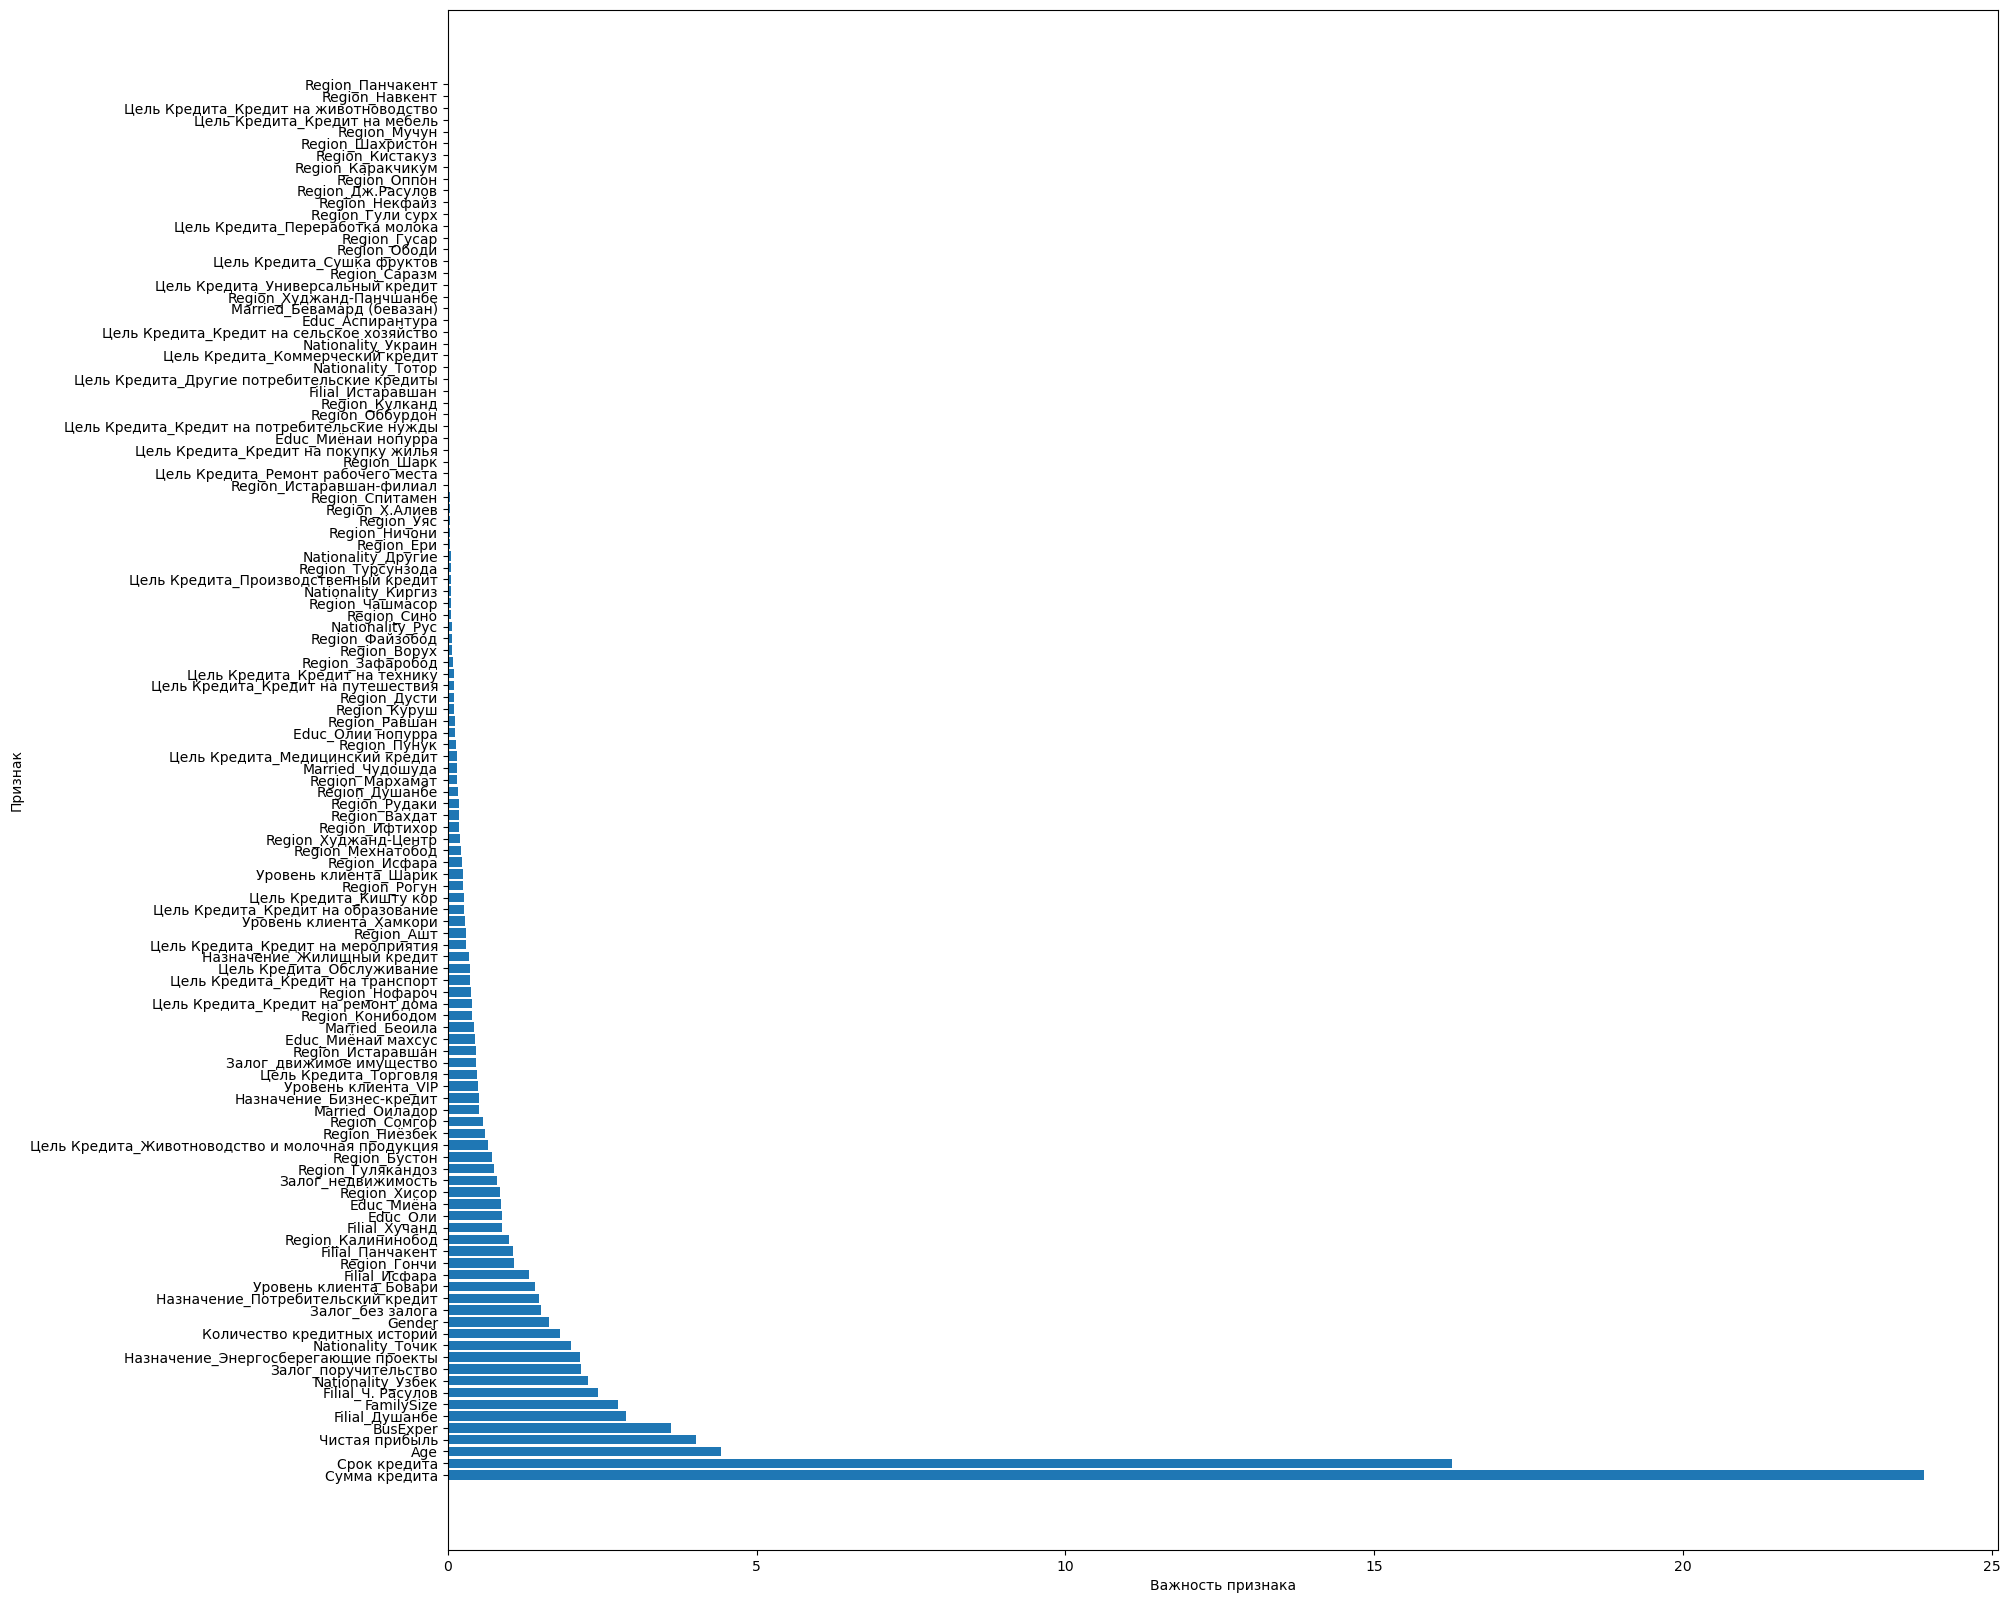

In [70]:
feature_importances = catboost.feature_importances_
feature_names = X_train_scaled.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

## XgBoost 

In [88]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [84]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

KeyboardInterrupt: 

In [89]:
xgb = XGBClassifier(n_estimators = 150 , learning_rate = 0.1 , max_depth = 6 )
xgb.fit ( X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]

In [91]:
acc_sc['xgboost'] = accuracy_score(y_test, y_pred_xgb)
auc_sc['xgboost'] = roc_auc_score(y_test, y_pred_xgb_proba)
con_mt['xgboost'] = confusion_matrix(y_test, y_pred_xgb)
print(f"accuracy {acc_sc['xgboost']}")
print(f"roc-auc  {auc_sc['xgboost']}")

accuracy 0.9343292325717634
roc-auc  0.7811841110191935


In [92]:
con_mt

{'Logistic Regression': array([[15914,    25],
        [ 1115,    16]], dtype=int64),
 'Gradient Boosting': array([[15835,   104],
        [ 1066,    65]], dtype=int64),
 'AdaBoost': array([[15920,    19],
        [ 1116,    15]], dtype=int64),
 'xgboost': array([[15920,    19],
        [ 1102,    29]], dtype=int64)}

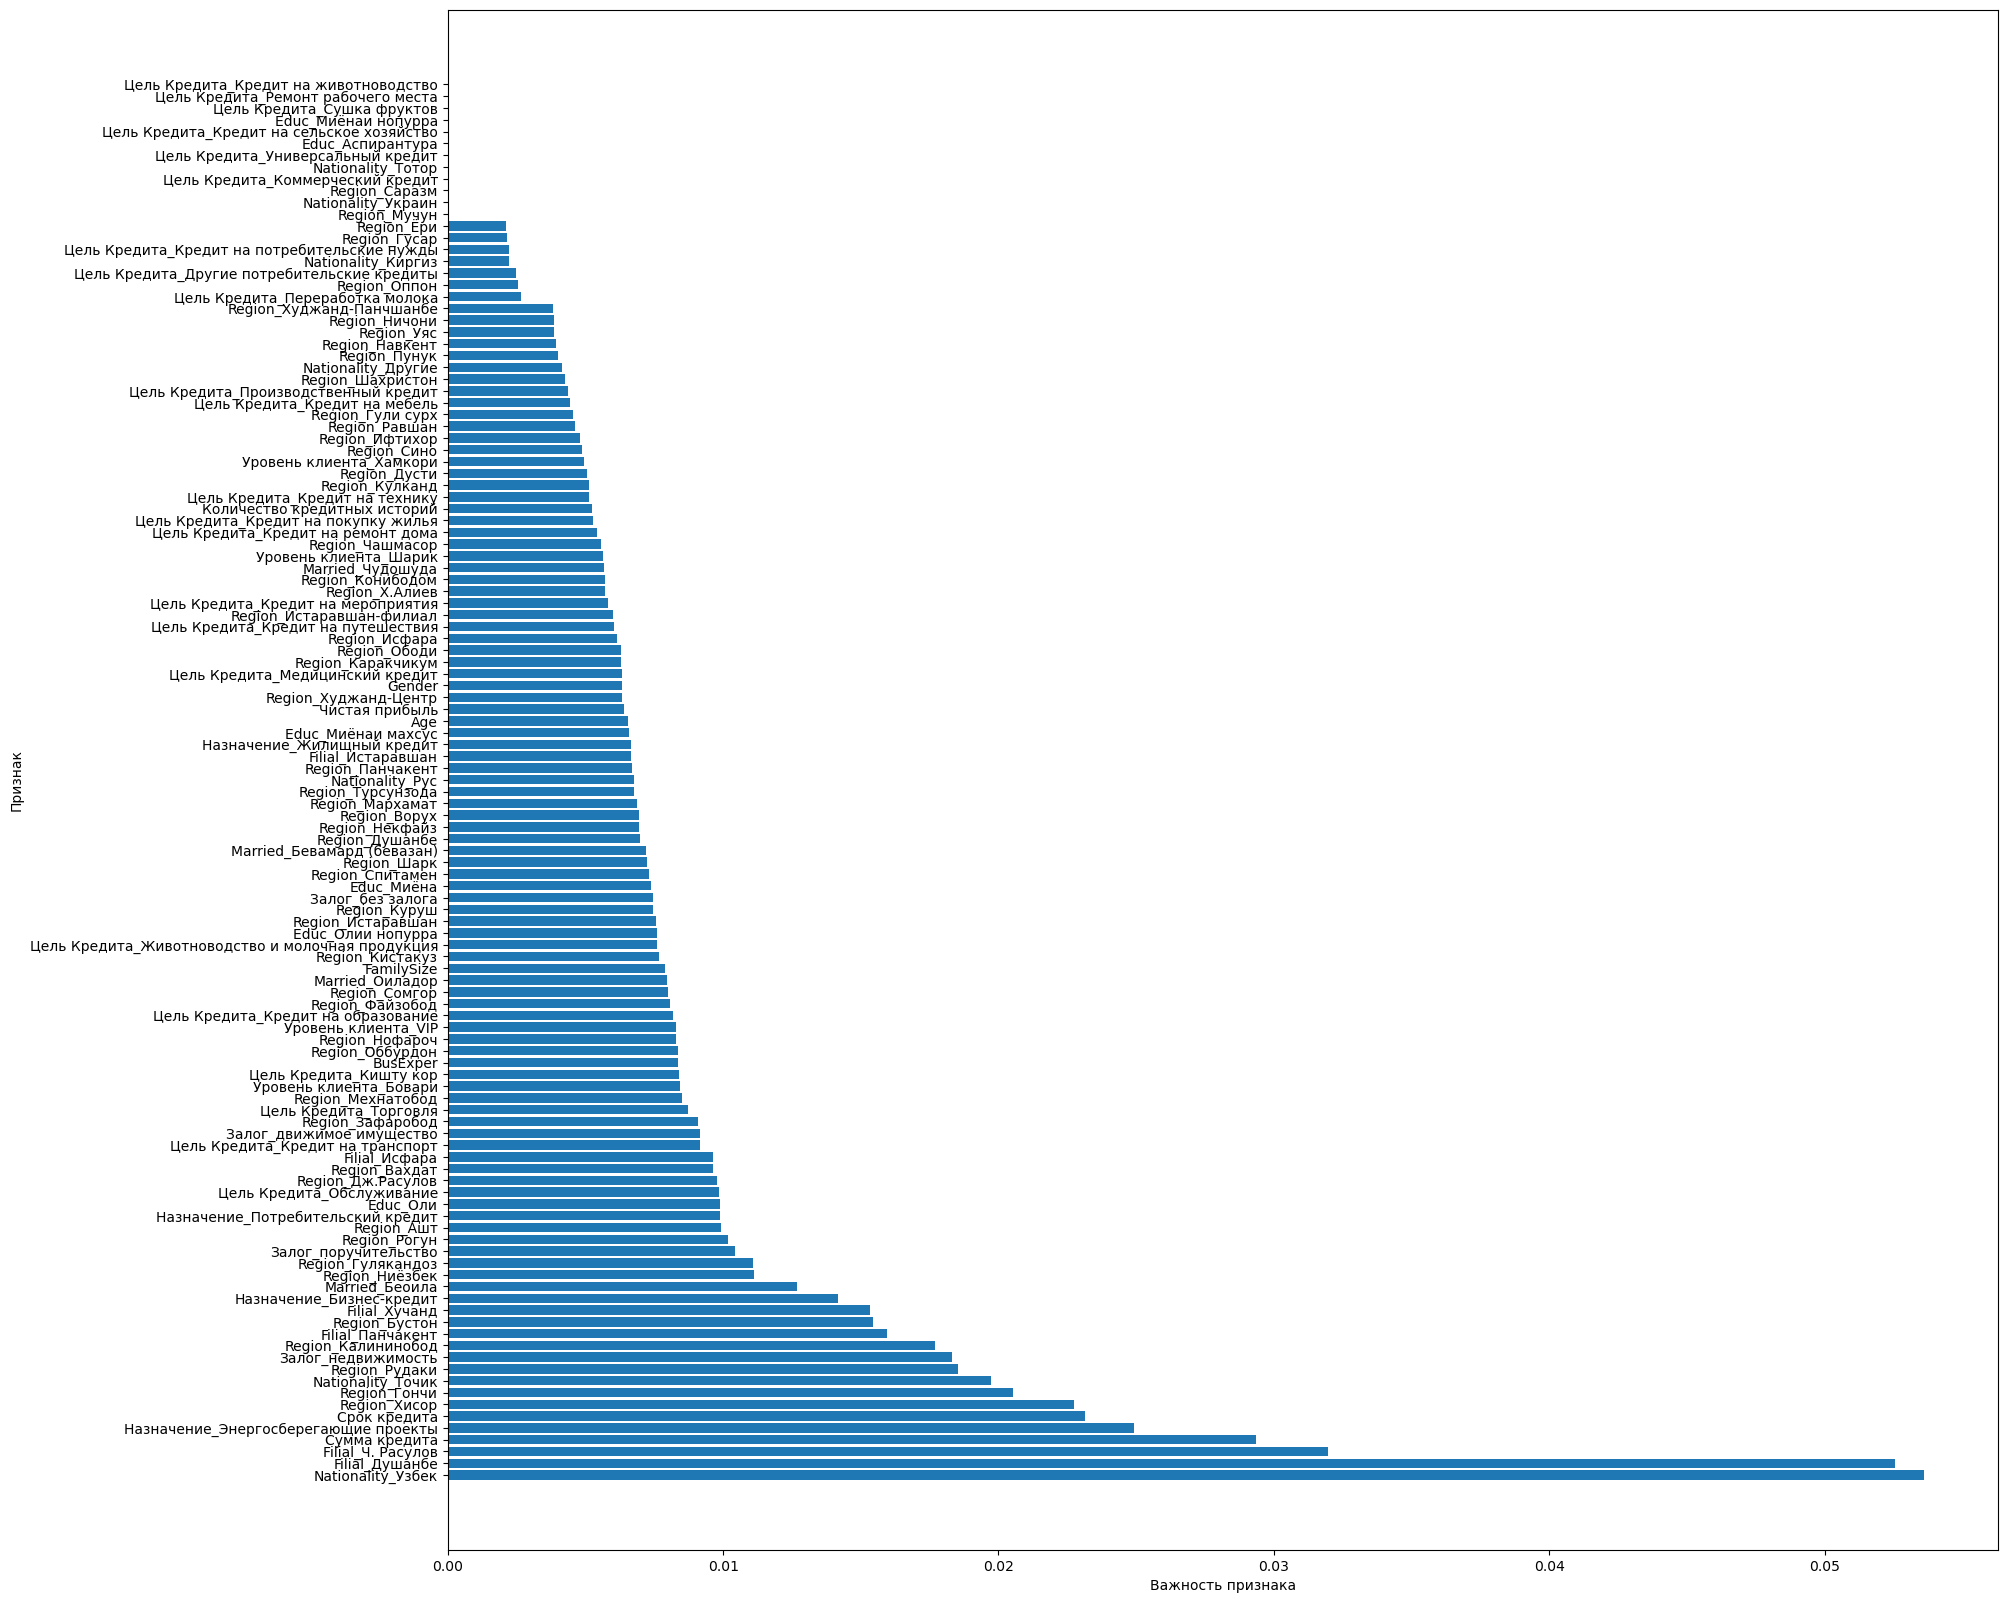

In [77]:
feature_importances = xgb.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

## GradientBoostingClassifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
GBC = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.1 , max_depth = 7 , subsample = 0.8)
GBC.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=150, subsample=0.8)

In [69]:
y_pred_GBC = GBC.predict(X_test_scaled)
y_pred_GBC_proba = GBC.predict_proba(X_test_scaled)[:, 1]

In [70]:
acc_sc['Gradient Boosting'] = accuracy_score(y_test, y_pred_GBC)
auc_sc['Gradient Boosting'] = roc_auc_score(y_test, y_pred_GBC_proba)
con_mt['Gradient Boosting'] = confusion_matrix(y_test, y_pred_GBC)
print(f"accuracy: {acc_sc['Gradient Boosting']}")
print(f"roc-auc : {auc_sc['Gradient Boosting']}")

accuracy: 0.9314586994727593
roc-auc : 0.7765389976784279


In [71]:
con_mt

{'Logistic Regression': array([[15914,    25],
        [ 1115,    16]], dtype=int64),
 'Gradient Boosting': array([[15835,   104],
        [ 1066,    65]], dtype=int64)}

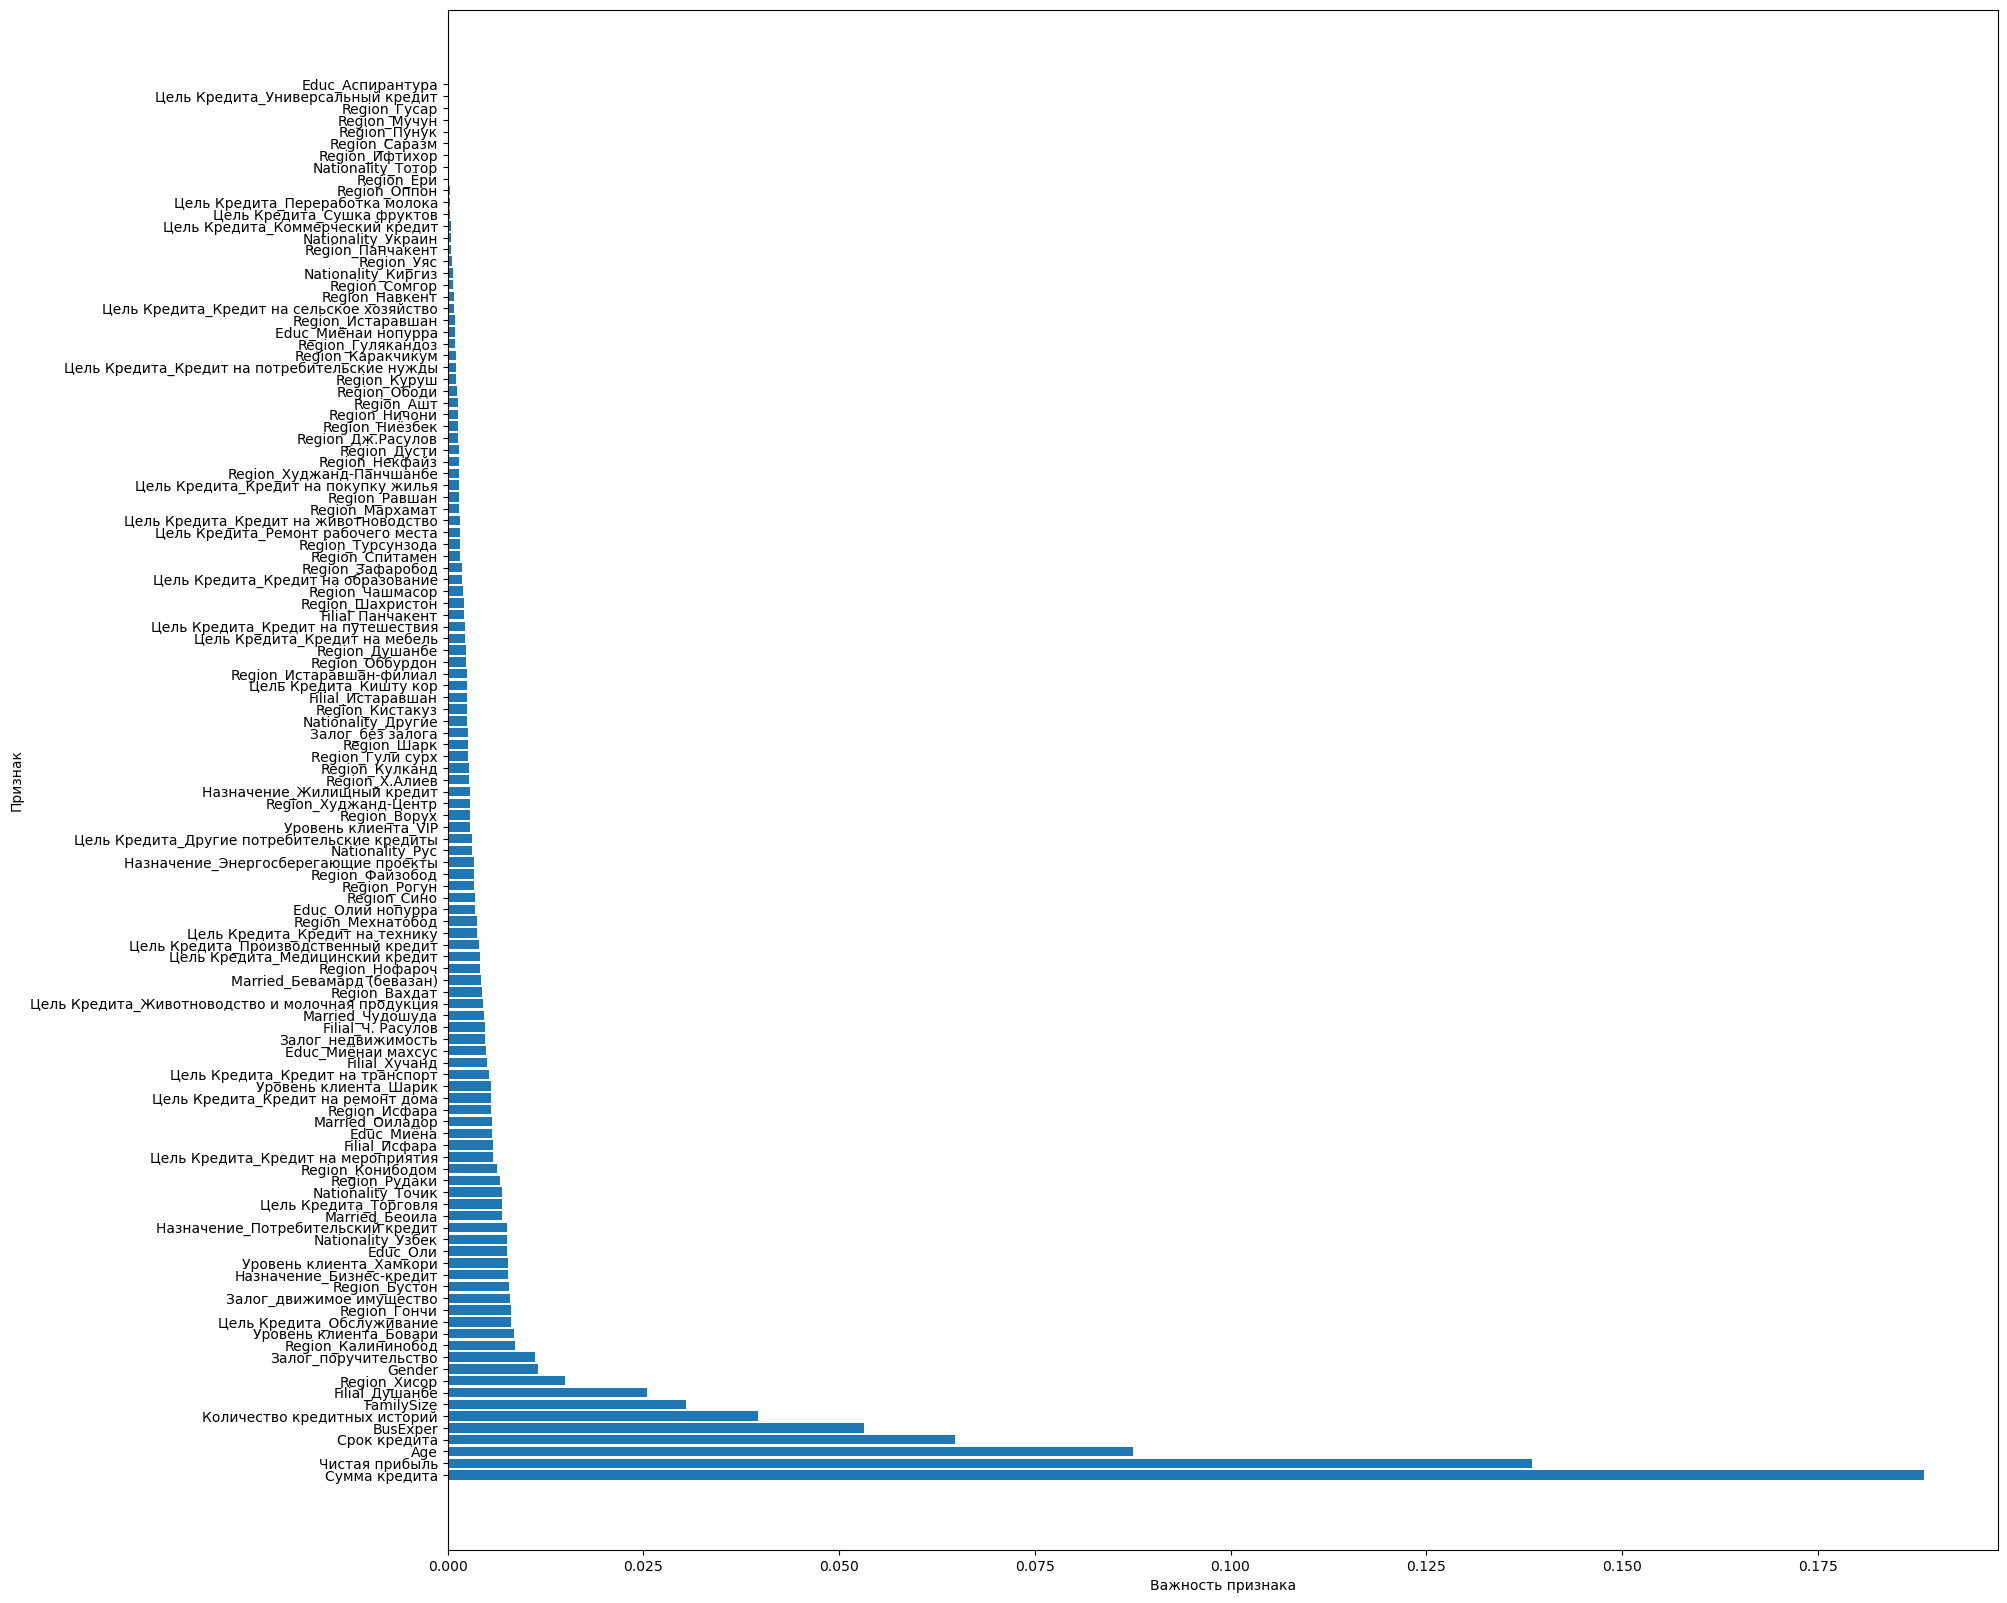

In [99]:
feature_importances = GBC.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

In [157]:
res = pd.DataFrame(data = {
    'Model'    : acc_sc.keys(),
    'AUC'      : auc_sc.values(),
    'Accuracy' : acc_sc.values(),
    'TP'       : np.array(list(con_mt.values()))[:,1,1],
    'TN'       : np.array(list(con_mt.values()))[:,1,0],
    'FP'       : np.array(list(con_mt.values()))[:,0,0],
    'FN'       : np.array(list(con_mt.values()))[:,0,1],
}, index = None)

In [158]:
res

Model       AUC  Accuracy  TP    TN     FP  FN
0  Logistic Regression  0.732560  0.933216  16  1115  15914  25
1        Decision Tree  0.709102  0.932982  18  1113  15908  31
2        Random Forest  0.776383  0.934095   9  1122  15936   3
3                  KNN  0.671249  0.931752  40  1091  15865  74
4             CatBoost  0.781733  0.934271  19  1112  15929  10
5              xgboost  0.783444  0.933978  44  1087  15899  40
6    Gradient Boosting  0.776965  0.933040  57  1074  15870  69

# Adaboost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
adaboost_clf = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42
)
adaboost_clf.fit ( X_train , y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [80]:
y_pred_adaboost = adaboost_clf.predict(X_test)
y_pred_adaboost_proba = adaboost_clf.predict_proba(X_test)[:, 1]

In [81]:
acc_sc['AdaBoost'] = accuracy_score(y_test, y_pred_adaboost)
auc_sc['AdaBoost'] = roc_auc_score(y_test, y_pred_adaboost_proba)
con_mt['AdaBoost'] = confusion_matrix(y_test, y_pred_adaboost)
print(f"accuracy: {acc_sc['AdaBoost']}")
print(f"roc-auc : {auc_sc['AdaBoost']}")

accuracy: 0.9335090802577621
roc-auc : 0.7699451417592348


In [82]:
con_mt

{'Logistic Regression': array([[15914,    25],
        [ 1115,    16]], dtype=int64),
 'Gradient Boosting': array([[15835,   104],
        [ 1066,    65]], dtype=int64),
 'AdaBoost': array([[15920,    19],
        [ 1116,    15]], dtype=int64)}

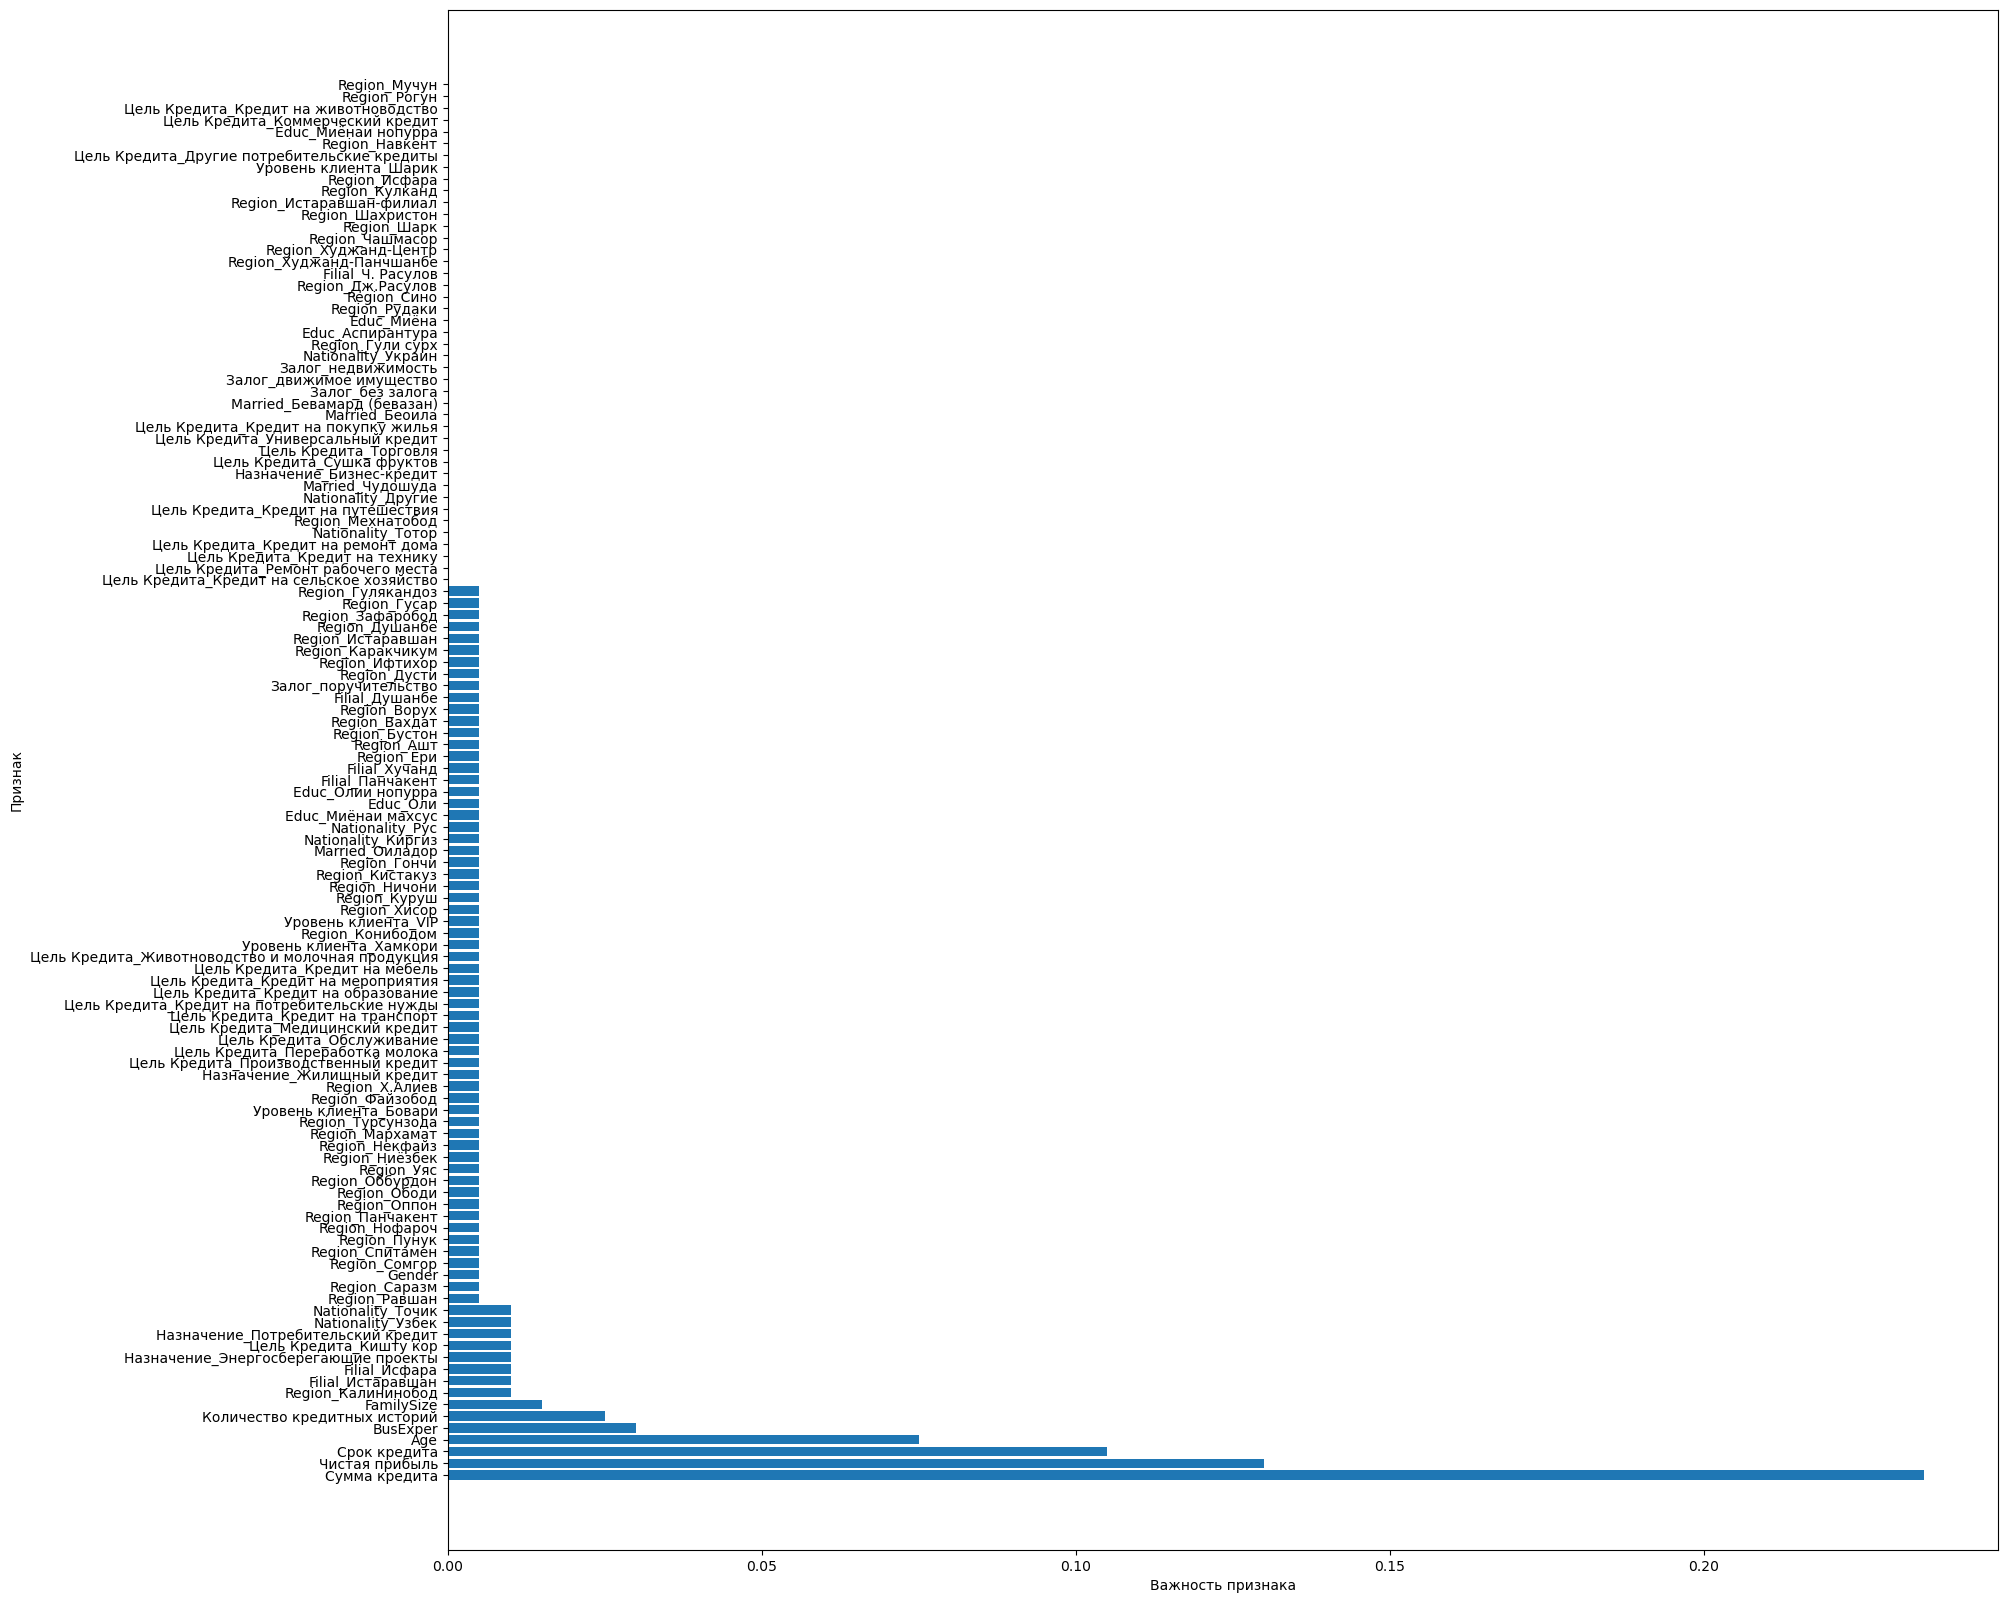

In [81]:
feature_importances = adaboost_clf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

# Regression

In [64]:
# for visualization

r2_reg = dict()
mse_reg = dict()

In [123]:
X = df.drop ( ['default_flg' , 'default_flg_days'] , axis=1)
y = df['default_flg_days']

In [125]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 49)

In [126]:
#делаем стандартизацию некотрых переменных
from sklearn.preprocessing import StandardScaler

numeric_columns = X_train.select_dtypes(include=['float64', 'int64' , 'int32']).columns

exclude_columns = ['Gender']  

columns_to_scale = [col for col in numeric_columns if col not in exclude_columns]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [130]:
LinearR = LinearRegression()
LinearR.fit(X_train_scaled,y_train)

LinearRegression()

In [134]:
y_pred_LinearR = LinearR.predict(X_test_scaled)

In [135]:
r2_reg['Linear Regression'] = r2_score(y_test, y_pred_LinearR) 
mse_reg['Linear Regression'] = mean_squared_error(y_test , y_pred_LinearR)
print(f"r2_score: {r2_reg['Linear Regression']}")
print(f"mse : {mse_reg['Linear Regression']}")

r2_score: 0.05222699796803387
mse : 40.32826823940054


## Gradient bossting

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
gb_regressor = GradientBoostingRegressor(n_estimators = 100 , learning_rate = 0.1 , max_depth = 7 , subsample = 0.8)
gb_regressor.fit ( X_train_scaled , y_train)

GradientBoostingRegressor(max_depth=7, subsample=0.8)

In [144]:
y_pred_gb_regressor = gb_regressor.predict(X_test_scaled)

In [145]:
r2_reg['Gradient Boosting'] = r2_score(y_test, y_pred_gb_regressor) 
mse_reg['Gradient Boosting'] = mean_squared_error(y_test , y_pred_gb_regressor)
print(f"r2_score: {r2_reg['Gradient Boosting']}")
print(f"mse : {mse_reg['Gradient Boosting']}")

r2_score: 0.06579756040580531
mse : 39.75083326185143


## CatBoost

In [149]:
from catboost import CatBoostRegressor

In [151]:
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7]
}

catboost_regressor = CatBoostRegressor()
grid_search = GridSearchCV(catboost_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)

0:	learn: 5.8950022	total: 4.91ms	remaining: 487ms
1:	learn: 5.8926126	total: 9.8ms	remaining: 480ms
2:	learn: 5.8902305	total: 14.3ms	remaining: 464ms
3:	learn: 5.8877845	total: 19ms	remaining: 456ms
4:	learn: 5.8855169	total: 23.5ms	remaining: 446ms
5:	learn: 5.8830324	total: 28.3ms	remaining: 444ms
6:	learn: 5.8806832	total: 33ms	remaining: 439ms
7:	learn: 5.8783299	total: 37.6ms	remaining: 433ms
8:	learn: 5.8759624	total: 42.6ms	remaining: 430ms
9:	learn: 5.8738057	total: 47.3ms	remaining: 426ms
10:	learn: 5.8717188	total: 52.1ms	remaining: 421ms
11:	learn: 5.8694401	total: 56.8ms	remaining: 417ms
12:	learn: 5.8672686	total: 61.5ms	remaining: 412ms
13:	learn: 5.8651461	total: 66.4ms	remaining: 408ms
14:	learn: 5.8630857	total: 71.1ms	remaining: 403ms
15:	learn: 5.8609278	total: 75.8ms	remaining: 398ms
16:	learn: 5.8589392	total: 80.3ms	remaining: 392ms
17:	learn: 5.8570457	total: 85ms	remaining: 387ms
18:	learn: 5.8551689	total: 89.9ms	remaining: 383ms
19:	learn: 5.8532952	total: 9

87:	learn: 5.8272214	total: 437ms	remaining: 59.6ms
88:	learn: 5.8263946	total: 442ms	remaining: 54.7ms
89:	learn: 5.8255559	total: 447ms	remaining: 49.7ms
90:	learn: 5.8248142	total: 452ms	remaining: 44.7ms
91:	learn: 5.8239635	total: 457ms	remaining: 39.7ms
92:	learn: 5.8231671	total: 462ms	remaining: 34.8ms
93:	learn: 5.8223996	total: 467ms	remaining: 29.8ms
94:	learn: 5.8216991	total: 472ms	remaining: 24.8ms
95:	learn: 5.8209261	total: 477ms	remaining: 19.9ms
96:	learn: 5.8201761	total: 482ms	remaining: 14.9ms
97:	learn: 5.8193556	total: 488ms	remaining: 9.95ms
98:	learn: 5.8186222	total: 493ms	remaining: 4.97ms
99:	learn: 5.8178278	total: 497ms	remaining: 0us
0:	learn: 5.9313510	total: 4.37ms	remaining: 433ms
1:	learn: 5.9290124	total: 9ms	remaining: 441ms
2:	learn: 5.9266716	total: 13.7ms	remaining: 444ms
3:	learn: 5.9241919	total: 19.3ms	remaining: 462ms
4:	learn: 5.9219430	total: 24.4ms	remaining: 464ms
5:	learn: 5.9194737	total: 28.9ms	remaining: 453ms
6:	learn: 5.9171074	tota

53:	learn: 5.8666561	total: 260ms	remaining: 222ms
54:	learn: 5.8656551	total: 265ms	remaining: 217ms
55:	learn: 5.8645358	total: 270ms	remaining: 212ms
56:	learn: 5.8633813	total: 276ms	remaining: 208ms
57:	learn: 5.8621532	total: 281ms	remaining: 204ms
58:	learn: 5.8609840	total: 287ms	remaining: 199ms
59:	learn: 5.8597866	total: 292ms	remaining: 195ms
60:	learn: 5.8586802	total: 297ms	remaining: 190ms
61:	learn: 5.8575884	total: 302ms	remaining: 185ms
62:	learn: 5.8564589	total: 306ms	remaining: 180ms
63:	learn: 5.8553506	total: 311ms	remaining: 175ms
64:	learn: 5.8539610	total: 316ms	remaining: 170ms
65:	learn: 5.8528394	total: 321ms	remaining: 165ms
66:	learn: 5.8516248	total: 325ms	remaining: 160ms
67:	learn: 5.8505134	total: 330ms	remaining: 155ms
68:	learn: 5.8494159	total: 335ms	remaining: 150ms
69:	learn: 5.8484086	total: 339ms	remaining: 145ms
70:	learn: 5.8473729	total: 344ms	remaining: 141ms
71:	learn: 5.8464131	total: 349ms	remaining: 136ms
72:	learn: 5.8453939	total: 354

54:	learn: 5.6281956	total: 269ms	remaining: 220ms
55:	learn: 5.6269370	total: 274ms	remaining: 215ms
56:	learn: 5.6227438	total: 279ms	remaining: 210ms
57:	learn: 5.6214345	total: 284ms	remaining: 205ms
58:	learn: 5.6199866	total: 289ms	remaining: 201ms
59:	learn: 5.6156467	total: 294ms	remaining: 196ms
60:	learn: 5.6145584	total: 300ms	remaining: 192ms
61:	learn: 5.6133900	total: 305ms	remaining: 187ms
62:	learn: 5.6091596	total: 309ms	remaining: 182ms
63:	learn: 5.6079615	total: 314ms	remaining: 177ms
64:	learn: 5.6069052	total: 319ms	remaining: 172ms
65:	learn: 5.6056404	total: 324ms	remaining: 167ms
66:	learn: 5.6037319	total: 329ms	remaining: 162ms
67:	learn: 5.6026949	total: 334ms	remaining: 157ms
68:	learn: 5.6019774	total: 339ms	remaining: 152ms
69:	learn: 5.6008755	total: 344ms	remaining: 147ms
70:	learn: 5.5993171	total: 348ms	remaining: 142ms
71:	learn: 5.5985795	total: 353ms	remaining: 137ms
72:	learn: 5.5948897	total: 358ms	remaining: 132ms
73:	learn: 5.5940878	total: 363

41:	learn: 5.6648042	total: 200ms	remaining: 276ms
42:	learn: 5.6632758	total: 205ms	remaining: 272ms
43:	learn: 5.6614359	total: 211ms	remaining: 268ms
44:	learn: 5.6595580	total: 216ms	remaining: 264ms
45:	learn: 5.6582015	total: 220ms	remaining: 259ms
46:	learn: 5.6564712	total: 225ms	remaining: 254ms
47:	learn: 5.6552787	total: 230ms	remaining: 249ms
48:	learn: 5.6519208	total: 235ms	remaining: 244ms
49:	learn: 5.6503208	total: 239ms	remaining: 239ms
50:	learn: 5.6485662	total: 244ms	remaining: 234ms
51:	learn: 5.6406855	total: 248ms	remaining: 229ms
52:	learn: 5.6393978	total: 253ms	remaining: 224ms
53:	learn: 5.6384762	total: 258ms	remaining: 220ms
54:	learn: 5.6373356	total: 262ms	remaining: 215ms
55:	learn: 5.6341571	total: 267ms	remaining: 210ms
56:	learn: 5.6330355	total: 271ms	remaining: 205ms
57:	learn: 5.6313919	total: 276ms	remaining: 200ms
58:	learn: 5.6298882	total: 281ms	remaining: 195ms
59:	learn: 5.6230861	total: 285ms	remaining: 190ms
60:	learn: 5.6219969	total: 290

45:	learn: 5.6421618	total: 212ms	remaining: 249ms
46:	learn: 5.6374129	total: 217ms	remaining: 245ms
47:	learn: 5.6311579	total: 222ms	remaining: 241ms
48:	learn: 5.6266542	total: 227ms	remaining: 236ms
49:	learn: 5.6240119	total: 232ms	remaining: 232ms
50:	learn: 5.6220345	total: 238ms	remaining: 229ms
51:	learn: 5.6208475	total: 243ms	remaining: 225ms
52:	learn: 5.6194612	total: 248ms	remaining: 220ms
53:	learn: 5.6121267	total: 253ms	remaining: 216ms
54:	learn: 5.6056888	total: 258ms	remaining: 211ms
55:	learn: 5.6037863	total: 263ms	remaining: 206ms
56:	learn: 5.6027616	total: 267ms	remaining: 201ms
57:	learn: 5.6015164	total: 272ms	remaining: 197ms
58:	learn: 5.6003380	total: 276ms	remaining: 192ms
59:	learn: 5.5992302	total: 281ms	remaining: 187ms
60:	learn: 5.5978763	total: 286ms	remaining: 183ms
61:	learn: 5.5960668	total: 290ms	remaining: 178ms
62:	learn: 5.5953202	total: 295ms	remaining: 173ms
63:	learn: 5.5942837	total: 299ms	remaining: 168ms
64:	learn: 5.5930735	total: 304

14:	learn: 5.7384787	total: 70.7ms	remaining: 401ms
15:	learn: 5.7337243	total: 75.3ms	remaining: 395ms
16:	learn: 5.7292104	total: 80.8ms	remaining: 394ms
17:	learn: 5.7272085	total: 85.3ms	remaining: 389ms
18:	learn: 5.7127883	total: 90.4ms	remaining: 385ms
19:	learn: 5.7096756	total: 95.5ms	remaining: 382ms
20:	learn: 5.7053024	total: 100ms	remaining: 377ms
21:	learn: 5.7008268	total: 105ms	remaining: 372ms
22:	learn: 5.6955133	total: 110ms	remaining: 367ms
23:	learn: 5.6929009	total: 114ms	remaining: 362ms
24:	learn: 5.6899823	total: 119ms	remaining: 356ms
25:	learn: 5.6861841	total: 124ms	remaining: 352ms
26:	learn: 5.6837507	total: 128ms	remaining: 347ms
27:	learn: 5.6809623	total: 133ms	remaining: 343ms
28:	learn: 5.6750152	total: 138ms	remaining: 339ms
29:	learn: 5.6739189	total: 143ms	remaining: 333ms
30:	learn: 5.6544437	total: 147ms	remaining: 327ms
31:	learn: 5.6497172	total: 152ms	remaining: 322ms
32:	learn: 5.6346828	total: 156ms	remaining: 317ms
33:	learn: 5.6261337	tota

85:	learn: 5.4738507	total: 401ms	remaining: 65.3ms
86:	learn: 5.4726237	total: 406ms	remaining: 60.7ms
87:	learn: 5.4718471	total: 411ms	remaining: 56.1ms
88:	learn: 5.4686192	total: 416ms	remaining: 51.5ms
89:	learn: 5.4667023	total: 421ms	remaining: 46.8ms
90:	learn: 5.4644544	total: 427ms	remaining: 42.2ms
91:	learn: 5.4630436	total: 433ms	remaining: 37.6ms
92:	learn: 5.4619381	total: 437ms	remaining: 32.9ms
93:	learn: 5.4607468	total: 442ms	remaining: 28.2ms
94:	learn: 5.4596223	total: 446ms	remaining: 23.5ms
95:	learn: 5.4555643	total: 451ms	remaining: 18.8ms
96:	learn: 5.4546816	total: 455ms	remaining: 14.1ms
97:	learn: 5.4520259	total: 460ms	remaining: 9.38ms
98:	learn: 5.4508110	total: 464ms	remaining: 4.69ms
99:	learn: 5.4502750	total: 469ms	remaining: 0us
0:	learn: 5.9128029	total: 4.65ms	remaining: 460ms
1:	learn: 5.8799049	total: 9.62ms	remaining: 471ms
2:	learn: 5.8520984	total: 14.4ms	remaining: 467ms
3:	learn: 5.8323102	total: 19.3ms	remaining: 463ms
4:	learn: 5.8141387

47:	learn: 5.5545484	total: 231ms	remaining: 250ms
48:	learn: 5.5443324	total: 236ms	remaining: 246ms
49:	learn: 5.5430952	total: 241ms	remaining: 241ms
50:	learn: 5.5406885	total: 245ms	remaining: 236ms
51:	learn: 5.5396626	total: 250ms	remaining: 231ms
52:	learn: 5.5380621	total: 256ms	remaining: 227ms
53:	learn: 5.5351406	total: 261ms	remaining: 222ms
54:	learn: 5.5336607	total: 266ms	remaining: 218ms
55:	learn: 5.5319829	total: 271ms	remaining: 213ms
56:	learn: 5.5291625	total: 276ms	remaining: 208ms
57:	learn: 5.5276109	total: 281ms	remaining: 203ms
58:	learn: 5.5262571	total: 287ms	remaining: 199ms
59:	learn: 5.5248143	total: 291ms	remaining: 194ms
60:	learn: 5.5222221	total: 295ms	remaining: 189ms
61:	learn: 5.5199718	total: 300ms	remaining: 184ms
62:	learn: 5.5182109	total: 304ms	remaining: 179ms
63:	learn: 5.5162296	total: 309ms	remaining: 174ms
64:	learn: 5.5126045	total: 313ms	remaining: 169ms
65:	learn: 5.5114762	total: 318ms	remaining: 164ms
66:	learn: 5.5094056	total: 323

16:	learn: 5.9193049	total: 80ms	remaining: 391ms
17:	learn: 5.9173444	total: 85.9ms	remaining: 391ms
18:	learn: 5.9154313	total: 91ms	remaining: 388ms
19:	learn: 5.9136694	total: 96.3ms	remaining: 385ms
20:	learn: 5.9118732	total: 101ms	remaining: 381ms
21:	learn: 5.9099160	total: 106ms	remaining: 378ms
22:	learn: 5.9079717	total: 112ms	remaining: 374ms
23:	learn: 5.9062849	total: 116ms	remaining: 368ms
24:	learn: 5.9045500	total: 121ms	remaining: 362ms
25:	learn: 5.9027670	total: 126ms	remaining: 357ms
26:	learn: 5.9010506	total: 130ms	remaining: 352ms
27:	learn: 5.8993903	total: 135ms	remaining: 347ms
28:	learn: 5.8977837	total: 140ms	remaining: 342ms
29:	learn: 5.8961327	total: 144ms	remaining: 337ms
30:	learn: 5.8943339	total: 149ms	remaining: 332ms
31:	learn: 5.8927569	total: 154ms	remaining: 327ms
32:	learn: 5.8911529	total: 159ms	remaining: 323ms
33:	learn: 5.8895969	total: 163ms	remaining: 317ms
34:	learn: 5.8880031	total: 168ms	remaining: 312ms
35:	learn: 5.8864314	total: 173

82:	learn: 5.8110692	total: 399ms	remaining: 81.7ms
83:	learn: 5.8101969	total: 404ms	remaining: 77ms
84:	learn: 5.8092639	total: 409ms	remaining: 72.2ms
85:	learn: 5.8084879	total: 415ms	remaining: 67.5ms
86:	learn: 5.8076016	total: 420ms	remaining: 62.7ms
87:	learn: 5.8067656	total: 425ms	remaining: 57.9ms
88:	learn: 5.8059740	total: 430ms	remaining: 53.1ms
89:	learn: 5.8051402	total: 435ms	remaining: 48.3ms
90:	learn: 5.8043875	total: 439ms	remaining: 43.4ms
91:	learn: 5.8036051	total: 444ms	remaining: 38.6ms
92:	learn: 5.8028117	total: 448ms	remaining: 33.7ms
93:	learn: 5.8020724	total: 453ms	remaining: 28.9ms
94:	learn: 5.8012904	total: 458ms	remaining: 24.1ms
95:	learn: 5.8005431	total: 462ms	remaining: 19.2ms
96:	learn: 5.7998171	total: 467ms	remaining: 14.4ms
97:	learn: 5.7991530	total: 471ms	remaining: 9.62ms
98:	learn: 5.7984354	total: 476ms	remaining: 4.81ms
99:	learn: 5.7977508	total: 481ms	remaining: 0us
0:	learn: 5.9620536	total: 4.51ms	remaining: 447ms
1:	learn: 5.959486

52:	learn: 5.8288206	total: 254ms	remaining: 225ms
53:	learn: 5.8275436	total: 259ms	remaining: 221ms
54:	learn: 5.8263380	total: 264ms	remaining: 216ms
55:	learn: 5.8250651	total: 269ms	remaining: 212ms
56:	learn: 5.8237926	total: 274ms	remaining: 207ms
57:	learn: 5.8226370	total: 280ms	remaining: 203ms
58:	learn: 5.8214861	total: 285ms	remaining: 198ms
59:	learn: 5.8203322	total: 289ms	remaining: 193ms
60:	learn: 5.8191650	total: 295ms	remaining: 188ms
61:	learn: 5.8180616	total: 299ms	remaining: 183ms
62:	learn: 5.8170292	total: 304ms	remaining: 178ms
63:	learn: 5.8158425	total: 309ms	remaining: 174ms
64:	learn: 5.8147715	total: 314ms	remaining: 169ms
65:	learn: 5.8136390	total: 319ms	remaining: 164ms
66:	learn: 5.8126424	total: 324ms	remaining: 160ms
67:	learn: 5.8115204	total: 329ms	remaining: 155ms
68:	learn: 5.8104773	total: 334ms	remaining: 150ms
69:	learn: 5.8094585	total: 339ms	remaining: 145ms
70:	learn: 5.8084322	total: 343ms	remaining: 140ms
71:	learn: 5.8074466	total: 348

22:	learn: 5.7584279	total: 108ms	remaining: 362ms
23:	learn: 5.7556633	total: 113ms	remaining: 358ms
24:	learn: 5.7475487	total: 118ms	remaining: 354ms
25:	learn: 5.7451233	total: 123ms	remaining: 350ms
26:	learn: 5.7376843	total: 129ms	remaining: 349ms
27:	learn: 5.7347801	total: 134ms	remaining: 345ms
28:	learn: 5.7306621	total: 139ms	remaining: 341ms
29:	learn: 5.7275299	total: 144ms	remaining: 337ms
30:	learn: 5.7255074	total: 149ms	remaining: 332ms
31:	learn: 5.7188155	total: 154ms	remaining: 327ms
32:	learn: 5.7163520	total: 158ms	remaining: 322ms
33:	learn: 5.7113733	total: 163ms	remaining: 316ms
34:	learn: 5.7093028	total: 168ms	remaining: 311ms
35:	learn: 5.7071806	total: 172ms	remaining: 306ms
36:	learn: 5.7046827	total: 177ms	remaining: 301ms
37:	learn: 5.6988674	total: 181ms	remaining: 296ms
38:	learn: 5.6971726	total: 186ms	remaining: 290ms
39:	learn: 5.6959199	total: 190ms	remaining: 285ms
40:	learn: 5.6947080	total: 195ms	remaining: 280ms
41:	learn: 5.6892122	total: 199

84:	learn: 5.5947151	total: 399ms	remaining: 70.5ms
85:	learn: 5.5929361	total: 405ms	remaining: 65.9ms
86:	learn: 5.5919719	total: 410ms	remaining: 61.2ms
87:	learn: 5.5884597	total: 414ms	remaining: 56.5ms
88:	learn: 5.5877554	total: 419ms	remaining: 51.8ms
89:	learn: 5.5864656	total: 425ms	remaining: 47.2ms
90:	learn: 5.5854643	total: 430ms	remaining: 42.5ms
91:	learn: 5.5848879	total: 435ms	remaining: 37.8ms
92:	learn: 5.5843361	total: 440ms	remaining: 33.1ms
93:	learn: 5.5836526	total: 444ms	remaining: 28.4ms
94:	learn: 5.5829756	total: 449ms	remaining: 23.6ms
95:	learn: 5.5810777	total: 454ms	remaining: 18.9ms
96:	learn: 5.5807490	total: 458ms	remaining: 14.2ms
97:	learn: 5.5803368	total: 463ms	remaining: 9.45ms
98:	learn: 5.5792397	total: 468ms	remaining: 4.72ms
99:	learn: 5.5785627	total: 472ms	remaining: 0us
0:	learn: 5.9375276	total: 4.97ms	remaining: 492ms
1:	learn: 5.9178582	total: 10.1ms	remaining: 495ms
2:	learn: 5.8976681	total: 15.1ms	remaining: 489ms
3:	learn: 5.881480

58:	learn: 5.6199758	total: 276ms	remaining: 192ms
59:	learn: 5.6191621	total: 282ms	remaining: 188ms
60:	learn: 5.6179074	total: 287ms	remaining: 183ms
61:	learn: 5.6165724	total: 292ms	remaining: 179ms
62:	learn: 5.6157795	total: 297ms	remaining: 175ms
63:	learn: 5.6147225	total: 303ms	remaining: 170ms
64:	learn: 5.6120888	total: 307ms	remaining: 165ms
65:	learn: 5.6104024	total: 312ms	remaining: 161ms
66:	learn: 5.6093735	total: 317ms	remaining: 156ms
67:	learn: 5.6076152	total: 321ms	remaining: 151ms
68:	learn: 5.6067603	total: 326ms	remaining: 146ms
69:	learn: 5.6060093	total: 331ms	remaining: 142ms
70:	learn: 5.6050896	total: 335ms	remaining: 137ms
71:	learn: 5.6042209	total: 340ms	remaining: 132ms
72:	learn: 5.5999936	total: 344ms	remaining: 127ms
73:	learn: 5.5959307	total: 349ms	remaining: 123ms
74:	learn: 5.5952035	total: 353ms	remaining: 118ms
75:	learn: 5.5941734	total: 358ms	remaining: 113ms
76:	learn: 5.5938146	total: 363ms	remaining: 108ms
77:	learn: 5.5932863	total: 367

48:	learn: 5.6007862	total: 233ms	remaining: 243ms
49:	learn: 5.5993321	total: 239ms	remaining: 239ms
50:	learn: 5.5983711	total: 243ms	remaining: 234ms
51:	learn: 5.5930688	total: 248ms	remaining: 229ms
52:	learn: 5.5913391	total: 253ms	remaining: 224ms
53:	learn: 5.5902244	total: 259ms	remaining: 220ms
54:	learn: 5.5892353	total: 264ms	remaining: 216ms
55:	learn: 5.5877590	total: 268ms	remaining: 211ms
56:	learn: 5.5860682	total: 273ms	remaining: 206ms
57:	learn: 5.5841326	total: 278ms	remaining: 201ms
58:	learn: 5.5833165	total: 283ms	remaining: 197ms
59:	learn: 5.5780255	total: 288ms	remaining: 192ms
60:	learn: 5.5765600	total: 293ms	remaining: 187ms
61:	learn: 5.5718060	total: 297ms	remaining: 182ms
62:	learn: 5.5704051	total: 302ms	remaining: 178ms
63:	learn: 5.5677996	total: 307ms	remaining: 173ms
64:	learn: 5.5655946	total: 312ms	remaining: 168ms
65:	learn: 5.5634939	total: 316ms	remaining: 163ms
66:	learn: 5.5626502	total: 321ms	remaining: 158ms
67:	learn: 5.5608771	total: 325

13:	learn: 5.7333881	total: 79.5ms	remaining: 489ms
14:	learn: 5.7259234	total: 84.6ms	remaining: 479ms
15:	learn: 5.7227674	total: 89.6ms	remaining: 470ms
16:	learn: 5.7180838	total: 94.6ms	remaining: 462ms
17:	learn: 5.7156640	total: 99.7ms	remaining: 454ms
18:	learn: 5.7107181	total: 104ms	remaining: 444ms
19:	learn: 5.7083787	total: 109ms	remaining: 437ms
20:	learn: 5.7057806	total: 114ms	remaining: 430ms
21:	learn: 5.7022588	total: 119ms	remaining: 422ms
22:	learn: 5.6986172	total: 124ms	remaining: 414ms
23:	learn: 5.6931727	total: 128ms	remaining: 406ms
24:	learn: 5.6884735	total: 133ms	remaining: 400ms
25:	learn: 5.6851818	total: 138ms	remaining: 394ms
26:	learn: 5.6827124	total: 143ms	remaining: 387ms
27:	learn: 5.6806831	total: 148ms	remaining: 381ms
28:	learn: 5.6781511	total: 153ms	remaining: 374ms
29:	learn: 5.6771429	total: 157ms	remaining: 367ms
30:	learn: 5.6748502	total: 162ms	remaining: 361ms
31:	learn: 5.6701419	total: 166ms	remaining: 354ms
32:	learn: 5.6666931	total

84:	learn: 5.5000352	total: 400ms	remaining: 70.6ms
85:	learn: 5.4985219	total: 405ms	remaining: 65.9ms
86:	learn: 5.4976521	total: 410ms	remaining: 61.2ms
87:	learn: 5.4964408	total: 414ms	remaining: 56.5ms
88:	learn: 5.4925025	total: 420ms	remaining: 51.9ms
89:	learn: 5.4914298	total: 425ms	remaining: 47.2ms
90:	learn: 5.4903705	total: 429ms	remaining: 42.4ms
91:	learn: 5.4892218	total: 434ms	remaining: 37.7ms
92:	learn: 5.4883125	total: 439ms	remaining: 33ms
93:	learn: 5.4850108	total: 444ms	remaining: 28.3ms
94:	learn: 5.4831291	total: 449ms	remaining: 23.6ms
95:	learn: 5.4821863	total: 454ms	remaining: 18.9ms
96:	learn: 5.4813214	total: 459ms	remaining: 14.2ms
97:	learn: 5.4799125	total: 464ms	remaining: 9.47ms
98:	learn: 5.4798220	total: 469ms	remaining: 4.73ms
99:	learn: 5.4761305	total: 473ms	remaining: 0us
0:	learn: 5.8950055	total: 4.74ms	remaining: 470ms
1:	learn: 5.8926239	total: 9.53ms	remaining: 467ms
2:	learn: 5.8902444	total: 14.4ms	remaining: 466ms
3:	learn: 5.8878057	

45:	learn: 5.8726292	total: 220ms	remaining: 258ms
46:	learn: 5.8712487	total: 225ms	remaining: 254ms
47:	learn: 5.8698278	total: 231ms	remaining: 250ms
48:	learn: 5.8685257	total: 236ms	remaining: 245ms
49:	learn: 5.8673072	total: 241ms	remaining: 241ms
50:	learn: 5.8660835	total: 247ms	remaining: 237ms
51:	learn: 5.8650812	total: 259ms	remaining: 239ms
52:	learn: 5.8637692	total: 266ms	remaining: 235ms
53:	learn: 5.8625463	total: 272ms	remaining: 231ms
54:	learn: 5.8615517	total: 278ms	remaining: 227ms
55:	learn: 5.8602818	total: 283ms	remaining: 222ms
56:	learn: 5.8591092	total: 289ms	remaining: 218ms
57:	learn: 5.8580240	total: 294ms	remaining: 213ms
58:	learn: 5.8568000	total: 300ms	remaining: 208ms
59:	learn: 5.8555658	total: 305ms	remaining: 203ms
60:	learn: 5.8544346	total: 310ms	remaining: 198ms
61:	learn: 5.8533570	total: 315ms	remaining: 193ms
62:	learn: 5.8522953	total: 320ms	remaining: 188ms
63:	learn: 5.8511904	total: 324ms	remaining: 182ms
64:	learn: 5.8499898	total: 329

11:	learn: 5.9348250	total: 56ms	remaining: 411ms
12:	learn: 5.9326437	total: 61.8ms	remaining: 414ms
13:	learn: 5.9304638	total: 67ms	remaining: 411ms
14:	learn: 5.9284668	total: 72ms	remaining: 408ms
15:	learn: 5.9262305	total: 77.1ms	remaining: 405ms
16:	learn: 5.9240566	total: 82.5ms	remaining: 403ms
17:	learn: 5.9221513	total: 87.8ms	remaining: 400ms
18:	learn: 5.9201937	total: 92.9ms	remaining: 396ms
19:	learn: 5.9184400	total: 97.8ms	remaining: 391ms
20:	learn: 5.9163746	total: 103ms	remaining: 386ms
21:	learn: 5.9144831	total: 107ms	remaining: 381ms
22:	learn: 5.9128357	total: 113ms	remaining: 377ms
23:	learn: 5.9111178	total: 118ms	remaining: 372ms
24:	learn: 5.9093036	total: 122ms	remaining: 367ms
25:	learn: 5.9076017	total: 127ms	remaining: 362ms
26:	learn: 5.9058207	total: 133ms	remaining: 358ms
27:	learn: 5.9039597	total: 137ms	remaining: 353ms
28:	learn: 5.9024029	total: 143ms	remaining: 350ms
29:	learn: 5.9007879	total: 147ms	remaining: 344ms
30:	learn: 5.8991335	total: 

0:	learn: 5.8752808	total: 4.58ms	remaining: 454ms
1:	learn: 5.8554115	total: 9.18ms	remaining: 450ms
2:	learn: 5.8383126	total: 14ms	remaining: 452ms
3:	learn: 5.8215286	total: 18.7ms	remaining: 448ms
4:	learn: 5.8066139	total: 23.5ms	remaining: 447ms
5:	learn: 5.7957186	total: 28.4ms	remaining: 445ms
6:	learn: 5.7849696	total: 32.9ms	remaining: 438ms
7:	learn: 5.7757856	total: 37.5ms	remaining: 431ms
8:	learn: 5.7671056	total: 42.2ms	remaining: 427ms
9:	learn: 5.7604644	total: 47ms	remaining: 423ms
10:	learn: 5.7525353	total: 51.9ms	remaining: 420ms
11:	learn: 5.7461186	total: 56.9ms	remaining: 417ms
12:	learn: 5.7405496	total: 61.9ms	remaining: 414ms
13:	learn: 5.7357492	total: 66.2ms	remaining: 407ms
14:	learn: 5.7311339	total: 71.1ms	remaining: 403ms
15:	learn: 5.7272952	total: 75.9ms	remaining: 399ms
16:	learn: 5.7231282	total: 80.7ms	remaining: 394ms
17:	learn: 5.7184596	total: 85.5ms	remaining: 390ms
18:	learn: 5.7153119	total: 90.4ms	remaining: 385ms
19:	learn: 5.7120619	total

91:	learn: 5.6193683	total: 438ms	remaining: 38.1ms
92:	learn: 5.6187170	total: 443ms	remaining: 33.4ms
93:	learn: 5.6181494	total: 449ms	remaining: 28.6ms
94:	learn: 5.6177732	total: 454ms	remaining: 23.9ms
95:	learn: 5.6173298	total: 459ms	remaining: 19.1ms
96:	learn: 5.6162443	total: 464ms	remaining: 14.4ms
97:	learn: 5.6159271	total: 469ms	remaining: 9.58ms
98:	learn: 5.6150941	total: 474ms	remaining: 4.78ms
99:	learn: 5.6146225	total: 478ms	remaining: 0us
0:	learn: 5.9093793	total: 4.5ms	remaining: 445ms
1:	learn: 5.8894190	total: 9.03ms	remaining: 442ms
2:	learn: 5.8705724	total: 13.6ms	remaining: 441ms
3:	learn: 5.8551816	total: 18.3ms	remaining: 440ms
4:	learn: 5.8430450	total: 22.8ms	remaining: 434ms
5:	learn: 5.8308153	total: 27.4ms	remaining: 430ms
6:	learn: 5.8208409	total: 32.2ms	remaining: 428ms
7:	learn: 5.8115342	total: 37.2ms	remaining: 427ms
8:	learn: 5.8031059	total: 41.7ms	remaining: 422ms
9:	learn: 5.7959791	total: 46.3ms	remaining: 417ms
10:	learn: 5.7889324	total

62:	learn: 5.6768557	total: 300ms	remaining: 176ms
63:	learn: 5.6751938	total: 305ms	remaining: 172ms
64:	learn: 5.6732972	total: 310ms	remaining: 167ms
65:	learn: 5.6724692	total: 315ms	remaining: 162ms
66:	learn: 5.6709465	total: 320ms	remaining: 158ms
67:	learn: 5.6697987	total: 325ms	remaining: 153ms
68:	learn: 5.6691445	total: 330ms	remaining: 148ms
69:	learn: 5.6681339	total: 335ms	remaining: 144ms
70:	learn: 5.6659026	total: 340ms	remaining: 139ms
71:	learn: 5.6651045	total: 344ms	remaining: 134ms
72:	learn: 5.6639159	total: 349ms	remaining: 129ms
73:	learn: 5.6630742	total: 354ms	remaining: 124ms
74:	learn: 5.6613339	total: 359ms	remaining: 120ms
75:	learn: 5.6603684	total: 364ms	remaining: 115ms
76:	learn: 5.6592499	total: 369ms	remaining: 110ms
77:	learn: 5.6586177	total: 373ms	remaining: 105ms
78:	learn: 5.6581023	total: 378ms	remaining: 100ms
79:	learn: 5.6573502	total: 382ms	remaining: 95.5ms
80:	learn: 5.6564299	total: 387ms	remaining: 90.7ms
81:	learn: 5.6552919	total: 3

53:	learn: 5.5805000	total: 256ms	remaining: 218ms
54:	learn: 5.5777143	total: 261ms	remaining: 213ms
55:	learn: 5.5758413	total: 266ms	remaining: 209ms
56:	learn: 5.5750228	total: 270ms	remaining: 204ms
57:	learn: 5.5735272	total: 275ms	remaining: 199ms
58:	learn: 5.5722970	total: 280ms	remaining: 195ms
59:	learn: 5.5711451	total: 285ms	remaining: 190ms
60:	learn: 5.5700429	total: 290ms	remaining: 185ms
61:	learn: 5.5691201	total: 295ms	remaining: 181ms
62:	learn: 5.5679432	total: 299ms	remaining: 176ms
63:	learn: 5.5663854	total: 304ms	remaining: 171ms
64:	learn: 5.5657047	total: 308ms	remaining: 166ms
65:	learn: 5.5637618	total: 313ms	remaining: 161ms
66:	learn: 5.5625190	total: 318ms	remaining: 156ms
67:	learn: 5.5612311	total: 322ms	remaining: 151ms
68:	learn: 5.5601606	total: 327ms	remaining: 147ms
69:	learn: 5.5591200	total: 331ms	remaining: 142ms
70:	learn: 5.5555447	total: 336ms	remaining: 137ms
71:	learn: 5.5554945	total: 341ms	remaining: 133ms
72:	learn: 5.5546078	total: 346

40:	learn: 5.6164806	total: 193ms	remaining: 278ms
41:	learn: 5.6155977	total: 198ms	remaining: 273ms
42:	learn: 5.6127540	total: 203ms	remaining: 269ms
43:	learn: 5.6114715	total: 207ms	remaining: 264ms
44:	learn: 5.6097341	total: 212ms	remaining: 259ms
45:	learn: 5.6088642	total: 217ms	remaining: 255ms
46:	learn: 5.6065414	total: 223ms	remaining: 251ms
47:	learn: 5.6037246	total: 227ms	remaining: 246ms
48:	learn: 5.6021139	total: 232ms	remaining: 242ms
49:	learn: 5.6004248	total: 237ms	remaining: 237ms
50:	learn: 5.5988474	total: 241ms	remaining: 232ms
51:	learn: 5.5973429	total: 246ms	remaining: 227ms
52:	learn: 5.5961942	total: 250ms	remaining: 222ms
53:	learn: 5.5924970	total: 255ms	remaining: 217ms
54:	learn: 5.5900715	total: 260ms	remaining: 212ms
55:	learn: 5.5841861	total: 264ms	remaining: 208ms
56:	learn: 5.5823707	total: 269ms	remaining: 203ms
57:	learn: 5.5791303	total: 273ms	remaining: 198ms
58:	learn: 5.5783025	total: 278ms	remaining: 193ms
59:	learn: 5.5763861	total: 283

11:	learn: 5.7036928	total: 54.5ms	remaining: 400ms
12:	learn: 5.6951318	total: 60.2ms	remaining: 403ms
13:	learn: 5.6884662	total: 65.1ms	remaining: 400ms
14:	learn: 5.6816623	total: 70ms	remaining: 397ms
15:	learn: 5.6759066	total: 74.8ms	remaining: 392ms
16:	learn: 5.6699358	total: 80.2ms	remaining: 392ms
17:	learn: 5.6644970	total: 85.4ms	remaining: 389ms
18:	learn: 5.6582371	total: 90.1ms	remaining: 384ms
19:	learn: 5.6549122	total: 95.1ms	remaining: 380ms
20:	learn: 5.6515716	total: 99.6ms	remaining: 375ms
21:	learn: 5.6488641	total: 104ms	remaining: 369ms
22:	learn: 5.6460027	total: 109ms	remaining: 365ms
23:	learn: 5.6442514	total: 113ms	remaining: 359ms
24:	learn: 5.6400611	total: 118ms	remaining: 354ms
25:	learn: 5.6374275	total: 122ms	remaining: 348ms
26:	learn: 5.6337285	total: 127ms	remaining: 344ms
27:	learn: 5.6250542	total: 131ms	remaining: 338ms
28:	learn: 5.6227069	total: 136ms	remaining: 333ms
29:	learn: 5.6186109	total: 141ms	remaining: 329ms
30:	learn: 5.6169545	to

0:	learn: 5.9567587	total: 4.57ms	remaining: 452ms
1:	learn: 5.9543983	total: 9.54ms	remaining: 467ms
2:	learn: 5.9519094	total: 14.4ms	remaining: 465ms
3:	learn: 5.9494586	total: 19ms	remaining: 457ms
4:	learn: 5.9470938	total: 23.6ms	remaining: 448ms
5:	learn: 5.9445159	total: 28.3ms	remaining: 444ms
6:	learn: 5.9419843	total: 32.9ms	remaining: 436ms
7:	learn: 5.9394823	total: 37.6ms	remaining: 433ms
8:	learn: 5.9371419	total: 42.3ms	remaining: 427ms
9:	learn: 5.9347478	total: 46.9ms	remaining: 422ms
10:	learn: 5.9324473	total: 51.8ms	remaining: 419ms
11:	learn: 5.9302418	total: 56.9ms	remaining: 417ms
12:	learn: 5.9280811	total: 61.9ms	remaining: 414ms
13:	learn: 5.9259548	total: 67.1ms	remaining: 412ms
14:	learn: 5.9238058	total: 72.1ms	remaining: 409ms
15:	learn: 5.9215845	total: 76.9ms	remaining: 404ms
16:	learn: 5.9194436	total: 81.5ms	remaining: 398ms
17:	learn: 5.9174861	total: 86.5ms	remaining: 394ms
18:	learn: 5.9155860	total: 91.3ms	remaining: 389ms
19:	learn: 5.9138284	tot

83:	learn: 5.8108380	total: 411ms	remaining: 78.3ms
84:	learn: 5.8099029	total: 416ms	remaining: 73.5ms
85:	learn: 5.8091239	total: 422ms	remaining: 68.7ms
86:	learn: 5.8082517	total: 427ms	remaining: 63.8ms
87:	learn: 5.8074136	total: 432ms	remaining: 58.9ms
88:	learn: 5.8066249	total: 438ms	remaining: 54.2ms
89:	learn: 5.8057914	total: 444ms	remaining: 49.3ms
90:	learn: 5.8050447	total: 449ms	remaining: 44.4ms
91:	learn: 5.8042668	total: 455ms	remaining: 39.5ms
92:	learn: 5.8034719	total: 460ms	remaining: 34.6ms
93:	learn: 5.8027427	total: 465ms	remaining: 29.7ms
94:	learn: 5.8019642	total: 469ms	remaining: 24.7ms
95:	learn: 5.8012280	total: 474ms	remaining: 19.8ms
96:	learn: 5.8005116	total: 479ms	remaining: 14.8ms
97:	learn: 5.7998535	total: 484ms	remaining: 9.87ms
98:	learn: 5.7991347	total: 489ms	remaining: 4.94ms
99:	learn: 5.7984661	total: 494ms	remaining: 0us
0:	learn: 5.9620657	total: 4.51ms	remaining: 447ms
1:	learn: 5.9595012	total: 9.08ms	remaining: 445ms
2:	learn: 5.95678

46:	learn: 5.8375576	total: 231ms	remaining: 261ms
47:	learn: 5.8361518	total: 236ms	remaining: 256ms
48:	learn: 5.8347427	total: 241ms	remaining: 251ms
49:	learn: 5.8333583	total: 246ms	remaining: 246ms
50:	learn: 5.8321074	total: 251ms	remaining: 241ms
51:	learn: 5.8308074	total: 257ms	remaining: 237ms
52:	learn: 5.8294726	total: 261ms	remaining: 232ms
53:	learn: 5.8281995	total: 266ms	remaining: 227ms
54:	learn: 5.8270038	total: 271ms	remaining: 222ms
55:	learn: 5.8257321	total: 276ms	remaining: 217ms
56:	learn: 5.8244578	total: 281ms	remaining: 212ms
57:	learn: 5.8233017	total: 285ms	remaining: 206ms
58:	learn: 5.8221580	total: 290ms	remaining: 202ms
59:	learn: 5.8210058	total: 295ms	remaining: 197ms
60:	learn: 5.8198377	total: 300ms	remaining: 192ms
61:	learn: 5.8187387	total: 305ms	remaining: 187ms
62:	learn: 5.8177055	total: 310ms	remaining: 182ms
63:	learn: 5.8165209	total: 314ms	remaining: 177ms
64:	learn: 5.8154531	total: 319ms	remaining: 172ms
65:	learn: 5.8143519	total: 324

13:	learn: 5.7932508	total: 74.9ms	remaining: 460ms
14:	learn: 5.7875862	total: 80.6ms	remaining: 457ms
15:	learn: 5.7828686	total: 86ms	remaining: 452ms
16:	learn: 5.7779441	total: 91.7ms	remaining: 448ms
17:	learn: 5.7731906	total: 96.7ms	remaining: 441ms
18:	learn: 5.7700808	total: 103ms	remaining: 438ms
19:	learn: 5.7668172	total: 108ms	remaining: 432ms
20:	learn: 5.7635667	total: 114ms	remaining: 427ms
21:	learn: 5.7604766	total: 119ms	remaining: 422ms
22:	learn: 5.7572249	total: 124ms	remaining: 416ms
23:	learn: 5.7541367	total: 130ms	remaining: 410ms
24:	learn: 5.7507786	total: 135ms	remaining: 405ms
25:	learn: 5.7483504	total: 140ms	remaining: 399ms
26:	learn: 5.7436210	total: 145ms	remaining: 392ms
27:	learn: 5.7411600	total: 150ms	remaining: 386ms
28:	learn: 5.7375599	total: 155ms	remaining: 380ms
29:	learn: 5.7330664	total: 160ms	remaining: 373ms
30:	learn: 5.7312025	total: 165ms	remaining: 367ms
31:	learn: 5.7269579	total: 170ms	remaining: 360ms
32:	learn: 5.7246952	total: 

0:	learn: 5.9376379	total: 4.22ms	remaining: 418ms
1:	learn: 5.9180182	total: 8.83ms	remaining: 433ms
2:	learn: 5.8979381	total: 13.7ms	remaining: 442ms
3:	learn: 5.8817652	total: 18.4ms	remaining: 443ms
4:	learn: 5.8681168	total: 23.4ms	remaining: 445ms
5:	learn: 5.8557967	total: 28.1ms	remaining: 440ms
6:	learn: 5.8453579	total: 32.7ms	remaining: 434ms
7:	learn: 5.8366119	total: 37.2ms	remaining: 428ms
8:	learn: 5.8281578	total: 42ms	remaining: 424ms
9:	learn: 5.8197857	total: 46.6ms	remaining: 419ms
10:	learn: 5.8130920	total: 51.2ms	remaining: 414ms
11:	learn: 5.8055353	total: 56.3ms	remaining: 413ms
12:	learn: 5.8003172	total: 61ms	remaining: 408ms
13:	learn: 5.7960546	total: 65.6ms	remaining: 403ms
14:	learn: 5.7909793	total: 70.7ms	remaining: 401ms
15:	learn: 5.7867993	total: 75.1ms	remaining: 394ms
16:	learn: 5.7818904	total: 80.2ms	remaining: 392ms
17:	learn: 5.7778468	total: 84.8ms	remaining: 386ms
18:	learn: 5.7745324	total: 89.3ms	remaining: 381ms
19:	learn: 5.7713461	total

90:	learn: 5.5917976	total: 428ms	remaining: 42.3ms
91:	learn: 5.5891567	total: 433ms	remaining: 37.7ms
92:	learn: 5.5867442	total: 438ms	remaining: 33ms
93:	learn: 5.5855461	total: 443ms	remaining: 28.3ms
94:	learn: 5.5848774	total: 448ms	remaining: 23.6ms
95:	learn: 5.5839141	total: 454ms	remaining: 18.9ms
96:	learn: 5.5835405	total: 459ms	remaining: 14.2ms
97:	learn: 5.5828444	total: 463ms	remaining: 9.45ms
98:	learn: 5.5820098	total: 468ms	remaining: 4.72ms
99:	learn: 5.5796057	total: 472ms	remaining: 0us
0:	learn: 5.8555238	total: 5.42ms	remaining: 537ms
1:	learn: 5.8190475	total: 10ms	remaining: 491ms
2:	learn: 5.7919082	total: 15.2ms	remaining: 492ms
3:	learn: 5.7716250	total: 19.8ms	remaining: 476ms
4:	learn: 5.7574403	total: 24.7ms	remaining: 469ms
5:	learn: 5.7446286	total: 29.4ms	remaining: 461ms
6:	learn: 5.7335141	total: 34ms	remaining: 452ms
7:	learn: 5.7237572	total: 38.3ms	remaining: 441ms
8:	learn: 5.7172823	total: 43.2ms	remaining: 437ms
9:	learn: 5.7105952	total: 47.

63:	learn: 5.5975138	total: 305ms	remaining: 172ms
64:	learn: 5.5970059	total: 310ms	remaining: 167ms
65:	learn: 5.5965474	total: 315ms	remaining: 162ms
66:	learn: 5.5961256	total: 320ms	remaining: 158ms
67:	learn: 5.5946287	total: 325ms	remaining: 153ms
68:	learn: 5.5935213	total: 330ms	remaining: 148ms
69:	learn: 5.5918277	total: 335ms	remaining: 144ms
70:	learn: 5.5914411	total: 340ms	remaining: 139ms
71:	learn: 5.5892359	total: 345ms	remaining: 134ms
72:	learn: 5.5885650	total: 349ms	remaining: 129ms
73:	learn: 5.5878083	total: 354ms	remaining: 124ms
74:	learn: 5.5871947	total: 358ms	remaining: 119ms
75:	learn: 5.5861898	total: 363ms	remaining: 115ms
76:	learn: 5.5851853	total: 367ms	remaining: 110ms
77:	learn: 5.5832893	total: 372ms	remaining: 105ms
78:	learn: 5.5824499	total: 376ms	remaining: 100ms
79:	learn: 5.5818545	total: 381ms	remaining: 95.2ms
80:	learn: 5.5815264	total: 385ms	remaining: 90.3ms
81:	learn: 5.5797049	total: 390ms	remaining: 85.6ms
82:	learn: 5.5780850	total: 

41:	learn: 5.6604864	total: 200ms	remaining: 277ms
42:	learn: 5.6591949	total: 205ms	remaining: 272ms
43:	learn: 5.6574422	total: 210ms	remaining: 268ms
44:	learn: 5.6566030	total: 215ms	remaining: 263ms
45:	learn: 5.6556927	total: 220ms	remaining: 259ms
46:	learn: 5.6543718	total: 226ms	remaining: 255ms
47:	learn: 5.6525836	total: 231ms	remaining: 251ms
48:	learn: 5.6497436	total: 236ms	remaining: 246ms
49:	learn: 5.6488831	total: 241ms	remaining: 241ms
50:	learn: 5.6480410	total: 261ms	remaining: 250ms
51:	learn: 5.6460281	total: 266ms	remaining: 245ms
52:	learn: 5.6444074	total: 271ms	remaining: 240ms
53:	learn: 5.6423491	total: 275ms	remaining: 234ms
54:	learn: 5.6414098	total: 280ms	remaining: 229ms
55:	learn: 5.6403616	total: 284ms	remaining: 223ms
56:	learn: 5.6386643	total: 289ms	remaining: 218ms
57:	learn: 5.6372268	total: 293ms	remaining: 212ms
58:	learn: 5.6357668	total: 298ms	remaining: 207ms
59:	learn: 5.6335199	total: 303ms	remaining: 202ms
60:	learn: 5.6324482	total: 307

4:	learn: 5.8855169	total: 24.5ms	remaining: 957ms
5:	learn: 5.8830324	total: 29.9ms	remaining: 967ms
6:	learn: 5.8806832	total: 35ms	remaining: 964ms
7:	learn: 5.8783299	total: 39.9ms	remaining: 958ms
8:	learn: 5.8759624	total: 44.8ms	remaining: 951ms
9:	learn: 5.8738057	total: 50.2ms	remaining: 954ms
10:	learn: 5.8717188	total: 55.3ms	remaining: 950ms
11:	learn: 5.8694401	total: 60.1ms	remaining: 942ms
12:	learn: 5.8672686	total: 65.2ms	remaining: 938ms
13:	learn: 5.8651461	total: 69.9ms	remaining: 929ms
14:	learn: 5.8630857	total: 74.3ms	remaining: 916ms
15:	learn: 5.8609278	total: 79ms	remaining: 909ms
16:	learn: 5.8589392	total: 83.6ms	remaining: 900ms
17:	learn: 5.8570457	total: 88.3ms	remaining: 893ms
18:	learn: 5.8551689	total: 93.3ms	remaining: 889ms
19:	learn: 5.8532952	total: 97.9ms	remaining: 882ms
20:	learn: 5.8514305	total: 103ms	remaining: 875ms
21:	learn: 5.8494713	total: 108ms	remaining: 870ms
22:	learn: 5.8476445	total: 112ms	remaining: 861ms
23:	learn: 5.8459666	tota

173:	learn: 5.7170480	total: 837ms	remaining: 125ms
174:	learn: 5.7165915	total: 843ms	remaining: 120ms
175:	learn: 5.7160495	total: 848ms	remaining: 116ms
176:	learn: 5.7156046	total: 852ms	remaining: 111ms
177:	learn: 5.7152629	total: 857ms	remaining: 106ms
178:	learn: 5.7146090	total: 863ms	remaining: 101ms
179:	learn: 5.7143284	total: 868ms	remaining: 96.4ms
180:	learn: 5.7137567	total: 873ms	remaining: 91.6ms
181:	learn: 5.7134015	total: 878ms	remaining: 86.8ms
182:	learn: 5.7129801	total: 882ms	remaining: 81.9ms
183:	learn: 5.7126382	total: 886ms	remaining: 77.1ms
184:	learn: 5.7121798	total: 891ms	remaining: 72.3ms
185:	learn: 5.7117377	total: 897ms	remaining: 67.5ms
186:	learn: 5.7110104	total: 901ms	remaining: 62.7ms
187:	learn: 5.7106437	total: 906ms	remaining: 57.8ms
188:	learn: 5.7102497	total: 910ms	remaining: 53ms
189:	learn: 5.7098765	total: 915ms	remaining: 48.2ms
190:	learn: 5.7094981	total: 919ms	remaining: 43.3ms
191:	learn: 5.7091279	total: 924ms	remaining: 38.5ms
1

165:	learn: 5.7786348	total: 799ms	remaining: 164ms
166:	learn: 5.7782511	total: 804ms	remaining: 159ms
167:	learn: 5.7777680	total: 810ms	remaining: 154ms
168:	learn: 5.7773186	total: 815ms	remaining: 149ms
169:	learn: 5.7759640	total: 820ms	remaining: 145ms
170:	learn: 5.7755284	total: 825ms	remaining: 140ms
171:	learn: 5.7750970	total: 830ms	remaining: 135ms
172:	learn: 5.7746813	total: 835ms	remaining: 130ms
173:	learn: 5.7740164	total: 839ms	remaining: 125ms
174:	learn: 5.7735547	total: 844ms	remaining: 121ms
175:	learn: 5.7731527	total: 849ms	remaining: 116ms
176:	learn: 5.7727815	total: 854ms	remaining: 111ms
177:	learn: 5.7724074	total: 858ms	remaining: 106ms
178:	learn: 5.7717506	total: 863ms	remaining: 101ms
179:	learn: 5.7713920	total: 868ms	remaining: 96.4ms
180:	learn: 5.7710126	total: 873ms	remaining: 91.6ms
181:	learn: 5.7706788	total: 878ms	remaining: 86.8ms
182:	learn: 5.7699495	total: 882ms	remaining: 82ms
183:	learn: 5.7695978	total: 887ms	remaining: 77.1ms
184:	lear

125:	learn: 5.7787343	total: 606ms	remaining: 356ms
126:	learn: 5.7782036	total: 611ms	remaining: 351ms
127:	learn: 5.7776408	total: 616ms	remaining: 346ms
128:	learn: 5.7762354	total: 621ms	remaining: 342ms
129:	learn: 5.7757135	total: 626ms	remaining: 337ms
130:	learn: 5.7750700	total: 632ms	remaining: 333ms
131:	learn: 5.7745161	total: 637ms	remaining: 328ms
132:	learn: 5.7739469	total: 642ms	remaining: 323ms
133:	learn: 5.7733589	total: 646ms	remaining: 318ms
134:	learn: 5.7727983	total: 651ms	remaining: 313ms
135:	learn: 5.7720757	total: 656ms	remaining: 309ms
136:	learn: 5.7714577	total: 660ms	remaining: 304ms
137:	learn: 5.7709903	total: 665ms	remaining: 299ms
138:	learn: 5.7704953	total: 670ms	remaining: 294ms
139:	learn: 5.7700852	total: 675ms	remaining: 289ms
140:	learn: 5.7695820	total: 680ms	remaining: 284ms
141:	learn: 5.7690175	total: 684ms	remaining: 280ms
142:	learn: 5.7684329	total: 689ms	remaining: 275ms
143:	learn: 5.7679185	total: 695ms	remaining: 270ms
144:	learn: 

85:	learn: 5.8333414	total: 415ms	remaining: 550ms
86:	learn: 5.8325210	total: 419ms	remaining: 545ms
87:	learn: 5.8315690	total: 425ms	remaining: 541ms
88:	learn: 5.8307444	total: 430ms	remaining: 536ms
89:	learn: 5.8298647	total: 435ms	remaining: 531ms
90:	learn: 5.8290992	total: 440ms	remaining: 527ms
91:	learn: 5.8283632	total: 445ms	remaining: 522ms
92:	learn: 5.8275928	total: 449ms	remaining: 517ms
93:	learn: 5.8268080	total: 454ms	remaining: 512ms
94:	learn: 5.8261195	total: 459ms	remaining: 507ms
95:	learn: 5.8253617	total: 464ms	remaining: 502ms
96:	learn: 5.8245920	total: 468ms	remaining: 497ms
97:	learn: 5.8237650	total: 473ms	remaining: 493ms
98:	learn: 5.8230389	total: 478ms	remaining: 488ms
99:	learn: 5.8223566	total: 483ms	remaining: 483ms
100:	learn: 5.8216603	total: 488ms	remaining: 478ms
101:	learn: 5.8208602	total: 492ms	remaining: 473ms
102:	learn: 5.8201764	total: 497ms	remaining: 468ms
103:	learn: 5.8194666	total: 502ms	remaining: 463ms
104:	learn: 5.8187334	total

83:	learn: 5.7954008	total: 403ms	remaining: 556ms
84:	learn: 5.7944859	total: 408ms	remaining: 552ms
85:	learn: 5.7936029	total: 413ms	remaining: 547ms
86:	learn: 5.7926953	total: 418ms	remaining: 543ms
87:	learn: 5.7918470	total: 423ms	remaining: 538ms
88:	learn: 5.7909927	total: 428ms	remaining: 534ms
89:	learn: 5.7901727	total: 433ms	remaining: 529ms
90:	learn: 5.7893353	total: 438ms	remaining: 524ms
91:	learn: 5.7884524	total: 443ms	remaining: 520ms
92:	learn: 5.7876259	total: 447ms	remaining: 515ms
93:	learn: 5.7868304	total: 452ms	remaining: 509ms
94:	learn: 5.7860714	total: 457ms	remaining: 505ms
95:	learn: 5.7852474	total: 461ms	remaining: 500ms
96:	learn: 5.7845004	total: 467ms	remaining: 495ms
97:	learn: 5.7837297	total: 471ms	remaining: 491ms
98:	learn: 5.7829013	total: 476ms	remaining: 486ms
99:	learn: 5.7821310	total: 481ms	remaining: 481ms
100:	learn: 5.7813457	total: 486ms	remaining: 476ms
101:	learn: 5.7807094	total: 492ms	remaining: 472ms
102:	learn: 5.7800721	total: 

43:	learn: 5.6510866	total: 206ms	remaining: 731ms
44:	learn: 5.6487197	total: 211ms	remaining: 728ms
45:	learn: 5.6463600	total: 217ms	remaining: 726ms
46:	learn: 5.6444999	total: 222ms	remaining: 722ms
47:	learn: 5.6431839	total: 227ms	remaining: 719ms
48:	learn: 5.6383955	total: 233ms	remaining: 718ms
49:	learn: 5.6370867	total: 238ms	remaining: 714ms
50:	learn: 5.6360813	total: 242ms	remaining: 708ms
51:	learn: 5.6348333	total: 247ms	remaining: 703ms
52:	learn: 5.6306047	total: 252ms	remaining: 698ms
53:	learn: 5.6293875	total: 256ms	remaining: 693ms
54:	learn: 5.6281956	total: 261ms	remaining: 687ms
55:	learn: 5.6269370	total: 265ms	remaining: 682ms
56:	learn: 5.6227438	total: 270ms	remaining: 677ms
57:	learn: 5.6214345	total: 274ms	remaining: 671ms
58:	learn: 5.6199866	total: 279ms	remaining: 667ms
59:	learn: 5.6156467	total: 284ms	remaining: 662ms
60:	learn: 5.6145584	total: 288ms	remaining: 657ms
61:	learn: 5.6133900	total: 293ms	remaining: 652ms
62:	learn: 5.6091596	total: 297

41:	learn: 5.6806431	total: 198ms	remaining: 744ms
42:	learn: 5.6796049	total: 203ms	remaining: 740ms
43:	learn: 5.6777668	total: 208ms	remaining: 738ms
44:	learn: 5.6756170	total: 213ms	remaining: 734ms
45:	learn: 5.6720102	total: 218ms	remaining: 730ms
46:	learn: 5.6702424	total: 223ms	remaining: 725ms
47:	learn: 5.6687440	total: 228ms	remaining: 722ms
48:	learn: 5.6670845	total: 233ms	remaining: 717ms
49:	learn: 5.6656654	total: 237ms	remaining: 712ms
50:	learn: 5.6628696	total: 242ms	remaining: 708ms
51:	learn: 5.6622272	total: 247ms	remaining: 702ms
52:	learn: 5.6599569	total: 251ms	remaining: 697ms
53:	learn: 5.6566511	total: 256ms	remaining: 693ms
54:	learn: 5.6554997	total: 261ms	remaining: 688ms
55:	learn: 5.6541679	total: 265ms	remaining: 682ms
56:	learn: 5.6508421	total: 270ms	remaining: 678ms
57:	learn: 5.6491962	total: 275ms	remaining: 673ms
58:	learn: 5.6476847	total: 280ms	remaining: 669ms
59:	learn: 5.6459676	total: 284ms	remaining: 663ms
60:	learn: 5.6448734	total: 289

0:	learn: 5.9092973	total: 4.77ms	remaining: 949ms
1:	learn: 5.8892740	total: 9.29ms	remaining: 919ms
2:	learn: 5.8703515	total: 14ms	remaining: 922ms
3:	learn: 5.8549458	total: 18.8ms	remaining: 921ms
4:	learn: 5.8427834	total: 23.3ms	remaining: 908ms
5:	learn: 5.8306957	total: 28.1ms	remaining: 910ms
6:	learn: 5.8206414	total: 33.2ms	remaining: 915ms
7:	learn: 5.8113033	total: 37.8ms	remaining: 907ms
8:	learn: 5.8024273	total: 42.6ms	remaining: 905ms
9:	learn: 5.7941160	total: 47.8ms	remaining: 908ms
10:	learn: 5.7877288	total: 52.4ms	remaining: 900ms
11:	learn: 5.7819468	total: 57.2ms	remaining: 897ms
12:	learn: 5.7762941	total: 61.7ms	remaining: 888ms
13:	learn: 5.7714438	total: 66.6ms	remaining: 885ms
14:	learn: 5.7657572	total: 71.6ms	remaining: 883ms
15:	learn: 5.7606688	total: 76.2ms	remaining: 877ms
16:	learn: 5.7550403	total: 81.1ms	remaining: 873ms
17:	learn: 5.7505260	total: 85.6ms	remaining: 866ms
18:	learn: 5.7472601	total: 90ms	remaining: 858ms
19:	learn: 5.7438905	total

168:	learn: 5.4850650	total: 800ms	remaining: 147ms
169:	learn: 5.4842494	total: 805ms	remaining: 142ms
170:	learn: 5.4833896	total: 810ms	remaining: 137ms
171:	learn: 5.4827398	total: 815ms	remaining: 133ms
172:	learn: 5.4824015	total: 820ms	remaining: 128ms
173:	learn: 5.4818887	total: 826ms	remaining: 123ms
174:	learn: 5.4810002	total: 831ms	remaining: 119ms
175:	learn: 5.4798585	total: 836ms	remaining: 114ms
176:	learn: 5.4793204	total: 840ms	remaining: 109ms
177:	learn: 5.4786314	total: 845ms	remaining: 104ms
178:	learn: 5.4770611	total: 850ms	remaining: 99.7ms
179:	learn: 5.4768150	total: 855ms	remaining: 95ms
180:	learn: 5.4763397	total: 860ms	remaining: 90.2ms
181:	learn: 5.4757098	total: 865ms	remaining: 85.5ms
182:	learn: 5.4748623	total: 869ms	remaining: 80.8ms
183:	learn: 5.4746056	total: 875ms	remaining: 76ms
184:	learn: 5.4739742	total: 879ms	remaining: 71.3ms
185:	learn: 5.4737156	total: 884ms	remaining: 66.5ms
186:	learn: 5.4731256	total: 889ms	remaining: 61.8ms
187:	le

129:	learn: 5.5843735	total: 612ms	remaining: 330ms
130:	learn: 5.5835291	total: 617ms	remaining: 325ms
131:	learn: 5.5829662	total: 622ms	remaining: 320ms
132:	learn: 5.5817158	total: 627ms	remaining: 316ms
133:	learn: 5.5813055	total: 632ms	remaining: 311ms
134:	learn: 5.5798771	total: 637ms	remaining: 307ms
135:	learn: 5.5794556	total: 642ms	remaining: 302ms
136:	learn: 5.5786692	total: 647ms	remaining: 298ms
137:	learn: 5.5776803	total: 652ms	remaining: 293ms
138:	learn: 5.5770252	total: 656ms	remaining: 288ms
139:	learn: 5.5762662	total: 661ms	remaining: 283ms
140:	learn: 5.5757089	total: 666ms	remaining: 279ms
141:	learn: 5.5744122	total: 671ms	remaining: 274ms
142:	learn: 5.5736359	total: 675ms	remaining: 269ms
143:	learn: 5.5723790	total: 681ms	remaining: 265ms
144:	learn: 5.5713218	total: 685ms	remaining: 260ms
145:	learn: 5.5710862	total: 690ms	remaining: 255ms
146:	learn: 5.5706384	total: 695ms	remaining: 250ms
147:	learn: 5.5699715	total: 699ms	remaining: 246ms
148:	learn: 

88:	learn: 5.5509759	total: 417ms	remaining: 520ms
89:	learn: 5.5497992	total: 422ms	remaining: 516ms
90:	learn: 5.5481639	total: 427ms	remaining: 511ms
91:	learn: 5.5472684	total: 432ms	remaining: 507ms
92:	learn: 5.5446116	total: 437ms	remaining: 503ms
93:	learn: 5.5424400	total: 442ms	remaining: 498ms
94:	learn: 5.5413310	total: 447ms	remaining: 494ms
95:	learn: 5.5404297	total: 452ms	remaining: 490ms
96:	learn: 5.5400187	total: 456ms	remaining: 485ms
97:	learn: 5.5389419	total: 461ms	remaining: 480ms
98:	learn: 5.5381208	total: 465ms	remaining: 475ms
99:	learn: 5.5374504	total: 471ms	remaining: 471ms
100:	learn: 5.5365961	total: 475ms	remaining: 466ms
101:	learn: 5.5356204	total: 480ms	remaining: 461ms
102:	learn: 5.5346295	total: 485ms	remaining: 457ms
103:	learn: 5.5332259	total: 490ms	remaining: 452ms
104:	learn: 5.5325048	total: 494ms	remaining: 447ms
105:	learn: 5.5318681	total: 498ms	remaining: 442ms
106:	learn: 5.5306903	total: 503ms	remaining: 437ms
107:	learn: 5.5301810	to

88:	learn: 5.4826354	total: 413ms	remaining: 515ms
89:	learn: 5.4819522	total: 418ms	remaining: 511ms
90:	learn: 5.4811033	total: 423ms	remaining: 507ms
91:	learn: 5.4788776	total: 428ms	remaining: 503ms
92:	learn: 5.4760252	total: 433ms	remaining: 498ms
93:	learn: 5.4753305	total: 439ms	remaining: 495ms
94:	learn: 5.4737515	total: 444ms	remaining: 490ms
95:	learn: 5.4725666	total: 448ms	remaining: 486ms
96:	learn: 5.4722959	total: 453ms	remaining: 482ms
97:	learn: 5.4701081	total: 458ms	remaining: 477ms
98:	learn: 5.4689853	total: 463ms	remaining: 472ms
99:	learn: 5.4682716	total: 468ms	remaining: 468ms
100:	learn: 5.4669601	total: 473ms	remaining: 463ms
101:	learn: 5.4659757	total: 477ms	remaining: 459ms
102:	learn: 5.4627869	total: 482ms	remaining: 454ms
103:	learn: 5.4620984	total: 487ms	remaining: 450ms
104:	learn: 5.4610340	total: 492ms	remaining: 445ms
105:	learn: 5.4606494	total: 496ms	remaining: 440ms
106:	learn: 5.4588409	total: 501ms	remaining: 436ms
107:	learn: 5.4571767	to

83:	learn: 5.5109471	total: 400ms	remaining: 553ms
84:	learn: 5.5096780	total: 405ms	remaining: 548ms
85:	learn: 5.5078939	total: 410ms	remaining: 544ms
86:	learn: 5.5042738	total: 416ms	remaining: 540ms
87:	learn: 5.5036238	total: 420ms	remaining: 535ms
88:	learn: 5.5023820	total: 425ms	remaining: 530ms
89:	learn: 5.4999049	total: 430ms	remaining: 526ms
90:	learn: 5.4977664	total: 436ms	remaining: 522ms
91:	learn: 5.4970360	total: 441ms	remaining: 517ms
92:	learn: 5.4958090	total: 446ms	remaining: 513ms
93:	learn: 5.4943916	total: 451ms	remaining: 508ms
94:	learn: 5.4922259	total: 456ms	remaining: 504ms
95:	learn: 5.4916945	total: 461ms	remaining: 499ms
96:	learn: 5.4891253	total: 466ms	remaining: 495ms
97:	learn: 5.4882175	total: 471ms	remaining: 490ms
98:	learn: 5.4869540	total: 476ms	remaining: 486ms
99:	learn: 5.4857396	total: 481ms	remaining: 481ms
100:	learn: 5.4843517	total: 485ms	remaining: 476ms
101:	learn: 5.4829571	total: 490ms	remaining: 470ms
102:	learn: 5.4819318	total: 

43:	learn: 5.5730328	total: 206ms	remaining: 729ms
44:	learn: 5.5718565	total: 211ms	remaining: 725ms
45:	learn: 5.5705655	total: 216ms	remaining: 722ms
46:	learn: 5.5678262	total: 220ms	remaining: 717ms
47:	learn: 5.5671193	total: 225ms	remaining: 713ms
48:	learn: 5.5648639	total: 231ms	remaining: 710ms
49:	learn: 5.5616303	total: 236ms	remaining: 708ms
50:	learn: 5.5592361	total: 241ms	remaining: 704ms
51:	learn: 5.5576374	total: 246ms	remaining: 700ms
52:	learn: 5.5557975	total: 251ms	remaining: 695ms
53:	learn: 5.5527393	total: 255ms	remaining: 691ms
54:	learn: 5.5509779	total: 261ms	remaining: 687ms
55:	learn: 5.5424892	total: 266ms	remaining: 683ms
56:	learn: 5.5393832	total: 271ms	remaining: 679ms
57:	learn: 5.5366787	total: 275ms	remaining: 674ms
58:	learn: 5.5345752	total: 280ms	remaining: 669ms
59:	learn: 5.5330960	total: 285ms	remaining: 665ms
60:	learn: 5.5301719	total: 290ms	remaining: 660ms
61:	learn: 5.5289919	total: 294ms	remaining: 655ms
62:	learn: 5.5262095	total: 299

41:	learn: 5.6474354	total: 202ms	remaining: 761ms
42:	learn: 5.6452496	total: 207ms	remaining: 756ms
43:	learn: 5.6419283	total: 212ms	remaining: 752ms
44:	learn: 5.6410920	total: 217ms	remaining: 746ms
45:	learn: 5.6391336	total: 222ms	remaining: 743ms
46:	learn: 5.6375418	total: 228ms	remaining: 742ms
47:	learn: 5.6355062	total: 233ms	remaining: 738ms
48:	learn: 5.6306847	total: 238ms	remaining: 734ms
49:	learn: 5.6268237	total: 243ms	remaining: 728ms
50:	learn: 5.6260372	total: 248ms	remaining: 723ms
51:	learn: 5.6253196	total: 252ms	remaining: 718ms
52:	learn: 5.6241077	total: 257ms	remaining: 713ms
53:	learn: 5.6224323	total: 262ms	remaining: 707ms
54:	learn: 5.6191330	total: 266ms	remaining: 701ms
55:	learn: 5.6156570	total: 271ms	remaining: 696ms
56:	learn: 5.6112431	total: 276ms	remaining: 691ms
57:	learn: 5.6100547	total: 281ms	remaining: 687ms
58:	learn: 5.6086656	total: 285ms	remaining: 682ms
59:	learn: 5.6072649	total: 290ms	remaining: 676ms
60:	learn: 5.6056196	total: 294

0:	learn: 5.8763466	total: 5.06ms	remaining: 1.01s
1:	learn: 5.8417393	total: 9.79ms	remaining: 969ms
2:	learn: 5.8165138	total: 14.8ms	remaining: 970ms
3:	learn: 5.7958705	total: 19.6ms	remaining: 959ms
4:	learn: 5.7803852	total: 24.6ms	remaining: 960ms
5:	learn: 5.7677284	total: 29.2ms	remaining: 945ms
6:	learn: 5.7549369	total: 34.1ms	remaining: 941ms
7:	learn: 5.7440510	total: 38.9ms	remaining: 935ms
8:	learn: 5.7239000	total: 43.7ms	remaining: 928ms
9:	learn: 5.7162652	total: 49.6ms	remaining: 942ms
10:	learn: 5.6988716	total: 54.4ms	remaining: 935ms
11:	learn: 5.6799830	total: 59.1ms	remaining: 926ms
12:	learn: 5.6714961	total: 63.7ms	remaining: 916ms
13:	learn: 5.6651644	total: 68.5ms	remaining: 910ms
14:	learn: 5.6579986	total: 73ms	remaining: 901ms
15:	learn: 5.6523037	total: 77.6ms	remaining: 892ms
16:	learn: 5.6458948	total: 82.2ms	remaining: 885ms
17:	learn: 5.6405324	total: 86.7ms	remaining: 877ms
18:	learn: 5.6352688	total: 91.1ms	remaining: 867ms
19:	learn: 5.6320645	tot

174:	learn: 5.3534898	total: 819ms	remaining: 117ms
175:	learn: 5.3523765	total: 824ms	remaining: 112ms
176:	learn: 5.3505648	total: 828ms	remaining: 108ms
177:	learn: 5.3487374	total: 834ms	remaining: 103ms
178:	learn: 5.3480282	total: 838ms	remaining: 98.4ms
179:	learn: 5.3473168	total: 844ms	remaining: 93.8ms
180:	learn: 5.3450603	total: 849ms	remaining: 89.1ms
181:	learn: 5.3447789	total: 853ms	remaining: 84.4ms
182:	learn: 5.3435940	total: 858ms	remaining: 79.7ms
183:	learn: 5.3428760	total: 862ms	remaining: 75ms
184:	learn: 5.3419129	total: 867ms	remaining: 70.3ms
185:	learn: 5.3393629	total: 872ms	remaining: 65.7ms
186:	learn: 5.3388194	total: 878ms	remaining: 61ms
187:	learn: 5.3378637	total: 883ms	remaining: 56.3ms
188:	learn: 5.3364167	total: 887ms	remaining: 51.6ms
189:	learn: 5.3352813	total: 892ms	remaining: 46.9ms
190:	learn: 5.3347572	total: 896ms	remaining: 42.2ms
191:	learn: 5.3340419	total: 901ms	remaining: 37.5ms
192:	learn: 5.3335147	total: 906ms	remaining: 32.8ms
1

165:	learn: 5.7214619	total: 800ms	remaining: 164ms
166:	learn: 5.7209588	total: 805ms	remaining: 159ms
167:	learn: 5.7204859	total: 810ms	remaining: 154ms
168:	learn: 5.7200110	total: 815ms	remaining: 149ms
169:	learn: 5.7196237	total: 820ms	remaining: 145ms
170:	learn: 5.7192063	total: 825ms	remaining: 140ms
171:	learn: 5.7188086	total: 830ms	remaining: 135ms
172:	learn: 5.7184032	total: 835ms	remaining: 130ms
173:	learn: 5.7180392	total: 840ms	remaining: 126ms
174:	learn: 5.7175781	total: 845ms	remaining: 121ms
175:	learn: 5.7170303	total: 849ms	remaining: 116ms
176:	learn: 5.7166261	total: 854ms	remaining: 111ms
177:	learn: 5.7162719	total: 859ms	remaining: 106ms
178:	learn: 5.7156702	total: 863ms	remaining: 101ms
179:	learn: 5.7153872	total: 868ms	remaining: 96.4ms
180:	learn: 5.7149278	total: 873ms	remaining: 91.6ms
181:	learn: 5.7145713	total: 878ms	remaining: 86.8ms
182:	learn: 5.7141538	total: 883ms	remaining: 82ms
183:	learn: 5.7138106	total: 887ms	remaining: 77.2ms
184:	lear

163:	learn: 5.7807454	total: 783ms	remaining: 172ms
164:	learn: 5.7803699	total: 788ms	remaining: 167ms
165:	learn: 5.7799701	total: 793ms	remaining: 162ms
166:	learn: 5.7795120	total: 798ms	remaining: 158ms
167:	learn: 5.7790287	total: 804ms	remaining: 153ms
168:	learn: 5.7785825	total: 809ms	remaining: 148ms
169:	learn: 5.7780047	total: 815ms	remaining: 144ms
170:	learn: 5.7775672	total: 819ms	remaining: 139ms
171:	learn: 5.7771359	total: 824ms	remaining: 134ms
172:	learn: 5.7766864	total: 829ms	remaining: 129ms
173:	learn: 5.7760813	total: 834ms	remaining: 125ms
174:	learn: 5.7756168	total: 839ms	remaining: 120ms
175:	learn: 5.7752150	total: 844ms	remaining: 115ms
176:	learn: 5.7748220	total: 849ms	remaining: 110ms
177:	learn: 5.7744521	total: 854ms	remaining: 106ms
178:	learn: 5.7738230	total: 859ms	remaining: 101ms
179:	learn: 5.7734854	total: 864ms	remaining: 96ms
180:	learn: 5.7730873	total: 868ms	remaining: 91.1ms
181:	learn: 5.7727082	total: 873ms	remaining: 86.3ms
182:	learn:

124:	learn: 5.7806559	total: 600ms	remaining: 360ms
125:	learn: 5.7799502	total: 605ms	remaining: 355ms
126:	learn: 5.7794186	total: 610ms	remaining: 351ms
127:	learn: 5.7788653	total: 615ms	remaining: 346ms
128:	learn: 5.7782491	total: 620ms	remaining: 341ms
129:	learn: 5.7776545	total: 626ms	remaining: 337ms
130:	learn: 5.7770221	total: 631ms	remaining: 332ms
131:	learn: 5.7764800	total: 636ms	remaining: 327ms
132:	learn: 5.7759232	total: 640ms	remaining: 322ms
133:	learn: 5.7753795	total: 645ms	remaining: 318ms
134:	learn: 5.7748304	total: 650ms	remaining: 313ms
135:	learn: 5.7739721	total: 654ms	remaining: 308ms
136:	learn: 5.7733537	total: 659ms	remaining: 303ms
137:	learn: 5.7728842	total: 664ms	remaining: 298ms
138:	learn: 5.7722393	total: 668ms	remaining: 293ms
139:	learn: 5.7717362	total: 674ms	remaining: 289ms
140:	learn: 5.7710074	total: 679ms	remaining: 284ms
141:	learn: 5.7704502	total: 683ms	remaining: 279ms
142:	learn: 5.7698588	total: 688ms	remaining: 274ms
143:	learn: 

121:	learn: 5.8069325	total: 588ms	remaining: 376ms
122:	learn: 5.8062054	total: 593ms	remaining: 371ms
123:	learn: 5.8056421	total: 598ms	remaining: 367ms
124:	learn: 5.8050224	total: 603ms	remaining: 362ms
125:	learn: 5.8044431	total: 608ms	remaining: 357ms
126:	learn: 5.8038121	total: 614ms	remaining: 353ms
127:	learn: 5.8031879	total: 619ms	remaining: 348ms
128:	learn: 5.8026217	total: 624ms	remaining: 344ms
129:	learn: 5.8020362	total: 629ms	remaining: 339ms
130:	learn: 5.8014187	total: 634ms	remaining: 334ms
131:	learn: 5.8008301	total: 639ms	remaining: 329ms
132:	learn: 5.8003192	total: 644ms	remaining: 324ms
133:	learn: 5.7997340	total: 648ms	remaining: 319ms
134:	learn: 5.7992288	total: 653ms	remaining: 315ms
135:	learn: 5.7987649	total: 658ms	remaining: 310ms
136:	learn: 5.7981787	total: 663ms	remaining: 305ms
137:	learn: 5.7977205	total: 668ms	remaining: 300ms
138:	learn: 5.7972530	total: 673ms	remaining: 295ms
139:	learn: 5.7967870	total: 678ms	remaining: 291ms
140:	learn: 

85:	learn: 5.7942019	total: 415ms	remaining: 550ms
86:	learn: 5.7932888	total: 420ms	remaining: 546ms
87:	learn: 5.7924493	total: 425ms	remaining: 541ms
88:	learn: 5.7916213	total: 431ms	remaining: 537ms
89:	learn: 5.7908030	total: 436ms	remaining: 533ms
90:	learn: 5.7899723	total: 442ms	remaining: 529ms
91:	learn: 5.7890894	total: 447ms	remaining: 524ms
92:	learn: 5.7883002	total: 452ms	remaining: 520ms
93:	learn: 5.7875069	total: 456ms	remaining: 515ms
94:	learn: 5.7867513	total: 461ms	remaining: 510ms
95:	learn: 5.7859313	total: 466ms	remaining: 505ms
96:	learn: 5.7851669	total: 471ms	remaining: 500ms
97:	learn: 5.7844005	total: 476ms	remaining: 495ms
98:	learn: 5.7835784	total: 481ms	remaining: 490ms
99:	learn: 5.7828020	total: 486ms	remaining: 486ms
100:	learn: 5.7820102	total: 491ms	remaining: 481ms
101:	learn: 5.7812616	total: 495ms	remaining: 476ms
102:	learn: 5.7806293	total: 501ms	remaining: 471ms
103:	learn: 5.7798626	total: 505ms	remaining: 466ms
104:	learn: 5.7792067	total

83:	learn: 5.5963424	total: 393ms	remaining: 542ms
84:	learn: 5.5954727	total: 398ms	remaining: 538ms
85:	learn: 5.5948373	total: 403ms	remaining: 534ms
86:	learn: 5.5936287	total: 408ms	remaining: 529ms
87:	learn: 5.5929728	total: 413ms	remaining: 525ms
88:	learn: 5.5919657	total: 417ms	remaining: 521ms
89:	learn: 5.5900759	total: 434ms	remaining: 531ms
90:	learn: 5.5894189	total: 440ms	remaining: 526ms
91:	learn: 5.5887568	total: 446ms	remaining: 523ms
92:	learn: 5.5881484	total: 451ms	remaining: 519ms
93:	learn: 5.5877359	total: 456ms	remaining: 515ms
94:	learn: 5.5866638	total: 461ms	remaining: 510ms
95:	learn: 5.5859822	total: 467ms	remaining: 506ms
96:	learn: 5.5853712	total: 472ms	remaining: 501ms
97:	learn: 5.5835973	total: 477ms	remaining: 496ms
98:	learn: 5.5831013	total: 482ms	remaining: 491ms
99:	learn: 5.5816667	total: 487ms	remaining: 487ms
100:	learn: 5.5804118	total: 492ms	remaining: 482ms
101:	learn: 5.5793665	total: 496ms	remaining: 477ms
102:	learn: 5.5788500	total: 

43:	learn: 5.6866695	total: 204ms	remaining: 723ms
44:	learn: 5.6844703	total: 209ms	remaining: 720ms
45:	learn: 5.6813508	total: 214ms	remaining: 716ms
46:	learn: 5.6795875	total: 219ms	remaining: 711ms
47:	learn: 5.6784842	total: 223ms	remaining: 707ms
48:	learn: 5.6768817	total: 228ms	remaining: 704ms
49:	learn: 5.6754341	total: 234ms	remaining: 701ms
50:	learn: 5.6745106	total: 238ms	remaining: 696ms
51:	learn: 5.6704450	total: 243ms	remaining: 693ms
52:	learn: 5.6685774	total: 248ms	remaining: 688ms
53:	learn: 5.6673318	total: 253ms	remaining: 685ms
54:	learn: 5.6662640	total: 258ms	remaining: 680ms
55:	learn: 5.6617439	total: 263ms	remaining: 676ms
56:	learn: 5.6609328	total: 267ms	remaining: 671ms
57:	learn: 5.6592315	total: 272ms	remaining: 666ms
58:	learn: 5.6566293	total: 277ms	remaining: 662ms
59:	learn: 5.6553028	total: 282ms	remaining: 658ms
60:	learn: 5.6543342	total: 286ms	remaining: 653ms
61:	learn: 5.6533927	total: 291ms	remaining: 649ms
62:	learn: 5.6520371	total: 296

39:	learn: 5.6759367	total: 207ms	remaining: 828ms
40:	learn: 5.6743329	total: 212ms	remaining: 822ms
41:	learn: 5.6711211	total: 217ms	remaining: 817ms
42:	learn: 5.6696725	total: 222ms	remaining: 810ms
43:	learn: 5.6680805	total: 227ms	remaining: 804ms
44:	learn: 5.6663269	total: 232ms	remaining: 799ms
45:	learn: 5.6636028	total: 237ms	remaining: 793ms
46:	learn: 5.6621394	total: 241ms	remaining: 786ms
47:	learn: 5.6607578	total: 246ms	remaining: 778ms
48:	learn: 5.6580753	total: 251ms	remaining: 772ms
49:	learn: 5.6566908	total: 255ms	remaining: 766ms
50:	learn: 5.6548725	total: 260ms	remaining: 760ms
51:	learn: 5.6497588	total: 265ms	remaining: 753ms
52:	learn: 5.6485062	total: 269ms	remaining: 747ms
53:	learn: 5.6472858	total: 274ms	remaining: 741ms
54:	learn: 5.6460685	total: 279ms	remaining: 735ms
55:	learn: 5.6431223	total: 283ms	remaining: 728ms
56:	learn: 5.6415996	total: 287ms	remaining: 721ms
57:	learn: 5.6397191	total: 292ms	remaining: 715ms
58:	learn: 5.6385050	total: 296

0:	learn: 5.9375276	total: 5ms	remaining: 995ms
1:	learn: 5.9178582	total: 10ms	remaining: 995ms
2:	learn: 5.8976681	total: 14.8ms	remaining: 975ms
3:	learn: 5.8814802	total: 19.7ms	remaining: 964ms
4:	learn: 5.8677854	total: 24.8ms	remaining: 969ms
5:	learn: 5.8556064	total: 29.7ms	remaining: 961ms
6:	learn: 5.8449936	total: 35.2ms	remaining: 970ms
7:	learn: 5.8358800	total: 39.9ms	remaining: 957ms
8:	learn: 5.8272405	total: 44.6ms	remaining: 946ms
9:	learn: 5.8188927	total: 49.4ms	remaining: 938ms
10:	learn: 5.8108773	total: 54.3ms	remaining: 934ms
11:	learn: 5.8048440	total: 58.5ms	remaining: 917ms
12:	learn: 5.8002312	total: 62.8ms	remaining: 903ms
13:	learn: 5.7953493	total: 67.6ms	remaining: 898ms
14:	learn: 5.7909294	total: 72.5ms	remaining: 894ms
15:	learn: 5.7863355	total: 76.9ms	remaining: 884ms
16:	learn: 5.7803976	total: 81.5ms	remaining: 878ms
17:	learn: 5.7766953	total: 85.9ms	remaining: 869ms
18:	learn: 5.7737402	total: 90.5ms	remaining: 862ms
19:	learn: 5.7692269	total:

170:	learn: 5.5732224	total: 804ms	remaining: 136ms
171:	learn: 5.5725600	total: 809ms	remaining: 132ms
172:	learn: 5.5721744	total: 813ms	remaining: 127ms
173:	learn: 5.5718124	total: 818ms	remaining: 122ms
174:	learn: 5.5713845	total: 823ms	remaining: 118ms
175:	learn: 5.5711068	total: 828ms	remaining: 113ms
176:	learn: 5.5701459	total: 833ms	remaining: 108ms
177:	learn: 5.5694087	total: 838ms	remaining: 104ms
178:	learn: 5.5687061	total: 843ms	remaining: 98.9ms
179:	learn: 5.5682639	total: 847ms	remaining: 94.1ms
180:	learn: 5.5677607	total: 852ms	remaining: 89.4ms
181:	learn: 5.5669952	total: 857ms	remaining: 84.7ms
182:	learn: 5.5662139	total: 861ms	remaining: 80ms
183:	learn: 5.5657380	total: 866ms	remaining: 75.3ms
184:	learn: 5.5652253	total: 871ms	remaining: 70.6ms
185:	learn: 5.5648615	total: 875ms	remaining: 65.9ms
186:	learn: 5.5643056	total: 880ms	remaining: 61.2ms
187:	learn: 5.5630499	total: 884ms	remaining: 56.4ms
188:	learn: 5.5627132	total: 889ms	remaining: 51.7ms
189

131:	learn: 5.5347158	total: 625ms	remaining: 322ms
132:	learn: 5.5318782	total: 630ms	remaining: 317ms
133:	learn: 5.5312036	total: 635ms	remaining: 313ms
134:	learn: 5.5299726	total: 640ms	remaining: 308ms
135:	learn: 5.5289446	total: 646ms	remaining: 304ms
136:	learn: 5.5283098	total: 651ms	remaining: 299ms
137:	learn: 5.5276666	total: 655ms	remaining: 294ms
138:	learn: 5.5268522	total: 660ms	remaining: 290ms
139:	learn: 5.5254472	total: 664ms	remaining: 285ms
140:	learn: 5.5247316	total: 669ms	remaining: 280ms
141:	learn: 5.5233419	total: 673ms	remaining: 275ms
142:	learn: 5.5225818	total: 678ms	remaining: 270ms
143:	learn: 5.5220509	total: 683ms	remaining: 266ms
144:	learn: 5.5216123	total: 687ms	remaining: 261ms
145:	learn: 5.5210584	total: 692ms	remaining: 256ms
146:	learn: 5.5203721	total: 697ms	remaining: 251ms
147:	learn: 5.5197558	total: 701ms	remaining: 246ms
148:	learn: 5.5171994	total: 706ms	remaining: 242ms
149:	learn: 5.5161461	total: 711ms	remaining: 237ms
150:	learn: 

130:	learn: 5.4724602	total: 612ms	remaining: 322ms
131:	learn: 5.4711582	total: 617ms	remaining: 318ms
132:	learn: 5.4703287	total: 622ms	remaining: 313ms
133:	learn: 5.4688945	total: 627ms	remaining: 309ms
134:	learn: 5.4682520	total: 633ms	remaining: 305ms
135:	learn: 5.4676850	total: 638ms	remaining: 300ms
136:	learn: 5.4668364	total: 643ms	remaining: 296ms
137:	learn: 5.4662448	total: 649ms	remaining: 291ms
138:	learn: 5.4654673	total: 654ms	remaining: 287ms
139:	learn: 5.4626272	total: 659ms	remaining: 282ms
140:	learn: 5.4618730	total: 664ms	remaining: 278ms
141:	learn: 5.4606776	total: 670ms	remaining: 274ms
142:	learn: 5.4596433	total: 675ms	remaining: 269ms
143:	learn: 5.4586161	total: 680ms	remaining: 265ms
144:	learn: 5.4570213	total: 686ms	remaining: 260ms
145:	learn: 5.4567416	total: 691ms	remaining: 256ms
146:	learn: 5.4559131	total: 696ms	remaining: 251ms
147:	learn: 5.4553834	total: 701ms	remaining: 246ms
148:	learn: 5.4541492	total: 706ms	remaining: 242ms
149:	learn: 

125:	learn: 5.4883286	total: 592ms	remaining: 348ms
126:	learn: 5.4873834	total: 598ms	remaining: 344ms
127:	learn: 5.4863793	total: 603ms	remaining: 339ms
128:	learn: 5.4857028	total: 608ms	remaining: 335ms
129:	learn: 5.4844244	total: 613ms	remaining: 330ms
130:	learn: 5.4836550	total: 618ms	remaining: 325ms
131:	learn: 5.4829112	total: 623ms	remaining: 321ms
132:	learn: 5.4822555	total: 628ms	remaining: 317ms
133:	learn: 5.4817765	total: 633ms	remaining: 312ms
134:	learn: 5.4800199	total: 639ms	remaining: 307ms
135:	learn: 5.4792836	total: 644ms	remaining: 303ms
136:	learn: 5.4784401	total: 649ms	remaining: 298ms
137:	learn: 5.4779878	total: 654ms	remaining: 294ms
138:	learn: 5.4773639	total: 658ms	remaining: 289ms
139:	learn: 5.4750981	total: 663ms	remaining: 284ms
140:	learn: 5.4745981	total: 668ms	remaining: 280ms
141:	learn: 5.4722749	total: 673ms	remaining: 275ms
142:	learn: 5.4718260	total: 678ms	remaining: 270ms
143:	learn: 5.4709235	total: 682ms	remaining: 265ms
144:	learn: 

85:	learn: 5.5165077	total: 402ms	remaining: 533ms
86:	learn: 5.5138931	total: 407ms	remaining: 528ms
87:	learn: 5.5130084	total: 412ms	remaining: 524ms
88:	learn: 5.5115517	total: 417ms	remaining: 520ms
89:	learn: 5.5102117	total: 422ms	remaining: 516ms
90:	learn: 5.5099011	total: 428ms	remaining: 512ms
91:	learn: 5.5088016	total: 433ms	remaining: 508ms
92:	learn: 5.5071367	total: 438ms	remaining: 504ms
93:	learn: 5.5057596	total: 443ms	remaining: 500ms
94:	learn: 5.5053910	total: 448ms	remaining: 495ms
95:	learn: 5.5043135	total: 453ms	remaining: 491ms
96:	learn: 5.5037384	total: 458ms	remaining: 486ms
97:	learn: 5.5027706	total: 463ms	remaining: 481ms
98:	learn: 5.5019028	total: 468ms	remaining: 477ms
99:	learn: 5.5009487	total: 472ms	remaining: 472ms
100:	learn: 5.5001021	total: 477ms	remaining: 467ms
101:	learn: 5.4988762	total: 482ms	remaining: 463ms
102:	learn: 5.4966732	total: 486ms	remaining: 458ms
103:	learn: 5.4951242	total: 491ms	remaining: 454ms
104:	learn: 5.4939317	total

44:	learn: 5.6484974	total: 206ms	remaining: 711ms
45:	learn: 5.6476928	total: 211ms	remaining: 707ms
46:	learn: 5.6463677	total: 216ms	remaining: 705ms
47:	learn: 5.6432167	total: 221ms	remaining: 701ms
48:	learn: 5.6406620	total: 226ms	remaining: 697ms
49:	learn: 5.6393633	total: 232ms	remaining: 695ms
50:	learn: 5.6387364	total: 237ms	remaining: 691ms
51:	learn: 5.6357465	total: 241ms	remaining: 687ms
52:	learn: 5.6349225	total: 246ms	remaining: 683ms
53:	learn: 5.6333019	total: 251ms	remaining: 678ms
54:	learn: 5.6309306	total: 255ms	remaining: 673ms
55:	learn: 5.6283146	total: 260ms	remaining: 668ms
56:	learn: 5.6267615	total: 264ms	remaining: 662ms
57:	learn: 5.6249294	total: 269ms	remaining: 657ms
58:	learn: 5.6226845	total: 273ms	remaining: 653ms
59:	learn: 5.6189326	total: 278ms	remaining: 649ms
60:	learn: 5.6178121	total: 283ms	remaining: 644ms
61:	learn: 5.6163215	total: 287ms	remaining: 639ms
62:	learn: 5.6139943	total: 292ms	remaining: 636ms
63:	learn: 5.6105170	total: 297

41:	learn: 5.5905291	total: 202ms	remaining: 760ms
42:	learn: 5.5887853	total: 207ms	remaining: 756ms
43:	learn: 5.5878054	total: 212ms	remaining: 753ms
44:	learn: 5.5865045	total: 217ms	remaining: 748ms
45:	learn: 5.5853099	total: 222ms	remaining: 743ms
46:	learn: 5.5771833	total: 227ms	remaining: 738ms
47:	learn: 5.5759278	total: 232ms	remaining: 735ms
48:	learn: 5.5748746	total: 237ms	remaining: 730ms
49:	learn: 5.5733946	total: 242ms	remaining: 725ms
50:	learn: 5.5711891	total: 246ms	remaining: 719ms
51:	learn: 5.5694748	total: 251ms	remaining: 713ms
52:	learn: 5.5681303	total: 255ms	remaining: 708ms
53:	learn: 5.5611230	total: 260ms	remaining: 703ms
54:	learn: 5.5598845	total: 265ms	remaining: 698ms
55:	learn: 5.5558305	total: 269ms	remaining: 693ms
56:	learn: 5.5519527	total: 274ms	remaining: 688ms
57:	learn: 5.5494665	total: 279ms	remaining: 683ms
58:	learn: 5.5480305	total: 284ms	remaining: 678ms
59:	learn: 5.5463404	total: 288ms	remaining: 673ms
60:	learn: 5.5436483	total: 293

0:	learn: 5.8950055	total: 5.02ms	remaining: 999ms
1:	learn: 5.8926239	total: 9.98ms	remaining: 988ms
2:	learn: 5.8902444	total: 15.4ms	remaining: 1.01s
3:	learn: 5.8878057	total: 20.1ms	remaining: 986ms
4:	learn: 5.8855418	total: 24.8ms	remaining: 969ms
5:	learn: 5.8830715	total: 29.6ms	remaining: 958ms
6:	learn: 5.8807297	total: 34.4ms	remaining: 949ms
7:	learn: 5.8783865	total: 39.4ms	remaining: 945ms
8:	learn: 5.8760284	total: 43.9ms	remaining: 932ms
9:	learn: 5.8738913	total: 48.8ms	remaining: 927ms
10:	learn: 5.8718057	total: 53.4ms	remaining: 918ms
11:	learn: 5.8695341	total: 58.1ms	remaining: 910ms
12:	learn: 5.8673955	total: 62.9ms	remaining: 905ms
13:	learn: 5.8652976	total: 67.8ms	remaining: 901ms
14:	learn: 5.8632410	total: 72.1ms	remaining: 890ms
15:	learn: 5.8610890	total: 77.2ms	remaining: 887ms
16:	learn: 5.8591026	total: 81.9ms	remaining: 882ms
17:	learn: 5.8572103	total: 86.6ms	remaining: 876ms
18:	learn: 5.8553435	total: 91.2ms	remaining: 869ms
19:	learn: 5.8534814	t

173:	learn: 5.7184117	total: 827ms	remaining: 124ms
174:	learn: 5.7179610	total: 832ms	remaining: 119ms
175:	learn: 5.7174220	total: 837ms	remaining: 114ms
176:	learn: 5.7170211	total: 842ms	remaining: 109ms
177:	learn: 5.7166798	total: 847ms	remaining: 105ms
178:	learn: 5.7160038	total: 852ms	remaining: 100ms
179:	learn: 5.7156514	total: 858ms	remaining: 95.3ms
180:	learn: 5.7152350	total: 863ms	remaining: 90.6ms
181:	learn: 5.7148794	total: 867ms	remaining: 85.8ms
182:	learn: 5.7144582	total: 872ms	remaining: 81ms
183:	learn: 5.7140558	total: 877ms	remaining: 76.2ms
184:	learn: 5.7136516	total: 881ms	remaining: 71.4ms
185:	learn: 5.7132119	total: 886ms	remaining: 66.7ms
186:	learn: 5.7127522	total: 890ms	remaining: 61.9ms
187:	learn: 5.7123922	total: 895ms	remaining: 57.1ms
188:	learn: 5.7119808	total: 900ms	remaining: 52.4ms
189:	learn: 5.7116149	total: 905ms	remaining: 47.6ms
190:	learn: 5.7112366	total: 910ms	remaining: 42.9ms
191:	learn: 5.7108702	total: 914ms	remaining: 38.1ms
1

172:	learn: 5.7778713	total: 824ms	remaining: 129ms
173:	learn: 5.7773088	total: 829ms	remaining: 124ms
174:	learn: 5.7768465	total: 835ms	remaining: 119ms
175:	learn: 5.7764157	total: 840ms	remaining: 115ms
176:	learn: 5.7760420	total: 845ms	remaining: 110ms
177:	learn: 5.7755944	total: 850ms	remaining: 105ms
178:	learn: 5.7749767	total: 856ms	remaining: 100ms
179:	learn: 5.7746215	total: 861ms	remaining: 95.6ms
180:	learn: 5.7742247	total: 865ms	remaining: 90.8ms
181:	learn: 5.7738867	total: 870ms	remaining: 86ms
182:	learn: 5.7732765	total: 874ms	remaining: 81.2ms
183:	learn: 5.7729443	total: 879ms	remaining: 76.4ms
184:	learn: 5.7724501	total: 884ms	remaining: 71.6ms
185:	learn: 5.7720094	total: 888ms	remaining: 66.9ms
186:	learn: 5.7714081	total: 893ms	remaining: 62.1ms
187:	learn: 5.7710722	total: 898ms	remaining: 57.3ms
188:	learn: 5.7707728	total: 902ms	remaining: 52.5ms
189:	learn: 5.7704016	total: 907ms	remaining: 47.7ms
190:	learn: 5.7700066	total: 912ms	remaining: 43ms
191:

163:	learn: 5.7594181	total: 787ms	remaining: 173ms
164:	learn: 5.7590394	total: 792ms	remaining: 168ms
165:	learn: 5.7586563	total: 797ms	remaining: 163ms
166:	learn: 5.7582100	total: 802ms	remaining: 158ms
167:	learn: 5.7578111	total: 807ms	remaining: 154ms
168:	learn: 5.7573472	total: 811ms	remaining: 149ms
169:	learn: 5.7569050	total: 817ms	remaining: 144ms
170:	learn: 5.7564792	total: 821ms	remaining: 139ms
171:	learn: 5.7560367	total: 826ms	remaining: 135ms
172:	learn: 5.7556579	total: 831ms	remaining: 130ms
173:	learn: 5.7550636	total: 836ms	remaining: 125ms
174:	learn: 5.7545608	total: 841ms	remaining: 120ms
175:	learn: 5.7540682	total: 845ms	remaining: 115ms
176:	learn: 5.7536558	total: 850ms	remaining: 110ms
177:	learn: 5.7531885	total: 855ms	remaining: 106ms
178:	learn: 5.7526071	total: 860ms	remaining: 101ms
179:	learn: 5.7522625	total: 864ms	remaining: 96ms
180:	learn: 5.7516272	total: 869ms	remaining: 91.2ms
181:	learn: 5.7512938	total: 873ms	remaining: 86.3ms
182:	learn:

123:	learn: 5.8062762	total: 597ms	remaining: 366ms
124:	learn: 5.8056603	total: 602ms	remaining: 361ms
125:	learn: 5.8050770	total: 607ms	remaining: 356ms
126:	learn: 5.8044392	total: 612ms	remaining: 352ms
127:	learn: 5.8038095	total: 618ms	remaining: 347ms
128:	learn: 5.8033137	total: 623ms	remaining: 343ms
129:	learn: 5.8027248	total: 628ms	remaining: 338ms
130:	learn: 5.8021020	total: 632ms	remaining: 333ms
131:	learn: 5.8015804	total: 637ms	remaining: 328ms
132:	learn: 5.8010717	total: 642ms	remaining: 323ms
133:	learn: 5.8004828	total: 646ms	remaining: 318ms
134:	learn: 5.7999582	total: 651ms	remaining: 313ms
135:	learn: 5.7994917	total: 656ms	remaining: 309ms
136:	learn: 5.7988983	total: 660ms	remaining: 304ms
137:	learn: 5.7984349	total: 665ms	remaining: 299ms
138:	learn: 5.7979632	total: 670ms	remaining: 294ms
139:	learn: 5.7974948	total: 674ms	remaining: 289ms
140:	learn: 5.7968736	total: 680ms	remaining: 284ms
141:	learn: 5.7963406	total: 684ms	remaining: 279ms
142:	learn: 

82:	learn: 5.7973337	total: 398ms	remaining: 562ms
83:	learn: 5.7964460	total: 404ms	remaining: 557ms
84:	learn: 5.7955694	total: 409ms	remaining: 554ms
85:	learn: 5.7947023	total: 414ms	remaining: 549ms
86:	learn: 5.7938565	total: 419ms	remaining: 545ms
87:	learn: 5.7930169	total: 425ms	remaining: 541ms
88:	learn: 5.7921694	total: 430ms	remaining: 537ms
89:	learn: 5.7913511	total: 435ms	remaining: 532ms
90:	learn: 5.7905164	total: 440ms	remaining: 527ms
91:	learn: 5.7896377	total: 445ms	remaining: 522ms
92:	learn: 5.7888463	total: 449ms	remaining: 517ms
93:	learn: 5.7880562	total: 454ms	remaining: 512ms
94:	learn: 5.7873018	total: 459ms	remaining: 507ms
95:	learn: 5.7864824	total: 463ms	remaining: 502ms
96:	learn: 5.7857219	total: 468ms	remaining: 497ms
97:	learn: 5.7849640	total: 473ms	remaining: 492ms
98:	learn: 5.7841417	total: 477ms	remaining: 487ms
99:	learn: 5.7833669	total: 482ms	remaining: 482ms
100:	learn: 5.7825782	total: 487ms	remaining: 478ms
101:	learn: 5.7819409	total: 4

44:	learn: 5.6550067	total: 214ms	remaining: 737ms
45:	learn: 5.6532520	total: 219ms	remaining: 733ms
46:	learn: 5.6515873	total: 224ms	remaining: 730ms
47:	learn: 5.6502045	total: 229ms	remaining: 726ms
48:	learn: 5.6477949	total: 234ms	remaining: 722ms
49:	learn: 5.6459769	total: 239ms	remaining: 718ms
50:	learn: 5.6447830	total: 245ms	remaining: 715ms
51:	learn: 5.6439051	total: 250ms	remaining: 713ms
52:	learn: 5.6423226	total: 256ms	remaining: 709ms
53:	learn: 5.6411334	total: 260ms	remaining: 704ms
54:	learn: 5.6399217	total: 265ms	remaining: 698ms
55:	learn: 5.6385731	total: 269ms	remaining: 692ms
56:	learn: 5.6375162	total: 274ms	remaining: 688ms
57:	learn: 5.6356717	total: 279ms	remaining: 682ms
58:	learn: 5.6340308	total: 283ms	remaining: 677ms
59:	learn: 5.6319016	total: 288ms	remaining: 673ms
60:	learn: 5.6310176	total: 293ms	remaining: 668ms
61:	learn: 5.6288855	total: 298ms	remaining: 662ms
62:	learn: 5.6273150	total: 302ms	remaining: 657ms
63:	learn: 5.6257343	total: 307

43:	learn: 5.6996252	total: 208ms	remaining: 739ms
44:	learn: 5.6976877	total: 213ms	remaining: 734ms
45:	learn: 5.6945714	total: 218ms	remaining: 730ms
46:	learn: 5.6928397	total: 223ms	remaining: 725ms
47:	learn: 5.6918199	total: 227ms	remaining: 720ms
48:	learn: 5.6895504	total: 232ms	remaining: 716ms
49:	learn: 5.6873268	total: 238ms	remaining: 713ms
50:	learn: 5.6864943	total: 243ms	remaining: 709ms
51:	learn: 5.6827495	total: 248ms	remaining: 705ms
52:	learn: 5.6811656	total: 252ms	remaining: 699ms
53:	learn: 5.6777289	total: 257ms	remaining: 694ms
54:	learn: 5.6766286	total: 261ms	remaining: 689ms
55:	learn: 5.6739092	total: 266ms	remaining: 684ms
56:	learn: 5.6708951	total: 270ms	remaining: 678ms
57:	learn: 5.6692179	total: 275ms	remaining: 673ms
58:	learn: 5.6669379	total: 280ms	remaining: 668ms
59:	learn: 5.6632625	total: 284ms	remaining: 663ms
60:	learn: 5.6622714	total: 289ms	remaining: 658ms
61:	learn: 5.6614347	total: 293ms	remaining: 652ms
62:	learn: 5.6606227	total: 298

44:	learn: 5.6758986	total: 211ms	remaining: 726ms
45:	learn: 5.6731455	total: 216ms	remaining: 722ms
46:	learn: 5.6714621	total: 221ms	remaining: 718ms
47:	learn: 5.6699066	total: 225ms	remaining: 714ms
48:	learn: 5.6672840	total: 231ms	remaining: 711ms
49:	learn: 5.6657741	total: 236ms	remaining: 708ms
50:	learn: 5.6645320	total: 241ms	remaining: 705ms
51:	learn: 5.6601458	total: 246ms	remaining: 700ms
52:	learn: 5.6582925	total: 251ms	remaining: 696ms
53:	learn: 5.6570963	total: 256ms	remaining: 691ms
54:	learn: 5.6560037	total: 260ms	remaining: 686ms
55:	learn: 5.6524872	total: 265ms	remaining: 681ms
56:	learn: 5.6511237	total: 269ms	remaining: 675ms
57:	learn: 5.6494992	total: 274ms	remaining: 670ms
58:	learn: 5.6479238	total: 278ms	remaining: 665ms
59:	learn: 5.6458536	total: 283ms	remaining: 661ms
60:	learn: 5.6421751	total: 288ms	remaining: 655ms
61:	learn: 5.6385567	total: 292ms	remaining: 650ms
62:	learn: 5.6369419	total: 297ms	remaining: 646ms
63:	learn: 5.6352883	total: 301

43:	learn: 5.7103925	total: 208ms	remaining: 739ms
44:	learn: 5.7080254	total: 213ms	remaining: 735ms
45:	learn: 5.7065226	total: 218ms	remaining: 730ms
46:	learn: 5.7033777	total: 223ms	remaining: 726ms
47:	learn: 5.7020176	total: 228ms	remaining: 721ms
48:	learn: 5.7007084	total: 233ms	remaining: 718ms
49:	learn: 5.6984119	total: 239ms	remaining: 716ms
50:	learn: 5.6975464	total: 244ms	remaining: 712ms
51:	learn: 5.6965879	total: 249ms	remaining: 709ms
52:	learn: 5.6952595	total: 254ms	remaining: 703ms
53:	learn: 5.6936879	total: 259ms	remaining: 700ms
54:	learn: 5.6909171	total: 264ms	remaining: 695ms
55:	learn: 5.6867748	total: 268ms	remaining: 690ms
56:	learn: 5.6850231	total: 273ms	remaining: 685ms
57:	learn: 5.6834691	total: 278ms	remaining: 679ms
58:	learn: 5.6823390	total: 282ms	remaining: 675ms
59:	learn: 5.6811211	total: 287ms	remaining: 670ms
60:	learn: 5.6802367	total: 292ms	remaining: 665ms
61:	learn: 5.6783509	total: 297ms	remaining: 660ms
62:	learn: 5.6768557	total: 301

43:	learn: 5.6533533	total: 206ms	remaining: 729ms
44:	learn: 5.6500156	total: 210ms	remaining: 725ms
45:	learn: 5.6484959	total: 215ms	remaining: 720ms
46:	learn: 5.6449464	total: 221ms	remaining: 718ms
47:	learn: 5.6409078	total: 226ms	remaining: 714ms
48:	learn: 5.6387747	total: 231ms	remaining: 711ms
49:	learn: 5.6368672	total: 236ms	remaining: 708ms
50:	learn: 5.6352611	total: 241ms	remaining: 703ms
51:	learn: 5.6341515	total: 246ms	remaining: 699ms
52:	learn: 5.6327974	total: 251ms	remaining: 695ms
53:	learn: 5.6286780	total: 256ms	remaining: 691ms
54:	learn: 5.6264170	total: 261ms	remaining: 687ms
55:	learn: 5.6251285	total: 266ms	remaining: 683ms
56:	learn: 5.6235620	total: 271ms	remaining: 679ms
57:	learn: 5.6226395	total: 276ms	remaining: 675ms
58:	learn: 5.6215599	total: 281ms	remaining: 671ms
59:	learn: 5.6200164	total: 285ms	remaining: 666ms
60:	learn: 5.6187744	total: 290ms	remaining: 662ms
61:	learn: 5.6176333	total: 295ms	remaining: 657ms
62:	learn: 5.6168413	total: 300

39:	learn: 5.6047486	total: 200ms	remaining: 802ms
40:	learn: 5.6028552	total: 206ms	remaining: 798ms
41:	learn: 5.6011732	total: 211ms	remaining: 794ms
42:	learn: 5.5979681	total: 216ms	remaining: 787ms
43:	learn: 5.5964759	total: 221ms	remaining: 782ms
44:	learn: 5.5953457	total: 226ms	remaining: 779ms
45:	learn: 5.5943182	total: 232ms	remaining: 775ms
46:	learn: 5.5928870	total: 236ms	remaining: 769ms
47:	learn: 5.5919569	total: 241ms	remaining: 763ms
48:	learn: 5.5887398	total: 246ms	remaining: 757ms
49:	learn: 5.5866531	total: 250ms	remaining: 750ms
50:	learn: 5.5842358	total: 255ms	remaining: 744ms
51:	learn: 5.5834850	total: 259ms	remaining: 738ms
52:	learn: 5.5824338	total: 264ms	remaining: 732ms
53:	learn: 5.5805000	total: 269ms	remaining: 726ms
54:	learn: 5.5777143	total: 273ms	remaining: 720ms
55:	learn: 5.5758413	total: 278ms	remaining: 714ms
56:	learn: 5.5750228	total: 282ms	remaining: 708ms
57:	learn: 5.5735272	total: 287ms	remaining: 702ms
58:	learn: 5.5722970	total: 292

0:	learn: 5.9138585	total: 4.95ms	remaining: 985ms
1:	learn: 5.8776478	total: 10ms	remaining: 990ms
2:	learn: 5.8499719	total: 15.1ms	remaining: 990ms
3:	learn: 5.8290762	total: 19.9ms	remaining: 973ms
4:	learn: 5.8145510	total: 24.8ms	remaining: 966ms
5:	learn: 5.8030556	total: 29.8ms	remaining: 965ms
6:	learn: 5.7916817	total: 34.7ms	remaining: 957ms
7:	learn: 5.7824432	total: 39.3ms	remaining: 942ms
8:	learn: 5.7728581	total: 44.7ms	remaining: 949ms
9:	learn: 5.7661910	total: 49.5ms	remaining: 940ms
10:	learn: 5.7585983	total: 53.9ms	remaining: 926ms
11:	learn: 5.7477803	total: 58.6ms	remaining: 917ms
12:	learn: 5.7425100	total: 63.1ms	remaining: 908ms
13:	learn: 5.7368233	total: 67.6ms	remaining: 898ms
14:	learn: 5.7327738	total: 72.1ms	remaining: 889ms
15:	learn: 5.7291790	total: 76.6ms	remaining: 881ms
16:	learn: 5.7244773	total: 81ms	remaining: 872ms
17:	learn: 5.7194243	total: 85.8ms	remaining: 867ms
18:	learn: 5.7167356	total: 90.5ms	remaining: 862ms
19:	learn: 5.7103810	total

171:	learn: 5.4758495	total: 808ms	remaining: 131ms
172:	learn: 5.4755613	total: 813ms	remaining: 127ms
173:	learn: 5.4745676	total: 817ms	remaining: 122ms
174:	learn: 5.4740188	total: 822ms	remaining: 117ms
175:	learn: 5.4731854	total: 827ms	remaining: 113ms
176:	learn: 5.4726081	total: 832ms	remaining: 108ms
177:	learn: 5.4717114	total: 837ms	remaining: 103ms
178:	learn: 5.4715394	total: 842ms	remaining: 98.7ms
179:	learn: 5.4710067	total: 847ms	remaining: 94.1ms
180:	learn: 5.4702225	total: 851ms	remaining: 89.4ms
181:	learn: 5.4693311	total: 856ms	remaining: 84.7ms
182:	learn: 5.4679930	total: 861ms	remaining: 80ms
183:	learn: 5.4675683	total: 866ms	remaining: 75.3ms
184:	learn: 5.4659425	total: 871ms	remaining: 70.6ms
185:	learn: 5.4649578	total: 875ms	remaining: 65.9ms
186:	learn: 5.4637960	total: 880ms	remaining: 61.2ms
187:	learn: 5.4633586	total: 885ms	remaining: 56.5ms
188:	learn: 5.4622391	total: 890ms	remaining: 51.8ms
189:	learn: 5.4619530	total: 894ms	remaining: 47.1ms
19

133:	learn: 5.4697396	total: 627ms	remaining: 309ms
134:	learn: 5.4691548	total: 632ms	remaining: 304ms
135:	learn: 5.4685432	total: 637ms	remaining: 300ms
136:	learn: 5.4660716	total: 641ms	remaining: 295ms
137:	learn: 5.4650397	total: 646ms	remaining: 290ms
138:	learn: 5.4645270	total: 652ms	remaining: 286ms
139:	learn: 5.4633924	total: 657ms	remaining: 281ms
140:	learn: 5.4624318	total: 661ms	remaining: 277ms
141:	learn: 5.4618435	total: 666ms	remaining: 272ms
142:	learn: 5.4611921	total: 670ms	remaining: 267ms
143:	learn: 5.4600331	total: 675ms	remaining: 262ms
144:	learn: 5.4595424	total: 680ms	remaining: 258ms
145:	learn: 5.4590739	total: 684ms	remaining: 253ms
146:	learn: 5.4582264	total: 688ms	remaining: 248ms
147:	learn: 5.4570633	total: 693ms	remaining: 243ms
148:	learn: 5.4562132	total: 698ms	remaining: 239ms
149:	learn: 5.4553473	total: 702ms	remaining: 234ms
150:	learn: 5.4548736	total: 707ms	remaining: 229ms
151:	learn: 5.4534801	total: 712ms	remaining: 225ms
152:	learn: 

129:	learn: 5.5469111	total: 611ms	remaining: 329ms
130:	learn: 5.5457989	total: 617ms	remaining: 325ms
131:	learn: 5.5451031	total: 622ms	remaining: 320ms
132:	learn: 5.5444454	total: 627ms	remaining: 316ms
133:	learn: 5.5430982	total: 632ms	remaining: 311ms
134:	learn: 5.5422661	total: 637ms	remaining: 307ms
135:	learn: 5.5405160	total: 643ms	remaining: 302ms
136:	learn: 5.5397892	total: 648ms	remaining: 298ms
137:	learn: 5.5393768	total: 652ms	remaining: 293ms
138:	learn: 5.5380616	total: 657ms	remaining: 288ms
139:	learn: 5.5370544	total: 662ms	remaining: 284ms
140:	learn: 5.5366961	total: 667ms	remaining: 279ms
141:	learn: 5.5356831	total: 672ms	remaining: 274ms
142:	learn: 5.5345369	total: 676ms	remaining: 269ms
143:	learn: 5.5332935	total: 680ms	remaining: 265ms
144:	learn: 5.5329804	total: 685ms	remaining: 260ms
145:	learn: 5.5325871	total: 689ms	remaining: 255ms
146:	learn: 5.5319104	total: 694ms	remaining: 250ms
147:	learn: 5.5309390	total: 699ms	remaining: 246ms
148:	learn: 

127:	learn: 5.4616949	total: 601ms	remaining: 338ms
128:	learn: 5.4592356	total: 606ms	remaining: 334ms
129:	learn: 5.4588509	total: 611ms	remaining: 329ms
130:	learn: 5.4585000	total: 616ms	remaining: 325ms
131:	learn: 5.4581246	total: 621ms	remaining: 320ms
132:	learn: 5.4578049	total: 626ms	remaining: 315ms
133:	learn: 5.4560137	total: 631ms	remaining: 311ms
134:	learn: 5.4550814	total: 636ms	remaining: 306ms
135:	learn: 5.4538109	total: 641ms	remaining: 302ms
136:	learn: 5.4532543	total: 646ms	remaining: 297ms
137:	learn: 5.4527053	total: 650ms	remaining: 292ms
138:	learn: 5.4523697	total: 655ms	remaining: 288ms
139:	learn: 5.4512566	total: 660ms	remaining: 283ms
140:	learn: 5.4508845	total: 665ms	remaining: 278ms
141:	learn: 5.4485493	total: 670ms	remaining: 274ms
142:	learn: 5.4475757	total: 675ms	remaining: 269ms
143:	learn: 5.4466695	total: 680ms	remaining: 264ms
144:	learn: 5.4455437	total: 685ms	remaining: 260ms
145:	learn: 5.4435370	total: 690ms	remaining: 255ms
146:	learn: 

121:	learn: 5.7446944	total: 587ms	remaining: 375ms
122:	learn: 5.7440284	total: 591ms	remaining: 370ms
123:	learn: 5.7434813	total: 597ms	remaining: 366ms
124:	learn: 5.7428621	total: 602ms	remaining: 361ms
125:	learn: 5.7423170	total: 607ms	remaining: 356ms
126:	learn: 5.7417046	total: 613ms	remaining: 352ms
127:	learn: 5.7410914	total: 619ms	remaining: 348ms
128:	learn: 5.7405982	total: 623ms	remaining: 343ms
129:	learn: 5.7400217	total: 628ms	remaining: 338ms
130:	learn: 5.7394059	total: 633ms	remaining: 333ms
131:	learn: 5.7388580	total: 638ms	remaining: 329ms
132:	learn: 5.7383616	total: 643ms	remaining: 324ms
133:	learn: 5.7377920	total: 648ms	remaining: 319ms
134:	learn: 5.7372654	total: 653ms	remaining: 314ms
135:	learn: 5.7367640	total: 657ms	remaining: 309ms
136:	learn: 5.7361513	total: 662ms	remaining: 305ms
137:	learn: 5.7355924	total: 667ms	remaining: 300ms
138:	learn: 5.7351229	total: 672ms	remaining: 295ms
139:	learn: 5.7346473	total: 677ms	remaining: 290ms
140:	learn: 

83:	learn: 5.8319629	total: 404ms	remaining: 557ms
84:	learn: 5.8309890	total: 409ms	remaining: 553ms
85:	learn: 5.8301916	total: 414ms	remaining: 549ms
86:	learn: 5.8293388	total: 419ms	remaining: 544ms
87:	learn: 5.8284960	total: 424ms	remaining: 540ms
88:	learn: 5.8276782	total: 430ms	remaining: 536ms
89:	learn: 5.8268456	total: 435ms	remaining: 532ms
90:	learn: 5.8261507	total: 440ms	remaining: 527ms
91:	learn: 5.8252731	total: 445ms	remaining: 522ms
92:	learn: 5.8244796	total: 449ms	remaining: 517ms
93:	learn: 5.8237266	total: 454ms	remaining: 512ms
94:	learn: 5.8230248	total: 459ms	remaining: 508ms
95:	learn: 5.8222611	total: 465ms	remaining: 503ms
96:	learn: 5.8215248	total: 469ms	remaining: 498ms
97:	learn: 5.8207036	total: 474ms	remaining: 494ms
98:	learn: 5.8199667	total: 479ms	remaining: 489ms
99:	learn: 5.8192462	total: 484ms	remaining: 484ms
100:	learn: 5.8185116	total: 489ms	remaining: 479ms
101:	learn: 5.8177313	total: 494ms	remaining: 474ms
102:	learn: 5.8170754	total: 

43:	learn: 5.8531384	total: 210ms	remaining: 745ms
44:	learn: 5.8517881	total: 216ms	remaining: 743ms
45:	learn: 5.8505054	total: 221ms	remaining: 740ms
46:	learn: 5.8491500	total: 226ms	remaining: 736ms
47:	learn: 5.8478197	total: 231ms	remaining: 733ms
48:	learn: 5.8465654	total: 237ms	remaining: 731ms
49:	learn: 5.8453324	total: 243ms	remaining: 728ms
50:	learn: 5.8442116	total: 247ms	remaining: 722ms
51:	learn: 5.8432501	total: 252ms	remaining: 718ms
52:	learn: 5.8420011	total: 257ms	remaining: 712ms
53:	learn: 5.8408620	total: 262ms	remaining: 707ms
54:	learn: 5.8396837	total: 267ms	remaining: 703ms
55:	learn: 5.8385778	total: 272ms	remaining: 698ms
56:	learn: 5.8374356	total: 276ms	remaining: 693ms
57:	learn: 5.8362574	total: 281ms	remaining: 688ms
58:	learn: 5.8351158	total: 286ms	remaining: 683ms
59:	learn: 5.8339823	total: 290ms	remaining: 678ms
60:	learn: 5.8328763	total: 295ms	remaining: 672ms
61:	learn: 5.8318265	total: 300ms	remaining: 668ms
62:	learn: 5.8308129	total: 305

42:	learn: 5.8811573	total: 205ms	remaining: 750ms
43:	learn: 5.8797877	total: 211ms	remaining: 747ms
44:	learn: 5.8783800	total: 216ms	remaining: 743ms
45:	learn: 5.8771007	total: 221ms	remaining: 740ms
46:	learn: 5.8757099	total: 226ms	remaining: 736ms
47:	learn: 5.8743497	total: 232ms	remaining: 735ms
48:	learn: 5.8731824	total: 238ms	remaining: 732ms
49:	learn: 5.8718802	total: 243ms	remaining: 728ms
50:	learn: 5.8706056	total: 248ms	remaining: 724ms
51:	learn: 5.8695802	total: 253ms	remaining: 719ms
52:	learn: 5.8683599	total: 257ms	remaining: 714ms
53:	learn: 5.8671781	total: 262ms	remaining: 710ms
54:	learn: 5.8661801	total: 267ms	remaining: 704ms
55:	learn: 5.8650690	total: 272ms	remaining: 699ms
56:	learn: 5.8639133	total: 277ms	remaining: 694ms
57:	learn: 5.8626892	total: 282ms	remaining: 689ms
58:	learn: 5.8615577	total: 286ms	remaining: 684ms
59:	learn: 5.8603658	total: 291ms	remaining: 680ms
60:	learn: 5.8592617	total: 296ms	remaining: 674ms
61:	learn: 5.8581708	total: 301

41:	learn: 5.8446641	total: 202ms	remaining: 759ms
42:	learn: 5.8433404	total: 207ms	remaining: 754ms
43:	learn: 5.8418005	total: 212ms	remaining: 751ms
44:	learn: 5.8403537	total: 217ms	remaining: 747ms
45:	learn: 5.8389990	total: 222ms	remaining: 743ms
46:	learn: 5.8375576	total: 227ms	remaining: 739ms
47:	learn: 5.8361518	total: 233ms	remaining: 736ms
48:	learn: 5.8347427	total: 238ms	remaining: 732ms
49:	learn: 5.8333583	total: 242ms	remaining: 727ms
50:	learn: 5.8321074	total: 247ms	remaining: 723ms
51:	learn: 5.8308074	total: 252ms	remaining: 717ms
52:	learn: 5.8294726	total: 257ms	remaining: 713ms
53:	learn: 5.8281995	total: 263ms	remaining: 710ms
54:	learn: 5.8270038	total: 268ms	remaining: 706ms
55:	learn: 5.8257321	total: 272ms	remaining: 700ms
56:	learn: 5.8244578	total: 277ms	remaining: 695ms
57:	learn: 5.8233017	total: 282ms	remaining: 690ms
58:	learn: 5.8221580	total: 286ms	remaining: 684ms
59:	learn: 5.8210058	total: 291ms	remaining: 679ms
60:	learn: 5.8198377	total: 296

0:	learn: 5.8752958	total: 5.26ms	remaining: 1.04s
1:	learn: 5.8554583	total: 10.6ms	remaining: 1.05s
2:	learn: 5.8383641	total: 15.6ms	remaining: 1.03s
3:	learn: 5.8216263	total: 20.9ms	remaining: 1.02s
4:	learn: 5.8067813	total: 25.9ms	remaining: 1.01s
5:	learn: 5.7959495	total: 30.5ms	remaining: 987ms
6:	learn: 5.7852333	total: 35.3ms	remaining: 973ms
7:	learn: 5.7760435	total: 39.7ms	remaining: 953ms
8:	learn: 5.7673605	total: 44.3ms	remaining: 940ms
9:	learn: 5.7607171	total: 49.6ms	remaining: 942ms
10:	learn: 5.7527857	total: 54.4ms	remaining: 935ms
11:	learn: 5.7463667	total: 59.3ms	remaining: 929ms
12:	learn: 5.7407978	total: 63.7ms	remaining: 917ms
13:	learn: 5.7359845	total: 68.2ms	remaining: 906ms
14:	learn: 5.7313697	total: 73ms	remaining: 900ms
15:	learn: 5.7275319	total: 77.5ms	remaining: 892ms
16:	learn: 5.7229313	total: 82.4ms	remaining: 887ms
17:	learn: 5.7180713	total: 87.1ms	remaining: 881ms
18:	learn: 5.7150710	total: 91.9ms	remaining: 875ms
19:	learn: 5.7122321	tot

171:	learn: 5.5480010	total: 811ms	remaining: 132ms
172:	learn: 5.5479863	total: 816ms	remaining: 127ms
173:	learn: 5.5479721	total: 821ms	remaining: 123ms
174:	learn: 5.5477132	total: 826ms	remaining: 118ms
175:	learn: 5.5471051	total: 831ms	remaining: 113ms
176:	learn: 5.5468524	total: 836ms	remaining: 109ms
177:	learn: 5.5468384	total: 841ms	remaining: 104ms
178:	learn: 5.5468248	total: 846ms	remaining: 99.3ms
179:	learn: 5.5462659	total: 851ms	remaining: 94.5ms
180:	learn: 5.5455871	total: 855ms	remaining: 89.8ms
181:	learn: 5.5447369	total: 860ms	remaining: 85.1ms
182:	learn: 5.5447248	total: 865ms	remaining: 80.3ms
183:	learn: 5.5447118	total: 869ms	remaining: 75.6ms
184:	learn: 5.5438852	total: 874ms	remaining: 70.8ms
185:	learn: 5.5433746	total: 878ms	remaining: 66.1ms
186:	learn: 5.5433619	total: 883ms	remaining: 61.4ms
187:	learn: 5.5424207	total: 887ms	remaining: 56.6ms
188:	learn: 5.5418164	total: 892ms	remaining: 51.9ms
189:	learn: 5.5413807	total: 896ms	remaining: 47.2ms


165:	learn: 5.5660157	total: 788ms	remaining: 161ms
166:	learn: 5.5655839	total: 793ms	remaining: 157ms
167:	learn: 5.5649981	total: 798ms	remaining: 152ms
168:	learn: 5.5643951	total: 803ms	remaining: 147ms
169:	learn: 5.5639368	total: 808ms	remaining: 143ms
170:	learn: 5.5637422	total: 813ms	remaining: 138ms
171:	learn: 5.5633462	total: 818ms	remaining: 133ms
172:	learn: 5.5626881	total: 823ms	remaining: 128ms
173:	learn: 5.5625009	total: 828ms	remaining: 124ms
174:	learn: 5.5618656	total: 834ms	remaining: 119ms
175:	learn: 5.5616854	total: 839ms	remaining: 114ms
176:	learn: 5.5613008	total: 844ms	remaining: 110ms
177:	learn: 5.5605514	total: 849ms	remaining: 105ms
178:	learn: 5.5601464	total: 854ms	remaining: 100ms
179:	learn: 5.5595926	total: 859ms	remaining: 95.4ms
180:	learn: 5.5594187	total: 864ms	remaining: 90.7ms
181:	learn: 5.5592525	total: 869ms	remaining: 85.9ms
182:	learn: 5.5584728	total: 873ms	remaining: 81.1ms
183:	learn: 5.5581276	total: 878ms	remaining: 76.4ms
184:	le

126:	learn: 5.5695319	total: 612ms	remaining: 351ms
127:	learn: 5.5690766	total: 617ms	remaining: 347ms
128:	learn: 5.5681558	total: 622ms	remaining: 342ms
129:	learn: 5.5673203	total: 627ms	remaining: 337ms
130:	learn: 5.5666195	total: 632ms	remaining: 333ms
131:	learn: 5.5658222	total: 637ms	remaining: 328ms
132:	learn: 5.5651358	total: 642ms	remaining: 323ms
133:	learn: 5.5639224	total: 646ms	remaining: 318ms
134:	learn: 5.5634631	total: 651ms	remaining: 313ms
135:	learn: 5.5622839	total: 655ms	remaining: 308ms
136:	learn: 5.5617132	total: 660ms	remaining: 303ms
137:	learn: 5.5611953	total: 665ms	remaining: 299ms
138:	learn: 5.5604464	total: 669ms	remaining: 294ms
139:	learn: 5.5584491	total: 674ms	remaining: 289ms
140:	learn: 5.5577277	total: 679ms	remaining: 284ms
141:	learn: 5.5566244	total: 683ms	remaining: 279ms
142:	learn: 5.5564273	total: 688ms	remaining: 274ms
143:	learn: 5.5559232	total: 692ms	remaining: 269ms
144:	learn: 5.5552043	total: 697ms	remaining: 264ms
145:	learn: 

127:	learn: 5.6281879	total: 605ms	remaining: 340ms
128:	learn: 5.6271074	total: 610ms	remaining: 336ms
129:	learn: 5.6263193	total: 615ms	remaining: 331ms
130:	learn: 5.6255146	total: 621ms	remaining: 327ms
131:	learn: 5.6245110	total: 626ms	remaining: 323ms
132:	learn: 5.6238853	total: 632ms	remaining: 318ms
133:	learn: 5.6234545	total: 637ms	remaining: 314ms
134:	learn: 5.6224755	total: 642ms	remaining: 309ms
135:	learn: 5.6218618	total: 646ms	remaining: 304ms
136:	learn: 5.6211863	total: 651ms	remaining: 299ms
137:	learn: 5.6204636	total: 656ms	remaining: 295ms
138:	learn: 5.6200991	total: 661ms	remaining: 290ms
139:	learn: 5.6197147	total: 665ms	remaining: 285ms
140:	learn: 5.6189523	total: 670ms	remaining: 280ms
141:	learn: 5.6171345	total: 674ms	remaining: 275ms
142:	learn: 5.6161008	total: 680ms	remaining: 271ms
143:	learn: 5.6157272	total: 684ms	remaining: 266ms
144:	learn: 5.6150611	total: 689ms	remaining: 261ms
145:	learn: 5.6139142	total: 694ms	remaining: 257ms
146:	learn: 

123:	learn: 5.5580411	total: 593ms	remaining: 363ms
124:	learn: 5.5575081	total: 597ms	remaining: 358ms
125:	learn: 5.5551422	total: 603ms	remaining: 354ms
126:	learn: 5.5537691	total: 608ms	remaining: 349ms
127:	learn: 5.5531802	total: 613ms	remaining: 345ms
128:	learn: 5.5525929	total: 617ms	remaining: 340ms
129:	learn: 5.5521829	total: 623ms	remaining: 335ms
130:	learn: 5.5515906	total: 628ms	remaining: 331ms
131:	learn: 5.5494160	total: 632ms	remaining: 326ms
132:	learn: 5.5488358	total: 637ms	remaining: 321ms
133:	learn: 5.5481443	total: 641ms	remaining: 316ms
134:	learn: 5.5469099	total: 646ms	remaining: 311ms
135:	learn: 5.5465076	total: 650ms	remaining: 306ms
136:	learn: 5.5460015	total: 655ms	remaining: 301ms
137:	learn: 5.5450083	total: 659ms	remaining: 296ms
138:	learn: 5.5445622	total: 664ms	remaining: 291ms
139:	learn: 5.5438616	total: 668ms	remaining: 286ms
140:	learn: 5.5418948	total: 673ms	remaining: 282ms
141:	learn: 5.5413877	total: 677ms	remaining: 277ms
142:	learn: 

86:	learn: 5.5458633	total: 411ms	remaining: 534ms
87:	learn: 5.5458335	total: 416ms	remaining: 529ms
88:	learn: 5.5451234	total: 421ms	remaining: 525ms
89:	learn: 5.5450944	total: 426ms	remaining: 521ms
90:	learn: 5.5439794	total: 431ms	remaining: 517ms
91:	learn: 5.5426818	total: 436ms	remaining: 512ms
92:	learn: 5.5419865	total: 442ms	remaining: 509ms
93:	learn: 5.5413879	total: 447ms	remaining: 504ms
94:	learn: 5.5401562	total: 452ms	remaining: 499ms
95:	learn: 5.5393230	total: 457ms	remaining: 495ms
96:	learn: 5.5392954	total: 462ms	remaining: 490ms
97:	learn: 5.5392700	total: 466ms	remaining: 485ms
98:	learn: 5.5384824	total: 472ms	remaining: 481ms
99:	learn: 5.5379265	total: 477ms	remaining: 477ms
100:	learn: 5.5365330	total: 482ms	remaining: 473ms
101:	learn: 5.5365084	total: 487ms	remaining: 468ms
102:	learn: 5.5357382	total: 491ms	remaining: 463ms
103:	learn: 5.5345992	total: 496ms	remaining: 458ms
104:	learn: 5.5338276	total: 501ms	remaining: 453ms
105:	learn: 5.5323564	tota

85:	learn: 5.5752010	total: 410ms	remaining: 543ms
86:	learn: 5.5735403	total: 415ms	remaining: 539ms
87:	learn: 5.5707759	total: 420ms	remaining: 535ms
88:	learn: 5.5694916	total: 425ms	remaining: 530ms
89:	learn: 5.5685452	total: 430ms	remaining: 525ms
90:	learn: 5.5668081	total: 435ms	remaining: 521ms
91:	learn: 5.5661793	total: 440ms	remaining: 517ms
92:	learn: 5.5648471	total: 445ms	remaining: 512ms
93:	learn: 5.5641062	total: 450ms	remaining: 507ms
94:	learn: 5.5631669	total: 454ms	remaining: 502ms
95:	learn: 5.5619749	total: 459ms	remaining: 497ms
96:	learn: 5.5606602	total: 463ms	remaining: 492ms
97:	learn: 5.5599254	total: 468ms	remaining: 487ms
98:	learn: 5.5587420	total: 473ms	remaining: 482ms
99:	learn: 5.5568991	total: 478ms	remaining: 478ms
100:	learn: 5.5559476	total: 483ms	remaining: 473ms
101:	learn: 5.5554392	total: 487ms	remaining: 468ms
102:	learn: 5.5546305	total: 491ms	remaining: 463ms
103:	learn: 5.5534213	total: 496ms	remaining: 458ms
104:	learn: 5.5522267	total

86:	learn: 5.5380242	total: 407ms	remaining: 529ms
87:	learn: 5.5359515	total: 412ms	remaining: 525ms
88:	learn: 5.5344598	total: 417ms	remaining: 520ms
89:	learn: 5.5335972	total: 422ms	remaining: 516ms
90:	learn: 5.5329286	total: 427ms	remaining: 511ms
91:	learn: 5.5317300	total: 432ms	remaining: 507ms
92:	learn: 5.5301944	total: 437ms	remaining: 503ms
93:	learn: 5.5269499	total: 442ms	remaining: 499ms
94:	learn: 5.5263789	total: 447ms	remaining: 494ms
95:	learn: 5.5250165	total: 452ms	remaining: 489ms
96:	learn: 5.5237299	total: 456ms	remaining: 484ms
97:	learn: 5.5222637	total: 460ms	remaining: 479ms
98:	learn: 5.5217135	total: 465ms	remaining: 474ms
99:	learn: 5.5209921	total: 469ms	remaining: 469ms
100:	learn: 5.5207120	total: 474ms	remaining: 465ms
101:	learn: 5.5183880	total: 479ms	remaining: 460ms
102:	learn: 5.5177396	total: 483ms	remaining: 455ms
103:	learn: 5.5144757	total: 488ms	remaining: 450ms
104:	learn: 5.5132647	total: 492ms	remaining: 445ms
105:	learn: 5.5129990	tota

45:	learn: 5.6556927	total: 212ms	remaining: 711ms
46:	learn: 5.6543718	total: 218ms	remaining: 711ms
47:	learn: 5.6525836	total: 223ms	remaining: 707ms
48:	learn: 5.6497436	total: 228ms	remaining: 702ms
49:	learn: 5.6488831	total: 232ms	remaining: 697ms
50:	learn: 5.6480410	total: 238ms	remaining: 696ms
51:	learn: 5.6460281	total: 243ms	remaining: 692ms
52:	learn: 5.6444074	total: 248ms	remaining: 687ms
53:	learn: 5.6423491	total: 252ms	remaining: 682ms
54:	learn: 5.6414098	total: 257ms	remaining: 678ms
55:	learn: 5.6403616	total: 262ms	remaining: 673ms
56:	learn: 5.6386643	total: 266ms	remaining: 668ms
57:	learn: 5.6372268	total: 271ms	remaining: 663ms
58:	learn: 5.6357668	total: 275ms	remaining: 657ms
59:	learn: 5.6335199	total: 280ms	remaining: 652ms
60:	learn: 5.6324482	total: 284ms	remaining: 647ms
61:	learn: 5.6313456	total: 288ms	remaining: 642ms
62:	learn: 5.6293277	total: 293ms	remaining: 637ms
63:	learn: 5.6276737	total: 297ms	remaining: 631ms
64:	learn: 5.6266451	total: 302

43:	learn: 5.5929838	total: 206ms	remaining: 729ms
44:	learn: 5.5921962	total: 211ms	remaining: 726ms
45:	learn: 5.5889525	total: 216ms	remaining: 723ms
46:	learn: 5.5852314	total: 221ms	remaining: 719ms
47:	learn: 5.5800699	total: 226ms	remaining: 715ms
48:	learn: 5.5784795	total: 231ms	remaining: 711ms
49:	learn: 5.5777023	total: 236ms	remaining: 707ms
50:	learn: 5.5765510	total: 241ms	remaining: 704ms
51:	learn: 5.5753950	total: 246ms	remaining: 699ms
52:	learn: 5.5740802	total: 251ms	remaining: 695ms
53:	learn: 5.5689219	total: 255ms	remaining: 690ms
54:	learn: 5.5665093	total: 260ms	remaining: 686ms
55:	learn: 5.5642432	total: 265ms	remaining: 682ms
56:	learn: 5.5603965	total: 270ms	remaining: 677ms
57:	learn: 5.5594041	total: 275ms	remaining: 673ms
58:	learn: 5.5586803	total: 279ms	remaining: 667ms
59:	learn: 5.5574105	total: 284ms	remaining: 662ms
60:	learn: 5.5561236	total: 288ms	remaining: 657ms
61:	learn: 5.5539118	total: 293ms	remaining: 652ms
62:	learn: 5.5526227	total: 297

33:	learn: 5.8153963	total: 218ms	remaining: 423ms
34:	learn: 5.8134027	total: 225ms	remaining: 418ms
35:	learn: 5.8114653	total: 232ms	remaining: 413ms
36:	learn: 5.8094735	total: 239ms	remaining: 407ms
37:	learn: 5.8077390	total: 247ms	remaining: 403ms
38:	learn: 5.8059998	total: 253ms	remaining: 396ms
39:	learn: 5.8042191	total: 260ms	remaining: 391ms
40:	learn: 5.8024370	total: 267ms	remaining: 384ms
41:	learn: 5.8006168	total: 273ms	remaining: 378ms
42:	learn: 5.7989613	total: 280ms	remaining: 371ms
43:	learn: 5.7973141	total: 286ms	remaining: 364ms
44:	learn: 5.7957286	total: 292ms	remaining: 357ms
45:	learn: 5.7939055	total: 299ms	remaining: 351ms
46:	learn: 5.7921774	total: 305ms	remaining: 344ms
47:	learn: 5.7905667	total: 311ms	remaining: 337ms
48:	learn: 5.7888409	total: 318ms	remaining: 331ms
49:	learn: 5.7872348	total: 324ms	remaining: 324ms
50:	learn: 5.7854627	total: 330ms	remaining: 317ms
51:	learn: 5.7840116	total: 337ms	remaining: 311ms
52:	learn: 5.7823358	total: 343

0:	learn: 5.9308769	total: 18ms	remaining: 1.78s
1:	learn: 5.9277576	total: 24.6ms	remaining: 1.2s
2:	learn: 5.9248309	total: 31.3ms	remaining: 1.01s
3:	learn: 5.9219949	total: 37.4ms	remaining: 897ms
4:	learn: 5.9193441	total: 43.8ms	remaining: 833ms
5:	learn: 5.9166490	total: 50.2ms	remaining: 787ms
6:	learn: 5.9137863	total: 56.4ms	remaining: 749ms
7:	learn: 5.9110719	total: 62.7ms	remaining: 722ms
8:	learn: 5.9084267	total: 68.7ms	remaining: 695ms
9:	learn: 5.9059488	total: 75ms	remaining: 675ms
10:	learn: 5.9033864	total: 81.3ms	remaining: 658ms
11:	learn: 5.9009036	total: 87.8ms	remaining: 644ms
12:	learn: 5.8983922	total: 94.3ms	remaining: 631ms
13:	learn: 5.8958964	total: 101ms	remaining: 618ms
14:	learn: 5.8935975	total: 107ms	remaining: 605ms
15:	learn: 5.8911765	total: 113ms	remaining: 593ms
16:	learn: 5.8885551	total: 119ms	remaining: 583ms
17:	learn: 5.8861572	total: 126ms	remaining: 573ms
18:	learn: 5.8838503	total: 132ms	remaining: 563ms
19:	learn: 5.8815328	total: 138ms

67:	learn: 5.8276875	total: 459ms	remaining: 216ms
68:	learn: 5.8264515	total: 466ms	remaining: 209ms
69:	learn: 5.8249094	total: 473ms	remaining: 203ms
70:	learn: 5.8237428	total: 479ms	remaining: 196ms
71:	learn: 5.8225210	total: 500ms	remaining: 195ms
72:	learn: 5.8212910	total: 509ms	remaining: 188ms
73:	learn: 5.8200027	total: 517ms	remaining: 182ms
74:	learn: 5.8189307	total: 524ms	remaining: 175ms
75:	learn: 5.8177691	total: 531ms	remaining: 168ms
76:	learn: 5.8166004	total: 539ms	remaining: 161ms
77:	learn: 5.8155495	total: 546ms	remaining: 154ms
78:	learn: 5.8141265	total: 552ms	remaining: 147ms
79:	learn: 5.8128956	total: 559ms	remaining: 140ms
80:	learn: 5.8117937	total: 566ms	remaining: 133ms
81:	learn: 5.8107189	total: 573ms	remaining: 126ms
82:	learn: 5.8093405	total: 579ms	remaining: 119ms
83:	learn: 5.8079262	total: 586ms	remaining: 112ms
84:	learn: 5.8067238	total: 593ms	remaining: 105ms
85:	learn: 5.8051759	total: 599ms	remaining: 97.6ms
86:	learn: 5.8042466	total: 60

33:	learn: 5.5921749	total: 220ms	remaining: 428ms
34:	learn: 5.5881699	total: 227ms	remaining: 422ms
35:	learn: 5.5839750	total: 234ms	remaining: 416ms
36:	learn: 5.5791062	total: 242ms	remaining: 411ms
37:	learn: 5.5763883	total: 249ms	remaining: 406ms
38:	learn: 5.5739546	total: 255ms	remaining: 399ms
39:	learn: 5.5718321	total: 262ms	remaining: 392ms
40:	learn: 5.5706650	total: 268ms	remaining: 386ms
41:	learn: 5.5692126	total: 274ms	remaining: 379ms
42:	learn: 5.5659844	total: 281ms	remaining: 372ms
43:	learn: 5.5643002	total: 287ms	remaining: 365ms
44:	learn: 5.5628136	total: 293ms	remaining: 358ms
45:	learn: 5.5590643	total: 299ms	remaining: 351ms
46:	learn: 5.5563943	total: 305ms	remaining: 344ms
47:	learn: 5.5514409	total: 312ms	remaining: 338ms
48:	learn: 5.5499417	total: 318ms	remaining: 331ms
49:	learn: 5.5470859	total: 324ms	remaining: 324ms
50:	learn: 5.5443153	total: 331ms	remaining: 318ms
51:	learn: 5.5414969	total: 337ms	remaining: 311ms
52:	learn: 5.5374400	total: 344

0:	learn: 5.9047486	total: 6.99ms	remaining: 692ms
1:	learn: 5.8792098	total: 13.9ms	remaining: 679ms
2:	learn: 5.8577858	total: 21ms	remaining: 678ms
3:	learn: 5.8395139	total: 27.3ms	remaining: 656ms
4:	learn: 5.8230764	total: 33.6ms	remaining: 639ms
5:	learn: 5.8088593	total: 39.8ms	remaining: 624ms
6:	learn: 5.7954974	total: 46.3ms	remaining: 615ms
7:	learn: 5.7834427	total: 52.6ms	remaining: 605ms
8:	learn: 5.7711935	total: 58.8ms	remaining: 595ms
9:	learn: 5.7606415	total: 65ms	remaining: 585ms
10:	learn: 5.7531682	total: 72ms	remaining: 582ms
11:	learn: 5.7442752	total: 78.4ms	remaining: 575ms
12:	learn: 5.7382822	total: 84.9ms	remaining: 568ms
13:	learn: 5.7218355	total: 91ms	remaining: 559ms
14:	learn: 5.7138730	total: 97.3ms	remaining: 551ms
15:	learn: 5.7040155	total: 103ms	remaining: 542ms
16:	learn: 5.6918680	total: 110ms	remaining: 536ms
17:	learn: 5.6821892	total: 116ms	remaining: 530ms
18:	learn: 5.6771261	total: 122ms	remaining: 522ms
19:	learn: 5.6703190	total: 129ms	

78:	learn: 5.5497221	total: 505ms	remaining: 134ms
79:	learn: 5.5480702	total: 511ms	remaining: 128ms
80:	learn: 5.5452401	total: 518ms	remaining: 122ms
81:	learn: 5.5432064	total: 525ms	remaining: 115ms
82:	learn: 5.5407809	total: 532ms	remaining: 109ms
83:	learn: 5.5392919	total: 539ms	remaining: 103ms
84:	learn: 5.5374934	total: 545ms	remaining: 96.1ms
85:	learn: 5.5357143	total: 551ms	remaining: 89.7ms
86:	learn: 5.5342352	total: 557ms	remaining: 83.2ms
87:	learn: 5.5336835	total: 563ms	remaining: 76.8ms
88:	learn: 5.5288883	total: 570ms	remaining: 70.4ms
89:	learn: 5.5259124	total: 576ms	remaining: 64ms
90:	learn: 5.5237962	total: 583ms	remaining: 57.6ms
91:	learn: 5.5228663	total: 589ms	remaining: 51.2ms
92:	learn: 5.5207301	total: 596ms	remaining: 44.9ms
93:	learn: 5.5194300	total: 602ms	remaining: 38.4ms
94:	learn: 5.5189795	total: 609ms	remaining: 32.1ms
95:	learn: 5.5179740	total: 616ms	remaining: 25.7ms
96:	learn: 5.5162005	total: 623ms	remaining: 19.3ms
97:	learn: 5.5154747

40:	learn: 5.4877839	total: 270ms	remaining: 389ms
41:	learn: 5.4865015	total: 277ms	remaining: 383ms
42:	learn: 5.4794272	total: 284ms	remaining: 377ms
43:	learn: 5.4780211	total: 291ms	remaining: 370ms
44:	learn: 5.4768874	total: 298ms	remaining: 364ms
45:	learn: 5.4719832	total: 304ms	remaining: 357ms
46:	learn: 5.4684521	total: 310ms	remaining: 350ms
47:	learn: 5.4652648	total: 317ms	remaining: 343ms
48:	learn: 5.4601705	total: 323ms	remaining: 336ms
49:	learn: 5.4576887	total: 330ms	remaining: 330ms
50:	learn: 5.4548877	total: 336ms	remaining: 323ms
51:	learn: 5.4493749	total: 343ms	remaining: 316ms
52:	learn: 5.4432039	total: 349ms	remaining: 309ms
53:	learn: 5.4401398	total: 355ms	remaining: 302ms
54:	learn: 5.4379168	total: 361ms	remaining: 296ms
55:	learn: 5.4368669	total: 368ms	remaining: 289ms
56:	learn: 5.4324855	total: 374ms	remaining: 282ms
57:	learn: 5.4309890	total: 380ms	remaining: 275ms
58:	learn: 5.4286748	total: 386ms	remaining: 268ms
59:	learn: 5.4255071	total: 393

12:	learn: 5.6427407	total: 81.5ms	remaining: 545ms
13:	learn: 5.6263398	total: 88.1ms	remaining: 541ms
14:	learn: 5.6158355	total: 94.5ms	remaining: 536ms
15:	learn: 5.6111382	total: 101ms	remaining: 531ms
16:	learn: 5.6035855	total: 108ms	remaining: 528ms
17:	learn: 5.5985288	total: 115ms	remaining: 524ms
18:	learn: 5.5892497	total: 121ms	remaining: 516ms
19:	learn: 5.5833355	total: 127ms	remaining: 508ms
20:	learn: 5.5779233	total: 133ms	remaining: 500ms
21:	learn: 5.5748572	total: 139ms	remaining: 494ms
22:	learn: 5.5667758	total: 145ms	remaining: 486ms
23:	learn: 5.5638605	total: 152ms	remaining: 481ms
24:	learn: 5.5550317	total: 158ms	remaining: 474ms
25:	learn: 5.5522957	total: 164ms	remaining: 467ms
26:	learn: 5.5427631	total: 171ms	remaining: 462ms
27:	learn: 5.5380408	total: 178ms	remaining: 457ms
28:	learn: 5.5302196	total: 184ms	remaining: 451ms
29:	learn: 5.5273083	total: 191ms	remaining: 445ms
30:	learn: 5.5238581	total: 197ms	remaining: 439ms
31:	learn: 5.5191632	total: 

96:	learn: 5.3808675	total: 622ms	remaining: 19.2ms
97:	learn: 5.3776930	total: 629ms	remaining: 12.8ms
98:	learn: 5.3743126	total: 636ms	remaining: 6.42ms
99:	learn: 5.3702739	total: 643ms	remaining: 0us
0:	learn: 5.8667539	total: 6.63ms	remaining: 657ms
1:	learn: 5.8256452	total: 12.7ms	remaining: 623ms
2:	learn: 5.7900171	total: 19ms	remaining: 614ms
3:	learn: 5.7629202	total: 25.4ms	remaining: 609ms
4:	learn: 5.7439964	total: 31.8ms	remaining: 604ms
5:	learn: 5.7185290	total: 38ms	remaining: 595ms
6:	learn: 5.7065375	total: 44ms	remaining: 585ms
7:	learn: 5.6772927	total: 50.4ms	remaining: 579ms
8:	learn: 5.6626528	total: 56.2ms	remaining: 568ms
9:	learn: 5.6475400	total: 62.4ms	remaining: 562ms
10:	learn: 5.6377272	total: 68.6ms	remaining: 555ms
11:	learn: 5.6309006	total: 74.8ms	remaining: 548ms
12:	learn: 5.6238996	total: 81.2ms	remaining: 544ms
13:	learn: 5.6159109	total: 88.5ms	remaining: 544ms
14:	learn: 5.6101779	total: 95ms	remaining: 538ms
15:	learn: 5.6049840	total: 101ms

63:	learn: 5.7692600	total: 416ms	remaining: 234ms
64:	learn: 5.7678527	total: 423ms	remaining: 228ms
65:	learn: 5.7665783	total: 430ms	remaining: 221ms
66:	learn: 5.7653522	total: 437ms	remaining: 215ms
67:	learn: 5.7641929	total: 444ms	remaining: 209ms
68:	learn: 5.7629801	total: 451ms	remaining: 203ms
69:	learn: 5.7616873	total: 457ms	remaining: 196ms
70:	learn: 5.7605084	total: 464ms	remaining: 189ms
71:	learn: 5.7594038	total: 470ms	remaining: 183ms
72:	learn: 5.7581046	total: 477ms	remaining: 176ms
73:	learn: 5.7569737	total: 483ms	remaining: 170ms
74:	learn: 5.7558700	total: 489ms	remaining: 163ms
75:	learn: 5.7547580	total: 496ms	remaining: 157ms
76:	learn: 5.7537089	total: 502ms	remaining: 150ms
77:	learn: 5.7526562	total: 508ms	remaining: 143ms
78:	learn: 5.7515974	total: 515ms	remaining: 137ms
79:	learn: 5.7503697	total: 521ms	remaining: 130ms
80:	learn: 5.7492762	total: 527ms	remaining: 124ms
81:	learn: 5.7479741	total: 533ms	remaining: 117ms
82:	learn: 5.7469116	total: 540

31:	learn: 5.8580510	total: 214ms	remaining: 454ms
32:	learn: 5.8562338	total: 221ms	remaining: 448ms
33:	learn: 5.8543883	total: 228ms	remaining: 442ms
34:	learn: 5.8524832	total: 234ms	remaining: 435ms
35:	learn: 5.8503633	total: 242ms	remaining: 430ms
36:	learn: 5.8482935	total: 249ms	remaining: 423ms
37:	learn: 5.8465533	total: 256ms	remaining: 417ms
38:	learn: 5.8448543	total: 262ms	remaining: 410ms
39:	learn: 5.8432658	total: 268ms	remaining: 402ms
40:	learn: 5.8414694	total: 275ms	remaining: 395ms
41:	learn: 5.8398204	total: 281ms	remaining: 388ms
42:	learn: 5.8381593	total: 287ms	remaining: 381ms
43:	learn: 5.8365039	total: 293ms	remaining: 374ms
44:	learn: 5.8349335	total: 300ms	remaining: 367ms
45:	learn: 5.8332614	total: 306ms	remaining: 359ms
46:	learn: 5.8316561	total: 312ms	remaining: 352ms
47:	learn: 5.8300756	total: 319ms	remaining: 346ms
48:	learn: 5.8285035	total: 326ms	remaining: 339ms
49:	learn: 5.8270402	total: 332ms	remaining: 332ms
50:	learn: 5.8256020	total: 339

0:	learn: 5.9241596	total: 6.48ms	remaining: 642ms
1:	learn: 5.9212266	total: 12.8ms	remaining: 626ms
2:	learn: 5.9180891	total: 18.8ms	remaining: 609ms
3:	learn: 5.9150583	total: 25.3ms	remaining: 607ms
4:	learn: 5.9122008	total: 31.6ms	remaining: 601ms
5:	learn: 5.9093669	total: 37.9ms	remaining: 594ms
6:	learn: 5.9063654	total: 44.6ms	remaining: 593ms
7:	learn: 5.9033761	total: 50.9ms	remaining: 586ms
8:	learn: 5.9004296	total: 57.1ms	remaining: 578ms
9:	learn: 5.8978271	total: 79.1ms	remaining: 712ms
10:	learn: 5.8950824	total: 86.2ms	remaining: 698ms
11:	learn: 5.8923829	total: 92.5ms	remaining: 678ms
12:	learn: 5.8898418	total: 98.6ms	remaining: 660ms
13:	learn: 5.8873569	total: 105ms	remaining: 645ms
14:	learn: 5.8846850	total: 111ms	remaining: 630ms
15:	learn: 5.8824021	total: 118ms	remaining: 617ms
16:	learn: 5.8798714	total: 124ms	remaining: 605ms
17:	learn: 5.8773093	total: 130ms	remaining: 593ms
18:	learn: 5.8751360	total: 136ms	remaining: 581ms
19:	learn: 5.8726855	total: 

67:	learn: 5.5381001	total: 454ms	remaining: 214ms
68:	learn: 5.5367005	total: 460ms	remaining: 207ms
69:	learn: 5.5359489	total: 467ms	remaining: 200ms
70:	learn: 5.5346491	total: 473ms	remaining: 193ms
71:	learn: 5.5336863	total: 481ms	remaining: 187ms
72:	learn: 5.5315671	total: 488ms	remaining: 180ms
73:	learn: 5.5306166	total: 493ms	remaining: 173ms
74:	learn: 5.5299018	total: 499ms	remaining: 166ms
75:	learn: 5.5287542	total: 506ms	remaining: 160ms
76:	learn: 5.5280977	total: 512ms	remaining: 153ms
77:	learn: 5.5264418	total: 518ms	remaining: 146ms
78:	learn: 5.5246984	total: 524ms	remaining: 139ms
79:	learn: 5.5227897	total: 531ms	remaining: 133ms
80:	learn: 5.5214749	total: 537ms	remaining: 126ms
81:	learn: 5.5200245	total: 543ms	remaining: 119ms
82:	learn: 5.5191884	total: 550ms	remaining: 113ms
83:	learn: 5.5177304	total: 556ms	remaining: 106ms
84:	learn: 5.5173275	total: 562ms	remaining: 99.2ms
85:	learn: 5.5150447	total: 569ms	remaining: 92.6ms
86:	learn: 5.5141871	total: 5

40:	learn: 5.6123950	total: 267ms	remaining: 384ms
41:	learn: 5.6090114	total: 273ms	remaining: 378ms
42:	learn: 5.6036419	total: 280ms	remaining: 371ms
43:	learn: 5.6018259	total: 287ms	remaining: 366ms
44:	learn: 5.6006926	total: 295ms	remaining: 360ms
45:	learn: 5.5989871	total: 301ms	remaining: 354ms
46:	learn: 5.5957266	total: 307ms	remaining: 346ms
47:	learn: 5.5936386	total: 314ms	remaining: 340ms
48:	learn: 5.5911916	total: 321ms	remaining: 334ms
49:	learn: 5.5873780	total: 327ms	remaining: 327ms
50:	learn: 5.5857923	total: 333ms	remaining: 320ms
51:	learn: 5.5840832	total: 340ms	remaining: 313ms
52:	learn: 5.5818091	total: 346ms	remaining: 307ms
53:	learn: 5.5769304	total: 352ms	remaining: 300ms
54:	learn: 5.5746262	total: 358ms	remaining: 293ms
55:	learn: 5.5702693	total: 364ms	remaining: 286ms
56:	learn: 5.5661662	total: 370ms	remaining: 279ms
57:	learn: 5.5618871	total: 376ms	remaining: 272ms
58:	learn: 5.5586696	total: 382ms	remaining: 266ms
59:	learn: 5.5562891	total: 389

12:	learn: 5.7225291	total: 96.6ms	remaining: 646ms
13:	learn: 5.7156325	total: 104ms	remaining: 637ms
14:	learn: 5.7045423	total: 110ms	remaining: 624ms
15:	learn: 5.6956812	total: 117ms	remaining: 612ms
16:	learn: 5.6866863	total: 124ms	remaining: 608ms
17:	learn: 5.6786609	total: 131ms	remaining: 595ms
18:	learn: 5.6746363	total: 137ms	remaining: 585ms
19:	learn: 5.6684534	total: 143ms	remaining: 573ms
20:	learn: 5.6592904	total: 150ms	remaining: 564ms
21:	learn: 5.6519034	total: 156ms	remaining: 554ms
22:	learn: 5.6464767	total: 162ms	remaining: 544ms
23:	learn: 5.6422163	total: 169ms	remaining: 536ms
24:	learn: 5.6393427	total: 176ms	remaining: 528ms
25:	learn: 5.6362549	total: 183ms	remaining: 520ms
26:	learn: 5.6334362	total: 189ms	remaining: 511ms
27:	learn: 5.6296510	total: 196ms	remaining: 504ms
28:	learn: 5.6241081	total: 202ms	remaining: 494ms
29:	learn: 5.6198992	total: 208ms	remaining: 485ms
30:	learn: 5.6172799	total: 214ms	remaining: 476ms
31:	learn: 5.6145787	total: 22

90:	learn: 5.4041323	total: 623ms	remaining: 61.6ms
91:	learn: 5.4041017	total: 628ms	remaining: 54.6ms
92:	learn: 5.3998507	total: 635ms	remaining: 47.8ms
93:	learn: 5.3989959	total: 642ms	remaining: 41ms
94:	learn: 5.3903680	total: 648ms	remaining: 34.1ms
95:	learn: 5.3874107	total: 655ms	remaining: 27.3ms
96:	learn: 5.3840483	total: 661ms	remaining: 20.5ms
97:	learn: 5.3812470	total: 668ms	remaining: 13.6ms
98:	learn: 5.3786575	total: 674ms	remaining: 6.81ms
99:	learn: 5.3778143	total: 681ms	remaining: 0us
0:	learn: 5.9047886	total: 6.37ms	remaining: 631ms
1:	learn: 5.8599760	total: 12.8ms	remaining: 629ms
2:	learn: 5.8276150	total: 19.4ms	remaining: 628ms
3:	learn: 5.8012806	total: 25.8ms	remaining: 620ms
4:	learn: 5.7729939	total: 31.9ms	remaining: 606ms
5:	learn: 5.7580454	total: 39.1ms	remaining: 613ms
6:	learn: 5.7427394	total: 45.9ms	remaining: 610ms
7:	learn: 5.7274556	total: 52.9ms	remaining: 608ms
8:	learn: 5.7171804	total: 60.4ms	remaining: 611ms
9:	learn: 5.7035949	total:

78:	learn: 5.4004391	total: 503ms	remaining: 134ms
79:	learn: 5.3976834	total: 510ms	remaining: 128ms
80:	learn: 5.3959081	total: 517ms	remaining: 121ms
81:	learn: 5.3936450	total: 524ms	remaining: 115ms
82:	learn: 5.3909820	total: 531ms	remaining: 109ms
83:	learn: 5.3867544	total: 537ms	remaining: 102ms
84:	learn: 5.3846766	total: 543ms	remaining: 95.9ms
85:	learn: 5.3822729	total: 550ms	remaining: 89.5ms
86:	learn: 5.3788682	total: 556ms	remaining: 83.1ms
87:	learn: 5.3767869	total: 562ms	remaining: 76.7ms
88:	learn: 5.3738885	total: 569ms	remaining: 70.3ms
89:	learn: 5.3697235	total: 575ms	remaining: 63.9ms
90:	learn: 5.3687575	total: 581ms	remaining: 57.4ms
91:	learn: 5.3670928	total: 587ms	remaining: 51ms
92:	learn: 5.3653890	total: 593ms	remaining: 44.6ms
93:	learn: 5.3639090	total: 599ms	remaining: 38.2ms
94:	learn: 5.3618891	total: 605ms	remaining: 31.8ms
95:	learn: 5.3603381	total: 611ms	remaining: 25.4ms
96:	learn: 5.3584130	total: 617ms	remaining: 19.1ms
97:	learn: 5.3569376

69:	learn: 5.4216056	total: 457ms	remaining: 196ms
70:	learn: 5.4199702	total: 464ms	remaining: 189ms
71:	learn: 5.4177347	total: 471ms	remaining: 183ms
72:	learn: 5.4136406	total: 477ms	remaining: 177ms
73:	learn: 5.4122359	total: 485ms	remaining: 170ms
74:	learn: 5.4098992	total: 491ms	remaining: 164ms
75:	learn: 5.4085336	total: 497ms	remaining: 157ms
76:	learn: 5.4055298	total: 503ms	remaining: 150ms
77:	learn: 5.4030755	total: 509ms	remaining: 144ms
78:	learn: 5.4015972	total: 515ms	remaining: 137ms
79:	learn: 5.3987787	total: 522ms	remaining: 130ms
80:	learn: 5.3965138	total: 528ms	remaining: 124ms
81:	learn: 5.3944575	total: 534ms	remaining: 117ms
82:	learn: 5.3926935	total: 540ms	remaining: 111ms
83:	learn: 5.3903075	total: 546ms	remaining: 104ms
84:	learn: 5.3892496	total: 553ms	remaining: 97.5ms
85:	learn: 5.3880182	total: 559ms	remaining: 91ms
86:	learn: 5.3862215	total: 565ms	remaining: 84.4ms
87:	learn: 5.3815565	total: 572ms	remaining: 78ms
88:	learn: 5.3785523	total: 578

35:	learn: 5.8736985	total: 239ms	remaining: 425ms
36:	learn: 5.8717839	total: 246ms	remaining: 419ms
37:	learn: 5.8699850	total: 253ms	remaining: 414ms
38:	learn: 5.8682224	total: 260ms	remaining: 407ms
39:	learn: 5.8663939	total: 268ms	remaining: 402ms
40:	learn: 5.8649044	total: 275ms	remaining: 395ms
41:	learn: 5.8632372	total: 281ms	remaining: 388ms
42:	learn: 5.8615341	total: 287ms	remaining: 381ms
43:	learn: 5.8598993	total: 294ms	remaining: 374ms
44:	learn: 5.8582647	total: 301ms	remaining: 367ms
45:	learn: 5.8565650	total: 307ms	remaining: 360ms
46:	learn: 5.8549866	total: 313ms	remaining: 353ms
47:	learn: 5.8533817	total: 321ms	remaining: 347ms
48:	learn: 5.8516639	total: 328ms	remaining: 341ms
49:	learn: 5.8501219	total: 334ms	remaining: 334ms
50:	learn: 5.8484557	total: 341ms	remaining: 327ms
51:	learn: 5.8471479	total: 347ms	remaining: 320ms
52:	learn: 5.8456841	total: 354ms	remaining: 314ms
53:	learn: 5.8441406	total: 360ms	remaining: 307ms
54:	learn: 5.8426715	total: 367

0:	learn: 5.9616032	total: 7.29ms	remaining: 722ms
1:	learn: 5.9584795	total: 14ms	remaining: 686ms
2:	learn: 5.9554764	total: 20.8ms	remaining: 673ms
3:	learn: 5.9526051	total: 27.6ms	remaining: 663ms
4:	learn: 5.9496347	total: 34.3ms	remaining: 652ms
5:	learn: 5.9467639	total: 41.2ms	remaining: 645ms
6:	learn: 5.9438336	total: 47.8ms	remaining: 635ms
7:	learn: 5.9410621	total: 54.2ms	remaining: 623ms
8:	learn: 5.9381583	total: 60.5ms	remaining: 611ms
9:	learn: 5.9355468	total: 66.6ms	remaining: 599ms
10:	learn: 5.9328542	total: 73.4ms	remaining: 594ms
11:	learn: 5.9302377	total: 80.3ms	remaining: 589ms
12:	learn: 5.9277495	total: 86.4ms	remaining: 578ms
13:	learn: 5.9252306	total: 92.8ms	remaining: 570ms
14:	learn: 5.9228651	total: 99.2ms	remaining: 562ms
15:	learn: 5.9204976	total: 106ms	remaining: 556ms
16:	learn: 5.9179478	total: 112ms	remaining: 548ms
17:	learn: 5.9154522	total: 119ms	remaining: 541ms
18:	learn: 5.9131291	total: 125ms	remaining: 533ms
19:	learn: 5.9108271	total: 

67:	learn: 5.7878321	total: 449ms	remaining: 211ms
68:	learn: 5.7865067	total: 456ms	remaining: 205ms
69:	learn: 5.7851976	total: 463ms	remaining: 198ms
70:	learn: 5.7839646	total: 469ms	remaining: 192ms
71:	learn: 5.7827276	total: 476ms	remaining: 185ms
72:	learn: 5.7813589	total: 483ms	remaining: 179ms
73:	learn: 5.7801274	total: 489ms	remaining: 172ms
74:	learn: 5.7789048	total: 495ms	remaining: 165ms
75:	learn: 5.7777394	total: 502ms	remaining: 159ms
76:	learn: 5.7766071	total: 508ms	remaining: 152ms
77:	learn: 5.7754647	total: 515ms	remaining: 145ms
78:	learn: 5.7741231	total: 521ms	remaining: 138ms
79:	learn: 5.7729546	total: 527ms	remaining: 132ms
80:	learn: 5.7718528	total: 533ms	remaining: 125ms
81:	learn: 5.7707865	total: 539ms	remaining: 118ms
82:	learn: 5.7697605	total: 545ms	remaining: 112ms
83:	learn: 5.7686490	total: 552ms	remaining: 105ms
84:	learn: 5.7677093	total: 558ms	remaining: 98.5ms
85:	learn: 5.7668074	total: 565ms	remaining: 91.9ms
86:	learn: 5.7658158	total: 5

46:	learn: 5.6264396	total: 301ms	remaining: 339ms
47:	learn: 5.6242088	total: 308ms	remaining: 333ms
48:	learn: 5.6226260	total: 314ms	remaining: 327ms
49:	learn: 5.6194566	total: 321ms	remaining: 321ms
50:	learn: 5.6158251	total: 328ms	remaining: 315ms
51:	learn: 5.6138066	total: 335ms	remaining: 309ms
52:	learn: 5.6112997	total: 342ms	remaining: 303ms
53:	learn: 5.6091789	total: 349ms	remaining: 297ms
54:	learn: 5.6062762	total: 356ms	remaining: 291ms
55:	learn: 5.6031872	total: 362ms	remaining: 285ms
56:	learn: 5.6002156	total: 369ms	remaining: 278ms
57:	learn: 5.5981065	total: 375ms	remaining: 272ms
58:	learn: 5.5960518	total: 381ms	remaining: 265ms
59:	learn: 5.5936343	total: 387ms	remaining: 258ms
60:	learn: 5.5924434	total: 394ms	remaining: 252ms
61:	learn: 5.5889117	total: 400ms	remaining: 245ms
62:	learn: 5.5869622	total: 407ms	remaining: 239ms
63:	learn: 5.5849991	total: 413ms	remaining: 232ms
64:	learn: 5.5825496	total: 419ms	remaining: 226ms
65:	learn: 5.5812339	total: 425

13:	learn: 5.7582182	total: 89.5ms	remaining: 550ms
14:	learn: 5.7512912	total: 96.4ms	remaining: 546ms
15:	learn: 5.7453240	total: 103ms	remaining: 541ms
16:	learn: 5.7394611	total: 109ms	remaining: 534ms
17:	learn: 5.7343373	total: 116ms	remaining: 528ms
18:	learn: 5.7300532	total: 123ms	remaining: 524ms
19:	learn: 5.7259331	total: 129ms	remaining: 517ms
20:	learn: 5.7220187	total: 136ms	remaining: 510ms
21:	learn: 5.7164272	total: 142ms	remaining: 502ms
22:	learn: 5.7131484	total: 148ms	remaining: 496ms
23:	learn: 5.7101342	total: 155ms	remaining: 489ms
24:	learn: 5.7058537	total: 162ms	remaining: 485ms
25:	learn: 5.7014768	total: 168ms	remaining: 479ms
26:	learn: 5.6965159	total: 174ms	remaining: 472ms
27:	learn: 5.6922676	total: 181ms	remaining: 465ms
28:	learn: 5.6888882	total: 187ms	remaining: 457ms
29:	learn: 5.6848087	total: 193ms	remaining: 449ms
30:	learn: 5.6818682	total: 199ms	remaining: 442ms
31:	learn: 5.6797208	total: 205ms	remaining: 436ms
32:	learn: 5.6759233	total: 2

99:	learn: 5.4929098	total: 635ms	remaining: 0us
0:	learn: 5.8447295	total: 6.82ms	remaining: 675ms
1:	learn: 5.8014636	total: 12.9ms	remaining: 631ms
2:	learn: 5.7711257	total: 19.2ms	remaining: 621ms
3:	learn: 5.7468643	total: 25.6ms	remaining: 615ms
4:	learn: 5.7270356	total: 31.9ms	remaining: 606ms
5:	learn: 5.7067161	total: 38.3ms	remaining: 600ms
6:	learn: 5.6936135	total: 45ms	remaining: 598ms
7:	learn: 5.6842800	total: 51.9ms	remaining: 597ms
8:	learn: 5.6742924	total: 58.4ms	remaining: 590ms
9:	learn: 5.6634727	total: 64.9ms	remaining: 584ms
10:	learn: 5.6558413	total: 72.4ms	remaining: 585ms
11:	learn: 5.6488429	total: 79.4ms	remaining: 582ms
12:	learn: 5.6435720	total: 86.2ms	remaining: 577ms
13:	learn: 5.6376223	total: 92.3ms	remaining: 567ms
14:	learn: 5.6305420	total: 98.6ms	remaining: 558ms
15:	learn: 5.6266997	total: 105ms	remaining: 554ms
16:	learn: 5.6222806	total: 112ms	remaining: 548ms
17:	learn: 5.6186130	total: 118ms	remaining: 539ms
18:	learn: 5.6136535	total: 12

63:	learn: 5.4919137	total: 409ms	remaining: 230ms
64:	learn: 5.4878513	total: 415ms	remaining: 224ms
65:	learn: 5.4854137	total: 422ms	remaining: 217ms
66:	learn: 5.4841804	total: 428ms	remaining: 211ms
67:	learn: 5.4834101	total: 435ms	remaining: 205ms
68:	learn: 5.4804967	total: 441ms	remaining: 198ms
69:	learn: 5.4798124	total: 447ms	remaining: 192ms
70:	learn: 5.4785084	total: 453ms	remaining: 185ms
71:	learn: 5.4778846	total: 460ms	remaining: 179ms
72:	learn: 5.4771128	total: 465ms	remaining: 172ms
73:	learn: 5.4765696	total: 471ms	remaining: 166ms
74:	learn: 5.4757630	total: 477ms	remaining: 159ms
75:	learn: 5.4751178	total: 484ms	remaining: 153ms
76:	learn: 5.4731396	total: 490ms	remaining: 146ms
77:	learn: 5.4698103	total: 496ms	remaining: 140ms
78:	learn: 5.4693670	total: 502ms	remaining: 133ms
79:	learn: 5.4657892	total: 508ms	remaining: 127ms
80:	learn: 5.4623359	total: 514ms	remaining: 121ms
81:	learn: 5.4602156	total: 520ms	remaining: 114ms
82:	learn: 5.4578458	total: 527

31:	learn: 5.6187642	total: 216ms	remaining: 460ms
32:	learn: 5.6163134	total: 223ms	remaining: 453ms
33:	learn: 5.6107843	total: 230ms	remaining: 447ms
34:	learn: 5.6072652	total: 236ms	remaining: 439ms
35:	learn: 5.6007301	total: 243ms	remaining: 432ms
36:	learn: 5.5990229	total: 250ms	remaining: 426ms
37:	learn: 5.5968876	total: 257ms	remaining: 419ms
38:	learn: 5.5940340	total: 263ms	remaining: 412ms
39:	learn: 5.5929033	total: 269ms	remaining: 404ms
40:	learn: 5.5914180	total: 276ms	remaining: 397ms
41:	learn: 5.5904627	total: 282ms	remaining: 389ms
42:	learn: 5.5904475	total: 285ms	remaining: 378ms
43:	learn: 5.5881552	total: 292ms	remaining: 371ms
44:	learn: 5.5837504	total: 298ms	remaining: 364ms
45:	learn: 5.5810700	total: 304ms	remaining: 356ms
46:	learn: 5.5765846	total: 310ms	remaining: 350ms
47:	learn: 5.5733054	total: 316ms	remaining: 343ms
48:	learn: 5.5692084	total: 323ms	remaining: 336ms
49:	learn: 5.5666354	total: 329ms	remaining: 329ms
50:	learn: 5.5641593	total: 336

0:	learn: 5.8944238	total: 6.37ms	remaining: 630ms
1:	learn: 5.8914033	total: 13.1ms	remaining: 640ms
2:	learn: 5.8884857	total: 19.4ms	remaining: 626ms
3:	learn: 5.8857641	total: 25.8ms	remaining: 619ms
4:	learn: 5.8831442	total: 32.4ms	remaining: 615ms
5:	learn: 5.8804443	total: 38.8ms	remaining: 608ms
6:	learn: 5.8776332	total: 45.3ms	remaining: 602ms
7:	learn: 5.8749650	total: 51.7ms	remaining: 595ms
8:	learn: 5.8723154	total: 58ms	remaining: 587ms
9:	learn: 5.8698416	total: 64.6ms	remaining: 581ms
10:	learn: 5.8672774	total: 71.3ms	remaining: 577ms
11:	learn: 5.8648927	total: 77.8ms	remaining: 571ms
12:	learn: 5.8625033	total: 84.3ms	remaining: 564ms
13:	learn: 5.8600127	total: 90.4ms	remaining: 555ms
14:	learn: 5.8577584	total: 96.7ms	remaining: 548ms
15:	learn: 5.8554637	total: 103ms	remaining: 542ms
16:	learn: 5.8531045	total: 109ms	remaining: 534ms
17:	learn: 5.8507066	total: 116ms	remaining: 529ms
18:	learn: 5.8484645	total: 123ms	remaining: 523ms
19:	learn: 5.8462298	total: 

75:	learn: 5.8165098	total: 498ms	remaining: 157ms
76:	learn: 5.8155125	total: 505ms	remaining: 151ms
77:	learn: 5.8143356	total: 512ms	remaining: 144ms
78:	learn: 5.8131522	total: 519ms	remaining: 138ms
79:	learn: 5.8119928	total: 526ms	remaining: 132ms
80:	learn: 5.8109659	total: 533ms	remaining: 125ms
81:	learn: 5.8098823	total: 539ms	remaining: 118ms
82:	learn: 5.8088280	total: 545ms	remaining: 112ms
83:	learn: 5.8078110	total: 552ms	remaining: 105ms
84:	learn: 5.8066125	total: 558ms	remaining: 98.4ms
85:	learn: 5.8056388	total: 564ms	remaining: 91.9ms
86:	learn: 5.8046365	total: 570ms	remaining: 85.2ms
87:	learn: 5.8037599	total: 577ms	remaining: 78.7ms
88:	learn: 5.8026037	total: 584ms	remaining: 72.1ms
89:	learn: 5.8015566	total: 590ms	remaining: 65.6ms
90:	learn: 5.8006082	total: 597ms	remaining: 59.1ms
91:	learn: 5.7998170	total: 603ms	remaining: 52.4ms
92:	learn: 5.7987288	total: 609ms	remaining: 45.9ms
93:	learn: 5.7977436	total: 616ms	remaining: 39.3ms
94:	learn: 5.7966563	

36:	learn: 5.8764173	total: 264ms	remaining: 450ms
37:	learn: 5.8743777	total: 271ms	remaining: 443ms
38:	learn: 5.8725548	total: 278ms	remaining: 435ms
39:	learn: 5.8708409	total: 285ms	remaining: 428ms
40:	learn: 5.8691852	total: 293ms	remaining: 421ms
41:	learn: 5.8674970	total: 299ms	remaining: 413ms
42:	learn: 5.8656988	total: 305ms	remaining: 405ms
43:	learn: 5.8640529	total: 312ms	remaining: 397ms
44:	learn: 5.8624325	total: 318ms	remaining: 389ms
45:	learn: 5.8607278	total: 325ms	remaining: 381ms
46:	learn: 5.8591798	total: 331ms	remaining: 373ms
47:	learn: 5.8576677	total: 337ms	remaining: 365ms
48:	learn: 5.8558410	total: 344ms	remaining: 358ms
49:	learn: 5.8541105	total: 350ms	remaining: 350ms
50:	learn: 5.8525533	total: 357ms	remaining: 343ms
51:	learn: 5.8510511	total: 363ms	remaining: 335ms
52:	learn: 5.8496682	total: 370ms	remaining: 328ms
53:	learn: 5.8481506	total: 376ms	remaining: 321ms
54:	learn: 5.8468050	total: 382ms	remaining: 313ms
55:	learn: 5.8454382	total: 388

0:	learn: 5.8696956	total: 6.58ms	remaining: 652ms
1:	learn: 5.8441876	total: 13.1ms	remaining: 642ms
2:	learn: 5.8234413	total: 19.4ms	remaining: 628ms
3:	learn: 5.8040207	total: 25.6ms	remaining: 615ms
4:	learn: 5.7889928	total: 31.9ms	remaining: 606ms
5:	learn: 5.7750549	total: 38.2ms	remaining: 598ms
6:	learn: 5.7619191	total: 44.4ms	remaining: 590ms
7:	learn: 5.7510412	total: 50.7ms	remaining: 583ms
8:	learn: 5.7390993	total: 56.8ms	remaining: 574ms
9:	learn: 5.7303815	total: 63.1ms	remaining: 568ms
10:	learn: 5.7221319	total: 69.5ms	remaining: 563ms
11:	learn: 5.7140017	total: 75.7ms	remaining: 555ms
12:	learn: 5.7082898	total: 82.1ms	remaining: 549ms
13:	learn: 5.6991528	total: 88.2ms	remaining: 542ms
14:	learn: 5.6933403	total: 94.6ms	remaining: 536ms
15:	learn: 5.6875551	total: 101ms	remaining: 528ms
16:	learn: 5.6828737	total: 107ms	remaining: 520ms
17:	learn: 5.6779735	total: 113ms	remaining: 514ms
18:	learn: 5.6728689	total: 119ms	remaining: 506ms
19:	learn: 5.6692371	total

73:	learn: 5.5807868	total: 484ms	remaining: 170ms
74:	learn: 5.5792227	total: 492ms	remaining: 164ms
75:	learn: 5.5777537	total: 499ms	remaining: 158ms
76:	learn: 5.5763160	total: 507ms	remaining: 151ms
77:	learn: 5.5754610	total: 514ms	remaining: 145ms
78:	learn: 5.5734542	total: 521ms	remaining: 138ms
79:	learn: 5.5722857	total: 527ms	remaining: 132ms
80:	learn: 5.5709369	total: 533ms	remaining: 125ms
81:	learn: 5.5688572	total: 540ms	remaining: 118ms
82:	learn: 5.5680802	total: 546ms	remaining: 112ms
83:	learn: 5.5671641	total: 552ms	remaining: 105ms
84:	learn: 5.5660963	total: 558ms	remaining: 98.5ms
85:	learn: 5.5650207	total: 564ms	remaining: 91.8ms
86:	learn: 5.5627802	total: 570ms	remaining: 85.2ms
87:	learn: 5.5618294	total: 576ms	remaining: 78.6ms
88:	learn: 5.5605089	total: 583ms	remaining: 72ms
89:	learn: 5.5587698	total: 589ms	remaining: 65.4ms
90:	learn: 5.5579262	total: 595ms	remaining: 58.8ms
91:	learn: 5.5571117	total: 601ms	remaining: 52.3ms
92:	learn: 5.5564959	tota

42:	learn: 5.6574350	total: 279ms	remaining: 370ms
43:	learn: 5.6550227	total: 286ms	remaining: 364ms
44:	learn: 5.6536801	total: 292ms	remaining: 357ms
45:	learn: 5.6517618	total: 299ms	remaining: 351ms
46:	learn: 5.6490278	total: 306ms	remaining: 345ms
47:	learn: 5.6466366	total: 313ms	remaining: 339ms
48:	learn: 5.6451066	total: 319ms	remaining: 332ms
49:	learn: 5.6434627	total: 325ms	remaining: 325ms
50:	learn: 5.6422894	total: 332ms	remaining: 319ms
51:	learn: 5.6410957	total: 338ms	remaining: 312ms
52:	learn: 5.6390248	total: 345ms	remaining: 306ms
53:	learn: 5.6371943	total: 351ms	remaining: 299ms
54:	learn: 5.6352494	total: 357ms	remaining: 292ms
55:	learn: 5.6339571	total: 363ms	remaining: 285ms
56:	learn: 5.6313962	total: 370ms	remaining: 279ms
57:	learn: 5.6302124	total: 376ms	remaining: 272ms
58:	learn: 5.6290177	total: 382ms	remaining: 265ms
59:	learn: 5.6281101	total: 388ms	remaining: 259ms
60:	learn: 5.6270325	total: 394ms	remaining: 252ms
61:	learn: 5.6257849	total: 401

12:	learn: 5.6446524	total: 82ms	remaining: 549ms
13:	learn: 5.6385717	total: 89.5ms	remaining: 550ms
14:	learn: 5.6328674	total: 96.9ms	remaining: 549ms
15:	learn: 5.6287762	total: 104ms	remaining: 547ms
16:	learn: 5.6241801	total: 112ms	remaining: 545ms
17:	learn: 5.6198675	total: 119ms	remaining: 544ms
18:	learn: 5.6148516	total: 126ms	remaining: 535ms
19:	learn: 5.6100504	total: 132ms	remaining: 527ms
20:	learn: 5.6063134	total: 138ms	remaining: 521ms
21:	learn: 5.6034192	total: 145ms	remaining: 513ms
22:	learn: 5.6010426	total: 151ms	remaining: 507ms
23:	learn: 5.5972124	total: 158ms	remaining: 499ms
24:	learn: 5.5932042	total: 164ms	remaining: 491ms
25:	learn: 5.5902241	total: 170ms	remaining: 484ms
26:	learn: 5.5872119	total: 176ms	remaining: 476ms
27:	learn: 5.5828796	total: 182ms	remaining: 469ms
28:	learn: 5.5805377	total: 189ms	remaining: 462ms
29:	learn: 5.5784747	total: 195ms	remaining: 455ms
30:	learn: 5.5759446	total: 201ms	remaining: 448ms
31:	learn: 5.5731416	total: 20

96:	learn: 5.4631450	total: 615ms	remaining: 19ms
97:	learn: 5.4627261	total: 622ms	remaining: 12.7ms
98:	learn: 5.4602914	total: 630ms	remaining: 6.37ms
99:	learn: 5.4577825	total: 637ms	remaining: 0us
0:	learn: 5.8792892	total: 11.2ms	remaining: 1.11s
1:	learn: 5.8389341	total: 17.5ms	remaining: 857ms
2:	learn: 5.8072068	total: 24.2ms	remaining: 781ms
3:	learn: 5.7850495	total: 30.5ms	remaining: 732ms
4:	learn: 5.7685737	total: 37ms	remaining: 704ms
5:	learn: 5.7524526	total: 42.9ms	remaining: 672ms
6:	learn: 5.7391013	total: 49.4ms	remaining: 657ms
7:	learn: 5.7228146	total: 55.9ms	remaining: 643ms
8:	learn: 5.7117093	total: 62.3ms	remaining: 630ms
9:	learn: 5.7036167	total: 68.3ms	remaining: 615ms
10:	learn: 5.6957443	total: 74.6ms	remaining: 604ms
11:	learn: 5.6857688	total: 81ms	remaining: 594ms
12:	learn: 5.6796159	total: 88.7ms	remaining: 593ms
13:	learn: 5.6714388	total: 94.8ms	remaining: 582ms
14:	learn: 5.6631465	total: 101ms	remaining: 573ms
15:	learn: 5.6575867	total: 108m

65:	learn: 5.5414714	total: 412ms	remaining: 212ms
66:	learn: 5.5386223	total: 419ms	remaining: 206ms
67:	learn: 5.5360943	total: 426ms	remaining: 200ms
68:	learn: 5.5326439	total: 433ms	remaining: 194ms
69:	learn: 5.5310309	total: 440ms	remaining: 188ms
70:	learn: 5.5288036	total: 446ms	remaining: 182ms
71:	learn: 5.5270550	total: 452ms	remaining: 176ms
72:	learn: 5.5223306	total: 459ms	remaining: 170ms
73:	learn: 5.5202596	total: 465ms	remaining: 163ms
74:	learn: 5.5173880	total: 471ms	remaining: 157ms
75:	learn: 5.5157377	total: 477ms	remaining: 151ms
76:	learn: 5.5139781	total: 484ms	remaining: 144ms
77:	learn: 5.5118569	total: 490ms	remaining: 138ms
78:	learn: 5.5101798	total: 496ms	remaining: 132ms
79:	learn: 5.5091457	total: 502ms	remaining: 126ms
80:	learn: 5.5063047	total: 509ms	remaining: 119ms
81:	learn: 5.5045322	total: 516ms	remaining: 113ms
82:	learn: 5.5024792	total: 522ms	remaining: 107ms
83:	learn: 5.5014386	total: 529ms	remaining: 101ms
84:	learn: 5.4980390	total: 535

31:	learn: 5.8193931	total: 204ms	remaining: 1.07s
32:	learn: 5.8172907	total: 210ms	remaining: 1.06s
33:	learn: 5.8153963	total: 218ms	remaining: 1.06s
34:	learn: 5.8134027	total: 225ms	remaining: 1.06s
35:	learn: 5.8114653	total: 232ms	remaining: 1.05s
36:	learn: 5.8094735	total: 239ms	remaining: 1.05s
37:	learn: 5.8077390	total: 245ms	remaining: 1.04s
38:	learn: 5.8059998	total: 252ms	remaining: 1.04s
39:	learn: 5.8042191	total: 276ms	remaining: 1.1s
40:	learn: 5.8024370	total: 283ms	remaining: 1.1s
41:	learn: 5.8006168	total: 290ms	remaining: 1.09s
42:	learn: 5.7989613	total: 296ms	remaining: 1.08s
43:	learn: 5.7973141	total: 302ms	remaining: 1.07s
44:	learn: 5.7957286	total: 308ms	remaining: 1.06s
45:	learn: 5.7939055	total: 315ms	remaining: 1.05s
46:	learn: 5.7921774	total: 321ms	remaining: 1.04s
47:	learn: 5.7905667	total: 327ms	remaining: 1.04s
48:	learn: 5.7888409	total: 334ms	remaining: 1.03s
49:	learn: 5.7872348	total: 340ms	remaining: 1.02s
50:	learn: 5.7854627	total: 346ms

4:	learn: 5.9433063	total: 32.6ms	remaining: 1.27s
5:	learn: 5.9404850	total: 39.3ms	remaining: 1.27s
6:	learn: 5.9375869	total: 45.9ms	remaining: 1.26s
7:	learn: 5.9347713	total: 52.9ms	remaining: 1.27s
8:	learn: 5.9318703	total: 60ms	remaining: 1.27s
9:	learn: 5.9291513	total: 66.6ms	remaining: 1.26s
10:	learn: 5.9265053	total: 73.2ms	remaining: 1.26s
11:	learn: 5.9239703	total: 79.5ms	remaining: 1.25s
12:	learn: 5.9215027	total: 85.9ms	remaining: 1.24s
13:	learn: 5.9182181	total: 91.9ms	remaining: 1.22s
14:	learn: 5.9158699	total: 98.3ms	remaining: 1.21s
15:	learn: 5.9134152	total: 105ms	remaining: 1.2s
16:	learn: 5.9109903	total: 111ms	remaining: 1.19s
17:	learn: 5.9085104	total: 117ms	remaining: 1.18s
18:	learn: 5.9058955	total: 123ms	remaining: 1.17s
19:	learn: 5.9035233	total: 129ms	remaining: 1.16s
20:	learn: 5.9013186	total: 136ms	remaining: 1.16s
21:	learn: 5.8990034	total: 142ms	remaining: 1.15s
22:	learn: 5.8967756	total: 148ms	remaining: 1.14s
23:	learn: 5.8946017	total: 1

164:	learn: 5.7321479	total: 1.06s	remaining: 225ms
165:	learn: 5.7316197	total: 1.07s	remaining: 218ms
166:	learn: 5.7311270	total: 1.07s	remaining: 212ms
167:	learn: 5.7305303	total: 1.08s	remaining: 206ms
168:	learn: 5.7297112	total: 1.08s	remaining: 199ms
169:	learn: 5.7289472	total: 1.09s	remaining: 193ms
170:	learn: 5.7281024	total: 1.1s	remaining: 186ms
171:	learn: 5.7276193	total: 1.1s	remaining: 180ms
172:	learn: 5.7269530	total: 1.11s	remaining: 174ms
173:	learn: 5.7265187	total: 1.12s	remaining: 167ms
174:	learn: 5.7260552	total: 1.12s	remaining: 161ms
175:	learn: 5.7252848	total: 1.13s	remaining: 154ms
176:	learn: 5.7246801	total: 1.14s	remaining: 148ms
177:	learn: 5.7234442	total: 1.14s	remaining: 141ms
178:	learn: 5.7228865	total: 1.15s	remaining: 135ms
179:	learn: 5.7222580	total: 1.16s	remaining: 128ms
180:	learn: 5.7217673	total: 1.16s	remaining: 122ms
181:	learn: 5.7212724	total: 1.17s	remaining: 115ms
182:	learn: 5.7208172	total: 1.17s	remaining: 109ms
183:	learn: 5.

137:	learn: 5.7294256	total: 904ms	remaining: 406ms
138:	learn: 5.7288021	total: 911ms	remaining: 400ms
139:	learn: 5.7281312	total: 918ms	remaining: 393ms
140:	learn: 5.7273212	total: 925ms	remaining: 387ms
141:	learn: 5.7268045	total: 932ms	remaining: 381ms
142:	learn: 5.7261475	total: 939ms	remaining: 374ms
143:	learn: 5.7255030	total: 946ms	remaining: 368ms
144:	learn: 5.7244431	total: 952ms	remaining: 361ms
145:	learn: 5.7235833	total: 958ms	remaining: 354ms
146:	learn: 5.7228814	total: 965ms	remaining: 348ms
147:	learn: 5.7221742	total: 971ms	remaining: 341ms
148:	learn: 5.7213731	total: 978ms	remaining: 335ms
149:	learn: 5.7208153	total: 984ms	remaining: 328ms
150:	learn: 5.7200192	total: 992ms	remaining: 322ms
151:	learn: 5.7192173	total: 998ms	remaining: 315ms
152:	learn: 5.7185368	total: 1s	remaining: 309ms
153:	learn: 5.7177460	total: 1.01s	remaining: 302ms
154:	learn: 5.7170381	total: 1.02s	remaining: 295ms
155:	learn: 5.7165456	total: 1.02s	remaining: 289ms
156:	learn: 5.7

110:	learn: 5.7791001	total: 724ms	remaining: 581ms
111:	learn: 5.7784593	total: 731ms	remaining: 575ms
112:	learn: 5.7774991	total: 739ms	remaining: 569ms
113:	learn: 5.7761636	total: 745ms	remaining: 562ms
114:	learn: 5.7753752	total: 752ms	remaining: 556ms
115:	learn: 5.7745035	total: 760ms	remaining: 550ms
116:	learn: 5.7737756	total: 767ms	remaining: 544ms
117:	learn: 5.7724436	total: 774ms	remaining: 538ms
118:	learn: 5.7716304	total: 781ms	remaining: 531ms
119:	learn: 5.7703418	total: 787ms	remaining: 525ms
120:	learn: 5.7694728	total: 794ms	remaining: 518ms
121:	learn: 5.7687649	total: 801ms	remaining: 512ms
122:	learn: 5.7680442	total: 807ms	remaining: 505ms
123:	learn: 5.7671545	total: 814ms	remaining: 499ms
124:	learn: 5.7665451	total: 820ms	remaining: 492ms
125:	learn: 5.7653476	total: 827ms	remaining: 486ms
126:	learn: 5.7646087	total: 833ms	remaining: 479ms
127:	learn: 5.7640105	total: 840ms	remaining: 472ms
128:	learn: 5.7630761	total: 846ms	remaining: 466ms
129:	learn: 

94:	learn: 5.7496264	total: 630ms	remaining: 696ms
95:	learn: 5.7486201	total: 636ms	remaining: 689ms
96:	learn: 5.7476306	total: 644ms	remaining: 683ms
97:	learn: 5.7466150	total: 650ms	remaining: 677ms
98:	learn: 5.7452797	total: 658ms	remaining: 671ms
99:	learn: 5.7442607	total: 665ms	remaining: 665ms
100:	learn: 5.7434999	total: 671ms	remaining: 658ms
101:	learn: 5.7425393	total: 678ms	remaining: 651ms
102:	learn: 5.7416515	total: 684ms	remaining: 644ms
103:	learn: 5.7405798	total: 691ms	remaining: 638ms
104:	learn: 5.7395142	total: 698ms	remaining: 631ms
105:	learn: 5.7385561	total: 704ms	remaining: 624ms
106:	learn: 5.7376047	total: 710ms	remaining: 617ms
107:	learn: 5.7365851	total: 717ms	remaining: 611ms
108:	learn: 5.7355370	total: 724ms	remaining: 604ms
109:	learn: 5.7343430	total: 730ms	remaining: 597ms
110:	learn: 5.7334567	total: 736ms	remaining: 591ms
111:	learn: 5.7325309	total: 743ms	remaining: 584ms
112:	learn: 5.7316730	total: 750ms	remaining: 577ms
113:	learn: 5.7303

70:	learn: 5.5057721	total: 451ms	remaining: 820ms
71:	learn: 5.5018983	total: 458ms	remaining: 814ms
72:	learn: 5.4980879	total: 464ms	remaining: 808ms
73:	learn: 5.4965445	total: 471ms	remaining: 803ms
74:	learn: 5.4957687	total: 477ms	remaining: 796ms
75:	learn: 5.4945115	total: 485ms	remaining: 791ms
76:	learn: 5.4934274	total: 491ms	remaining: 784ms
77:	learn: 5.4920179	total: 497ms	remaining: 777ms
78:	learn: 5.4891265	total: 503ms	remaining: 770ms
79:	learn: 5.4866381	total: 509ms	remaining: 764ms
80:	learn: 5.4843957	total: 515ms	remaining: 757ms
81:	learn: 5.4833127	total: 522ms	remaining: 750ms
82:	learn: 5.4820109	total: 528ms	remaining: 744ms
83:	learn: 5.4792169	total: 534ms	remaining: 737ms
84:	learn: 5.4787399	total: 540ms	remaining: 731ms
85:	learn: 5.4777755	total: 547ms	remaining: 725ms
86:	learn: 5.4767190	total: 553ms	remaining: 718ms
87:	learn: 5.4742184	total: 559ms	remaining: 711ms
88:	learn: 5.4726682	total: 565ms	remaining: 705ms
89:	learn: 5.4713645	total: 570

47:	learn: 5.5883158	total: 304ms	remaining: 964ms
48:	learn: 5.5871388	total: 312ms	remaining: 961ms
49:	learn: 5.5835899	total: 319ms	remaining: 956ms
50:	learn: 5.5796976	total: 325ms	remaining: 950ms
51:	learn: 5.5752729	total: 332ms	remaining: 945ms
52:	learn: 5.5733884	total: 338ms	remaining: 938ms
53:	learn: 5.5713442	total: 345ms	remaining: 932ms
54:	learn: 5.5693652	total: 351ms	remaining: 926ms
55:	learn: 5.5655738	total: 358ms	remaining: 920ms
56:	learn: 5.5615214	total: 364ms	remaining: 913ms
57:	learn: 5.5582476	total: 370ms	remaining: 907ms
58:	learn: 5.5555032	total: 376ms	remaining: 900ms
59:	learn: 5.5541057	total: 383ms	remaining: 893ms
60:	learn: 5.5522539	total: 389ms	remaining: 887ms
61:	learn: 5.5457452	total: 396ms	remaining: 881ms
62:	learn: 5.5419816	total: 402ms	remaining: 874ms
63:	learn: 5.5390542	total: 408ms	remaining: 868ms
64:	learn: 5.5360197	total: 415ms	remaining: 861ms
65:	learn: 5.5327014	total: 421ms	remaining: 854ms
66:	learn: 5.5314008	total: 427

32:	learn: 5.6026240	total: 209ms	remaining: 1.06s
33:	learn: 5.5987822	total: 216ms	remaining: 1.05s
34:	learn: 5.5959128	total: 223ms	remaining: 1.05s
35:	learn: 5.5922605	total: 229ms	remaining: 1.04s
36:	learn: 5.5880096	total: 236ms	remaining: 1.04s
37:	learn: 5.5813146	total: 244ms	remaining: 1.04s
38:	learn: 5.5789200	total: 250ms	remaining: 1.03s
39:	learn: 5.5758009	total: 256ms	remaining: 1.02s
40:	learn: 5.5745991	total: 262ms	remaining: 1.01s
41:	learn: 5.5713301	total: 268ms	remaining: 1.01s
42:	learn: 5.5678263	total: 274ms	remaining: 1s
43:	learn: 5.5651180	total: 280ms	remaining: 994ms
44:	learn: 5.5638115	total: 287ms	remaining: 987ms
45:	learn: 5.5613851	total: 293ms	remaining: 981ms
46:	learn: 5.5573440	total: 299ms	remaining: 974ms
47:	learn: 5.5536452	total: 306ms	remaining: 968ms
48:	learn: 5.5523746	total: 312ms	remaining: 961ms
49:	learn: 5.5486076	total: 318ms	remaining: 954ms
50:	learn: 5.5434253	total: 324ms	remaining: 948ms
51:	learn: 5.5415048	total: 331ms	

192:	learn: 5.2916045	total: 1.23s	remaining: 44.7ms
193:	learn: 5.2911242	total: 1.24s	remaining: 38.3ms
194:	learn: 5.2897636	total: 1.24s	remaining: 31.9ms
195:	learn: 5.2887160	total: 1.25s	remaining: 25.5ms
196:	learn: 5.2877810	total: 1.26s	remaining: 19.2ms
197:	learn: 5.2867893	total: 1.26s	remaining: 12.8ms
198:	learn: 5.2854474	total: 1.27s	remaining: 6.39ms
199:	learn: 5.2842672	total: 1.28s	remaining: 0us
0:	learn: 5.9329536	total: 6.45ms	remaining: 1.28s
1:	learn: 5.9066531	total: 13ms	remaining: 1.28s
2:	learn: 5.8840903	total: 19.2ms	remaining: 1.26s
3:	learn: 5.8658576	total: 25.7ms	remaining: 1.26s
4:	learn: 5.8448902	total: 31.9ms	remaining: 1.24s
5:	learn: 5.8306798	total: 38.7ms	remaining: 1.25s
6:	learn: 5.8180362	total: 45.6ms	remaining: 1.26s
7:	learn: 5.8077159	total: 52.1ms	remaining: 1.25s
8:	learn: 5.7927277	total: 58.5ms	remaining: 1.24s
9:	learn: 5.7832412	total: 65.6ms	remaining: 1.25s
10:	learn: 5.7723431	total: 71.7ms	remaining: 1.23s
11:	learn: 5.763203

164:	learn: 5.3978943	total: 1.06s	remaining: 224ms
165:	learn: 5.3941401	total: 1.06s	remaining: 218ms
166:	learn: 5.3926472	total: 1.07s	remaining: 212ms
167:	learn: 5.3919074	total: 1.08s	remaining: 205ms
168:	learn: 5.3900689	total: 1.08s	remaining: 199ms
169:	learn: 5.3881506	total: 1.09s	remaining: 193ms
170:	learn: 5.3869973	total: 1.1s	remaining: 186ms
171:	learn: 5.3854931	total: 1.1s	remaining: 180ms
172:	learn: 5.3838775	total: 1.11s	remaining: 173ms
173:	learn: 5.3826357	total: 1.12s	remaining: 167ms
174:	learn: 5.3818374	total: 1.12s	remaining: 160ms
175:	learn: 5.3803949	total: 1.13s	remaining: 154ms
176:	learn: 5.3788802	total: 1.14s	remaining: 148ms
177:	learn: 5.3776775	total: 1.14s	remaining: 141ms
178:	learn: 5.3764069	total: 1.15s	remaining: 135ms
179:	learn: 5.3751039	total: 1.15s	remaining: 128ms
180:	learn: 5.3737523	total: 1.16s	remaining: 122ms
181:	learn: 5.3727776	total: 1.17s	remaining: 115ms
182:	learn: 5.3708588	total: 1.17s	remaining: 109ms
183:	learn: 5.

144:	learn: 5.3659632	total: 922ms	remaining: 350ms
145:	learn: 5.3638734	total: 929ms	remaining: 344ms
146:	learn: 5.3625929	total: 936ms	remaining: 338ms
147:	learn: 5.3606488	total: 943ms	remaining: 331ms
148:	learn: 5.3591544	total: 950ms	remaining: 325ms
149:	learn: 5.3578789	total: 957ms	remaining: 319ms
150:	learn: 5.3563070	total: 963ms	remaining: 312ms
151:	learn: 5.3553379	total: 969ms	remaining: 306ms
152:	learn: 5.3537709	total: 975ms	remaining: 300ms
153:	learn: 5.3531139	total: 982ms	remaining: 293ms
154:	learn: 5.3506702	total: 988ms	remaining: 287ms
155:	learn: 5.3492899	total: 994ms	remaining: 280ms
156:	learn: 5.3469346	total: 1s	remaining: 274ms
157:	learn: 5.3455865	total: 1.01s	remaining: 268ms
158:	learn: 5.3446473	total: 1.01s	remaining: 261ms
159:	learn: 5.3418209	total: 1.02s	remaining: 255ms
160:	learn: 5.3405169	total: 1.02s	remaining: 249ms
161:	learn: 5.3383521	total: 1.03s	remaining: 242ms
162:	learn: 5.3368577	total: 1.04s	remaining: 236ms
163:	learn: 5.3

127:	learn: 5.2272393	total: 815ms	remaining: 458ms
128:	learn: 5.2265697	total: 821ms	remaining: 452ms
129:	learn: 5.2247123	total: 828ms	remaining: 446ms
130:	learn: 5.2230403	total: 834ms	remaining: 439ms
131:	learn: 5.2199564	total: 841ms	remaining: 433ms
132:	learn: 5.2178492	total: 848ms	remaining: 427ms
133:	learn: 5.2157662	total: 855ms	remaining: 421ms
134:	learn: 5.2146759	total: 861ms	remaining: 415ms
135:	learn: 5.2138663	total: 868ms	remaining: 408ms
136:	learn: 5.2124149	total: 875ms	remaining: 402ms
137:	learn: 5.2104652	total: 882ms	remaining: 396ms
138:	learn: 5.2084977	total: 889ms	remaining: 390ms
139:	learn: 5.2066593	total: 895ms	remaining: 384ms
140:	learn: 5.2048131	total: 902ms	remaining: 377ms
141:	learn: 5.2026691	total: 908ms	remaining: 371ms
142:	learn: 5.2015225	total: 914ms	remaining: 364ms
143:	learn: 5.2006436	total: 920ms	remaining: 358ms
144:	learn: 5.1985445	total: 926ms	remaining: 351ms
145:	learn: 5.1972261	total: 933ms	remaining: 345ms
146:	learn: 

96:	learn: 5.3363179	total: 619ms	remaining: 658ms
97:	learn: 5.3338911	total: 626ms	remaining: 652ms
98:	learn: 5.3314787	total: 633ms	remaining: 646ms
99:	learn: 5.3296440	total: 640ms	remaining: 640ms
100:	learn: 5.3276756	total: 646ms	remaining: 633ms
101:	learn: 5.3259326	total: 653ms	remaining: 627ms
102:	learn: 5.3247101	total: 660ms	remaining: 621ms
103:	learn: 5.3226229	total: 666ms	remaining: 615ms
104:	learn: 5.3195494	total: 672ms	remaining: 608ms
105:	learn: 5.3154027	total: 679ms	remaining: 602ms
106:	learn: 5.3126419	total: 685ms	remaining: 595ms
107:	learn: 5.3101500	total: 691ms	remaining: 589ms
108:	learn: 5.3077132	total: 697ms	remaining: 582ms
109:	learn: 5.3043857	total: 703ms	remaining: 575ms
110:	learn: 5.3020932	total: 709ms	remaining: 569ms
111:	learn: 5.2974730	total: 715ms	remaining: 562ms
112:	learn: 5.2945303	total: 722ms	remaining: 556ms
113:	learn: 5.2929463	total: 728ms	remaining: 549ms
114:	learn: 5.2912139	total: 734ms	remaining: 542ms
115:	learn: 5.28

66:	learn: 5.3918707	total: 456ms	remaining: 905ms
67:	learn: 5.3892477	total: 462ms	remaining: 897ms
68:	learn: 5.3860143	total: 469ms	remaining: 891ms
69:	learn: 5.3824315	total: 476ms	remaining: 884ms
70:	learn: 5.3783440	total: 483ms	remaining: 877ms
71:	learn: 5.3757521	total: 490ms	remaining: 872ms
72:	learn: 5.3730319	total: 496ms	remaining: 863ms
73:	learn: 5.3672653	total: 503ms	remaining: 856ms
74:	learn: 5.3638213	total: 509ms	remaining: 849ms
75:	learn: 5.3613898	total: 515ms	remaining: 841ms
76:	learn: 5.3594911	total: 522ms	remaining: 833ms
77:	learn: 5.3571729	total: 528ms	remaining: 825ms
78:	learn: 5.3526342	total: 534ms	remaining: 817ms
79:	learn: 5.3483397	total: 540ms	remaining: 810ms
80:	learn: 5.3449136	total: 546ms	remaining: 803ms
81:	learn: 5.3380940	total: 552ms	remaining: 795ms
82:	learn: 5.3359434	total: 558ms	remaining: 787ms
83:	learn: 5.3345651	total: 564ms	remaining: 779ms
84:	learn: 5.3307015	total: 570ms	remaining: 772ms
85:	learn: 5.3266288	total: 577

47:	learn: 5.5428275	total: 301ms	remaining: 953ms
48:	learn: 5.5352185	total: 308ms	remaining: 949ms
49:	learn: 5.5319464	total: 315ms	remaining: 945ms
50:	learn: 5.5307067	total: 322ms	remaining: 939ms
51:	learn: 5.5255779	total: 328ms	remaining: 934ms
52:	learn: 5.5242362	total: 335ms	remaining: 930ms
53:	learn: 5.5204268	total: 342ms	remaining: 924ms
54:	learn: 5.5154809	total: 348ms	remaining: 917ms
55:	learn: 5.5140494	total: 354ms	remaining: 910ms
56:	learn: 5.5113254	total: 361ms	remaining: 906ms
57:	learn: 5.5101591	total: 368ms	remaining: 901ms
58:	learn: 5.5077438	total: 374ms	remaining: 895ms
59:	learn: 5.5054573	total: 381ms	remaining: 890ms
60:	learn: 5.5023569	total: 388ms	remaining: 885ms
61:	learn: 5.4998912	total: 395ms	remaining: 880ms
62:	learn: 5.4977465	total: 402ms	remaining: 875ms
63:	learn: 5.4948940	total: 409ms	remaining: 868ms
64:	learn: 5.4916995	total: 415ms	remaining: 862ms
65:	learn: 5.4902059	total: 421ms	remaining: 855ms
66:	learn: 5.4866650	total: 427

30:	learn: 5.5065526	total: 196ms	remaining: 1.07s
31:	learn: 5.5036487	total: 202ms	remaining: 1.06s
32:	learn: 5.4989684	total: 209ms	remaining: 1.06s
33:	learn: 5.4967071	total: 216ms	remaining: 1.05s
34:	learn: 5.4941164	total: 223ms	remaining: 1.05s
35:	learn: 5.4915652	total: 230ms	remaining: 1.04s
36:	learn: 5.4857115	total: 236ms	remaining: 1.04s
37:	learn: 5.4812903	total: 243ms	remaining: 1.03s
38:	learn: 5.4792402	total: 249ms	remaining: 1.03s
39:	learn: 5.4775385	total: 255ms	remaining: 1.02s
40:	learn: 5.4752576	total: 261ms	remaining: 1.01s
41:	learn: 5.4728502	total: 267ms	remaining: 1s
42:	learn: 5.4706087	total: 274ms	remaining: 999ms
43:	learn: 5.4668854	total: 280ms	remaining: 991ms
44:	learn: 5.4635633	total: 286ms	remaining: 984ms
45:	learn: 5.4598586	total: 292ms	remaining: 978ms
46:	learn: 5.4554483	total: 298ms	remaining: 971ms
47:	learn: 5.4541682	total: 305ms	remaining: 966ms
48:	learn: 5.4512457	total: 311ms	remaining: 960ms
49:	learn: 5.4470116	total: 318ms	

190:	learn: 5.0886131	total: 1.2s	remaining: 56.7ms
191:	learn: 5.0873786	total: 1.21s	remaining: 50.4ms
192:	learn: 5.0856403	total: 1.22s	remaining: 44.1ms
193:	learn: 5.0838986	total: 1.22s	remaining: 37.8ms
194:	learn: 5.0822159	total: 1.23s	remaining: 31.6ms
195:	learn: 5.0804118	total: 1.24s	remaining: 25.2ms
196:	learn: 5.0797452	total: 1.24s	remaining: 18.9ms
197:	learn: 5.0779299	total: 1.25s	remaining: 12.6ms
198:	learn: 5.0751114	total: 1.25s	remaining: 6.31ms
199:	learn: 5.0732079	total: 1.26s	remaining: 0us
0:	learn: 5.8944087	total: 6.53ms	remaining: 1.3s
1:	learn: 5.8913417	total: 12.6ms	remaining: 1.25s
2:	learn: 5.8883912	total: 19ms	remaining: 1.25s
3:	learn: 5.8856202	total: 25.2ms	remaining: 1.23s
4:	learn: 5.8829526	total: 31.6ms	remaining: 1.23s
5:	learn: 5.8802262	total: 38.7ms	remaining: 1.25s
6:	learn: 5.8774009	total: 45.9ms	remaining: 1.26s
7:	learn: 5.8746728	total: 52.8ms	remaining: 1.27s
8:	learn: 5.8719983	total: 59.7ms	remaining: 1.27s
9:	learn: 5.869471

166:	learn: 5.6823831	total: 1.09s	remaining: 215ms
167:	learn: 5.6818412	total: 1.1s	remaining: 209ms
168:	learn: 5.6812718	total: 1.1s	remaining: 202ms
169:	learn: 5.6807756	total: 1.11s	remaining: 196ms
170:	learn: 5.6801565	total: 1.12s	remaining: 189ms
171:	learn: 5.6794641	total: 1.12s	remaining: 183ms
172:	learn: 5.6788861	total: 1.13s	remaining: 176ms
173:	learn: 5.6784203	total: 1.14s	remaining: 170ms
174:	learn: 5.6779939	total: 1.14s	remaining: 163ms
175:	learn: 5.6774676	total: 1.15s	remaining: 157ms
176:	learn: 5.6770405	total: 1.16s	remaining: 150ms
177:	learn: 5.6763846	total: 1.16s	remaining: 144ms
178:	learn: 5.6759385	total: 1.17s	remaining: 137ms
179:	learn: 5.6754673	total: 1.18s	remaining: 131ms
180:	learn: 5.6750920	total: 1.18s	remaining: 124ms
181:	learn: 5.6746634	total: 1.19s	remaining: 118ms
182:	learn: 5.6741526	total: 1.19s	remaining: 111ms
183:	learn: 5.6735608	total: 1.2s	remaining: 104ms
184:	learn: 5.6731166	total: 1.21s	remaining: 97.9ms
185:	learn: 5.

134:	learn: 5.7586858	total: 883ms	remaining: 425ms
135:	learn: 5.7580470	total: 890ms	remaining: 419ms
136:	learn: 5.7574709	total: 898ms	remaining: 413ms
137:	learn: 5.7566596	total: 905ms	remaining: 407ms
138:	learn: 5.7561103	total: 913ms	remaining: 400ms
139:	learn: 5.7554496	total: 919ms	remaining: 394ms
140:	learn: 5.7545942	total: 926ms	remaining: 388ms
141:	learn: 5.7539496	total: 933ms	remaining: 381ms
142:	learn: 5.7531012	total: 940ms	remaining: 375ms
143:	learn: 5.7524636	total: 946ms	remaining: 368ms
144:	learn: 5.7517915	total: 953ms	remaining: 361ms
145:	learn: 5.7511413	total: 960ms	remaining: 355ms
146:	learn: 5.7503781	total: 966ms	remaining: 348ms
147:	learn: 5.7497407	total: 973ms	remaining: 342ms
148:	learn: 5.7490424	total: 980ms	remaining: 335ms
149:	learn: 5.7484553	total: 988ms	remaining: 329ms
150:	learn: 5.7478996	total: 994ms	remaining: 323ms
151:	learn: 5.7472665	total: 1s	remaining: 316ms
152:	learn: 5.7466114	total: 1.01s	remaining: 309ms
153:	learn: 5.7

104:	learn: 5.7608406	total: 688ms	remaining: 623ms
105:	learn: 5.7600386	total: 695ms	remaining: 616ms
106:	learn: 5.7591726	total: 702ms	remaining: 610ms
107:	learn: 5.7582009	total: 709ms	remaining: 604ms
108:	learn: 5.7574035	total: 717ms	remaining: 598ms
109:	learn: 5.7564801	total: 723ms	remaining: 592ms
110:	learn: 5.7554202	total: 729ms	remaining: 585ms
111:	learn: 5.7546178	total: 736ms	remaining: 578ms
112:	learn: 5.7538122	total: 743ms	remaining: 572ms
113:	learn: 5.7528541	total: 749ms	remaining: 565ms
114:	learn: 5.7519581	total: 755ms	remaining: 558ms
115:	learn: 5.7510381	total: 762ms	remaining: 552ms
116:	learn: 5.7503404	total: 768ms	remaining: 545ms
117:	learn: 5.7489789	total: 774ms	remaining: 538ms
118:	learn: 5.7481889	total: 781ms	remaining: 531ms
119:	learn: 5.7474502	total: 787ms	remaining: 525ms
120:	learn: 5.7466720	total: 794ms	remaining: 518ms
121:	learn: 5.7459423	total: 800ms	remaining: 512ms
122:	learn: 5.7452135	total: 806ms	remaining: 505ms
123:	learn: 

90:	learn: 5.8004958	total: 595ms	remaining: 713ms
91:	learn: 5.7991630	total: 602ms	remaining: 707ms
92:	learn: 5.7980345	total: 609ms	remaining: 701ms
93:	learn: 5.7970857	total: 616ms	remaining: 695ms
94:	learn: 5.7961323	total: 623ms	remaining: 688ms
95:	learn: 5.7951037	total: 630ms	remaining: 683ms
96:	learn: 5.7940804	total: 637ms	remaining: 676ms
97:	learn: 5.7931059	total: 643ms	remaining: 670ms
98:	learn: 5.7922689	total: 650ms	remaining: 663ms
99:	learn: 5.7912185	total: 656ms	remaining: 656ms
100:	learn: 5.7903139	total: 663ms	remaining: 650ms
101:	learn: 5.7895993	total: 669ms	remaining: 643ms
102:	learn: 5.7886977	total: 676ms	remaining: 636ms
103:	learn: 5.7874182	total: 682ms	remaining: 630ms
104:	learn: 5.7865495	total: 689ms	remaining: 623ms
105:	learn: 5.7855887	total: 695ms	remaining: 617ms
106:	learn: 5.7848090	total: 702ms	remaining: 610ms
107:	learn: 5.7838005	total: 708ms	remaining: 603ms
108:	learn: 5.7830017	total: 715ms	remaining: 597ms
109:	learn: 5.7821737	

65:	learn: 5.7884633	total: 438ms	remaining: 888ms
66:	learn: 5.7871189	total: 444ms	remaining: 882ms
67:	learn: 5.7858956	total: 451ms	remaining: 875ms
68:	learn: 5.7845466	total: 458ms	remaining: 870ms
69:	learn: 5.7832222	total: 465ms	remaining: 864ms
70:	learn: 5.7819209	total: 472ms	remaining: 858ms
71:	learn: 5.7806842	total: 479ms	remaining: 851ms
72:	learn: 5.7791209	total: 485ms	remaining: 844ms
73:	learn: 5.7778755	total: 492ms	remaining: 838ms
74:	learn: 5.7766308	total: 499ms	remaining: 831ms
75:	learn: 5.7755780	total: 505ms	remaining: 824ms
76:	learn: 5.7744372	total: 512ms	remaining: 817ms
77:	learn: 5.7732914	total: 518ms	remaining: 810ms
78:	learn: 5.7720971	total: 524ms	remaining: 803ms
79:	learn: 5.7709306	total: 530ms	remaining: 795ms
80:	learn: 5.7697393	total: 537ms	remaining: 788ms
81:	learn: 5.7686534	total: 543ms	remaining: 781ms
82:	learn: 5.7676235	total: 549ms	remaining: 774ms
83:	learn: 5.7665006	total: 556ms	remaining: 768ms
84:	learn: 5.7655571	total: 563

40:	learn: 5.5896030	total: 268ms	remaining: 1.04s
41:	learn: 5.5876578	total: 275ms	remaining: 1.03s
42:	learn: 5.5852493	total: 282ms	remaining: 1.03s
43:	learn: 5.5836828	total: 289ms	remaining: 1.02s
44:	learn: 5.5821153	total: 296ms	remaining: 1.02s
45:	learn: 5.5808288	total: 302ms	remaining: 1.01s
46:	learn: 5.5782541	total: 308ms	remaining: 1s
47:	learn: 5.5757162	total: 314ms	remaining: 995ms
48:	learn: 5.5723250	total: 321ms	remaining: 988ms
49:	learn: 5.5701325	total: 327ms	remaining: 980ms
50:	learn: 5.5688843	total: 333ms	remaining: 972ms
51:	learn: 5.5661944	total: 339ms	remaining: 965ms
52:	learn: 5.5646321	total: 346ms	remaining: 958ms
53:	learn: 5.5632107	total: 352ms	remaining: 951ms
54:	learn: 5.5617596	total: 358ms	remaining: 944ms
55:	learn: 5.5600627	total: 364ms	remaining: 937ms
56:	learn: 5.5582022	total: 370ms	remaining: 929ms
57:	learn: 5.5564628	total: 377ms	remaining: 922ms
58:	learn: 5.5546235	total: 383ms	remaining: 914ms
59:	learn: 5.5528989	total: 389ms	

0:	learn: 5.9306956	total: 6.16ms	remaining: 1.23s
1:	learn: 5.9038019	total: 12.8ms	remaining: 1.26s
2:	learn: 5.8814350	total: 19.3ms	remaining: 1.26s
3:	learn: 5.8631835	total: 25.8ms	remaining: 1.26s
4:	learn: 5.8461516	total: 32.6ms	remaining: 1.27s
5:	learn: 5.8319573	total: 38.6ms	remaining: 1.25s
6:	learn: 5.8180623	total: 44.7ms	remaining: 1.23s
7:	learn: 5.8057003	total: 50.8ms	remaining: 1.22s
8:	learn: 5.7918075	total: 56.7ms	remaining: 1.2s
9:	learn: 5.7822711	total: 62.9ms	remaining: 1.2s
10:	learn: 5.7745937	total: 69.7ms	remaining: 1.2s
11:	learn: 5.7652330	total: 76.2ms	remaining: 1.19s
12:	learn: 5.7592554	total: 82.2ms	remaining: 1.18s
13:	learn: 5.7520314	total: 88.2ms	remaining: 1.17s
14:	learn: 5.7463117	total: 94.2ms	remaining: 1.16s
15:	learn: 5.7404783	total: 100ms	remaining: 1.15s
16:	learn: 5.7354187	total: 106ms	remaining: 1.15s
17:	learn: 5.7298493	total: 113ms	remaining: 1.14s
18:	learn: 5.7257218	total: 119ms	remaining: 1.13s
19:	learn: 5.7206857	total: 1

162:	learn: 5.4412416	total: 1.03s	remaining: 233ms
163:	learn: 5.4402475	total: 1.03s	remaining: 227ms
164:	learn: 5.4393152	total: 1.04s	remaining: 221ms
165:	learn: 5.4388476	total: 1.05s	remaining: 214ms
166:	learn: 5.4378538	total: 1.05s	remaining: 208ms
167:	learn: 5.4362942	total: 1.06s	remaining: 202ms
168:	learn: 5.4343269	total: 1.07s	remaining: 196ms
169:	learn: 5.4330791	total: 1.07s	remaining: 189ms
170:	learn: 5.4319141	total: 1.08s	remaining: 183ms
171:	learn: 5.4307816	total: 1.08s	remaining: 177ms
172:	learn: 5.4289838	total: 1.09s	remaining: 170ms
173:	learn: 5.4272517	total: 1.1s	remaining: 164ms
174:	learn: 5.4265387	total: 1.1s	remaining: 158ms
175:	learn: 5.4256972	total: 1.11s	remaining: 151ms
176:	learn: 5.4252199	total: 1.12s	remaining: 145ms
177:	learn: 5.4239347	total: 1.12s	remaining: 139ms
178:	learn: 5.4231288	total: 1.13s	remaining: 132ms
179:	learn: 5.4216015	total: 1.14s	remaining: 126ms
180:	learn: 5.4196910	total: 1.14s	remaining: 120ms
181:	learn: 5.

139:	learn: 5.4230967	total: 900ms	remaining: 386ms
140:	learn: 5.4217816	total: 907ms	remaining: 380ms
141:	learn: 5.4206868	total: 914ms	remaining: 373ms
142:	learn: 5.4195066	total: 921ms	remaining: 367ms
143:	learn: 5.4183116	total: 928ms	remaining: 361ms
144:	learn: 5.4177597	total: 934ms	remaining: 354ms
145:	learn: 5.4170204	total: 941ms	remaining: 348ms
146:	learn: 5.4158126	total: 947ms	remaining: 341ms
147:	learn: 5.4149332	total: 953ms	remaining: 335ms
148:	learn: 5.4131336	total: 960ms	remaining: 328ms
149:	learn: 5.4110396	total: 966ms	remaining: 322ms
150:	learn: 5.4096113	total: 972ms	remaining: 316ms
151:	learn: 5.4083676	total: 979ms	remaining: 309ms
152:	learn: 5.4077401	total: 984ms	remaining: 302ms
153:	learn: 5.4062671	total: 991ms	remaining: 296ms
154:	learn: 5.4047459	total: 997ms	remaining: 289ms
155:	learn: 5.4040194	total: 1s	remaining: 283ms
156:	learn: 5.4021231	total: 1.01s	remaining: 276ms
157:	learn: 5.4011150	total: 1.01s	remaining: 270ms
158:	learn: 5.4

123:	learn: 5.5174572	total: 823ms	remaining: 505ms
124:	learn: 5.5156015	total: 830ms	remaining: 498ms
125:	learn: 5.5142588	total: 838ms	remaining: 492ms
126:	learn: 5.5127247	total: 845ms	remaining: 485ms
127:	learn: 5.5114759	total: 851ms	remaining: 479ms
128:	learn: 5.5104262	total: 859ms	remaining: 473ms
129:	learn: 5.5083098	total: 866ms	remaining: 466ms
130:	learn: 5.5070741	total: 872ms	remaining: 459ms
131:	learn: 5.5059045	total: 879ms	remaining: 453ms
132:	learn: 5.5049516	total: 885ms	remaining: 446ms
133:	learn: 5.5038896	total: 892ms	remaining: 439ms
134:	learn: 5.5019126	total: 898ms	remaining: 433ms
135:	learn: 5.5008129	total: 904ms	remaining: 426ms
136:	learn: 5.5001280	total: 911ms	remaining: 419ms
137:	learn: 5.4976352	total: 917ms	remaining: 412ms
138:	learn: 5.4947335	total: 923ms	remaining: 405ms
139:	learn: 5.4931286	total: 929ms	remaining: 398ms
140:	learn: 5.4914800	total: 935ms	remaining: 391ms
141:	learn: 5.4902131	total: 941ms	remaining: 384ms
142:	learn: 

100:	learn: 5.4652412	total: 646ms	remaining: 633ms
101:	learn: 5.4642360	total: 653ms	remaining: 627ms
102:	learn: 5.4627279	total: 659ms	remaining: 621ms
103:	learn: 5.4603857	total: 665ms	remaining: 614ms
104:	learn: 5.4599486	total: 672ms	remaining: 608ms
105:	learn: 5.4579192	total: 679ms	remaining: 602ms
106:	learn: 5.4571033	total: 685ms	remaining: 595ms
107:	learn: 5.4562030	total: 691ms	remaining: 589ms
108:	learn: 5.4552473	total: 697ms	remaining: 582ms
109:	learn: 5.4544220	total: 704ms	remaining: 576ms
110:	learn: 5.4531350	total: 710ms	remaining: 569ms
111:	learn: 5.4515427	total: 716ms	remaining: 563ms
112:	learn: 5.4504214	total: 722ms	remaining: 556ms
113:	learn: 5.4491125	total: 728ms	remaining: 549ms
114:	learn: 5.4485713	total: 734ms	remaining: 543ms
115:	learn: 5.4471261	total: 740ms	remaining: 536ms
116:	learn: 5.4458911	total: 746ms	remaining: 530ms
117:	learn: 5.4449355	total: 752ms	remaining: 523ms
118:	learn: 5.4427686	total: 759ms	remaining: 516ms
119:	learn: 

79:	learn: 5.4275763	total: 505ms	remaining: 758ms
80:	learn: 5.4240836	total: 512ms	remaining: 752ms
81:	learn: 5.4195518	total: 518ms	remaining: 746ms
82:	learn: 5.4195075	total: 524ms	remaining: 739ms
83:	learn: 5.4184743	total: 530ms	remaining: 732ms
84:	learn: 5.4176985	total: 538ms	remaining: 727ms
85:	learn: 5.4150235	total: 544ms	remaining: 721ms
86:	learn: 5.4119793	total: 550ms	remaining: 714ms
87:	learn: 5.4090162	total: 556ms	remaining: 708ms
88:	learn: 5.4063901	total: 563ms	remaining: 702ms
89:	learn: 5.4051585	total: 569ms	remaining: 695ms
90:	learn: 5.4041323	total: 575ms	remaining: 688ms
91:	learn: 5.4041017	total: 580ms	remaining: 681ms
92:	learn: 5.3998507	total: 586ms	remaining: 674ms
93:	learn: 5.3989959	total: 592ms	remaining: 668ms
94:	learn: 5.3903680	total: 598ms	remaining: 661ms
95:	learn: 5.3874107	total: 604ms	remaining: 654ms
96:	learn: 5.3840483	total: 610ms	remaining: 648ms
97:	learn: 5.3812470	total: 616ms	remaining: 641ms
98:	learn: 5.3786575	total: 622

67:	learn: 5.4623745	total: 426ms	remaining: 827ms
68:	learn: 5.4603070	total: 432ms	remaining: 821ms
69:	learn: 5.4578224	total: 439ms	remaining: 815ms
70:	learn: 5.4551667	total: 446ms	remaining: 810ms
71:	learn: 5.4529815	total: 452ms	remaining: 803ms
72:	learn: 5.4498683	total: 459ms	remaining: 799ms
73:	learn: 5.4492452	total: 466ms	remaining: 794ms
74:	learn: 5.4466612	total: 473ms	remaining: 788ms
75:	learn: 5.4449400	total: 480ms	remaining: 783ms
76:	learn: 5.4417159	total: 486ms	remaining: 776ms
77:	learn: 5.4401838	total: 492ms	remaining: 770ms
78:	learn: 5.4383857	total: 499ms	remaining: 765ms
79:	learn: 5.4354331	total: 506ms	remaining: 758ms
80:	learn: 5.4314997	total: 512ms	remaining: 753ms
81:	learn: 5.4296121	total: 519ms	remaining: 746ms
82:	learn: 5.4291370	total: 524ms	remaining: 739ms
83:	learn: 5.4273142	total: 531ms	remaining: 733ms
84:	learn: 5.4260390	total: 537ms	remaining: 726ms
85:	learn: 5.4252886	total: 543ms	remaining: 720ms
86:	learn: 5.4240684	total: 549

47:	learn: 5.4939505	total: 303ms	remaining: 959ms
48:	learn: 5.4905462	total: 310ms	remaining: 955ms
49:	learn: 5.4867004	total: 316ms	remaining: 949ms
50:	learn: 5.4851065	total: 324ms	remaining: 945ms
51:	learn: 5.4815016	total: 331ms	remaining: 941ms
52:	learn: 5.4777510	total: 338ms	remaining: 937ms
53:	learn: 5.4764861	total: 344ms	remaining: 929ms
54:	learn: 5.4731820	total: 350ms	remaining: 922ms
55:	learn: 5.4703402	total: 356ms	remaining: 914ms
56:	learn: 5.4662581	total: 361ms	remaining: 907ms
57:	learn: 5.4628808	total: 367ms	remaining: 899ms
58:	learn: 5.4605681	total: 373ms	remaining: 892ms
59:	learn: 5.4563012	total: 379ms	remaining: 885ms
60:	learn: 5.4517200	total: 385ms	remaining: 877ms
61:	learn: 5.4480252	total: 391ms	remaining: 871ms
62:	learn: 5.4457221	total: 398ms	remaining: 866ms
63:	learn: 5.4429385	total: 405ms	remaining: 860ms
64:	learn: 5.4409171	total: 411ms	remaining: 853ms
65:	learn: 5.4389023	total: 418ms	remaining: 848ms
66:	learn: 5.4340969	total: 424

33:	learn: 5.5997423	total: 214ms	remaining: 1.04s
34:	learn: 5.5960727	total: 221ms	remaining: 1.04s
35:	learn: 5.5913193	total: 228ms	remaining: 1.04s
36:	learn: 5.5884566	total: 235ms	remaining: 1.03s
37:	learn: 5.5863271	total: 242ms	remaining: 1.03s
38:	learn: 5.5824062	total: 249ms	remaining: 1.03s
39:	learn: 5.5812003	total: 255ms	remaining: 1.02s
40:	learn: 5.5795435	total: 262ms	remaining: 1.01s
41:	learn: 5.5785720	total: 268ms	remaining: 1.01s
42:	learn: 5.5760103	total: 274ms	remaining: 1s
43:	learn: 5.5732388	total: 280ms	remaining: 994ms
44:	learn: 5.5718183	total: 287ms	remaining: 987ms
45:	learn: 5.5703566	total: 292ms	remaining: 979ms
46:	learn: 5.5666596	total: 298ms	remaining: 970ms
47:	learn: 5.5644842	total: 304ms	remaining: 964ms
48:	learn: 5.5607993	total: 311ms	remaining: 959ms
49:	learn: 5.5587739	total: 317ms	remaining: 952ms
50:	learn: 5.5575929	total: 323ms	remaining: 945ms
51:	learn: 5.5538019	total: 330ms	remaining: 940ms
52:	learn: 5.5525906	total: 336ms	

197:	learn: 5.2552091	total: 1.26s	remaining: 12.7ms
198:	learn: 5.2539262	total: 1.26s	remaining: 6.35ms
199:	learn: 5.2536829	total: 1.27s	remaining: 0us
0:	learn: 5.8674060	total: 6.52ms	remaining: 1.3s
1:	learn: 5.8264097	total: 12.9ms	remaining: 1.27s
2:	learn: 5.7906868	total: 19.3ms	remaining: 1.27s
3:	learn: 5.7638404	total: 25.5ms	remaining: 1.25s
4:	learn: 5.7455707	total: 31.5ms	remaining: 1.23s
5:	learn: 5.7215511	total: 37.6ms	remaining: 1.21s
6:	learn: 5.7000858	total: 43.4ms	remaining: 1.2s
7:	learn: 5.6878286	total: 49.2ms	remaining: 1.18s
8:	learn: 5.6762705	total: 55.8ms	remaining: 1.18s
9:	learn: 5.6644430	total: 62.1ms	remaining: 1.18s
10:	learn: 5.6566585	total: 68.3ms	remaining: 1.17s
11:	learn: 5.6493855	total: 74.5ms	remaining: 1.17s
12:	learn: 5.6437582	total: 80.8ms	remaining: 1.16s
13:	learn: 5.6341022	total: 88.5ms	remaining: 1.18s
14:	learn: 5.6282611	total: 95.2ms	remaining: 1.17s
15:	learn: 5.6235089	total: 102ms	remaining: 1.17s
16:	learn: 5.6113216	tota

175:	learn: 5.2264950	total: 1.1s	remaining: 151ms
176:	learn: 5.2249498	total: 1.11s	remaining: 145ms
177:	learn: 5.2243823	total: 1.12s	remaining: 138ms
178:	learn: 5.2237726	total: 1.13s	remaining: 132ms
179:	learn: 5.2223173	total: 1.13s	remaining: 126ms
180:	learn: 5.2211625	total: 1.14s	remaining: 120ms
181:	learn: 5.2189615	total: 1.15s	remaining: 113ms
182:	learn: 5.2172909	total: 1.15s	remaining: 107ms
183:	learn: 5.2159111	total: 1.16s	remaining: 101ms
184:	learn: 5.2147289	total: 1.16s	remaining: 94.4ms
185:	learn: 5.2129182	total: 1.17s	remaining: 88.1ms
186:	learn: 5.2103169	total: 1.18s	remaining: 81.8ms
187:	learn: 5.2084828	total: 1.18s	remaining: 75.5ms
188:	learn: 5.2077737	total: 1.19s	remaining: 69.3ms
189:	learn: 5.2065355	total: 1.2s	remaining: 62.9ms
190:	learn: 5.2054760	total: 1.2s	remaining: 56.7ms
191:	learn: 5.2041888	total: 1.21s	remaining: 50.4ms
192:	learn: 5.2023084	total: 1.22s	remaining: 44.1ms
193:	learn: 5.2005466	total: 1.22s	remaining: 37.8ms
194:	

149:	learn: 5.6952709	total: 990ms	remaining: 330ms
150:	learn: 5.6947351	total: 998ms	remaining: 324ms
151:	learn: 5.6942066	total: 1s	remaining: 317ms
152:	learn: 5.6935706	total: 1.01s	remaining: 311ms
153:	learn: 5.6930525	total: 1.02s	remaining: 304ms
154:	learn: 5.6924611	total: 1.02s	remaining: 298ms
155:	learn: 5.6917637	total: 1.03s	remaining: 291ms
156:	learn: 5.6912596	total: 1.04s	remaining: 284ms
157:	learn: 5.6906376	total: 1.04s	remaining: 278ms
158:	learn: 5.6898743	total: 1.05s	remaining: 271ms
159:	learn: 5.6893194	total: 1.06s	remaining: 264ms
160:	learn: 5.6886986	total: 1.06s	remaining: 258ms
161:	learn: 5.6882125	total: 1.07s	remaining: 251ms
162:	learn: 5.6877161	total: 1.07s	remaining: 244ms
163:	learn: 5.6871253	total: 1.08s	remaining: 237ms
164:	learn: 5.6866106	total: 1.09s	remaining: 231ms
165:	learn: 5.6859976	total: 1.09s	remaining: 224ms
166:	learn: 5.6853733	total: 1.1s	remaining: 217ms
167:	learn: 5.6848491	total: 1.11s	remaining: 211ms
168:	learn: 5.68

127:	learn: 5.7676816	total: 835ms	remaining: 470ms
128:	learn: 5.7668495	total: 842ms	remaining: 463ms
129:	learn: 5.7661252	total: 849ms	remaining: 457ms
130:	learn: 5.7654404	total: 856ms	remaining: 451ms
131:	learn: 5.7647187	total: 862ms	remaining: 444ms
132:	learn: 5.7639181	total: 870ms	remaining: 438ms
133:	learn: 5.7632686	total: 876ms	remaining: 432ms
134:	learn: 5.7624966	total: 883ms	remaining: 425ms
135:	learn: 5.7618597	total: 889ms	remaining: 419ms
136:	learn: 5.7610434	total: 896ms	remaining: 412ms
137:	learn: 5.7602426	total: 902ms	remaining: 405ms
138:	learn: 5.7596887	total: 909ms	remaining: 399ms
139:	learn: 5.7590951	total: 915ms	remaining: 392ms
140:	learn: 5.7582734	total: 921ms	remaining: 386ms
141:	learn: 5.7576561	total: 928ms	remaining: 379ms
142:	learn: 5.7568066	total: 934ms	remaining: 372ms
143:	learn: 5.7561822	total: 940ms	remaining: 366ms
144:	learn: 5.7555309	total: 947ms	remaining: 359ms
145:	learn: 5.7548967	total: 953ms	remaining: 352ms
146:	learn: 

101:	learn: 5.7667142	total: 669ms	remaining: 643ms
102:	learn: 5.7658588	total: 676ms	remaining: 637ms
103:	learn: 5.7649675	total: 683ms	remaining: 630ms
104:	learn: 5.7641664	total: 690ms	remaining: 624ms
105:	learn: 5.7633749	total: 698ms	remaining: 619ms
106:	learn: 5.7625362	total: 705ms	remaining: 613ms
107:	learn: 5.7615641	total: 712ms	remaining: 606ms
108:	learn: 5.7607700	total: 718ms	remaining: 600ms
109:	learn: 5.7599268	total: 725ms	remaining: 593ms
110:	learn: 5.7590757	total: 731ms	remaining: 586ms
111:	learn: 5.7582756	total: 738ms	remaining: 580ms
112:	learn: 5.7574671	total: 745ms	remaining: 573ms
113:	learn: 5.7565334	total: 751ms	remaining: 567ms
114:	learn: 5.7557901	total: 758ms	remaining: 560ms
115:	learn: 5.7549473	total: 765ms	remaining: 554ms
116:	learn: 5.7542575	total: 772ms	remaining: 547ms
117:	learn: 5.7530706	total: 778ms	remaining: 541ms
118:	learn: 5.7522792	total: 784ms	remaining: 534ms
119:	learn: 5.7515442	total: 791ms	remaining: 527ms
120:	learn: 

74:	learn: 5.8194457	total: 493ms	remaining: 822ms
75:	learn: 5.8180008	total: 500ms	remaining: 815ms
76:	learn: 5.8168377	total: 506ms	remaining: 809ms
77:	learn: 5.8156985	total: 513ms	remaining: 803ms
78:	learn: 5.8144781	total: 520ms	remaining: 796ms
79:	learn: 5.8132319	total: 528ms	remaining: 792ms
80:	learn: 5.8121535	total: 534ms	remaining: 785ms
81:	learn: 5.8107409	total: 540ms	remaining: 777ms
82:	learn: 5.8095677	total: 547ms	remaining: 771ms
83:	learn: 5.8082347	total: 553ms	remaining: 764ms
84:	learn: 5.8071275	total: 559ms	remaining: 757ms
85:	learn: 5.8058669	total: 565ms	remaining: 749ms
86:	learn: 5.8049168	total: 571ms	remaining: 742ms
87:	learn: 5.8040909	total: 578ms	remaining: 735ms
88:	learn: 5.8028574	total: 584ms	remaining: 728ms
89:	learn: 5.8018272	total: 590ms	remaining: 721ms
90:	learn: 5.8008646	total: 597ms	remaining: 715ms
91:	learn: 5.7995933	total: 603ms	remaining: 708ms
92:	learn: 5.7986500	total: 609ms	remaining: 701ms
93:	learn: 5.7977127	total: 615

45:	learn: 5.8214776	total: 299ms	remaining: 1s
46:	learn: 5.8199365	total: 307ms	remaining: 999ms
47:	learn: 5.8181088	total: 314ms	remaining: 994ms
48:	learn: 5.8162841	total: 321ms	remaining: 989ms
49:	learn: 5.8148332	total: 335ms	remaining: 1s
50:	learn: 5.8132147	total: 345ms	remaining: 1.01s
51:	learn: 5.8115731	total: 352ms	remaining: 1s
52:	learn: 5.8098374	total: 360ms	remaining: 999ms
53:	learn: 5.8082045	total: 367ms	remaining: 994ms
54:	learn: 5.8065196	total: 375ms	remaining: 988ms
55:	learn: 5.8049786	total: 382ms	remaining: 983ms
56:	learn: 5.8034648	total: 390ms	remaining: 977ms
57:	learn: 5.8019091	total: 397ms	remaining: 971ms
58:	learn: 5.8004668	total: 403ms	remaining: 964ms
59:	learn: 5.7988310	total: 410ms	remaining: 956ms
60:	learn: 5.7974164	total: 416ms	remaining: 948ms
61:	learn: 5.7959592	total: 423ms	remaining: 941ms
62:	learn: 5.7946287	total: 429ms	remaining: 933ms
63:	learn: 5.7932354	total: 435ms	remaining: 925ms
64:	learn: 5.7917263	total: 442ms	remain

33:	learn: 5.6193680	total: 214ms	remaining: 1.04s
34:	learn: 5.6170558	total: 220ms	remaining: 1.04s
35:	learn: 5.6143606	total: 227ms	remaining: 1.03s
36:	learn: 5.6110962	total: 234ms	remaining: 1.03s
37:	learn: 5.6084349	total: 241ms	remaining: 1.03s
38:	learn: 5.6071172	total: 247ms	remaining: 1.02s
39:	learn: 5.6054575	total: 253ms	remaining: 1.01s
40:	learn: 5.6043215	total: 259ms	remaining: 1s
41:	learn: 5.6028527	total: 265ms	remaining: 998ms
42:	learn: 5.6001503	total: 272ms	remaining: 992ms
43:	learn: 5.5980446	total: 278ms	remaining: 986ms
44:	learn: 5.5962978	total: 284ms	remaining: 979ms
45:	learn: 5.5943763	total: 290ms	remaining: 973ms
46:	learn: 5.5916492	total: 297ms	remaining: 966ms
47:	learn: 5.5893075	total: 303ms	remaining: 959ms
48:	learn: 5.5874614	total: 309ms	remaining: 953ms
49:	learn: 5.5855529	total: 315ms	remaining: 946ms
50:	learn: 5.5842974	total: 323ms	remaining: 942ms
51:	learn: 5.5822089	total: 329ms	remaining: 937ms
52:	learn: 5.5799338	total: 336ms	

196:	learn: 5.4172239	total: 1.23s	remaining: 18.8ms
197:	learn: 5.4165704	total: 1.24s	remaining: 12.5ms
198:	learn: 5.4155087	total: 1.25s	remaining: 6.27ms
199:	learn: 5.4146165	total: 1.25s	remaining: 0us
0:	learn: 5.9318008	total: 13.9ms	remaining: 2.77s
1:	learn: 5.9055422	total: 20.3ms	remaining: 2.01s
2:	learn: 5.8827961	total: 26.8ms	remaining: 1.76s
3:	learn: 5.8638068	total: 33.2ms	remaining: 1.63s
4:	learn: 5.8483283	total: 39.5ms	remaining: 1.54s
5:	learn: 5.8338037	total: 45.6ms	remaining: 1.47s
6:	learn: 5.8209025	total: 51.9ms	remaining: 1.43s
7:	learn: 5.8086888	total: 57.9ms	remaining: 1.39s
8:	learn: 5.7948305	total: 63.8ms	remaining: 1.35s
9:	learn: 5.7844326	total: 70.1ms	remaining: 1.33s
10:	learn: 5.7765507	total: 77.5ms	remaining: 1.33s
11:	learn: 5.7688028	total: 84.1ms	remaining: 1.32s
12:	learn: 5.7628883	total: 90.7ms	remaining: 1.3s
13:	learn: 5.7545864	total: 98.6ms	remaining: 1.31s
14:	learn: 5.7487175	total: 106ms	remaining: 1.3s
15:	learn: 5.7432793	tot

172:	learn: 5.4532246	total: 1.1s	remaining: 172ms
173:	learn: 5.4529567	total: 1.11s	remaining: 166ms
174:	learn: 5.4521728	total: 1.11s	remaining: 159ms
175:	learn: 5.4509537	total: 1.12s	remaining: 153ms
176:	learn: 5.4500073	total: 1.13s	remaining: 147ms
177:	learn: 5.4494316	total: 1.14s	remaining: 140ms
178:	learn: 5.4486495	total: 1.14s	remaining: 134ms
179:	learn: 5.4484484	total: 1.15s	remaining: 128ms
180:	learn: 5.4470942	total: 1.15s	remaining: 121ms
181:	learn: 5.4459255	total: 1.16s	remaining: 115ms
182:	learn: 5.4443749	total: 1.17s	remaining: 108ms
183:	learn: 5.4429663	total: 1.17s	remaining: 102ms
184:	learn: 5.4421597	total: 1.18s	remaining: 95.7ms
185:	learn: 5.4412268	total: 1.19s	remaining: 89.3ms
186:	learn: 5.4407469	total: 1.19s	remaining: 82.9ms
187:	learn: 5.4396975	total: 1.2s	remaining: 76.5ms
188:	learn: 5.4384411	total: 1.21s	remaining: 70.2ms
189:	learn: 5.4381947	total: 1.21s	remaining: 63.8ms
190:	learn: 5.4366518	total: 1.22s	remaining: 57.4ms
191:	le

164:	learn: 5.4208423	total: 1.04s	remaining: 222ms
165:	learn: 5.4194797	total: 1.05s	remaining: 215ms
166:	learn: 5.4185532	total: 1.06s	remaining: 209ms
167:	learn: 5.4168810	total: 1.06s	remaining: 203ms
168:	learn: 5.4151335	total: 1.07s	remaining: 197ms
169:	learn: 5.4145740	total: 1.08s	remaining: 190ms
170:	learn: 5.4140134	total: 1.08s	remaining: 184ms
171:	learn: 5.4127555	total: 1.09s	remaining: 178ms
172:	learn: 5.4110658	total: 1.1s	remaining: 171ms
173:	learn: 5.4096150	total: 1.1s	remaining: 165ms
174:	learn: 5.4082366	total: 1.11s	remaining: 159ms
175:	learn: 5.4077064	total: 1.11s	remaining: 152ms
176:	learn: 5.4058535	total: 1.12s	remaining: 146ms
177:	learn: 5.4046719	total: 1.13s	remaining: 140ms
178:	learn: 5.4039423	total: 1.13s	remaining: 133ms
179:	learn: 5.4025885	total: 1.14s	remaining: 127ms
180:	learn: 5.4011235	total: 1.15s	remaining: 120ms
181:	learn: 5.4004459	total: 1.15s	remaining: 114ms
182:	learn: 5.3993397	total: 1.16s	remaining: 108ms
183:	learn: 5.

141:	learn: 5.5105605	total: 910ms	remaining: 372ms
142:	learn: 5.5089324	total: 917ms	remaining: 365ms
143:	learn: 5.5079854	total: 924ms	remaining: 359ms
144:	learn: 5.5075366	total: 930ms	remaining: 353ms
145:	learn: 5.5060448	total: 937ms	remaining: 347ms
146:	learn: 5.5052141	total: 945ms	remaining: 341ms
147:	learn: 5.5031029	total: 952ms	remaining: 334ms
148:	learn: 5.4999423	total: 958ms	remaining: 328ms
149:	learn: 5.4999315	total: 964ms	remaining: 321ms
150:	learn: 5.4993203	total: 970ms	remaining: 315ms
151:	learn: 5.4976496	total: 976ms	remaining: 308ms
152:	learn: 5.4972405	total: 983ms	remaining: 302ms
153:	learn: 5.4966666	total: 989ms	remaining: 295ms
154:	learn: 5.4953279	total: 995ms	remaining: 289ms
155:	learn: 5.4938793	total: 1s	remaining: 283ms
156:	learn: 5.4932980	total: 1.01s	remaining: 276ms
157:	learn: 5.4924021	total: 1.01s	remaining: 270ms
158:	learn: 5.4915471	total: 1.02s	remaining: 263ms
159:	learn: 5.4902345	total: 1.03s	remaining: 257ms
160:	learn: 5.4

128:	learn: 5.4564086	total: 816ms	remaining: 449ms
129:	learn: 5.4543812	total: 822ms	remaining: 443ms
130:	learn: 5.4525936	total: 829ms	remaining: 436ms
131:	learn: 5.4519525	total: 835ms	remaining: 430ms
132:	learn: 5.4509122	total: 842ms	remaining: 424ms
133:	learn: 5.4503454	total: 849ms	remaining: 418ms
134:	learn: 5.4490201	total: 855ms	remaining: 412ms
135:	learn: 5.4481972	total: 861ms	remaining: 405ms
136:	learn: 5.4471143	total: 867ms	remaining: 399ms
137:	learn: 5.4456250	total: 874ms	remaining: 392ms
138:	learn: 5.4449512	total: 880ms	remaining: 386ms
139:	learn: 5.4432819	total: 886ms	remaining: 380ms
140:	learn: 5.4415965	total: 892ms	remaining: 373ms
141:	learn: 5.4399619	total: 899ms	remaining: 367ms
142:	learn: 5.4383233	total: 905ms	remaining: 361ms
143:	learn: 5.4368562	total: 911ms	remaining: 354ms
144:	learn: 5.4358452	total: 917ms	remaining: 348ms
145:	learn: 5.4343388	total: 923ms	remaining: 341ms
146:	learn: 5.4336336	total: 930ms	remaining: 335ms
147:	learn: 

107:	learn: 5.4006684	total: 678ms	remaining: 577ms
108:	learn: 5.4001566	total: 684ms	remaining: 571ms
109:	learn: 5.3974488	total: 691ms	remaining: 565ms
110:	learn: 5.3969975	total: 698ms	remaining: 559ms
111:	learn: 5.3950696	total: 704ms	remaining: 553ms
112:	learn: 5.3928631	total: 711ms	remaining: 547ms
113:	learn: 5.3924657	total: 717ms	remaining: 541ms
114:	learn: 5.3899117	total: 723ms	remaining: 534ms
115:	learn: 5.3891009	total: 729ms	remaining: 528ms
116:	learn: 5.3831392	total: 735ms	remaining: 521ms
117:	learn: 5.3815683	total: 741ms	remaining: 515ms
118:	learn: 5.3796510	total: 747ms	remaining: 509ms
119:	learn: 5.3785167	total: 753ms	remaining: 502ms
120:	learn: 5.3773803	total: 759ms	remaining: 496ms
121:	learn: 5.3763644	total: 765ms	remaining: 489ms
122:	learn: 5.3760107	total: 771ms	remaining: 483ms
123:	learn: 5.3744205	total: 777ms	remaining: 476ms
124:	learn: 5.3740922	total: 783ms	remaining: 470ms
125:	learn: 5.3728509	total: 789ms	remaining: 464ms
126:	learn: 

96:	learn: 5.4364291	total: 606ms	remaining: 643ms
97:	learn: 5.4340772	total: 613ms	remaining: 638ms
98:	learn: 5.4326607	total: 619ms	remaining: 632ms
99:	learn: 5.4303847	total: 626ms	remaining: 626ms
100:	learn: 5.4276005	total: 633ms	remaining: 620ms
101:	learn: 5.4261221	total: 640ms	remaining: 615ms
102:	learn: 5.4246209	total: 646ms	remaining: 608ms
103:	learn: 5.4230983	total: 652ms	remaining: 602ms
104:	learn: 5.4217153	total: 659ms	remaining: 596ms
105:	learn: 5.4194618	total: 665ms	remaining: 590ms
106:	learn: 5.4172154	total: 671ms	remaining: 583ms
107:	learn: 5.4160850	total: 677ms	remaining: 577ms
108:	learn: 5.4135906	total: 683ms	remaining: 571ms
109:	learn: 5.4110368	total: 689ms	remaining: 564ms
110:	learn: 5.4087199	total: 696ms	remaining: 558ms
111:	learn: 5.4062894	total: 702ms	remaining: 551ms
112:	learn: 5.4049902	total: 708ms	remaining: 545ms
113:	learn: 5.4031921	total: 714ms	remaining: 539ms
114:	learn: 5.4023969	total: 720ms	remaining: 532ms
115:	learn: 5.40

76:	learn: 5.4418183	total: 489ms	remaining: 781ms
77:	learn: 5.4396848	total: 496ms	remaining: 776ms
78:	learn: 5.4386788	total: 503ms	remaining: 770ms
79:	learn: 5.4369679	total: 509ms	remaining: 764ms
80:	learn: 5.4342329	total: 516ms	remaining: 759ms
81:	learn: 5.4327242	total: 524ms	remaining: 754ms
82:	learn: 5.4306443	total: 530ms	remaining: 748ms
83:	learn: 5.4293867	total: 537ms	remaining: 741ms
84:	learn: 5.4274348	total: 543ms	remaining: 735ms
85:	learn: 5.4249131	total: 550ms	remaining: 728ms
86:	learn: 5.4237117	total: 556ms	remaining: 722ms
87:	learn: 5.4211250	total: 562ms	remaining: 715ms
88:	learn: 5.4188603	total: 568ms	remaining: 708ms
89:	learn: 5.4167483	total: 574ms	remaining: 702ms
90:	learn: 5.4146541	total: 580ms	remaining: 695ms
91:	learn: 5.4110725	total: 587ms	remaining: 689ms
92:	learn: 5.4099167	total: 593ms	remaining: 682ms
93:	learn: 5.4071625	total: 598ms	remaining: 675ms
94:	learn: 5.4061593	total: 604ms	remaining: 668ms
95:	learn: 5.4040767	total: 611

65:	learn: 5.5240874	total: 411ms	remaining: 835ms
66:	learn: 5.5218429	total: 418ms	remaining: 829ms
67:	learn: 5.5200082	total: 424ms	remaining: 823ms
68:	learn: 5.5180173	total: 431ms	remaining: 819ms
69:	learn: 5.5155277	total: 438ms	remaining: 814ms
70:	learn: 5.5126919	total: 446ms	remaining: 810ms
71:	learn: 5.5099422	total: 453ms	remaining: 806ms
72:	learn: 5.5086638	total: 460ms	remaining: 800ms
73:	learn: 5.5065377	total: 466ms	remaining: 794ms
74:	learn: 5.5045493	total: 473ms	remaining: 789ms
75:	learn: 5.5026729	total: 480ms	remaining: 783ms
76:	learn: 5.5000518	total: 486ms	remaining: 777ms
77:	learn: 5.4981694	total: 492ms	remaining: 770ms
78:	learn: 5.4947665	total: 499ms	remaining: 764ms
79:	learn: 5.4911961	total: 505ms	remaining: 757ms
80:	learn: 5.4899222	total: 511ms	remaining: 750ms
81:	learn: 5.4885901	total: 517ms	remaining: 744ms
82:	learn: 5.4870890	total: 523ms	remaining: 737ms
83:	learn: 5.4858632	total: 529ms	remaining: 731ms
84:	learn: 5.4837616	total: 535

44:	learn: 5.5072854	total: 284ms	remaining: 979ms
45:	learn: 5.5027975	total: 291ms	remaining: 974ms
46:	learn: 5.5000612	total: 298ms	remaining: 970ms
47:	learn: 5.4969101	total: 305ms	remaining: 965ms
48:	learn: 5.4952236	total: 311ms	remaining: 960ms
49:	learn: 5.4907668	total: 319ms	remaining: 956ms
50:	learn: 5.4890326	total: 325ms	remaining: 949ms
51:	learn: 5.4855184	total: 331ms	remaining: 941ms
52:	learn: 5.4814520	total: 337ms	remaining: 934ms
53:	learn: 5.4785684	total: 343ms	remaining: 927ms
54:	learn: 5.4746311	total: 349ms	remaining: 921ms
55:	learn: 5.4698718	total: 355ms	remaining: 914ms
56:	learn: 5.4676153	total: 361ms	remaining: 906ms
57:	learn: 5.4646666	total: 367ms	remaining: 899ms
58:	learn: 5.4630641	total: 374ms	remaining: 893ms
59:	learn: 5.4603041	total: 379ms	remaining: 885ms
60:	learn: 5.4568461	total: 385ms	remaining: 878ms
61:	learn: 5.4550510	total: 391ms	remaining: 871ms
62:	learn: 5.4528157	total: 398ms	remaining: 865ms
63:	learn: 5.4518542	total: 404

32:	learn: 5.8197087	total: 214ms	remaining: 1.08s
33:	learn: 5.8178574	total: 221ms	remaining: 1.08s
34:	learn: 5.8159411	total: 229ms	remaining: 1.08s
35:	learn: 5.8140366	total: 237ms	remaining: 1.08s
36:	learn: 5.8121131	total: 244ms	remaining: 1.07s
37:	learn: 5.8103881	total: 251ms	remaining: 1.07s
38:	learn: 5.8086690	total: 258ms	remaining: 1.06s
39:	learn: 5.8069146	total: 265ms	remaining: 1.06s
40:	learn: 5.8051531	total: 272ms	remaining: 1.05s
41:	learn: 5.8033357	total: 279ms	remaining: 1.05s
42:	learn: 5.8016926	total: 286ms	remaining: 1.04s
43:	learn: 5.8000714	total: 292ms	remaining: 1.03s
44:	learn: 5.7984422	total: 298ms	remaining: 1.03s
45:	learn: 5.7966643	total: 305ms	remaining: 1.02s
46:	learn: 5.7951312	total: 311ms	remaining: 1.01s
47:	learn: 5.7935671	total: 317ms	remaining: 1s
48:	learn: 5.7918818	total: 324ms	remaining: 998ms
49:	learn: 5.7903648	total: 330ms	remaining: 991ms
50:	learn: 5.7888990	total: 337ms	remaining: 984ms
51:	learn: 5.7874587	total: 343ms	

0:	learn: 5.9562973	total: 10.5ms	remaining: 2.09s
1:	learn: 5.9532855	total: 17.6ms	remaining: 1.74s
2:	learn: 5.9501887	total: 23.9ms	remaining: 1.57s
3:	learn: 5.9473915	total: 30.6ms	remaining: 1.5s
4:	learn: 5.9444119	total: 37.3ms	remaining: 1.45s
5:	learn: 5.9416317	total: 43.6ms	remaining: 1.41s
6:	learn: 5.9387797	total: 49.7ms	remaining: 1.37s
7:	learn: 5.9360410	total: 56.2ms	remaining: 1.35s
8:	learn: 5.9333441	total: 62.4ms	remaining: 1.32s
9:	learn: 5.9306742	total: 69ms	remaining: 1.31s
10:	learn: 5.9280587	total: 75.8ms	remaining: 1.3s
11:	learn: 5.9255988	total: 82.6ms	remaining: 1.29s
12:	learn: 5.9232084	total: 88.7ms	remaining: 1.27s
13:	learn: 5.9205353	total: 94.7ms	remaining: 1.26s
14:	learn: 5.9180460	total: 101ms	remaining: 1.25s
15:	learn: 5.9157441	total: 108ms	remaining: 1.24s
16:	learn: 5.9133428	total: 114ms	remaining: 1.23s
17:	learn: 5.9108966	total: 120ms	remaining: 1.22s
18:	learn: 5.9086087	total: 127ms	remaining: 1.21s
19:	learn: 5.9062960	total: 133

192:	learn: 5.7296420	total: 1.26s	remaining: 45.8ms
193:	learn: 5.7292425	total: 1.27s	remaining: 39.2ms
194:	learn: 5.7285889	total: 1.27s	remaining: 32.7ms
195:	learn: 5.7279491	total: 1.28s	remaining: 26.1ms
196:	learn: 5.7274743	total: 1.29s	remaining: 19.6ms
197:	learn: 5.7267535	total: 1.29s	remaining: 13.1ms
198:	learn: 5.7263378	total: 1.3s	remaining: 6.54ms
199:	learn: 5.7258933	total: 1.31s	remaining: 0us
0:	learn: 5.9309231	total: 6.31ms	remaining: 1.26s
1:	learn: 5.9279644	total: 12.5ms	remaining: 1.24s
2:	learn: 5.9250829	total: 19.4ms	remaining: 1.27s
3:	learn: 5.9223300	total: 26ms	remaining: 1.27s
4:	learn: 5.9196354	total: 32.2ms	remaining: 1.25s
5:	learn: 5.9169218	total: 38.4ms	remaining: 1.24s
6:	learn: 5.9141080	total: 44.8ms	remaining: 1.23s
7:	learn: 5.9114437	total: 50.9ms	remaining: 1.22s
8:	learn: 5.9088325	total: 57.8ms	remaining: 1.23s
9:	learn: 5.9064547	total: 65.3ms	remaining: 1.24s
10:	learn: 5.9039445	total: 72.3ms	remaining: 1.24s
11:	learn: 5.9016384

165:	learn: 5.7218818	total: 1.08s	remaining: 222ms
166:	learn: 5.7213552	total: 1.09s	remaining: 216ms
167:	learn: 5.7208593	total: 1.1s	remaining: 209ms
168:	learn: 5.7202522	total: 1.1s	remaining: 203ms
169:	learn: 5.7195023	total: 1.11s	remaining: 196ms
170:	learn: 5.7190177	total: 1.12s	remaining: 190ms
171:	learn: 5.7184417	total: 1.13s	remaining: 183ms
172:	learn: 5.7178353	total: 1.13s	remaining: 177ms
173:	learn: 5.7173490	total: 1.14s	remaining: 170ms
174:	learn: 5.7168357	total: 1.15s	remaining: 164ms
175:	learn: 5.7162065	total: 1.15s	remaining: 157ms
176:	learn: 5.7156889	total: 1.16s	remaining: 151ms
177:	learn: 5.7151005	total: 1.16s	remaining: 144ms
178:	learn: 5.7145459	total: 1.17s	remaining: 137ms
179:	learn: 5.7139552	total: 1.18s	remaining: 131ms
180:	learn: 5.7134687	total: 1.18s	remaining: 124ms
181:	learn: 5.7130083	total: 1.19s	remaining: 118ms
182:	learn: 5.7125298	total: 1.2s	remaining: 111ms
183:	learn: 5.7120307	total: 1.2s	remaining: 105ms
184:	learn: 5.71

133:	learn: 5.7661807	total: 879ms	remaining: 433ms
134:	learn: 5.7654183	total: 887ms	remaining: 427ms
135:	learn: 5.7648591	total: 895ms	remaining: 421ms
136:	learn: 5.7641941	total: 903ms	remaining: 415ms
137:	learn: 5.7633096	total: 910ms	remaining: 409ms
138:	learn: 5.7626935	total: 918ms	remaining: 403ms
139:	learn: 5.7621037	total: 924ms	remaining: 396ms
140:	learn: 5.7614767	total: 930ms	remaining: 389ms
141:	learn: 5.7607991	total: 938ms	remaining: 383ms
142:	learn: 5.7597795	total: 944ms	remaining: 376ms
143:	learn: 5.7591440	total: 951ms	remaining: 370ms
144:	learn: 5.7584226	total: 957ms	remaining: 363ms
145:	learn: 5.7578382	total: 963ms	remaining: 356ms
146:	learn: 5.7572778	total: 969ms	remaining: 349ms
147:	learn: 5.7565828	total: 976ms	remaining: 343ms
148:	learn: 5.7558936	total: 982ms	remaining: 336ms
149:	learn: 5.7550629	total: 989ms	remaining: 330ms
150:	learn: 5.7542456	total: 995ms	remaining: 323ms
151:	learn: 5.7537673	total: 1s	remaining: 316ms
152:	learn: 5.7

105:	learn: 5.7482777	total: 699ms	remaining: 620ms
106:	learn: 5.7473395	total: 706ms	remaining: 613ms
107:	learn: 5.7464063	total: 713ms	remaining: 607ms
108:	learn: 5.7455951	total: 720ms	remaining: 601ms
109:	learn: 5.7448392	total: 726ms	remaining: 594ms
110:	learn: 5.7439652	total: 734ms	remaining: 588ms
111:	learn: 5.7431012	total: 740ms	remaining: 582ms
112:	learn: 5.7423347	total: 747ms	remaining: 575ms
113:	learn: 5.7413199	total: 753ms	remaining: 568ms
114:	learn: 5.7405036	total: 760ms	remaining: 561ms
115:	learn: 5.7397943	total: 766ms	remaining: 555ms
116:	learn: 5.7390089	total: 773ms	remaining: 548ms
117:	learn: 5.7381661	total: 779ms	remaining: 542ms
118:	learn: 5.7373086	total: 786ms	remaining: 535ms
119:	learn: 5.7363939	total: 792ms	remaining: 528ms
120:	learn: 5.7355030	total: 799ms	remaining: 521ms
121:	learn: 5.7347117	total: 805ms	remaining: 515ms
122:	learn: 5.7339582	total: 811ms	remaining: 508ms
123:	learn: 5.7329666	total: 818ms	remaining: 501ms
124:	learn: 

96:	learn: 5.5337684	total: 614ms	remaining: 652ms
97:	learn: 5.5325174	total: 620ms	remaining: 646ms
98:	learn: 5.5311764	total: 627ms	remaining: 640ms
99:	learn: 5.5300005	total: 634ms	remaining: 634ms
100:	learn: 5.5286932	total: 641ms	remaining: 628ms
101:	learn: 5.5282426	total: 648ms	remaining: 622ms
102:	learn: 5.5276027	total: 655ms	remaining: 616ms
103:	learn: 5.5264857	total: 660ms	remaining: 610ms
104:	learn: 5.5251963	total: 667ms	remaining: 603ms
105:	learn: 5.5240611	total: 673ms	remaining: 597ms
106:	learn: 5.5229604	total: 679ms	remaining: 590ms
107:	learn: 5.5222261	total: 686ms	remaining: 584ms
108:	learn: 5.5216217	total: 692ms	remaining: 577ms
109:	learn: 5.5202178	total: 698ms	remaining: 571ms
110:	learn: 5.5188855	total: 704ms	remaining: 564ms
111:	learn: 5.5154953	total: 710ms	remaining: 558ms
112:	learn: 5.5140399	total: 716ms	remaining: 551ms
113:	learn: 5.5126423	total: 723ms	remaining: 545ms
114:	learn: 5.5113340	total: 729ms	remaining: 539ms
115:	learn: 5.51

72:	learn: 5.5826601	total: 466ms	remaining: 810ms
73:	learn: 5.5807868	total: 473ms	remaining: 805ms
74:	learn: 5.5792227	total: 479ms	remaining: 799ms
75:	learn: 5.5777537	total: 486ms	remaining: 793ms
76:	learn: 5.5763160	total: 493ms	remaining: 788ms
77:	learn: 5.5754610	total: 500ms	remaining: 782ms
78:	learn: 5.5734542	total: 507ms	remaining: 777ms
79:	learn: 5.5722857	total: 514ms	remaining: 770ms
80:	learn: 5.5709369	total: 520ms	remaining: 764ms
81:	learn: 5.5688572	total: 527ms	remaining: 758ms
82:	learn: 5.5680802	total: 533ms	remaining: 752ms
83:	learn: 5.5671641	total: 540ms	remaining: 745ms
84:	learn: 5.5660963	total: 546ms	remaining: 739ms
85:	learn: 5.5650207	total: 553ms	remaining: 733ms
86:	learn: 5.5627802	total: 560ms	remaining: 727ms
87:	learn: 5.5618294	total: 566ms	remaining: 720ms
88:	learn: 5.5605089	total: 572ms	remaining: 714ms
89:	learn: 5.5587698	total: 578ms	remaining: 706ms
90:	learn: 5.5579262	total: 584ms	remaining: 700ms
91:	learn: 5.5571117	total: 590

32:	learn: 5.6550542	total: 207ms	remaining: 1.05s
33:	learn: 5.6522916	total: 214ms	remaining: 1.04s
34:	learn: 5.6470971	total: 221ms	remaining: 1.04s
35:	learn: 5.6444056	total: 228ms	remaining: 1.04s
36:	learn: 5.6409116	total: 234ms	remaining: 1.03s
37:	learn: 5.6371555	total: 241ms	remaining: 1.03s
38:	learn: 5.6353015	total: 248ms	remaining: 1.02s
39:	learn: 5.6335184	total: 254ms	remaining: 1.02s
40:	learn: 5.6324108	total: 260ms	remaining: 1.01s
41:	learn: 5.6310662	total: 267ms	remaining: 1s
42:	learn: 5.6286424	total: 273ms	remaining: 997ms
43:	learn: 5.6247007	total: 279ms	remaining: 989ms
44:	learn: 5.6235477	total: 285ms	remaining: 982ms
45:	learn: 5.6214075	total: 291ms	remaining: 974ms
46:	learn: 5.6194230	total: 297ms	remaining: 966ms
47:	learn: 5.6174233	total: 303ms	remaining: 961ms
48:	learn: 5.6141829	total: 310ms	remaining: 954ms
49:	learn: 5.6107958	total: 316ms	remaining: 948ms
50:	learn: 5.6082855	total: 322ms	remaining: 942ms
51:	learn: 5.6064761	total: 329ms	

3:	learn: 5.8687129	total: 26.4ms	remaining: 1.29s
4:	learn: 5.8527075	total: 33.1ms	remaining: 1.29s
5:	learn: 5.8395122	total: 40ms	remaining: 1.29s
6:	learn: 5.8244811	total: 47ms	remaining: 1.3s
7:	learn: 5.8147767	total: 53.5ms	remaining: 1.28s
8:	learn: 5.7999671	total: 61.1ms	remaining: 1.3s
9:	learn: 5.7908393	total: 67.3ms	remaining: 1.28s
10:	learn: 5.7790619	total: 73.8ms	remaining: 1.27s
11:	learn: 5.7707725	total: 80.6ms	remaining: 1.26s
12:	learn: 5.7652916	total: 87.3ms	remaining: 1.26s
13:	learn: 5.7570403	total: 93.7ms	remaining: 1.24s
14:	learn: 5.7504935	total: 99.8ms	remaining: 1.23s
15:	learn: 5.7452813	total: 106ms	remaining: 1.22s
16:	learn: 5.7404977	total: 113ms	remaining: 1.22s
17:	learn: 5.7362379	total: 119ms	remaining: 1.2s
18:	learn: 5.7297488	total: 125ms	remaining: 1.19s
19:	learn: 5.7249512	total: 132ms	remaining: 1.19s
20:	learn: 5.7209596	total: 138ms	remaining: 1.18s
21:	learn: 5.7155684	total: 144ms	remaining: 1.17s
22:	learn: 5.7123019	total: 151ms

164:	learn: 5.5009796	total: 1.06s	remaining: 224ms
165:	learn: 5.5002903	total: 1.06s	remaining: 218ms
166:	learn: 5.4991022	total: 1.07s	remaining: 212ms
167:	learn: 5.4984876	total: 1.08s	remaining: 205ms
168:	learn: 5.4972319	total: 1.08s	remaining: 199ms
169:	learn: 5.4966880	total: 1.09s	remaining: 193ms
170:	learn: 5.4959412	total: 1.1s	remaining: 186ms
171:	learn: 5.4948483	total: 1.1s	remaining: 180ms
172:	learn: 5.4941977	total: 1.11s	remaining: 173ms
173:	learn: 5.4927404	total: 1.12s	remaining: 167ms
174:	learn: 5.4923126	total: 1.12s	remaining: 160ms
175:	learn: 5.4906684	total: 1.13s	remaining: 154ms
176:	learn: 5.4890205	total: 1.13s	remaining: 147ms
177:	learn: 5.4887181	total: 1.14s	remaining: 141ms
178:	learn: 5.4875084	total: 1.15s	remaining: 135ms
179:	learn: 5.4870385	total: 1.15s	remaining: 128ms
180:	learn: 5.4862087	total: 1.16s	remaining: 122ms
181:	learn: 5.4842665	total: 1.17s	remaining: 115ms
182:	learn: 5.4832972	total: 1.17s	remaining: 109ms
183:	learn: 5.

141:	learn: 5.4575078	total: 911ms	remaining: 372ms
142:	learn: 5.4568084	total: 917ms	remaining: 366ms
143:	learn: 5.4551575	total: 924ms	remaining: 359ms
144:	learn: 5.4544523	total: 931ms	remaining: 353ms
145:	learn: 5.4538295	total: 938ms	remaining: 347ms
146:	learn: 5.4523341	total: 944ms	remaining: 341ms
147:	learn: 5.4515950	total: 951ms	remaining: 334ms
148:	learn: 5.4499790	total: 957ms	remaining: 328ms
149:	learn: 5.4486009	total: 963ms	remaining: 321ms
150:	learn: 5.4481758	total: 970ms	remaining: 315ms
151:	learn: 5.4474054	total: 976ms	remaining: 308ms
152:	learn: 5.4464731	total: 982ms	remaining: 302ms
153:	learn: 5.4458151	total: 988ms	remaining: 295ms
154:	learn: 5.4452613	total: 995ms	remaining: 289ms
155:	learn: 5.4444206	total: 1s	remaining: 282ms
156:	learn: 5.4429880	total: 1.01s	remaining: 276ms
157:	learn: 5.4418524	total: 1.01s	remaining: 269ms
158:	learn: 5.4404036	total: 1.02s	remaining: 263ms
159:	learn: 5.4384522	total: 1.03s	remaining: 257ms
160:	learn: 5.4

132:	learn: 5.3951065	total: 837ms	remaining: 422ms
133:	learn: 5.3935998	total: 844ms	remaining: 416ms
134:	learn: 5.3931574	total: 851ms	remaining: 410ms
135:	learn: 5.3908397	total: 858ms	remaining: 404ms
136:	learn: 5.3883231	total: 864ms	remaining: 397ms
137:	learn: 5.3875538	total: 870ms	remaining: 391ms
138:	learn: 5.3862924	total: 877ms	remaining: 385ms
139:	learn: 5.3854176	total: 883ms	remaining: 379ms
140:	learn: 5.3837673	total: 890ms	remaining: 373ms
141:	learn: 5.3829595	total: 897ms	remaining: 366ms
142:	learn: 5.3825738	total: 902ms	remaining: 360ms
143:	learn: 5.3817243	total: 909ms	remaining: 353ms
144:	learn: 5.3797728	total: 915ms	remaining: 347ms
145:	learn: 5.3787518	total: 921ms	remaining: 341ms
146:	learn: 5.3764954	total: 928ms	remaining: 335ms
147:	learn: 5.3752599	total: 934ms	remaining: 328ms
148:	learn: 5.3708214	total: 940ms	remaining: 322ms
149:	learn: 5.3706543	total: 945ms	remaining: 315ms
150:	learn: 5.3705011	total: 952ms	remaining: 309ms
151:	learn: 

111:	learn: 5.4381684	total: 724ms	remaining: 569ms
112:	learn: 5.4378053	total: 730ms	remaining: 562ms
113:	learn: 5.4353186	total: 737ms	remaining: 556ms
114:	learn: 5.4351023	total: 743ms	remaining: 549ms
115:	learn: 5.4347090	total: 750ms	remaining: 543ms
116:	learn: 5.4325882	total: 757ms	remaining: 537ms
117:	learn: 5.4315194	total: 763ms	remaining: 530ms
118:	learn: 5.4292295	total: 769ms	remaining: 524ms
119:	learn: 5.4281575	total: 776ms	remaining: 517ms
120:	learn: 5.4279785	total: 782ms	remaining: 510ms
121:	learn: 5.4270364	total: 788ms	remaining: 504ms
122:	learn: 5.4234985	total: 794ms	remaining: 497ms
123:	learn: 5.4222530	total: 801ms	remaining: 491ms
124:	learn: 5.4216466	total: 807ms	remaining: 484ms
125:	learn: 5.4205400	total: 813ms	remaining: 477ms
126:	learn: 5.4193405	total: 819ms	remaining: 471ms
127:	learn: 5.4176983	total: 825ms	remaining: 464ms
128:	learn: 5.4175114	total: 831ms	remaining: 457ms
129:	learn: 5.4161199	total: 837ms	remaining: 451ms
130:	learn: 

98:	learn: 5.4252580	total: 640ms	remaining: 653ms
99:	learn: 5.4238824	total: 647ms	remaining: 647ms
100:	learn: 5.4216141	total: 654ms	remaining: 641ms
101:	learn: 5.4177605	total: 661ms	remaining: 635ms
102:	learn: 5.4156584	total: 668ms	remaining: 629ms
103:	learn: 5.4134813	total: 675ms	remaining: 623ms
104:	learn: 5.4111937	total: 681ms	remaining: 616ms
105:	learn: 5.4093032	total: 687ms	remaining: 610ms
106:	learn: 5.4081293	total: 694ms	remaining: 603ms
107:	learn: 5.4069571	total: 699ms	remaining: 596ms
108:	learn: 5.4048976	total: 706ms	remaining: 589ms
109:	learn: 5.4041350	total: 712ms	remaining: 582ms
110:	learn: 5.4015221	total: 718ms	remaining: 576ms
111:	learn: 5.4001585	total: 725ms	remaining: 569ms
112:	learn: 5.3994400	total: 731ms	remaining: 563ms
113:	learn: 5.3984348	total: 737ms	remaining: 556ms
114:	learn: 5.3971571	total: 743ms	remaining: 549ms
115:	learn: 5.3951792	total: 749ms	remaining: 543ms
116:	learn: 5.3936647	total: 756ms	remaining: 536ms
117:	learn: 5.

73:	learn: 5.5202596	total: 486ms	remaining: 828ms
74:	learn: 5.5173880	total: 493ms	remaining: 822ms
75:	learn: 5.5157377	total: 500ms	remaining: 816ms
76:	learn: 5.5139781	total: 507ms	remaining: 810ms
77:	learn: 5.5118569	total: 514ms	remaining: 804ms
78:	learn: 5.5101798	total: 524ms	remaining: 802ms
79:	learn: 5.5091457	total: 530ms	remaining: 795ms
80:	learn: 5.5063047	total: 537ms	remaining: 789ms
81:	learn: 5.5045322	total: 543ms	remaining: 781ms
82:	learn: 5.5024792	total: 549ms	remaining: 774ms
83:	learn: 5.5014386	total: 555ms	remaining: 767ms
84:	learn: 5.4980390	total: 562ms	remaining: 761ms
85:	learn: 5.4962452	total: 569ms	remaining: 754ms
86:	learn: 5.4945366	total: 575ms	remaining: 746ms
87:	learn: 5.4927855	total: 581ms	remaining: 739ms
88:	learn: 5.4895477	total: 587ms	remaining: 732ms
89:	learn: 5.4881612	total: 593ms	remaining: 725ms
90:	learn: 5.4867475	total: 600ms	remaining: 718ms
91:	learn: 5.4836168	total: 606ms	remaining: 712ms
92:	learn: 5.4815201	total: 613

32:	learn: 5.5562276	total: 207ms	remaining: 1.05s
33:	learn: 5.5543544	total: 214ms	remaining: 1.05s
34:	learn: 5.5489865	total: 221ms	remaining: 1.04s
35:	learn: 5.5470184	total: 228ms	remaining: 1.04s
36:	learn: 5.5428593	total: 235ms	remaining: 1.03s
37:	learn: 5.5387169	total: 242ms	remaining: 1.03s
38:	learn: 5.5363423	total: 248ms	remaining: 1.02s
39:	learn: 5.5319842	total: 254ms	remaining: 1.01s
40:	learn: 5.5275575	total: 260ms	remaining: 1.01s
41:	learn: 5.5233520	total: 267ms	remaining: 1s
42:	learn: 5.5216738	total: 273ms	remaining: 997ms
43:	learn: 5.5201221	total: 279ms	remaining: 990ms
44:	learn: 5.5176170	total: 286ms	remaining: 984ms
45:	learn: 5.5130914	total: 292ms	remaining: 977ms
46:	learn: 5.5125821	total: 298ms	remaining: 970ms
47:	learn: 5.5082827	total: 304ms	remaining: 963ms
48:	learn: 5.5060602	total: 310ms	remaining: 956ms
49:	learn: 5.5021995	total: 316ms	remaining: 949ms
50:	learn: 5.5011764	total: 322ms	remaining: 941ms
51:	learn: 5.4992566	total: 329ms	

193:	learn: 5.2784545	total: 1.22s	remaining: 37.7ms
194:	learn: 5.2774941	total: 1.23s	remaining: 31.4ms
195:	learn: 5.2757055	total: 1.23s	remaining: 25.2ms
196:	learn: 5.2748244	total: 1.24s	remaining: 18.9ms
197:	learn: 5.2742182	total: 1.25s	remaining: 12.6ms
198:	learn: 5.2734860	total: 1.25s	remaining: 6.3ms
199:	learn: 5.2723078	total: 1.26s	remaining: 0us
0:	learn: 5.8936402	total: 9.99ms	remaining: 989ms
1:	learn: 5.8904095	total: 19.7ms	remaining: 963ms
2:	learn: 5.8868681	total: 28.8ms	remaining: 932ms
3:	learn: 5.8832597	total: 38.2ms	remaining: 916ms
4:	learn: 5.8800668	total: 47.9ms	remaining: 910ms
5:	learn: 5.8768822	total: 58.6ms	remaining: 919ms
6:	learn: 5.8738651	total: 69.5ms	remaining: 924ms
7:	learn: 5.8702797	total: 79.5ms	remaining: 915ms
8:	learn: 5.8671003	total: 90.1ms	remaining: 911ms
9:	learn: 5.8641813	total: 99.4ms	remaining: 895ms
10:	learn: 5.8612408	total: 109ms	remaining: 879ms
11:	learn: 5.8581748	total: 119ms	remaining: 871ms
12:	learn: 5.8549174	

67:	learn: 5.7883122	total: 654ms	remaining: 308ms
68:	learn: 5.7865626	total: 663ms	remaining: 298ms
69:	learn: 5.7847492	total: 674ms	remaining: 289ms
70:	learn: 5.7829678	total: 686ms	remaining: 280ms
71:	learn: 5.7813522	total: 695ms	remaining: 270ms
72:	learn: 5.7795327	total: 706ms	remaining: 261ms
73:	learn: 5.7780348	total: 716ms	remaining: 252ms
74:	learn: 5.7763408	total: 726ms	remaining: 242ms
75:	learn: 5.7745619	total: 736ms	remaining: 233ms
76:	learn: 5.7728419	total: 746ms	remaining: 223ms
77:	learn: 5.7714117	total: 756ms	remaining: 213ms
78:	learn: 5.7701516	total: 766ms	remaining: 204ms
79:	learn: 5.7686006	total: 775ms	remaining: 194ms
80:	learn: 5.7669408	total: 785ms	remaining: 184ms
81:	learn: 5.7647175	total: 795ms	remaining: 174ms
82:	learn: 5.7634833	total: 805ms	remaining: 165ms
83:	learn: 5.7615164	total: 814ms	remaining: 155ms
84:	learn: 5.7601161	total: 823ms	remaining: 145ms
85:	learn: 5.7585658	total: 833ms	remaining: 136ms
86:	learn: 5.7571828	total: 843

43:	learn: 5.8407845	total: 430ms	remaining: 547ms
44:	learn: 5.8388329	total: 440ms	remaining: 537ms
45:	learn: 5.8366113	total: 450ms	remaining: 528ms
46:	learn: 5.8344135	total: 460ms	remaining: 519ms
47:	learn: 5.8324769	total: 472ms	remaining: 512ms
48:	learn: 5.8303197	total: 481ms	remaining: 501ms
49:	learn: 5.8283796	total: 491ms	remaining: 491ms
50:	learn: 5.8265486	total: 500ms	remaining: 480ms
51:	learn: 5.8245918	total: 509ms	remaining: 470ms
52:	learn: 5.8225621	total: 519ms	remaining: 460ms
53:	learn: 5.8204603	total: 528ms	remaining: 450ms
54:	learn: 5.8189282	total: 538ms	remaining: 440ms
55:	learn: 5.8171881	total: 548ms	remaining: 430ms
56:	learn: 5.8153220	total: 557ms	remaining: 420ms
57:	learn: 5.8135306	total: 566ms	remaining: 410ms
58:	learn: 5.8116031	total: 575ms	remaining: 400ms
59:	learn: 5.8097454	total: 585ms	remaining: 390ms
60:	learn: 5.8080411	total: 594ms	remaining: 380ms
61:	learn: 5.8062984	total: 603ms	remaining: 370ms
62:	learn: 5.8046752	total: 612

20:	learn: 5.5813515	total: 217ms	remaining: 815ms
21:	learn: 5.5774012	total: 227ms	remaining: 805ms
22:	learn: 5.5669309	total: 237ms	remaining: 795ms
23:	learn: 5.5598134	total: 249ms	remaining: 787ms
24:	learn: 5.5544842	total: 259ms	remaining: 776ms
25:	learn: 5.5508461	total: 269ms	remaining: 765ms
26:	learn: 5.5429828	total: 279ms	remaining: 754ms
27:	learn: 5.5394134	total: 288ms	remaining: 741ms
28:	learn: 5.5345499	total: 297ms	remaining: 726ms
29:	learn: 5.5309467	total: 307ms	remaining: 717ms
30:	learn: 5.5292373	total: 319ms	remaining: 709ms
31:	learn: 5.5241121	total: 329ms	remaining: 699ms
32:	learn: 5.5203654	total: 339ms	remaining: 688ms
33:	learn: 5.5163547	total: 350ms	remaining: 679ms
34:	learn: 5.5128995	total: 362ms	remaining: 672ms
35:	learn: 5.5099070	total: 373ms	remaining: 663ms
36:	learn: 5.5048599	total: 385ms	remaining: 656ms
37:	learn: 5.4999326	total: 395ms	remaining: 645ms
38:	learn: 5.4928300	total: 407ms	remaining: 636ms
39:	learn: 5.4869705	total: 419

0:	learn: 5.8992323	total: 9.37ms	remaining: 928ms
1:	learn: 5.8663190	total: 18.6ms	remaining: 912ms
2:	learn: 5.8419259	total: 27.9ms	remaining: 901ms
3:	learn: 5.8159880	total: 36.9ms	remaining: 884ms
4:	learn: 5.7963250	total: 46.6ms	remaining: 886ms
5:	learn: 5.7798362	total: 56.1ms	remaining: 879ms
6:	learn: 5.7647230	total: 65.2ms	remaining: 866ms
7:	learn: 5.7492949	total: 75.1ms	remaining: 864ms
8:	learn: 5.7326060	total: 84.4ms	remaining: 853ms
9:	learn: 5.7220627	total: 93.2ms	remaining: 839ms
10:	learn: 5.7011913	total: 103ms	remaining: 832ms
11:	learn: 5.6897996	total: 112ms	remaining: 822ms
12:	learn: 5.6733644	total: 122ms	remaining: 813ms
13:	learn: 5.6617024	total: 131ms	remaining: 806ms
14:	learn: 5.6542650	total: 141ms	remaining: 799ms
15:	learn: 5.6466626	total: 150ms	remaining: 788ms
16:	learn: 5.6401374	total: 159ms	remaining: 777ms
17:	learn: 5.6248636	total: 168ms	remaining: 767ms
18:	learn: 5.6164462	total: 178ms	remaining: 757ms
19:	learn: 5.6106186	total: 187

65:	learn: 5.4641187	total: 646ms	remaining: 333ms
66:	learn: 5.4621801	total: 656ms	remaining: 323ms
67:	learn: 5.4589914	total: 666ms	remaining: 313ms
68:	learn: 5.4565441	total: 677ms	remaining: 304ms
69:	learn: 5.4547456	total: 687ms	remaining: 294ms
70:	learn: 5.4511773	total: 697ms	remaining: 285ms
71:	learn: 5.4467095	total: 707ms	remaining: 275ms
72:	learn: 5.4434937	total: 716ms	remaining: 265ms
73:	learn: 5.4412176	total: 725ms	remaining: 255ms
74:	learn: 5.4391673	total: 735ms	remaining: 245ms
75:	learn: 5.4371830	total: 744ms	remaining: 235ms
76:	learn: 5.4345381	total: 753ms	remaining: 225ms
77:	learn: 5.4311355	total: 763ms	remaining: 215ms
78:	learn: 5.4285685	total: 772ms	remaining: 205ms
79:	learn: 5.4261974	total: 781ms	remaining: 195ms
80:	learn: 5.4235978	total: 790ms	remaining: 185ms
81:	learn: 5.4217231	total: 800ms	remaining: 176ms
82:	learn: 5.4192289	total: 809ms	remaining: 166ms
83:	learn: 5.4162512	total: 819ms	remaining: 156ms
84:	learn: 5.4124221	total: 830

41:	learn: 5.3491985	total: 430ms	remaining: 594ms
42:	learn: 5.3462531	total: 442ms	remaining: 586ms
43:	learn: 5.3420030	total: 455ms	remaining: 579ms
44:	learn: 5.3361690	total: 467ms	remaining: 571ms
45:	learn: 5.3324099	total: 479ms	remaining: 562ms
46:	learn: 5.3271964	total: 492ms	remaining: 554ms
47:	learn: 5.3235295	total: 502ms	remaining: 544ms
48:	learn: 5.3184796	total: 512ms	remaining: 533ms
49:	learn: 5.3147751	total: 523ms	remaining: 523ms
50:	learn: 5.3122892	total: 532ms	remaining: 511ms
51:	learn: 5.3026179	total: 541ms	remaining: 499ms
52:	learn: 5.2979199	total: 550ms	remaining: 487ms
53:	learn: 5.2931933	total: 558ms	remaining: 476ms
54:	learn: 5.2878584	total: 567ms	remaining: 464ms
55:	learn: 5.2830950	total: 576ms	remaining: 453ms
56:	learn: 5.2785612	total: 585ms	remaining: 442ms
57:	learn: 5.2704590	total: 595ms	remaining: 431ms
58:	learn: 5.2677933	total: 604ms	remaining: 420ms
59:	learn: 5.2623922	total: 613ms	remaining: 409ms
60:	learn: 5.2567709	total: 622

17:	learn: 5.5146954	total: 218ms	remaining: 992ms
18:	learn: 5.5051187	total: 230ms	remaining: 979ms
19:	learn: 5.4954325	total: 242ms	remaining: 970ms
20:	learn: 5.4828828	total: 255ms	remaining: 959ms
21:	learn: 5.4780149	total: 266ms	remaining: 943ms
22:	learn: 5.4711176	total: 278ms	remaining: 931ms
23:	learn: 5.4654359	total: 291ms	remaining: 921ms
24:	learn: 5.4593329	total: 303ms	remaining: 908ms
25:	learn: 5.4543317	total: 314ms	remaining: 893ms
26:	learn: 5.4476077	total: 325ms	remaining: 878ms
27:	learn: 5.4428963	total: 337ms	remaining: 865ms
28:	learn: 5.4325811	total: 348ms	remaining: 851ms
29:	learn: 5.4277055	total: 359ms	remaining: 838ms
30:	learn: 5.4233660	total: 370ms	remaining: 823ms
31:	learn: 5.4141729	total: 380ms	remaining: 808ms
32:	learn: 5.4072415	total: 391ms	remaining: 793ms
33:	learn: 5.4031746	total: 402ms	remaining: 780ms
34:	learn: 5.3930089	total: 414ms	remaining: 769ms
35:	learn: 5.3872448	total: 426ms	remaining: 758ms
36:	learn: 5.3831317	total: 437

91:	learn: 5.1574328	total: 1.05s	remaining: 91.1ms
92:	learn: 5.1534586	total: 1.06s	remaining: 79.8ms
93:	learn: 5.1501546	total: 1.07s	remaining: 68.4ms
94:	learn: 5.1458856	total: 1.08s	remaining: 57ms
95:	learn: 5.1412573	total: 1.09s	remaining: 45.6ms
96:	learn: 5.1368423	total: 1.1s	remaining: 34.2ms
97:	learn: 5.1323640	total: 1.12s	remaining: 22.8ms
98:	learn: 5.1271133	total: 1.13s	remaining: 11.4ms
99:	learn: 5.1257789	total: 1.14s	remaining: 0us
0:	learn: 5.8595626	total: 15.6ms	remaining: 1.55s
1:	learn: 5.8096136	total: 27.3ms	remaining: 1.34s
2:	learn: 5.7511391	total: 39.8ms	remaining: 1.29s
3:	learn: 5.7104060	total: 50.3ms	remaining: 1.21s
4:	learn: 5.6851281	total: 60.6ms	remaining: 1.15s
5:	learn: 5.6612197	total: 71.3ms	remaining: 1.12s
6:	learn: 5.6408882	total: 81.7ms	remaining: 1.08s
7:	learn: 5.6236999	total: 91.9ms	remaining: 1.06s
8:	learn: 5.6086514	total: 102ms	remaining: 1.03s
9:	learn: 5.5908728	total: 112ms	remaining: 1s
10:	learn: 5.5781933	total: 123ms

61:	learn: 5.7497623	total: 644ms	remaining: 395ms
62:	learn: 5.7481156	total: 655ms	remaining: 385ms
63:	learn: 5.7466639	total: 665ms	remaining: 374ms
64:	learn: 5.7451704	total: 677ms	remaining: 364ms
65:	learn: 5.7435564	total: 689ms	remaining: 355ms
66:	learn: 5.7420554	total: 699ms	remaining: 344ms
67:	learn: 5.7404606	total: 710ms	remaining: 334ms
68:	learn: 5.7388797	total: 720ms	remaining: 323ms
69:	learn: 5.7372861	total: 730ms	remaining: 313ms
70:	learn: 5.7353944	total: 739ms	remaining: 302ms
71:	learn: 5.7337544	total: 750ms	remaining: 292ms
72:	learn: 5.7323055	total: 760ms	remaining: 281ms
73:	learn: 5.7308202	total: 770ms	remaining: 271ms
74:	learn: 5.7292573	total: 780ms	remaining: 260ms
75:	learn: 5.7279808	total: 790ms	remaining: 249ms
76:	learn: 5.7266159	total: 800ms	remaining: 239ms
77:	learn: 5.7251535	total: 810ms	remaining: 229ms
78:	learn: 5.7239196	total: 820ms	remaining: 218ms
79:	learn: 5.7227071	total: 830ms	remaining: 208ms
80:	learn: 5.7212535	total: 841

39:	learn: 5.8250529	total: 414ms	remaining: 622ms
40:	learn: 5.8228191	total: 426ms	remaining: 613ms
41:	learn: 5.8206641	total: 437ms	remaining: 603ms
42:	learn: 5.8186815	total: 448ms	remaining: 594ms
43:	learn: 5.8163458	total: 458ms	remaining: 583ms
44:	learn: 5.8144506	total: 469ms	remaining: 573ms
45:	learn: 5.8122614	total: 478ms	remaining: 562ms
46:	learn: 5.8102890	total: 489ms	remaining: 551ms
47:	learn: 5.8083407	total: 498ms	remaining: 540ms
48:	learn: 5.8066495	total: 508ms	remaining: 529ms
49:	learn: 5.8047590	total: 520ms	remaining: 520ms
50:	learn: 5.8028897	total: 531ms	remaining: 510ms
51:	learn: 5.8010601	total: 541ms	remaining: 499ms
52:	learn: 5.7992539	total: 551ms	remaining: 488ms
53:	learn: 5.7974390	total: 561ms	remaining: 478ms
54:	learn: 5.7957724	total: 571ms	remaining: 467ms
55:	learn: 5.7939918	total: 581ms	remaining: 456ms
56:	learn: 5.7922098	total: 591ms	remaining: 446ms
57:	learn: 5.7905328	total: 601ms	remaining: 435ms
58:	learn: 5.7886790	total: 611

0:	learn: 5.9237581	total: 17.4ms	remaining: 1.72s
1:	learn: 5.9201362	total: 28.1ms	remaining: 1.38s
2:	learn: 5.9167283	total: 38.3ms	remaining: 1.24s
3:	learn: 5.9131565	total: 48.2ms	remaining: 1.16s
4:	learn: 5.9096929	total: 58.2ms	remaining: 1.11s
5:	learn: 5.9061315	total: 68.4ms	remaining: 1.07s
6:	learn: 5.9028518	total: 78.8ms	remaining: 1.05s
7:	learn: 5.8996090	total: 89.2ms	remaining: 1.03s
8:	learn: 5.8963442	total: 99.9ms	remaining: 1.01s
9:	learn: 5.8934398	total: 110ms	remaining: 993ms
10:	learn: 5.8906369	total: 121ms	remaining: 980ms
11:	learn: 5.8875733	total: 131ms	remaining: 964ms
12:	learn: 5.8843877	total: 142ms	remaining: 947ms
13:	learn: 5.8813891	total: 152ms	remaining: 933ms
14:	learn: 5.8783441	total: 162ms	remaining: 919ms
15:	learn: 5.8755809	total: 172ms	remaining: 905ms
16:	learn: 5.8724702	total: 182ms	remaining: 889ms
17:	learn: 5.8695943	total: 192ms	remaining: 875ms
18:	learn: 5.8666544	total: 202ms	remaining: 861ms
19:	learn: 5.8637195	total: 212m

62:	learn: 5.4692527	total: 642ms	remaining: 377ms
63:	learn: 5.4665711	total: 653ms	remaining: 367ms
64:	learn: 5.4631726	total: 663ms	remaining: 357ms
65:	learn: 5.4617037	total: 674ms	remaining: 347ms
66:	learn: 5.4603407	total: 684ms	remaining: 337ms
67:	learn: 5.4582591	total: 694ms	remaining: 327ms
68:	learn: 5.4545975	total: 705ms	remaining: 317ms
69:	learn: 5.4523214	total: 715ms	remaining: 306ms
70:	learn: 5.4499991	total: 725ms	remaining: 296ms
71:	learn: 5.4485594	total: 735ms	remaining: 286ms
72:	learn: 5.4447289	total: 745ms	remaining: 276ms
73:	learn: 5.4440725	total: 754ms	remaining: 265ms
74:	learn: 5.4428547	total: 764ms	remaining: 255ms
75:	learn: 5.4409709	total: 774ms	remaining: 244ms
76:	learn: 5.4368777	total: 784ms	remaining: 234ms
77:	learn: 5.4348285	total: 794ms	remaining: 224ms
78:	learn: 5.4331860	total: 804ms	remaining: 214ms
79:	learn: 5.4307600	total: 814ms	remaining: 203ms
80:	learn: 5.4287574	total: 823ms	remaining: 193ms
81:	learn: 5.4248122	total: 834

25:	learn: 5.6006217	total: 264ms	remaining: 751ms
26:	learn: 5.5951033	total: 274ms	remaining: 741ms
27:	learn: 5.5881081	total: 285ms	remaining: 733ms
28:	learn: 5.5820743	total: 296ms	remaining: 724ms
29:	learn: 5.5761322	total: 306ms	remaining: 715ms
30:	learn: 5.5732247	total: 316ms	remaining: 704ms
31:	learn: 5.5668454	total: 325ms	remaining: 691ms
32:	learn: 5.5625414	total: 336ms	remaining: 682ms
33:	learn: 5.5588572	total: 345ms	remaining: 671ms
34:	learn: 5.5516265	total: 355ms	remaining: 660ms
35:	learn: 5.5476639	total: 366ms	remaining: 650ms
36:	learn: 5.5435239	total: 375ms	remaining: 639ms
37:	learn: 5.5413182	total: 385ms	remaining: 628ms
38:	learn: 5.5396986	total: 394ms	remaining: 617ms
39:	learn: 5.5355448	total: 403ms	remaining: 605ms
40:	learn: 5.5310652	total: 413ms	remaining: 594ms
41:	learn: 5.5270120	total: 422ms	remaining: 583ms
42:	learn: 5.5228802	total: 432ms	remaining: 572ms
43:	learn: 5.5202900	total: 441ms	remaining: 561ms
44:	learn: 5.5166923	total: 450

0:	learn: 5.8919827	total: 23.4ms	remaining: 2.32s
1:	learn: 5.8628715	total: 33.3ms	remaining: 1.63s
2:	learn: 5.8347497	total: 42.4ms	remaining: 1.37s
3:	learn: 5.8122332	total: 52.9ms	remaining: 1.27s
4:	learn: 5.7904726	total: 62.7ms	remaining: 1.19s
5:	learn: 5.7711632	total: 72.8ms	remaining: 1.14s
6:	learn: 5.7559749	total: 83.1ms	remaining: 1.1s
7:	learn: 5.7388310	total: 93.1ms	remaining: 1.07s
8:	learn: 5.7253346	total: 103ms	remaining: 1.04s
9:	learn: 5.7117534	total: 113ms	remaining: 1.01s
10:	learn: 5.6998952	total: 123ms	remaining: 994ms
11:	learn: 5.6873813	total: 133ms	remaining: 975ms
12:	learn: 5.6779047	total: 143ms	remaining: 958ms
13:	learn: 5.6649953	total: 153ms	remaining: 940ms
14:	learn: 5.6561134	total: 164ms	remaining: 927ms
15:	learn: 5.6466397	total: 174ms	remaining: 912ms
16:	learn: 5.6382273	total: 184ms	remaining: 897ms
17:	learn: 5.6307106	total: 193ms	remaining: 880ms
18:	learn: 5.6234974	total: 203ms	remaining: 865ms
19:	learn: 5.6132844	total: 213ms	

65:	learn: 5.3558169	total: 648ms	remaining: 334ms
66:	learn: 5.3519071	total: 658ms	remaining: 324ms
67:	learn: 5.3480411	total: 669ms	remaining: 315ms
68:	learn: 5.3436132	total: 679ms	remaining: 305ms
69:	learn: 5.3391318	total: 691ms	remaining: 296ms
70:	learn: 5.3347048	total: 701ms	remaining: 286ms
71:	learn: 5.3269578	total: 711ms	remaining: 276ms
72:	learn: 5.3239337	total: 721ms	remaining: 267ms
73:	learn: 5.3211258	total: 731ms	remaining: 257ms
74:	learn: 5.3178592	total: 740ms	remaining: 247ms
75:	learn: 5.3132582	total: 751ms	remaining: 237ms
76:	learn: 5.3112116	total: 760ms	remaining: 227ms
77:	learn: 5.3081862	total: 770ms	remaining: 217ms
78:	learn: 5.3045926	total: 781ms	remaining: 207ms
79:	learn: 5.3005583	total: 790ms	remaining: 198ms
80:	learn: 5.2982731	total: 800ms	remaining: 188ms
81:	learn: 5.2955979	total: 810ms	remaining: 178ms
82:	learn: 5.2921604	total: 820ms	remaining: 168ms
83:	learn: 5.2881991	total: 830ms	remaining: 158ms
84:	learn: 5.2879033	total: 839

44:	learn: 5.3929250	total: 458ms	remaining: 560ms
45:	learn: 5.3893860	total: 469ms	remaining: 550ms
46:	learn: 5.3843121	total: 478ms	remaining: 539ms
47:	learn: 5.3796089	total: 488ms	remaining: 529ms
48:	learn: 5.3752745	total: 498ms	remaining: 519ms
49:	learn: 5.3719404	total: 507ms	remaining: 507ms
50:	learn: 5.3634592	total: 517ms	remaining: 497ms
51:	learn: 5.3581693	total: 527ms	remaining: 486ms
52:	learn: 5.3561721	total: 536ms	remaining: 475ms
53:	learn: 5.3535855	total: 544ms	remaining: 464ms
54:	learn: 5.3508715	total: 553ms	remaining: 453ms
55:	learn: 5.3438968	total: 563ms	remaining: 442ms
56:	learn: 5.3398531	total: 572ms	remaining: 432ms
57:	learn: 5.3353928	total: 582ms	remaining: 421ms
58:	learn: 5.3299798	total: 591ms	remaining: 411ms
59:	learn: 5.3284103	total: 600ms	remaining: 400ms
60:	learn: 5.3233815	total: 609ms	remaining: 389ms
61:	learn: 5.3184725	total: 619ms	remaining: 379ms
62:	learn: 5.3140520	total: 627ms	remaining: 368ms
63:	learn: 5.3116850	total: 637

22:	learn: 5.4887769	total: 243ms	remaining: 812ms
23:	learn: 5.4846960	total: 255ms	remaining: 807ms
24:	learn: 5.4802669	total: 266ms	remaining: 797ms
25:	learn: 5.4758057	total: 278ms	remaining: 791ms
26:	learn: 5.4712915	total: 289ms	remaining: 782ms
27:	learn: 5.4657893	total: 301ms	remaining: 774ms
28:	learn: 5.4593189	total: 312ms	remaining: 765ms
29:	learn: 5.4554113	total: 324ms	remaining: 755ms
30:	learn: 5.4513791	total: 334ms	remaining: 743ms
31:	learn: 5.4471686	total: 344ms	remaining: 731ms
32:	learn: 5.4410774	total: 354ms	remaining: 719ms
33:	learn: 5.4351501	total: 365ms	remaining: 709ms
34:	learn: 5.4305758	total: 376ms	remaining: 699ms
35:	learn: 5.4257551	total: 388ms	remaining: 691ms
36:	learn: 5.4205234	total: 400ms	remaining: 681ms
37:	learn: 5.4170893	total: 412ms	remaining: 672ms
38:	learn: 5.4129968	total: 422ms	remaining: 660ms
39:	learn: 5.4084798	total: 433ms	remaining: 650ms
40:	learn: 5.4045596	total: 444ms	remaining: 639ms
41:	learn: 5.4002235	total: 456

96:	learn: 5.7061912	total: 1.07s	remaining: 33ms
97:	learn: 5.7050394	total: 1.08s	remaining: 22ms
98:	learn: 5.7041839	total: 1.09s	remaining: 11ms
99:	learn: 5.7029276	total: 1.1s	remaining: 0us
0:	learn: 5.9557955	total: 28.1ms	remaining: 2.78s
1:	learn: 5.9521799	total: 37.2ms	remaining: 1.82s
2:	learn: 5.9489999	total: 46.6ms	remaining: 1.51s
3:	learn: 5.9456181	total: 56.6ms	remaining: 1.36s
4:	learn: 5.9422357	total: 67.2ms	remaining: 1.28s
5:	learn: 5.9389312	total: 77.8ms	remaining: 1.22s
6:	learn: 5.9357486	total: 87.6ms	remaining: 1.16s
7:	learn: 5.9324111	total: 97.7ms	remaining: 1.12s
8:	learn: 5.9291061	total: 108ms	remaining: 1.09s
9:	learn: 5.9262549	total: 118ms	remaining: 1.06s
10:	learn: 5.9232411	total: 128ms	remaining: 1.03s
11:	learn: 5.9202293	total: 137ms	remaining: 1.01s
12:	learn: 5.9172046	total: 147ms	remaining: 983ms
13:	learn: 5.9143040	total: 157ms	remaining: 963ms
14:	learn: 5.9115135	total: 166ms	remaining: 943ms
15:	learn: 5.9088391	total: 176ms	remai

60:	learn: 5.7901397	total: 615ms	remaining: 393ms
61:	learn: 5.7884036	total: 626ms	remaining: 384ms
62:	learn: 5.7867669	total: 637ms	remaining: 374ms
63:	learn: 5.7854450	total: 648ms	remaining: 365ms
64:	learn: 5.7838105	total: 659ms	remaining: 355ms
65:	learn: 5.7822556	total: 670ms	remaining: 345ms
66:	learn: 5.7807768	total: 680ms	remaining: 335ms
67:	learn: 5.7791033	total: 691ms	remaining: 325ms
68:	learn: 5.7774775	total: 700ms	remaining: 315ms
69:	learn: 5.7760553	total: 711ms	remaining: 305ms
70:	learn: 5.7743781	total: 720ms	remaining: 294ms
71:	learn: 5.7727449	total: 730ms	remaining: 284ms
72:	learn: 5.7712919	total: 740ms	remaining: 274ms
73:	learn: 5.7698400	total: 750ms	remaining: 263ms
74:	learn: 5.7686083	total: 760ms	remaining: 253ms
75:	learn: 5.7672740	total: 770ms	remaining: 243ms
76:	learn: 5.7659654	total: 780ms	remaining: 233ms
77:	learn: 5.7647577	total: 790ms	remaining: 223ms
78:	learn: 5.7634230	total: 799ms	remaining: 212ms
79:	learn: 5.7621845	total: 809

34:	learn: 5.8278293	total: 419ms	remaining: 778ms
35:	learn: 5.8255531	total: 431ms	remaining: 766ms
36:	learn: 5.8233961	total: 444ms	remaining: 756ms
37:	learn: 5.8212439	total: 456ms	remaining: 744ms
38:	learn: 5.8191295	total: 470ms	remaining: 735ms
39:	learn: 5.8167446	total: 483ms	remaining: 724ms
40:	learn: 5.8148190	total: 496ms	remaining: 714ms
41:	learn: 5.8127879	total: 508ms	remaining: 701ms
42:	learn: 5.8107753	total: 519ms	remaining: 688ms
43:	learn: 5.8087254	total: 530ms	remaining: 675ms
44:	learn: 5.8066859	total: 542ms	remaining: 663ms
45:	learn: 5.8045842	total: 554ms	remaining: 650ms
46:	learn: 5.8028107	total: 566ms	remaining: 638ms
47:	learn: 5.8006856	total: 578ms	remaining: 626ms
48:	learn: 5.7987113	total: 591ms	remaining: 615ms
49:	learn: 5.7967991	total: 603ms	remaining: 603ms
50:	learn: 5.7946356	total: 616ms	remaining: 591ms
51:	learn: 5.7928017	total: 628ms	remaining: 580ms
52:	learn: 5.7907459	total: 642ms	remaining: 570ms
53:	learn: 5.7887923	total: 655

0:	learn: 5.9260175	total: 10.8ms	remaining: 1.07s
1:	learn: 5.8983309	total: 22.2ms	remaining: 1.09s
2:	learn: 5.8752786	total: 31.4ms	remaining: 1.02s
3:	learn: 5.8540826	total: 41.3ms	remaining: 991ms
4:	learn: 5.8347694	total: 51ms	remaining: 969ms
5:	learn: 5.8190876	total: 60.8ms	remaining: 952ms
6:	learn: 5.8012966	total: 70.5ms	remaining: 937ms
7:	learn: 5.7867115	total: 79.6ms	remaining: 916ms
8:	learn: 5.7740496	total: 89ms	remaining: 900ms
9:	learn: 5.7660139	total: 98.5ms	remaining: 886ms
10:	learn: 5.7540572	total: 108ms	remaining: 872ms
11:	learn: 5.7442922	total: 118ms	remaining: 862ms
12:	learn: 5.7321884	total: 127ms	remaining: 849ms
13:	learn: 5.7221291	total: 137ms	remaining: 840ms
14:	learn: 5.7143174	total: 146ms	remaining: 828ms
15:	learn: 5.7073774	total: 156ms	remaining: 817ms
16:	learn: 5.6988764	total: 166ms	remaining: 808ms
17:	learn: 5.6912254	total: 175ms	remaining: 796ms
18:	learn: 5.6851140	total: 184ms	remaining: 784ms
19:	learn: 5.6782966	total: 194ms	r

65:	learn: 5.4822686	total: 638ms	remaining: 329ms
66:	learn: 5.4797931	total: 648ms	remaining: 319ms
67:	learn: 5.4780936	total: 659ms	remaining: 310ms
68:	learn: 5.4755522	total: 669ms	remaining: 301ms
69:	learn: 5.4740176	total: 680ms	remaining: 292ms
70:	learn: 5.4720243	total: 689ms	remaining: 282ms
71:	learn: 5.4698091	total: 699ms	remaining: 272ms
72:	learn: 5.4663903	total: 710ms	remaining: 263ms
73:	learn: 5.4646197	total: 721ms	remaining: 253ms
74:	learn: 5.4624069	total: 731ms	remaining: 244ms
75:	learn: 5.4598528	total: 741ms	remaining: 234ms
76:	learn: 5.4572250	total: 750ms	remaining: 224ms
77:	learn: 5.4557204	total: 760ms	remaining: 214ms
78:	learn: 5.4510666	total: 770ms	remaining: 205ms
79:	learn: 5.4483002	total: 779ms	remaining: 195ms
80:	learn: 5.4453642	total: 789ms	remaining: 185ms
81:	learn: 5.4434469	total: 798ms	remaining: 175ms
82:	learn: 5.4417258	total: 807ms	remaining: 165ms
83:	learn: 5.4399223	total: 816ms	remaining: 155ms
84:	learn: 5.4371938	total: 826

30:	learn: 5.5739332	total: 302ms	remaining: 672ms
31:	learn: 5.5696610	total: 312ms	remaining: 663ms
32:	learn: 5.5664721	total: 322ms	remaining: 654ms
33:	learn: 5.5622346	total: 333ms	remaining: 647ms
34:	learn: 5.5596580	total: 340ms	remaining: 632ms
35:	learn: 5.5554570	total: 350ms	remaining: 622ms
36:	learn: 5.5529032	total: 359ms	remaining: 612ms
37:	learn: 5.5478545	total: 369ms	remaining: 601ms
38:	learn: 5.5452493	total: 378ms	remaining: 592ms
39:	learn: 5.5412815	total: 387ms	remaining: 581ms
40:	learn: 5.5366880	total: 397ms	remaining: 571ms
41:	learn: 5.5329306	total: 406ms	remaining: 561ms
42:	learn: 5.5285825	total: 416ms	remaining: 551ms
43:	learn: 5.5262975	total: 425ms	remaining: 541ms
44:	learn: 5.5230781	total: 434ms	remaining: 530ms
45:	learn: 5.5211282	total: 443ms	remaining: 520ms
46:	learn: 5.5194704	total: 452ms	remaining: 510ms
47:	learn: 5.5164901	total: 461ms	remaining: 500ms
48:	learn: 5.5143500	total: 471ms	remaining: 490ms
49:	learn: 5.5113041	total: 479

0:	learn: 5.8958513	total: 12ms	remaining: 1.19s
1:	learn: 5.8499891	total: 23.5ms	remaining: 1.15s
2:	learn: 5.8166297	total: 34.5ms	remaining: 1.12s
3:	learn: 5.7847414	total: 45.8ms	remaining: 1.1s
4:	learn: 5.7603500	total: 57.1ms	remaining: 1.08s
5:	learn: 5.7406136	total: 68.8ms	remaining: 1.08s
6:	learn: 5.7235399	total: 95ms	remaining: 1.26s
7:	learn: 5.7071244	total: 106ms	remaining: 1.22s
8:	learn: 5.6913142	total: 118ms	remaining: 1.19s
9:	learn: 5.6817548	total: 127ms	remaining: 1.15s
10:	learn: 5.6679195	total: 136ms	remaining: 1.1s
11:	learn: 5.6543881	total: 146ms	remaining: 1.07s
12:	learn: 5.6474991	total: 155ms	remaining: 1.04s
13:	learn: 5.6411523	total: 164ms	remaining: 1s
14:	learn: 5.6311062	total: 173ms	remaining: 981ms
15:	learn: 5.6260557	total: 182ms	remaining: 957ms
16:	learn: 5.6161174	total: 192ms	remaining: 936ms
17:	learn: 5.6120096	total: 201ms	remaining: 918ms
18:	learn: 5.6025700	total: 211ms	remaining: 899ms
19:	learn: 5.5961325	total: 221ms	remaining

66:	learn: 5.3537035	total: 668ms	remaining: 329ms
67:	learn: 5.3486842	total: 680ms	remaining: 320ms
68:	learn: 5.3464118	total: 690ms	remaining: 310ms
69:	learn: 5.3440435	total: 700ms	remaining: 300ms
70:	learn: 5.3404986	total: 710ms	remaining: 290ms
71:	learn: 5.3367032	total: 719ms	remaining: 280ms
72:	learn: 5.3331367	total: 729ms	remaining: 269ms
73:	learn: 5.3302170	total: 738ms	remaining: 259ms
74:	learn: 5.3273791	total: 748ms	remaining: 249ms
75:	learn: 5.3263199	total: 757ms	remaining: 239ms
76:	learn: 5.3242076	total: 766ms	remaining: 229ms
77:	learn: 5.3207251	total: 775ms	remaining: 219ms
78:	learn: 5.3132290	total: 784ms	remaining: 208ms
79:	learn: 5.3104745	total: 793ms	remaining: 198ms
80:	learn: 5.3088574	total: 802ms	remaining: 188ms
81:	learn: 5.3066876	total: 811ms	remaining: 178ms
82:	learn: 5.3010890	total: 821ms	remaining: 168ms
83:	learn: 5.3003147	total: 830ms	remaining: 158ms
84:	learn: 5.2973521	total: 839ms	remaining: 148ms
85:	learn: 5.2946037	total: 848

34:	learn: 5.4625817	total: 440ms	remaining: 818ms
35:	learn: 5.4587716	total: 453ms	remaining: 805ms
36:	learn: 5.4554801	total: 466ms	remaining: 794ms
37:	learn: 5.4512206	total: 479ms	remaining: 782ms
38:	learn: 5.4465100	total: 494ms	remaining: 772ms
39:	learn: 5.4419115	total: 505ms	remaining: 758ms
40:	learn: 5.4384794	total: 518ms	remaining: 745ms
41:	learn: 5.4371530	total: 530ms	remaining: 732ms
42:	learn: 5.4335713	total: 543ms	remaining: 720ms
43:	learn: 5.4304226	total: 556ms	remaining: 707ms
44:	learn: 5.4274354	total: 569ms	remaining: 695ms
45:	learn: 5.4253621	total: 581ms	remaining: 683ms
46:	learn: 5.4217721	total: 595ms	remaining: 671ms
47:	learn: 5.4176735	total: 606ms	remaining: 657ms
48:	learn: 5.4144427	total: 618ms	remaining: 643ms
49:	learn: 5.4121672	total: 629ms	remaining: 629ms
50:	learn: 5.4086869	total: 640ms	remaining: 615ms
51:	learn: 5.4074648	total: 649ms	remaining: 599ms
52:	learn: 5.3997933	total: 660ms	remaining: 585ms
53:	learn: 5.3972888	total: 671

0:	learn: 5.9559653	total: 15.1ms	remaining: 1.49s
1:	learn: 5.9522865	total: 28ms	remaining: 1.37s
2:	learn: 5.9491445	total: 41.1ms	remaining: 1.33s
3:	learn: 5.9459185	total: 53.5ms	remaining: 1.28s
4:	learn: 5.9425900	total: 63.3ms	remaining: 1.2s
5:	learn: 5.9394733	total: 74.6ms	remaining: 1.17s
6:	learn: 5.9364976	total: 86.9ms	remaining: 1.15s
7:	learn: 5.9332858	total: 97.4ms	remaining: 1.12s
8:	learn: 5.9300378	total: 108ms	remaining: 1.09s
9:	learn: 5.9270625	total: 120ms	remaining: 1.08s
10:	learn: 5.9241197	total: 131ms	remaining: 1.06s
11:	learn: 5.9211538	total: 141ms	remaining: 1.03s
12:	learn: 5.9182255	total: 153ms	remaining: 1.02s
13:	learn: 5.9152119	total: 164ms	remaining: 1.01s
14:	learn: 5.9124636	total: 175ms	remaining: 993ms
15:	learn: 5.9098308	total: 186ms	remaining: 978ms
16:	learn: 5.9069580	total: 197ms	remaining: 963ms
17:	learn: 5.9044634	total: 208ms	remaining: 947ms
18:	learn: 5.9019311	total: 220ms	remaining: 936ms
19:	learn: 5.8992112	total: 231ms	re

80:	learn: 5.7640008	total: 852ms	remaining: 200ms
81:	learn: 5.7625633	total: 863ms	remaining: 189ms
82:	learn: 5.7612379	total: 874ms	remaining: 179ms
83:	learn: 5.7598574	total: 884ms	remaining: 168ms
84:	learn: 5.7585952	total: 904ms	remaining: 160ms
85:	learn: 5.7572870	total: 915ms	remaining: 149ms
86:	learn: 5.7560260	total: 926ms	remaining: 138ms
87:	learn: 5.7548742	total: 938ms	remaining: 128ms
88:	learn: 5.7537963	total: 948ms	remaining: 117ms
89:	learn: 5.7526224	total: 960ms	remaining: 107ms
90:	learn: 5.7515419	total: 971ms	remaining: 96ms
91:	learn: 5.7503248	total: 981ms	remaining: 85.3ms
92:	learn: 5.7492238	total: 991ms	remaining: 74.6ms
93:	learn: 5.7480243	total: 1s	remaining: 63.9ms
94:	learn: 5.7468699	total: 1.01s	remaining: 53.2ms
95:	learn: 5.7458430	total: 1.02s	remaining: 42.5ms
96:	learn: 5.7446867	total: 1.03s	remaining: 31.9ms
97:	learn: 5.7435656	total: 1.04s	remaining: 21.2ms
98:	learn: 5.7424735	total: 1.05s	remaining: 10.6ms
99:	learn: 5.7413051	total:

41:	learn: 5.8143328	total: 433ms	remaining: 599ms
42:	learn: 5.8123354	total: 444ms	remaining: 589ms
43:	learn: 5.8103398	total: 455ms	remaining: 579ms
44:	learn: 5.8083812	total: 466ms	remaining: 569ms
45:	learn: 5.8063095	total: 476ms	remaining: 558ms
46:	learn: 5.8045870	total: 487ms	remaining: 549ms
47:	learn: 5.8025650	total: 497ms	remaining: 539ms
48:	learn: 5.8006152	total: 507ms	remaining: 528ms
49:	learn: 5.7987301	total: 518ms	remaining: 518ms
50:	learn: 5.7965907	total: 528ms	remaining: 508ms
51:	learn: 5.7946535	total: 538ms	remaining: 497ms
52:	learn: 5.7927773	total: 549ms	remaining: 487ms
53:	learn: 5.7908613	total: 559ms	remaining: 476ms
54:	learn: 5.7891235	total: 569ms	remaining: 466ms
55:	learn: 5.7874420	total: 580ms	remaining: 455ms
56:	learn: 5.7857465	total: 589ms	remaining: 445ms
57:	learn: 5.7841630	total: 600ms	remaining: 435ms
58:	learn: 5.7822892	total: 611ms	remaining: 425ms
59:	learn: 5.7807044	total: 621ms	remaining: 414ms
60:	learn: 5.7788425	total: 633

21:	learn: 5.6779249	total: 216ms	remaining: 764ms
22:	learn: 5.6722405	total: 227ms	remaining: 759ms
23:	learn: 5.6670956	total: 238ms	remaining: 753ms
24:	learn: 5.6630481	total: 248ms	remaining: 745ms
25:	learn: 5.6580386	total: 258ms	remaining: 735ms
26:	learn: 5.6539881	total: 269ms	remaining: 727ms
27:	learn: 5.6489123	total: 279ms	remaining: 718ms
28:	learn: 5.6464347	total: 290ms	remaining: 709ms
29:	learn: 5.6417254	total: 300ms	remaining: 700ms
30:	learn: 5.6389096	total: 309ms	remaining: 689ms
31:	learn: 5.6360720	total: 319ms	remaining: 678ms
32:	learn: 5.6323027	total: 329ms	remaining: 668ms
33:	learn: 5.6290473	total: 338ms	remaining: 656ms
34:	learn: 5.6255969	total: 347ms	remaining: 645ms
35:	learn: 5.6212198	total: 357ms	remaining: 634ms
36:	learn: 5.6173044	total: 366ms	remaining: 624ms
37:	learn: 5.6151055	total: 375ms	remaining: 613ms
38:	learn: 5.6119056	total: 385ms	remaining: 602ms
39:	learn: 5.6082842	total: 394ms	remaining: 592ms
40:	learn: 5.6049872	total: 403

0:	learn: 5.9305131	total: 9.93ms	remaining: 983ms
1:	learn: 5.9002186	total: 20.3ms	remaining: 997ms
2:	learn: 5.8780645	total: 30ms	remaining: 970ms
3:	learn: 5.8545265	total: 40.5ms	remaining: 971ms
4:	learn: 5.8356433	total: 50ms	remaining: 950ms
5:	learn: 5.8194985	total: 60.8ms	remaining: 952ms
6:	learn: 5.8018093	total: 71ms	remaining: 944ms
7:	learn: 5.7874954	total: 82ms	remaining: 943ms
8:	learn: 5.7756968	total: 93.9ms	remaining: 949ms
9:	learn: 5.7669544	total: 106ms	remaining: 957ms
10:	learn: 5.7568000	total: 118ms	remaining: 953ms
11:	learn: 5.7464298	total: 129ms	remaining: 949ms
12:	learn: 5.7371143	total: 140ms	remaining: 937ms
13:	learn: 5.7284922	total: 151ms	remaining: 928ms
14:	learn: 5.7224270	total: 161ms	remaining: 913ms
15:	learn: 5.7158108	total: 172ms	remaining: 900ms
16:	learn: 5.7061755	total: 181ms	remaining: 884ms
17:	learn: 5.6996556	total: 191ms	remaining: 868ms
18:	learn: 5.6924237	total: 200ms	remaining: 853ms
19:	learn: 5.6851274	total: 210ms	remain

63:	learn: 5.4886707	total: 619ms	remaining: 348ms
64:	learn: 5.4864255	total: 629ms	remaining: 338ms
65:	learn: 5.4849079	total: 640ms	remaining: 330ms
66:	learn: 5.4831804	total: 651ms	remaining: 321ms
67:	learn: 5.4811375	total: 661ms	remaining: 311ms
68:	learn: 5.4793409	total: 671ms	remaining: 301ms
69:	learn: 5.4782718	total: 681ms	remaining: 292ms
70:	learn: 5.4753360	total: 691ms	remaining: 282ms
71:	learn: 5.4718049	total: 702ms	remaining: 273ms
72:	learn: 5.4707178	total: 711ms	remaining: 263ms
73:	learn: 5.4677153	total: 721ms	remaining: 253ms
74:	learn: 5.4656377	total: 731ms	remaining: 244ms
75:	learn: 5.4634479	total: 741ms	remaining: 234ms
76:	learn: 5.4607931	total: 752ms	remaining: 225ms
77:	learn: 5.4577292	total: 762ms	remaining: 215ms
78:	learn: 5.4559301	total: 771ms	remaining: 205ms
79:	learn: 5.4539467	total: 782ms	remaining: 195ms
80:	learn: 5.4522062	total: 791ms	remaining: 186ms
81:	learn: 5.4495663	total: 802ms	remaining: 176ms
82:	learn: 5.4475191	total: 811

42:	learn: 5.4826007	total: 421ms	remaining: 558ms
43:	learn: 5.4798727	total: 431ms	remaining: 549ms
44:	learn: 5.4772427	total: 441ms	remaining: 539ms
45:	learn: 5.4743004	total: 452ms	remaining: 530ms
46:	learn: 5.4697327	total: 462ms	remaining: 521ms
47:	learn: 5.4657640	total: 472ms	remaining: 511ms
48:	learn: 5.4602902	total: 482ms	remaining: 502ms
49:	learn: 5.4588928	total: 492ms	remaining: 492ms
50:	learn: 5.4569570	total: 499ms	remaining: 480ms
51:	learn: 5.4551102	total: 509ms	remaining: 470ms
52:	learn: 5.4517595	total: 518ms	remaining: 459ms
53:	learn: 5.4483915	total: 527ms	remaining: 449ms
54:	learn: 5.4446219	total: 536ms	remaining: 439ms
55:	learn: 5.4424584	total: 546ms	remaining: 429ms
56:	learn: 5.4373436	total: 555ms	remaining: 419ms
57:	learn: 5.4341205	total: 564ms	remaining: 409ms
58:	learn: 5.4323986	total: 573ms	remaining: 398ms
59:	learn: 5.4293627	total: 582ms	remaining: 388ms
60:	learn: 5.4242528	total: 591ms	remaining: 378ms
61:	learn: 5.4185213	total: 600

5:	learn: 5.7404802	total: 66.6ms	remaining: 1.04s
6:	learn: 5.7200115	total: 76.9ms	remaining: 1.02s
7:	learn: 5.7034346	total: 86.9ms	remaining: 999ms
8:	learn: 5.6881126	total: 97.4ms	remaining: 985ms
9:	learn: 5.6795458	total: 107ms	remaining: 966ms
10:	learn: 5.6706049	total: 118ms	remaining: 957ms
11:	learn: 5.6586472	total: 128ms	remaining: 939ms
12:	learn: 5.6480265	total: 139ms	remaining: 929ms
13:	learn: 5.6416751	total: 148ms	remaining: 910ms
14:	learn: 5.6343475	total: 158ms	remaining: 895ms
15:	learn: 5.6291313	total: 168ms	remaining: 882ms
16:	learn: 5.6248868	total: 178ms	remaining: 868ms
17:	learn: 5.6169945	total: 188ms	remaining: 858ms
18:	learn: 5.6143642	total: 197ms	remaining: 841ms
19:	learn: 5.6082239	total: 207ms	remaining: 829ms
20:	learn: 5.6026194	total: 217ms	remaining: 816ms
21:	learn: 5.5968184	total: 226ms	remaining: 802ms
22:	learn: 5.5921197	total: 236ms	remaining: 790ms
23:	learn: 5.5891210	total: 246ms	remaining: 778ms
24:	learn: 5.5813112	total: 255m

79:	learn: 5.3256689	total: 808ms	remaining: 202ms
80:	learn: 5.3234245	total: 817ms	remaining: 192ms
81:	learn: 5.3197613	total: 827ms	remaining: 182ms
82:	learn: 5.3171864	total: 837ms	remaining: 172ms
83:	learn: 5.3171133	total: 847ms	remaining: 161ms
84:	learn: 5.3155112	total: 858ms	remaining: 151ms
85:	learn: 5.3134376	total: 868ms	remaining: 141ms
86:	learn: 5.3076050	total: 879ms	remaining: 131ms
87:	learn: 5.3059349	total: 889ms	remaining: 121ms
88:	learn: 5.3031397	total: 899ms	remaining: 111ms
89:	learn: 5.3012264	total: 909ms	remaining: 101ms
90:	learn: 5.2990639	total: 919ms	remaining: 90.8ms
91:	learn: 5.2981811	total: 927ms	remaining: 80.6ms
92:	learn: 5.2963926	total: 937ms	remaining: 70.5ms
93:	learn: 5.2944727	total: 946ms	remaining: 60.4ms
94:	learn: 5.2940330	total: 956ms	remaining: 50.3ms
95:	learn: 5.2931314	total: 965ms	remaining: 40.2ms
96:	learn: 5.2926578	total: 975ms	remaining: 30.1ms
97:	learn: 5.2921620	total: 984ms	remaining: 20.1ms
98:	learn: 5.2889777	to

151:	learn: 5.6348510	total: 1.52s	remaining: 479ms
152:	learn: 5.6341093	total: 1.53s	remaining: 469ms
153:	learn: 5.6329613	total: 1.54s	remaining: 459ms
154:	learn: 5.6319171	total: 1.55s	remaining: 450ms
155:	learn: 5.6310990	total: 1.56s	remaining: 440ms
156:	learn: 5.6301590	total: 1.57s	remaining: 430ms
157:	learn: 5.6294212	total: 1.58s	remaining: 420ms
158:	learn: 5.6286955	total: 1.59s	remaining: 410ms
159:	learn: 5.6274788	total: 1.6s	remaining: 400ms
160:	learn: 5.6267249	total: 1.61s	remaining: 390ms
161:	learn: 5.6257790	total: 1.62s	remaining: 380ms
162:	learn: 5.6251719	total: 1.63s	remaining: 370ms
163:	learn: 5.6243420	total: 1.64s	remaining: 359ms
164:	learn: 5.6233037	total: 1.65s	remaining: 349ms
165:	learn: 5.6227099	total: 1.66s	remaining: 339ms
166:	learn: 5.6216627	total: 1.67s	remaining: 329ms
167:	learn: 5.6206953	total: 1.67s	remaining: 319ms
168:	learn: 5.6200173	total: 1.68s	remaining: 309ms
169:	learn: 5.6194300	total: 1.69s	remaining: 299ms
170:	learn: 5

127:	learn: 5.7079382	total: 1.25s	remaining: 701ms
128:	learn: 5.7065217	total: 1.25s	remaining: 690ms
129:	learn: 5.7056505	total: 1.26s	remaining: 681ms
130:	learn: 5.7046901	total: 1.27s	remaining: 672ms
131:	learn: 5.7039300	total: 1.29s	remaining: 663ms
132:	learn: 5.7029636	total: 1.3s	remaining: 653ms
133:	learn: 5.7012300	total: 1.31s	remaining: 643ms
134:	learn: 5.7004551	total: 1.31s	remaining: 634ms
135:	learn: 5.6991126	total: 1.32s	remaining: 623ms
136:	learn: 5.6983303	total: 1.33s	remaining: 613ms
137:	learn: 5.6969797	total: 1.34s	remaining: 603ms
138:	learn: 5.6962985	total: 1.35s	remaining: 593ms
139:	learn: 5.6952009	total: 1.36s	remaining: 583ms
140:	learn: 5.6942049	total: 1.37s	remaining: 574ms
141:	learn: 5.6932137	total: 1.38s	remaining: 564ms
142:	learn: 5.6924569	total: 1.39s	remaining: 554ms
143:	learn: 5.6913656	total: 1.4s	remaining: 544ms
144:	learn: 5.6902788	total: 1.41s	remaining: 534ms
145:	learn: 5.6893343	total: 1.42s	remaining: 524ms
146:	learn: 5.

100:	learn: 5.7164840	total: 1.03s	remaining: 1.01s
101:	learn: 5.7154791	total: 1.04s	remaining: 998ms
102:	learn: 5.7141699	total: 1.05s	remaining: 988ms
103:	learn: 5.7128298	total: 1.06s	remaining: 978ms
104:	learn: 5.7117636	total: 1.07s	remaining: 968ms
105:	learn: 5.7105666	total: 1.08s	remaining: 958ms
106:	learn: 5.7095411	total: 1.09s	remaining: 948ms
107:	learn: 5.7083817	total: 1.1s	remaining: 938ms
108:	learn: 5.7074266	total: 1.11s	remaining: 929ms
109:	learn: 5.7064745	total: 1.13s	remaining: 921ms
110:	learn: 5.7055430	total: 1.14s	remaining: 911ms
111:	learn: 5.7034641	total: 1.15s	remaining: 901ms
112:	learn: 5.7016667	total: 1.16s	remaining: 892ms
113:	learn: 5.7006077	total: 1.17s	remaining: 882ms
114:	learn: 5.6994624	total: 1.18s	remaining: 873ms
115:	learn: 5.6975812	total: 1.19s	remaining: 862ms
116:	learn: 5.6963385	total: 1.2s	remaining: 852ms
117:	learn: 5.6955749	total: 1.21s	remaining: 843ms
118:	learn: 5.6945613	total: 1.22s	remaining: 833ms
119:	learn: 5.

76:	learn: 5.7817043	total: 886ms	remaining: 1.41s
77:	learn: 5.7800471	total: 899ms	remaining: 1.41s
78:	learn: 5.7787942	total: 914ms	remaining: 1.4s
79:	learn: 5.7770886	total: 928ms	remaining: 1.39s
80:	learn: 5.7756036	total: 943ms	remaining: 1.39s
81:	learn: 5.7740311	total: 959ms	remaining: 1.38s
82:	learn: 5.7723350	total: 973ms	remaining: 1.37s
83:	learn: 5.7708145	total: 986ms	remaining: 1.36s
84:	learn: 5.7695435	total: 997ms	remaining: 1.35s
85:	learn: 5.7681384	total: 1.01s	remaining: 1.33s
86:	learn: 5.7667009	total: 1.02s	remaining: 1.32s
87:	learn: 5.7654797	total: 1.02s	remaining: 1.3s
88:	learn: 5.7640991	total: 1.03s	remaining: 1.29s
89:	learn: 5.7628975	total: 1.04s	remaining: 1.28s
90:	learn: 5.7614735	total: 1.05s	remaining: 1.26s
91:	learn: 5.7603554	total: 1.06s	remaining: 1.25s
92:	learn: 5.7591846	total: 1.07s	remaining: 1.23s
93:	learn: 5.7579717	total: 1.08s	remaining: 1.22s
94:	learn: 5.7568406	total: 1.09s	remaining: 1.21s
95:	learn: 5.7554781	total: 1.1s	

37:	learn: 5.8108505	total: 424ms	remaining: 1.81s
38:	learn: 5.8085011	total: 435ms	remaining: 1.8s
39:	learn: 5.8060026	total: 445ms	remaining: 1.78s
40:	learn: 5.8034226	total: 456ms	remaining: 1.77s
41:	learn: 5.8009352	total: 468ms	remaining: 1.76s
42:	learn: 5.7985852	total: 478ms	remaining: 1.75s
43:	learn: 5.7965784	total: 489ms	remaining: 1.73s
44:	learn: 5.7941297	total: 501ms	remaining: 1.72s
45:	learn: 5.7919719	total: 512ms	remaining: 1.71s
46:	learn: 5.7900531	total: 524ms	remaining: 1.71s
47:	learn: 5.7871635	total: 535ms	remaining: 1.69s
48:	learn: 5.7850699	total: 545ms	remaining: 1.68s
49:	learn: 5.7829911	total: 555ms	remaining: 1.66s
50:	learn: 5.7808033	total: 566ms	remaining: 1.65s
51:	learn: 5.7787100	total: 575ms	remaining: 1.64s
52:	learn: 5.7760852	total: 585ms	remaining: 1.62s
53:	learn: 5.7739604	total: 594ms	remaining: 1.61s
54:	learn: 5.7721634	total: 604ms	remaining: 1.59s
55:	learn: 5.7703428	total: 613ms	remaining: 1.58s
56:	learn: 5.7683829	total: 624m

198:	learn: 5.5936155	total: 2.28s	remaining: 11.5ms
199:	learn: 5.5926258	total: 2.29s	remaining: 0us
0:	learn: 5.8621703	total: 15.5ms	remaining: 3.09s
1:	learn: 5.8314761	total: 37.8ms	remaining: 3.74s
2:	learn: 5.8051172	total: 47.6ms	remaining: 3.13s
3:	learn: 5.7789673	total: 57.4ms	remaining: 2.81s
4:	learn: 5.7602754	total: 66.9ms	remaining: 2.61s
5:	learn: 5.7434118	total: 76.8ms	remaining: 2.48s
6:	learn: 5.7271352	total: 88.3ms	remaining: 2.43s
7:	learn: 5.7112105	total: 97.2ms	remaining: 2.33s
8:	learn: 5.6970668	total: 108ms	remaining: 2.29s
9:	learn: 5.6864468	total: 117ms	remaining: 2.23s
10:	learn: 5.6768170	total: 127ms	remaining: 2.18s
11:	learn: 5.6659506	total: 137ms	remaining: 2.15s
12:	learn: 5.6509432	total: 147ms	remaining: 2.11s
13:	learn: 5.6416007	total: 156ms	remaining: 2.08s
14:	learn: 5.6258402	total: 167ms	remaining: 2.05s
15:	learn: 5.6190531	total: 176ms	remaining: 2.03s
16:	learn: 5.6098814	total: 185ms	remaining: 2s
17:	learn: 5.6020256	total: 195ms	r

168:	learn: 5.1505212	total: 1.74s	remaining: 320ms
169:	learn: 5.1478448	total: 1.75s	remaining: 309ms
170:	learn: 5.1462195	total: 1.76s	remaining: 299ms
171:	learn: 5.1424513	total: 1.77s	remaining: 289ms
172:	learn: 5.1413282	total: 1.78s	remaining: 278ms
173:	learn: 5.1398662	total: 1.79s	remaining: 268ms
174:	learn: 5.1384147	total: 1.8s	remaining: 258ms
175:	learn: 5.1365873	total: 1.81s	remaining: 247ms
176:	learn: 5.1343179	total: 1.82s	remaining: 237ms
177:	learn: 5.1318808	total: 1.83s	remaining: 227ms
178:	learn: 5.1308053	total: 1.84s	remaining: 216ms
179:	learn: 5.1296238	total: 1.85s	remaining: 206ms
180:	learn: 5.1268032	total: 1.86s	remaining: 196ms
181:	learn: 5.1248982	total: 1.87s	remaining: 185ms
182:	learn: 5.1230773	total: 1.88s	remaining: 175ms
183:	learn: 5.1214121	total: 1.89s	remaining: 165ms
184:	learn: 5.1199044	total: 1.9s	remaining: 154ms
185:	learn: 5.1152684	total: 1.91s	remaining: 144ms
186:	learn: 5.1136641	total: 1.93s	remaining: 134ms
187:	learn: 5.

138:	learn: 5.2464278	total: 1.45s	remaining: 638ms
139:	learn: 5.2448298	total: 1.46s	remaining: 627ms
140:	learn: 5.2429655	total: 1.48s	remaining: 617ms
141:	learn: 5.2403203	total: 1.49s	remaining: 607ms
142:	learn: 5.2381179	total: 1.5s	remaining: 597ms
143:	learn: 5.2352489	total: 1.51s	remaining: 588ms
144:	learn: 5.2328318	total: 1.52s	remaining: 577ms
145:	learn: 5.2311316	total: 1.53s	remaining: 567ms
146:	learn: 5.2298216	total: 1.54s	remaining: 556ms
147:	learn: 5.2276013	total: 1.55s	remaining: 546ms
148:	learn: 5.2245175	total: 1.56s	remaining: 535ms
149:	learn: 5.2206673	total: 1.57s	remaining: 525ms
150:	learn: 5.2180458	total: 1.59s	remaining: 515ms
151:	learn: 5.2149884	total: 1.6s	remaining: 504ms
152:	learn: 5.2115845	total: 1.61s	remaining: 494ms
153:	learn: 5.2095573	total: 1.62s	remaining: 484ms
154:	learn: 5.2066439	total: 1.63s	remaining: 473ms
155:	learn: 5.2051947	total: 1.64s	remaining: 463ms
156:	learn: 5.2036066	total: 1.65s	remaining: 452ms
157:	learn: 5.

98:	learn: 5.2927567	total: 1.08s	remaining: 1.1s
99:	learn: 5.2909598	total: 1.09s	remaining: 1.09s
100:	learn: 5.2884843	total: 1.1s	remaining: 1.08s
101:	learn: 5.2870586	total: 1.11s	remaining: 1.07s
102:	learn: 5.2861423	total: 1.13s	remaining: 1.06s
103:	learn: 5.2828466	total: 1.14s	remaining: 1.05s
104:	learn: 5.2789929	total: 1.15s	remaining: 1.04s
105:	learn: 5.2763007	total: 1.16s	remaining: 1.03s
106:	learn: 5.2729198	total: 1.18s	remaining: 1.02s
107:	learn: 5.2710076	total: 1.19s	remaining: 1.01s
108:	learn: 5.2697646	total: 1.2s	remaining: 1s
109:	learn: 5.2670551	total: 1.21s	remaining: 992ms
110:	learn: 5.2645342	total: 1.22s	remaining: 981ms
111:	learn: 5.2614360	total: 1.23s	remaining: 970ms
112:	learn: 5.2555122	total: 1.25s	remaining: 959ms
113:	learn: 5.2510263	total: 1.26s	remaining: 949ms
114:	learn: 5.2487770	total: 1.27s	remaining: 938ms
115:	learn: 5.2467452	total: 1.28s	remaining: 927ms
116:	learn: 5.2443694	total: 1.29s	remaining: 917ms
117:	learn: 5.242549

66:	learn: 5.4621801	total: 661ms	remaining: 1.31s
67:	learn: 5.4589914	total: 671ms	remaining: 1.3s
68:	learn: 5.4565441	total: 682ms	remaining: 1.29s
69:	learn: 5.4547456	total: 692ms	remaining: 1.28s
70:	learn: 5.4511773	total: 703ms	remaining: 1.28s
71:	learn: 5.4467095	total: 713ms	remaining: 1.27s
72:	learn: 5.4434937	total: 724ms	remaining: 1.26s
73:	learn: 5.4412176	total: 734ms	remaining: 1.25s
74:	learn: 5.4391673	total: 744ms	remaining: 1.24s
75:	learn: 5.4371830	total: 754ms	remaining: 1.23s
76:	learn: 5.4345381	total: 766ms	remaining: 1.22s
77:	learn: 5.4311355	total: 777ms	remaining: 1.21s
78:	learn: 5.4285685	total: 787ms	remaining: 1.21s
79:	learn: 5.4261974	total: 797ms	remaining: 1.2s
80:	learn: 5.4235978	total: 807ms	remaining: 1.19s
81:	learn: 5.4217231	total: 817ms	remaining: 1.18s
82:	learn: 5.4192289	total: 827ms	remaining: 1.17s
83:	learn: 5.4162512	total: 836ms	remaining: 1.15s
84:	learn: 5.4124221	total: 846ms	remaining: 1.15s
85:	learn: 5.4089674	total: 857ms

36:	learn: 5.4887033	total: 455ms	remaining: 2s
37:	learn: 5.4840834	total: 468ms	remaining: 2s
38:	learn: 5.4791294	total: 486ms	remaining: 2s
39:	learn: 5.4762379	total: 503ms	remaining: 2.01s
40:	learn: 5.4726442	total: 521ms	remaining: 2.02s
41:	learn: 5.4681448	total: 538ms	remaining: 2.02s
42:	learn: 5.4654636	total: 551ms	remaining: 2.01s
43:	learn: 5.4610597	total: 561ms	remaining: 1.99s
44:	learn: 5.4545418	total: 572ms	remaining: 1.97s
45:	learn: 5.4511085	total: 585ms	remaining: 1.96s
46:	learn: 5.4482509	total: 596ms	remaining: 1.94s
47:	learn: 5.4447482	total: 606ms	remaining: 1.92s
48:	learn: 5.4404959	total: 617ms	remaining: 1.9s
49:	learn: 5.4360558	total: 628ms	remaining: 1.88s
50:	learn: 5.4311166	total: 639ms	remaining: 1.87s
51:	learn: 5.4278786	total: 653ms	remaining: 1.86s
52:	learn: 5.4258074	total: 665ms	remaining: 1.84s
53:	learn: 5.4241023	total: 676ms	remaining: 1.83s
54:	learn: 5.4213129	total: 687ms	remaining: 1.81s
55:	learn: 5.4172634	total: 699ms	remaini

198:	learn: 5.0677915	total: 2.3s	remaining: 11.6ms
199:	learn: 5.0664782	total: 2.31s	remaining: 0us
0:	learn: 5.8305060	total: 10ms	remaining: 1.99s
1:	learn: 5.7825210	total: 20.1ms	remaining: 1.99s
2:	learn: 5.7493213	total: 30.6ms	remaining: 2.01s
3:	learn: 5.7104743	total: 40.3ms	remaining: 1.97s
4:	learn: 5.6888853	total: 50.7ms	remaining: 1.98s
5:	learn: 5.6678996	total: 60ms	remaining: 1.94s
6:	learn: 5.6501476	total: 70.7ms	remaining: 1.95s
7:	learn: 5.6347370	total: 79.7ms	remaining: 1.91s
8:	learn: 5.6153107	total: 89.3ms	remaining: 1.9s
9:	learn: 5.6066037	total: 98.5ms	remaining: 1.87s
10:	learn: 5.5885961	total: 108ms	remaining: 1.85s
11:	learn: 5.5745967	total: 117ms	remaining: 1.83s
12:	learn: 5.5527977	total: 126ms	remaining: 1.81s
13:	learn: 5.5419233	total: 136ms	remaining: 1.8s
14:	learn: 5.5322302	total: 145ms	remaining: 1.78s
15:	learn: 5.5217047	total: 154ms	remaining: 1.77s
16:	learn: 5.5159690	total: 163ms	remaining: 1.76s
17:	learn: 5.5103451	total: 172ms	rem

162:	learn: 4.8726408	total: 1.52s	remaining: 346ms
163:	learn: 4.8698497	total: 1.53s	remaining: 337ms
164:	learn: 4.8668824	total: 1.54s	remaining: 327ms
165:	learn: 4.8647611	total: 1.55s	remaining: 318ms
166:	learn: 4.8615412	total: 1.56s	remaining: 309ms
167:	learn: 4.8574807	total: 1.57s	remaining: 300ms
168:	learn: 4.8539653	total: 1.58s	remaining: 291ms
169:	learn: 4.8529085	total: 1.59s	remaining: 281ms
170:	learn: 4.8476004	total: 1.6s	remaining: 272ms
171:	learn: 4.8454943	total: 1.61s	remaining: 263ms
172:	learn: 4.8422341	total: 1.62s	remaining: 253ms
173:	learn: 4.8405053	total: 1.63s	remaining: 244ms
174:	learn: 4.8382352	total: 1.64s	remaining: 234ms
175:	learn: 4.8372678	total: 1.65s	remaining: 225ms
176:	learn: 4.8324862	total: 1.66s	remaining: 216ms
177:	learn: 4.8299812	total: 1.67s	remaining: 206ms
178:	learn: 4.8258426	total: 1.68s	remaining: 197ms
179:	learn: 4.8240677	total: 1.69s	remaining: 187ms
180:	learn: 4.8217495	total: 1.69s	remaining: 178ms
181:	learn: 4

134:	learn: 4.9761630	total: 1.26s	remaining: 609ms
135:	learn: 4.9734373	total: 1.27s	remaining: 600ms
136:	learn: 4.9695025	total: 1.28s	remaining: 591ms
137:	learn: 4.9670820	total: 1.29s	remaining: 581ms
138:	learn: 4.9630517	total: 1.3s	remaining: 572ms
139:	learn: 4.9576749	total: 1.31s	remaining: 563ms
140:	learn: 4.9545401	total: 1.32s	remaining: 554ms
141:	learn: 4.9518524	total: 1.33s	remaining: 545ms
142:	learn: 4.9491005	total: 1.36s	remaining: 542ms
143:	learn: 4.9461801	total: 1.37s	remaining: 532ms
144:	learn: 4.9400172	total: 1.38s	remaining: 522ms
145:	learn: 4.9380450	total: 1.39s	remaining: 513ms
146:	learn: 4.9356151	total: 1.39s	remaining: 503ms
147:	learn: 4.9336664	total: 1.4s	remaining: 493ms
148:	learn: 4.9296003	total: 1.41s	remaining: 484ms
149:	learn: 4.9266315	total: 1.42s	remaining: 474ms
150:	learn: 4.9232763	total: 1.43s	remaining: 464ms
151:	learn: 4.9181473	total: 1.44s	remaining: 455ms
152:	learn: 4.9155033	total: 1.45s	remaining: 445ms
153:	learn: 4.

112:	learn: 4.9864800	total: 1.15s	remaining: 884ms
113:	learn: 4.9816565	total: 1.16s	remaining: 875ms
114:	learn: 4.9785370	total: 1.17s	remaining: 865ms
115:	learn: 4.9741115	total: 1.18s	remaining: 855ms
116:	learn: 4.9713120	total: 1.19s	remaining: 845ms
117:	learn: 4.9681178	total: 1.2s	remaining: 834ms
118:	learn: 4.9647101	total: 1.21s	remaining: 824ms
119:	learn: 4.9613809	total: 1.22s	remaining: 813ms
120:	learn: 4.9579494	total: 1.23s	remaining: 802ms
121:	learn: 4.9560439	total: 1.24s	remaining: 792ms
122:	learn: 4.9538352	total: 1.25s	remaining: 781ms
123:	learn: 4.9504739	total: 1.26s	remaining: 772ms
124:	learn: 4.9469373	total: 1.27s	remaining: 762ms
125:	learn: 4.9437431	total: 1.28s	remaining: 752ms
126:	learn: 4.9389349	total: 1.29s	remaining: 743ms
127:	learn: 4.9303956	total: 1.3s	remaining: 733ms
128:	learn: 4.9268793	total: 1.31s	remaining: 724ms
129:	learn: 4.9232816	total: 1.33s	remaining: 715ms
130:	learn: 4.9188763	total: 1.34s	remaining: 705ms
131:	learn: 4.

77:	learn: 5.2176248	total: 811ms	remaining: 1.27s
78:	learn: 5.2122177	total: 823ms	remaining: 1.26s
79:	learn: 5.2070002	total: 835ms	remaining: 1.25s
80:	learn: 5.2035921	total: 846ms	remaining: 1.24s
81:	learn: 5.1995754	total: 857ms	remaining: 1.23s
82:	learn: 5.1963444	total: 869ms	remaining: 1.22s
83:	learn: 5.1930226	total: 883ms	remaining: 1.22s
84:	learn: 5.1873938	total: 896ms	remaining: 1.21s
85:	learn: 5.1841890	total: 908ms	remaining: 1.2s
86:	learn: 5.1768780	total: 920ms	remaining: 1.19s
87:	learn: 5.1714671	total: 930ms	remaining: 1.18s
88:	learn: 5.1662800	total: 942ms	remaining: 1.18s
89:	learn: 5.1637663	total: 954ms	remaining: 1.17s
90:	learn: 5.1612172	total: 964ms	remaining: 1.15s
91:	learn: 5.1574328	total: 975ms	remaining: 1.15s
92:	learn: 5.1534586	total: 987ms	remaining: 1.14s
93:	learn: 5.1501546	total: 996ms	remaining: 1.12s
94:	learn: 5.1458856	total: 1s	remaining: 1.11s
95:	learn: 5.1412573	total: 1.01s	remaining: 1.1s
96:	learn: 5.1368423	total: 1.02s	re

47:	learn: 5.3150607	total: 492ms	remaining: 1.56s
48:	learn: 5.3102558	total: 501ms	remaining: 1.54s
49:	learn: 5.3054385	total: 511ms	remaining: 1.53s
50:	learn: 5.3006574	total: 520ms	remaining: 1.52s
51:	learn: 5.2975719	total: 530ms	remaining: 1.51s
52:	learn: 5.2933132	total: 539ms	remaining: 1.49s
53:	learn: 5.2877679	total: 548ms	remaining: 1.48s
54:	learn: 5.2814464	total: 558ms	remaining: 1.47s
55:	learn: 5.2780016	total: 567ms	remaining: 1.46s
56:	learn: 5.2729199	total: 576ms	remaining: 1.45s
57:	learn: 5.2678325	total: 585ms	remaining: 1.43s
58:	learn: 5.2608872	total: 594ms	remaining: 1.42s
59:	learn: 5.2554047	total: 603ms	remaining: 1.41s
60:	learn: 5.2487323	total: 612ms	remaining: 1.39s
61:	learn: 5.2451368	total: 621ms	remaining: 1.38s
62:	learn: 5.2415324	total: 630ms	remaining: 1.37s
63:	learn: 5.2375300	total: 639ms	remaining: 1.36s
64:	learn: 5.2291153	total: 649ms	remaining: 1.35s
65:	learn: 5.2235659	total: 658ms	remaining: 1.34s
66:	learn: 5.2193089	total: 667

25:	learn: 5.8207269	total: 265ms	remaining: 1.77s
26:	learn: 5.8183397	total: 275ms	remaining: 1.76s
27:	learn: 5.8160812	total: 285ms	remaining: 1.75s
28:	learn: 5.8138341	total: 296ms	remaining: 1.74s
29:	learn: 5.8116692	total: 306ms	remaining: 1.73s
30:	learn: 5.8095505	total: 316ms	remaining: 1.72s
31:	learn: 5.8074021	total: 326ms	remaining: 1.71s
32:	learn: 5.8049957	total: 337ms	remaining: 1.7s
33:	learn: 5.8026504	total: 347ms	remaining: 1.69s
34:	learn: 5.8003467	total: 357ms	remaining: 1.68s
35:	learn: 5.7982821	total: 367ms	remaining: 1.67s
36:	learn: 5.7959207	total: 378ms	remaining: 1.66s
37:	learn: 5.7939395	total: 388ms	remaining: 1.65s
38:	learn: 5.7918573	total: 397ms	remaining: 1.64s
39:	learn: 5.7898671	total: 407ms	remaining: 1.63s
40:	learn: 5.7878513	total: 417ms	remaining: 1.62s
41:	learn: 5.7857097	total: 426ms	remaining: 1.6s
42:	learn: 5.7839616	total: 436ms	remaining: 1.59s
43:	learn: 5.7818442	total: 445ms	remaining: 1.58s
44:	learn: 5.7798043	total: 455ms

199:	learn: 5.6168746	total: 1.93s	remaining: 0us
0:	learn: 5.9556702	total: 9.22ms	remaining: 1.83s
1:	learn: 5.9518274	total: 18.2ms	remaining: 1.8s
2:	learn: 5.9486215	total: 27.3ms	remaining: 1.79s
3:	learn: 5.9451765	total: 36.7ms	remaining: 1.8s
4:	learn: 5.9417759	total: 45.6ms	remaining: 1.78s
5:	learn: 5.9386022	total: 54.8ms	remaining: 1.77s
6:	learn: 5.9353597	total: 64.2ms	remaining: 1.77s
7:	learn: 5.9318758	total: 73.5ms	remaining: 1.76s
8:	learn: 5.9285481	total: 83.6ms	remaining: 1.77s
9:	learn: 5.9253110	total: 92.8ms	remaining: 1.76s
10:	learn: 5.9221984	total: 102ms	remaining: 1.76s
11:	learn: 5.9191291	total: 112ms	remaining: 1.76s
12:	learn: 5.9158913	total: 121ms	remaining: 1.75s
13:	learn: 5.9127438	total: 131ms	remaining: 1.73s
14:	learn: 5.9099012	total: 140ms	remaining: 1.73s
15:	learn: 5.9071803	total: 149ms	remaining: 1.72s
16:	learn: 5.9041934	total: 159ms	remaining: 1.71s
17:	learn: 5.9015157	total: 168ms	remaining: 1.7s
18:	learn: 5.8988766	total: 178ms	r

178:	learn: 5.6791702	total: 1.73s	remaining: 203ms
179:	learn: 5.6780855	total: 1.74s	remaining: 194ms
180:	learn: 5.6773887	total: 1.75s	remaining: 184ms
181:	learn: 5.6766041	total: 1.76s	remaining: 174ms
182:	learn: 5.6760779	total: 1.78s	remaining: 165ms
183:	learn: 5.6754806	total: 1.79s	remaining: 156ms
184:	learn: 5.6745054	total: 1.8s	remaining: 146ms
185:	learn: 5.6737827	total: 1.81s	remaining: 136ms
186:	learn: 5.6730462	total: 1.82s	remaining: 126ms
187:	learn: 5.6723383	total: 1.83s	remaining: 117ms
188:	learn: 5.6715652	total: 1.84s	remaining: 107ms
189:	learn: 5.6709211	total: 1.84s	remaining: 97.1ms
190:	learn: 5.6704834	total: 1.85s	remaining: 87.4ms
191:	learn: 5.6695355	total: 1.86s	remaining: 77.7ms
192:	learn: 5.6687619	total: 1.87s	remaining: 68ms
193:	learn: 5.6682026	total: 1.88s	remaining: 58.2ms
194:	learn: 5.6676009	total: 1.89s	remaining: 48.5ms
195:	learn: 5.6667302	total: 1.9s	remaining: 38.8ms
196:	learn: 5.6659463	total: 1.91s	remaining: 29.1ms
197:	lea

152:	learn: 5.6760457	total: 1.74s	remaining: 534ms
153:	learn: 5.6749535	total: 1.75s	remaining: 522ms
154:	learn: 5.6739277	total: 1.76s	remaining: 510ms
155:	learn: 5.6731095	total: 1.77s	remaining: 498ms
156:	learn: 5.6723413	total: 1.78s	remaining: 487ms
157:	learn: 5.6714172	total: 1.79s	remaining: 475ms
158:	learn: 5.6704322	total: 1.79s	remaining: 463ms
159:	learn: 5.6697509	total: 1.8s	remaining: 451ms
160:	learn: 5.6688727	total: 1.81s	remaining: 439ms
161:	learn: 5.6680085	total: 1.82s	remaining: 427ms
162:	learn: 5.6673342	total: 1.83s	remaining: 416ms
163:	learn: 5.6664500	total: 1.84s	remaining: 404ms
164:	learn: 5.6657223	total: 1.85s	remaining: 393ms
165:	learn: 5.6651664	total: 1.86s	remaining: 381ms
166:	learn: 5.6645631	total: 1.87s	remaining: 369ms
167:	learn: 5.6637879	total: 1.88s	remaining: 358ms
168:	learn: 5.6627020	total: 1.89s	remaining: 346ms
169:	learn: 5.6615407	total: 1.9s	remaining: 335ms
170:	learn: 5.6604350	total: 1.9s	remaining: 323ms
171:	learn: 5.6

128:	learn: 5.7288887	total: 1.28s	remaining: 705ms
129:	learn: 5.7280481	total: 1.29s	remaining: 695ms
130:	learn: 5.7268267	total: 1.3s	remaining: 685ms
131:	learn: 5.7259878	total: 1.31s	remaining: 674ms
132:	learn: 5.7250844	total: 1.32s	remaining: 664ms
133:	learn: 5.7237282	total: 1.33s	remaining: 654ms
134:	learn: 5.7230218	total: 1.34s	remaining: 644ms
135:	learn: 5.7222731	total: 1.35s	remaining: 634ms
136:	learn: 5.7211734	total: 1.36s	remaining: 624ms
137:	learn: 5.7203997	total: 1.36s	remaining: 614ms
138:	learn: 5.7195772	total: 1.38s	remaining: 604ms
139:	learn: 5.7188093	total: 1.39s	remaining: 594ms
140:	learn: 5.7178120	total: 1.39s	remaining: 584ms
141:	learn: 5.7170190	total: 1.4s	remaining: 574ms
142:	learn: 5.7162322	total: 1.41s	remaining: 563ms
143:	learn: 5.7151810	total: 1.42s	remaining: 553ms
144:	learn: 5.7145207	total: 1.43s	remaining: 543ms
145:	learn: 5.7138084	total: 1.44s	remaining: 533ms
146:	learn: 5.7127118	total: 1.45s	remaining: 523ms
147:	learn: 5.

89:	learn: 5.7263546	total: 871ms	remaining: 1.06s
90:	learn: 5.7249414	total: 882ms	remaining: 1.06s
91:	learn: 5.7235924	total: 892ms	remaining: 1.05s
92:	learn: 5.7224250	total: 901ms	remaining: 1.04s
93:	learn: 5.7210884	total: 911ms	remaining: 1.03s
94:	learn: 5.7197827	total: 921ms	remaining: 1.02s
95:	learn: 5.7183202	total: 930ms	remaining: 1.01s
96:	learn: 5.7166318	total: 939ms	remaining: 997ms
97:	learn: 5.7155077	total: 949ms	remaining: 987ms
98:	learn: 5.7143106	total: 959ms	remaining: 978ms
99:	learn: 5.7131846	total: 969ms	remaining: 969ms
100:	learn: 5.7119848	total: 978ms	remaining: 959ms
101:	learn: 5.7109018	total: 987ms	remaining: 949ms
102:	learn: 5.7094966	total: 996ms	remaining: 938ms
103:	learn: 5.7084435	total: 1s	remaining: 928ms
104:	learn: 5.7073681	total: 1.01s	remaining: 918ms
105:	learn: 5.7056478	total: 1.02s	remaining: 908ms
106:	learn: 5.7043705	total: 1.03s	remaining: 898ms
107:	learn: 5.7032668	total: 1.04s	remaining: 889ms
108:	learn: 5.7021992	tota

49:	learn: 5.5003213	total: 471ms	remaining: 1.41s
50:	learn: 5.4986556	total: 480ms	remaining: 1.4s
51:	learn: 5.4953712	total: 489ms	remaining: 1.39s
52:	learn: 5.4935126	total: 498ms	remaining: 1.38s
53:	learn: 5.4912771	total: 507ms	remaining: 1.37s
54:	learn: 5.4894021	total: 517ms	remaining: 1.36s
55:	learn: 5.4877192	total: 526ms	remaining: 1.35s
56:	learn: 5.4848476	total: 535ms	remaining: 1.34s
57:	learn: 5.4831837	total: 544ms	remaining: 1.33s
58:	learn: 5.4806484	total: 553ms	remaining: 1.32s
59:	learn: 5.4774854	total: 562ms	remaining: 1.31s
60:	learn: 5.4730266	total: 571ms	remaining: 1.3s
61:	learn: 5.4711533	total: 580ms	remaining: 1.29s
62:	learn: 5.4692527	total: 589ms	remaining: 1.28s
63:	learn: 5.4665711	total: 598ms	remaining: 1.27s
64:	learn: 5.4631726	total: 608ms	remaining: 1.26s
65:	learn: 5.4617037	total: 617ms	remaining: 1.25s
66:	learn: 5.4603407	total: 626ms	remaining: 1.24s
67:	learn: 5.4582591	total: 636ms	remaining: 1.23s
68:	learn: 5.4545975	total: 645ms

19:	learn: 5.6656344	total: 217ms	remaining: 1.95s
20:	learn: 5.6599493	total: 228ms	remaining: 1.94s
21:	learn: 5.6553953	total: 239ms	remaining: 1.93s
22:	learn: 5.6492200	total: 250ms	remaining: 1.92s
23:	learn: 5.6427427	total: 261ms	remaining: 1.91s
24:	learn: 5.6385651	total: 271ms	remaining: 1.9s
25:	learn: 5.6349255	total: 281ms	remaining: 1.88s
26:	learn: 5.6311001	total: 292ms	remaining: 1.87s
27:	learn: 5.6253679	total: 302ms	remaining: 1.85s
28:	learn: 5.6225662	total: 312ms	remaining: 1.84s
29:	learn: 5.6156126	total: 322ms	remaining: 1.83s
30:	learn: 5.6129437	total: 333ms	remaining: 1.81s
31:	learn: 5.6088635	total: 345ms	remaining: 1.81s
32:	learn: 5.6037227	total: 352ms	remaining: 1.78s
33:	learn: 5.5959227	total: 363ms	remaining: 1.77s
34:	learn: 5.5893043	total: 374ms	remaining: 1.76s
35:	learn: 5.5839730	total: 385ms	remaining: 1.75s
36:	learn: 5.5796809	total: 396ms	remaining: 1.74s
37:	learn: 5.5759368	total: 407ms	remaining: 1.73s
38:	learn: 5.5715247	total: 419m

188:	learn: 5.2466546	total: 1.84s	remaining: 107ms
189:	learn: 5.2454904	total: 1.85s	remaining: 97.4ms
190:	learn: 5.2443258	total: 1.86s	remaining: 87.7ms
191:	learn: 5.2431660	total: 1.87s	remaining: 77.9ms
192:	learn: 5.2422673	total: 1.88s	remaining: 68.1ms
193:	learn: 5.2409503	total: 1.89s	remaining: 58.4ms
194:	learn: 5.2407107	total: 1.9s	remaining: 48.6ms
195:	learn: 5.2396386	total: 1.91s	remaining: 38.9ms
196:	learn: 5.2381519	total: 1.92s	remaining: 29.2ms
197:	learn: 5.2363171	total: 1.92s	remaining: 19.4ms
198:	learn: 5.2350974	total: 1.93s	remaining: 9.72ms
199:	learn: 5.2339959	total: 1.94s	remaining: 0us
0:	learn: 5.9005925	total: 15.9ms	remaining: 3.16s
1:	learn: 5.8690954	total: 26.1ms	remaining: 2.58s
2:	learn: 5.8446206	total: 37.2ms	remaining: 2.44s
3:	learn: 5.8203132	total: 49.7ms	remaining: 2.44s
4:	learn: 5.8011242	total: 60.1ms	remaining: 2.34s
5:	learn: 5.7845624	total: 70.9ms	remaining: 2.29s
6:	learn: 5.7703055	total: 82.4ms	remaining: 2.27s
7:	learn: 5.

155:	learn: 5.2344301	total: 1.64s	remaining: 462ms
156:	learn: 5.2322235	total: 1.65s	remaining: 451ms
157:	learn: 5.2286943	total: 1.66s	remaining: 440ms
158:	learn: 5.2259092	total: 1.67s	remaining: 430ms
159:	learn: 5.2247573	total: 1.68s	remaining: 419ms
160:	learn: 5.2223114	total: 1.69s	remaining: 409ms
161:	learn: 5.2217434	total: 1.7s	remaining: 398ms
162:	learn: 5.2195617	total: 1.71s	remaining: 388ms
163:	learn: 5.2169086	total: 1.72s	remaining: 377ms
164:	learn: 5.2152946	total: 1.73s	remaining: 367ms
165:	learn: 5.2138263	total: 1.74s	remaining: 357ms
166:	learn: 5.2129219	total: 1.75s	remaining: 346ms
167:	learn: 5.2106321	total: 1.76s	remaining: 336ms
168:	learn: 5.2079154	total: 1.77s	remaining: 325ms
169:	learn: 5.2073235	total: 1.78s	remaining: 315ms
170:	learn: 5.2044148	total: 1.79s	remaining: 305ms
171:	learn: 5.2030635	total: 1.81s	remaining: 294ms
172:	learn: 5.2010965	total: 1.82s	remaining: 284ms
173:	learn: 5.1992480	total: 1.83s	remaining: 273ms
174:	learn: 5

133:	learn: 5.3607529	total: 1.45s	remaining: 714ms
134:	learn: 5.3587073	total: 1.46s	remaining: 704ms
135:	learn: 5.3571433	total: 1.47s	remaining: 693ms
136:	learn: 5.3553201	total: 1.48s	remaining: 683ms
137:	learn: 5.3533094	total: 1.5s	remaining: 672ms
138:	learn: 5.3507631	total: 1.51s	remaining: 661ms
139:	learn: 5.3486529	total: 1.52s	remaining: 651ms
140:	learn: 5.3477959	total: 1.53s	remaining: 640ms
141:	learn: 5.3451038	total: 1.54s	remaining: 629ms
142:	learn: 5.3428956	total: 1.55s	remaining: 618ms
143:	learn: 5.3406704	total: 1.56s	remaining: 607ms
144:	learn: 5.3374267	total: 1.57s	remaining: 596ms
145:	learn: 5.3357963	total: 1.58s	remaining: 585ms
146:	learn: 5.3338194	total: 1.59s	remaining: 575ms
147:	learn: 5.3323770	total: 1.6s	remaining: 564ms
148:	learn: 5.3313364	total: 1.61s	remaining: 553ms
149:	learn: 5.3292646	total: 1.63s	remaining: 542ms
150:	learn: 5.3265152	total: 1.64s	remaining: 531ms
151:	learn: 5.3250164	total: 1.65s	remaining: 521ms
152:	learn: 5.

105:	learn: 5.3428082	total: 1.27s	remaining: 1.12s
106:	learn: 5.3406238	total: 1.28s	remaining: 1.11s
107:	learn: 5.3387955	total: 1.29s	remaining: 1.1s
108:	learn: 5.3377586	total: 1.3s	remaining: 1.08s
109:	learn: 5.3363979	total: 1.31s	remaining: 1.07s
110:	learn: 5.3339861	total: 1.32s	remaining: 1.06s
111:	learn: 5.3314600	total: 1.33s	remaining: 1.04s
112:	learn: 5.3287022	total: 1.34s	remaining: 1.03s
113:	learn: 5.3247442	total: 1.35s	remaining: 1.02s
114:	learn: 5.3220780	total: 1.36s	remaining: 1.01s
115:	learn: 5.3204161	total: 1.37s	remaining: 995ms
116:	learn: 5.3192973	total: 1.38s	remaining: 982ms
117:	learn: 5.3173505	total: 1.4s	remaining: 970ms
118:	learn: 5.3168083	total: 1.41s	remaining: 957ms
119:	learn: 5.3153455	total: 1.42s	remaining: 945ms
120:	learn: 5.3133809	total: 1.43s	remaining: 933ms
121:	learn: 5.3112025	total: 1.44s	remaining: 921ms
122:	learn: 5.3087503	total: 1.45s	remaining: 909ms
123:	learn: 5.3067439	total: 1.46s	remaining: 897ms
124:	learn: 5.3

72:	learn: 5.3239337	total: 861ms	remaining: 1.5s
73:	learn: 5.3211258	total: 877ms	remaining: 1.49s
74:	learn: 5.3178592	total: 889ms	remaining: 1.48s
75:	learn: 5.3132582	total: 900ms	remaining: 1.47s
76:	learn: 5.3112116	total: 911ms	remaining: 1.45s
77:	learn: 5.3081862	total: 923ms	remaining: 1.44s
78:	learn: 5.3045926	total: 934ms	remaining: 1.43s
79:	learn: 5.3005583	total: 947ms	remaining: 1.42s
80:	learn: 5.2982731	total: 957ms	remaining: 1.41s
81:	learn: 5.2955979	total: 977ms	remaining: 1.41s
82:	learn: 5.2921604	total: 988ms	remaining: 1.39s
83:	learn: 5.2881991	total: 1s	remaining: 1.38s
84:	learn: 5.2879033	total: 1.01s	remaining: 1.37s
85:	learn: 5.2867738	total: 1.02s	remaining: 1.35s
86:	learn: 5.2829738	total: 1.03s	remaining: 1.34s
87:	learn: 5.2801574	total: 1.04s	remaining: 1.33s
88:	learn: 5.2801189	total: 1.06s	remaining: 1.32s
89:	learn: 5.2756285	total: 1.07s	remaining: 1.31s
90:	learn: 5.2743941	total: 1.09s	remaining: 1.3s
91:	learn: 5.2725744	total: 1.11s	re

32:	learn: 5.4862448	total: 433ms	remaining: 2.19s
33:	learn: 5.4810376	total: 446ms	remaining: 2.18s
34:	learn: 5.4745186	total: 459ms	remaining: 2.17s
35:	learn: 5.4714746	total: 473ms	remaining: 2.15s
36:	learn: 5.4682653	total: 493ms	remaining: 2.17s
37:	learn: 5.4622516	total: 505ms	remaining: 2.15s
38:	learn: 5.4590101	total: 517ms	remaining: 2.13s
39:	learn: 5.4575551	total: 527ms	remaining: 2.11s
40:	learn: 5.4504557	total: 539ms	remaining: 2.09s
41:	learn: 5.4453286	total: 551ms	remaining: 2.07s
42:	learn: 5.4398866	total: 563ms	remaining: 2.06s
43:	learn: 5.4370476	total: 574ms	remaining: 2.04s
44:	learn: 5.4321629	total: 588ms	remaining: 2.03s
45:	learn: 5.4286617	total: 601ms	remaining: 2.01s
46:	learn: 5.4223251	total: 614ms	remaining: 2s
47:	learn: 5.4194958	total: 624ms	remaining: 1.98s
48:	learn: 5.4146264	total: 636ms	remaining: 1.96s
49:	learn: 5.4119244	total: 647ms	remaining: 1.94s
50:	learn: 5.4097238	total: 659ms	remaining: 1.93s
51:	learn: 5.4036277	total: 672ms	

0:	learn: 5.8704485	total: 18ms	remaining: 3.59s
1:	learn: 5.8174544	total: 28.5ms	remaining: 2.82s
2:	learn: 5.7796292	total: 38.3ms	remaining: 2.51s
3:	learn: 5.7479174	total: 48.1ms	remaining: 2.36s
4:	learn: 5.7249920	total: 61.5ms	remaining: 2.4s
5:	learn: 5.7076466	total: 84.9ms	remaining: 2.75s
6:	learn: 5.6885839	total: 97.8ms	remaining: 2.69s
7:	learn: 5.6744848	total: 112ms	remaining: 2.68s
8:	learn: 5.6602778	total: 125ms	remaining: 2.65s
9:	learn: 5.6483426	total: 136ms	remaining: 2.58s
10:	learn: 5.6282563	total: 149ms	remaining: 2.55s
11:	learn: 5.6194027	total: 163ms	remaining: 2.55s
12:	learn: 5.6064763	total: 175ms	remaining: 2.52s
13:	learn: 5.5954757	total: 188ms	remaining: 2.49s
14:	learn: 5.5853849	total: 202ms	remaining: 2.49s
15:	learn: 5.5749777	total: 213ms	remaining: 2.45s
16:	learn: 5.5708772	total: 223ms	remaining: 2.4s
17:	learn: 5.5620729	total: 235ms	remaining: 2.37s
18:	learn: 5.5504924	total: 247ms	remaining: 2.35s
19:	learn: 5.5400049	total: 258ms	rema

164:	learn: 4.9971000	total: 1.89s	remaining: 400ms
165:	learn: 4.9939314	total: 1.9s	remaining: 389ms
166:	learn: 4.9914181	total: 1.91s	remaining: 378ms
167:	learn: 4.9892171	total: 1.92s	remaining: 366ms
168:	learn: 4.9879140	total: 1.93s	remaining: 355ms
169:	learn: 4.9844339	total: 1.94s	remaining: 343ms
170:	learn: 4.9824740	total: 1.95s	remaining: 331ms
171:	learn: 4.9816572	total: 1.96s	remaining: 320ms
172:	learn: 4.9746258	total: 1.97s	remaining: 308ms
173:	learn: 4.9724470	total: 1.98s	remaining: 296ms
174:	learn: 4.9709518	total: 1.99s	remaining: 284ms
175:	learn: 4.9691795	total: 2s	remaining: 273ms
176:	learn: 4.9678451	total: 2.01s	remaining: 261ms
177:	learn: 4.9650343	total: 2.02s	remaining: 249ms
178:	learn: 4.9630296	total: 2.03s	remaining: 238ms
179:	learn: 4.9595677	total: 2.04s	remaining: 226ms
180:	learn: 4.9566264	total: 2.05s	remaining: 215ms
181:	learn: 4.9514017	total: 2.06s	remaining: 203ms
182:	learn: 4.9487420	total: 2.06s	remaining: 192ms
183:	learn: 4.94

127:	learn: 5.1572614	total: 1.24s	remaining: 700ms
128:	learn: 5.1556388	total: 1.25s	remaining: 690ms
129:	learn: 5.1533377	total: 1.26s	remaining: 681ms
130:	learn: 5.1497270	total: 1.27s	remaining: 672ms
131:	learn: 5.1462688	total: 1.28s	remaining: 662ms
132:	learn: 5.1438306	total: 1.29s	remaining: 652ms
133:	learn: 5.1416379	total: 1.3s	remaining: 642ms
134:	learn: 5.1381669	total: 1.31s	remaining: 632ms
135:	learn: 5.1363806	total: 1.32s	remaining: 621ms
136:	learn: 5.1349790	total: 1.33s	remaining: 611ms
137:	learn: 5.1287632	total: 1.34s	remaining: 602ms
138:	learn: 5.1262395	total: 1.35s	remaining: 593ms
139:	learn: 5.1228400	total: 1.36s	remaining: 583ms
140:	learn: 5.1212951	total: 1.37s	remaining: 573ms
141:	learn: 5.1187819	total: 1.38s	remaining: 563ms
142:	learn: 5.1171982	total: 1.39s	remaining: 553ms
143:	learn: 5.1150410	total: 1.4s	remaining: 543ms
144:	learn: 5.1121808	total: 1.41s	remaining: 533ms
145:	learn: 5.1108547	total: 1.42s	remaining: 523ms
146:	learn: 5.

92:	learn: 5.1976880	total: 886ms	remaining: 1.02s
93:	learn: 5.1943640	total: 896ms	remaining: 1.01s
94:	learn: 5.1907412	total: 905ms	remaining: 1s
95:	learn: 5.1884763	total: 914ms	remaining: 990ms
96:	learn: 5.1864221	total: 923ms	remaining: 980ms
97:	learn: 5.1831140	total: 933ms	remaining: 971ms
98:	learn: 5.1798689	total: 942ms	remaining: 961ms
99:	learn: 5.1766740	total: 951ms	remaining: 951ms
100:	learn: 5.1752461	total: 960ms	remaining: 941ms
101:	learn: 5.1734817	total: 969ms	remaining: 931ms
102:	learn: 5.1707142	total: 978ms	remaining: 921ms
103:	learn: 5.1688558	total: 987ms	remaining: 911ms
104:	learn: 5.1649325	total: 997ms	remaining: 902ms
105:	learn: 5.1617478	total: 1.01s	remaining: 894ms
106:	learn: 5.1588130	total: 1.02s	remaining: 884ms
107:	learn: 5.1559018	total: 1.03s	remaining: 874ms
108:	learn: 5.1536725	total: 1.03s	remaining: 864ms
109:	learn: 5.1513345	total: 1.04s	remaining: 855ms
110:	learn: 5.1484377	total: 1.05s	remaining: 845ms
111:	learn: 5.1451079	t

68:	learn: 5.7416749	total: 687ms	remaining: 1.3s
69:	learn: 5.7402047	total: 697ms	remaining: 1.29s
70:	learn: 5.7385028	total: 706ms	remaining: 1.28s
71:	learn: 5.7369773	total: 715ms	remaining: 1.27s
72:	learn: 5.7355203	total: 725ms	remaining: 1.26s
73:	learn: 5.7339114	total: 734ms	remaining: 1.25s
74:	learn: 5.7326357	total: 744ms	remaining: 1.24s
75:	learn: 5.7312622	total: 753ms	remaining: 1.23s
76:	learn: 5.7299535	total: 763ms	remaining: 1.22s
77:	learn: 5.7287257	total: 772ms	remaining: 1.21s
78:	learn: 5.7275357	total: 783ms	remaining: 1.2s
79:	learn: 5.7263608	total: 795ms	remaining: 1.19s
80:	learn: 5.7249822	total: 805ms	remaining: 1.18s
81:	learn: 5.7235642	total: 814ms	remaining: 1.17s
82:	learn: 5.7223456	total: 824ms	remaining: 1.16s
83:	learn: 5.7211155	total: 833ms	remaining: 1.15s
84:	learn: 5.7199696	total: 843ms	remaining: 1.14s
85:	learn: 5.7187581	total: 853ms	remaining: 1.13s
86:	learn: 5.7173544	total: 863ms	remaining: 1.12s
87:	learn: 5.7158723	total: 874ms

46:	learn: 5.8369647	total: 466ms	remaining: 1.51s
47:	learn: 5.8351586	total: 476ms	remaining: 1.51s
48:	learn: 5.8334073	total: 485ms	remaining: 1.49s
49:	learn: 5.8314761	total: 494ms	remaining: 1.48s
50:	learn: 5.8297868	total: 504ms	remaining: 1.47s
51:	learn: 5.8280130	total: 514ms	remaining: 1.46s
52:	learn: 5.8262812	total: 525ms	remaining: 1.46s
53:	learn: 5.8245577	total: 534ms	remaining: 1.44s
54:	learn: 5.8228574	total: 543ms	remaining: 1.43s
55:	learn: 5.8212519	total: 553ms	remaining: 1.42s
56:	learn: 5.8193582	total: 562ms	remaining: 1.41s
57:	learn: 5.8177593	total: 572ms	remaining: 1.4s
58:	learn: 5.8161229	total: 581ms	remaining: 1.39s
59:	learn: 5.8142017	total: 591ms	remaining: 1.38s
60:	learn: 5.8126101	total: 600ms	remaining: 1.37s
61:	learn: 5.8108904	total: 610ms	remaining: 1.36s
62:	learn: 5.8091352	total: 620ms	remaining: 1.35s
63:	learn: 5.8076415	total: 629ms	remaining: 1.34s
64:	learn: 5.8060188	total: 638ms	remaining: 1.32s
65:	learn: 5.8044521	total: 648m

7:	learn: 5.9078590	total: 78.2ms	remaining: 1.88s
8:	learn: 5.9049374	total: 88.4ms	remaining: 1.88s
9:	learn: 5.9019124	total: 97.4ms	remaining: 1.85s
10:	learn: 5.8989408	total: 107ms	remaining: 1.84s
11:	learn: 5.8960738	total: 117ms	remaining: 1.83s
12:	learn: 5.8931324	total: 126ms	remaining: 1.81s
13:	learn: 5.8902820	total: 135ms	remaining: 1.8s
14:	learn: 5.8875544	total: 145ms	remaining: 1.79s
15:	learn: 5.8845500	total: 156ms	remaining: 1.8s
16:	learn: 5.8818680	total: 167ms	remaining: 1.8s
17:	learn: 5.8790612	total: 176ms	remaining: 1.78s
18:	learn: 5.8764127	total: 186ms	remaining: 1.77s
19:	learn: 5.8739701	total: 195ms	remaining: 1.76s
20:	learn: 5.8712321	total: 205ms	remaining: 1.74s
21:	learn: 5.8687143	total: 215ms	remaining: 1.74s
22:	learn: 5.8661744	total: 226ms	remaining: 1.74s
23:	learn: 5.8636958	total: 236ms	remaining: 1.73s
24:	learn: 5.8611899	total: 245ms	remaining: 1.71s
25:	learn: 5.8587774	total: 254ms	remaining: 1.7s
26:	learn: 5.8563352	total: 264ms	r

177:	learn: 5.6673377	total: 1.75s	remaining: 216ms
178:	learn: 5.6663003	total: 1.75s	remaining: 206ms
179:	learn: 5.6656342	total: 1.76s	remaining: 196ms
180:	learn: 5.6648061	total: 1.77s	remaining: 186ms
181:	learn: 5.6640948	total: 1.78s	remaining: 176ms
182:	learn: 5.6636941	total: 1.79s	remaining: 167ms
183:	learn: 5.6631337	total: 1.8s	remaining: 157ms
184:	learn: 5.6626187	total: 1.81s	remaining: 147ms
185:	learn: 5.6620264	total: 1.82s	remaining: 137ms
186:	learn: 5.6614622	total: 1.83s	remaining: 127ms
187:	learn: 5.6608008	total: 1.84s	remaining: 117ms
188:	learn: 5.6601995	total: 1.85s	remaining: 108ms
189:	learn: 5.6592880	total: 1.86s	remaining: 97.8ms
190:	learn: 5.6586769	total: 1.87s	remaining: 88ms
191:	learn: 5.6579460	total: 1.88s	remaining: 78.2ms
192:	learn: 5.6572509	total: 1.89s	remaining: 68.4ms
193:	learn: 5.6567125	total: 1.9s	remaining: 58.6ms
194:	learn: 5.6560826	total: 1.9s	remaining: 48.8ms
195:	learn: 5.6553604	total: 1.91s	remaining: 39ms
196:	learn: 

153:	learn: 5.7137909	total: 1.51s	remaining: 451ms
154:	learn: 5.7128021	total: 1.52s	remaining: 442ms
155:	learn: 5.7121976	total: 1.53s	remaining: 432ms
156:	learn: 5.7115378	total: 1.54s	remaining: 422ms
157:	learn: 5.7106947	total: 1.55s	remaining: 412ms
158:	learn: 5.7096980	total: 1.56s	remaining: 402ms
159:	learn: 5.7088618	total: 1.57s	remaining: 392ms
160:	learn: 5.7079373	total: 1.58s	remaining: 382ms
161:	learn: 5.7071365	total: 1.59s	remaining: 372ms
162:	learn: 5.7065047	total: 1.6s	remaining: 363ms
163:	learn: 5.7056146	total: 1.61s	remaining: 353ms
164:	learn: 5.7048092	total: 1.62s	remaining: 344ms
165:	learn: 5.7040070	total: 1.63s	remaining: 334ms
166:	learn: 5.7034078	total: 1.64s	remaining: 324ms
167:	learn: 5.7026280	total: 1.65s	remaining: 314ms
168:	learn: 5.7018620	total: 1.66s	remaining: 304ms
169:	learn: 5.7011866	total: 1.67s	remaining: 294ms
170:	learn: 5.7003758	total: 1.68s	remaining: 285ms
171:	learn: 5.6997763	total: 1.69s	remaining: 275ms
172:	learn: 5

113:	learn: 5.7040783	total: 1.09s	remaining: 824ms
114:	learn: 5.7029999	total: 1.1s	remaining: 814ms
115:	learn: 5.7019899	total: 1.11s	remaining: 804ms
116:	learn: 5.7010944	total: 1.12s	remaining: 795ms
117:	learn: 5.7000857	total: 1.13s	remaining: 786ms
118:	learn: 5.6991875	total: 1.14s	remaining: 776ms
119:	learn: 5.6980101	total: 1.15s	remaining: 766ms
120:	learn: 5.6969549	total: 1.16s	remaining: 757ms
121:	learn: 5.6959009	total: 1.17s	remaining: 747ms
122:	learn: 5.6948556	total: 1.18s	remaining: 737ms
123:	learn: 5.6938877	total: 1.19s	remaining: 727ms
124:	learn: 5.6930513	total: 1.2s	remaining: 717ms
125:	learn: 5.6918217	total: 1.2s	remaining: 708ms
126:	learn: 5.6906608	total: 1.21s	remaining: 698ms
127:	learn: 5.6895848	total: 1.23s	remaining: 689ms
128:	learn: 5.6886987	total: 1.23s	remaining: 680ms
129:	learn: 5.6876356	total: 1.24s	remaining: 670ms
130:	learn: 5.6863480	total: 1.25s	remaining: 660ms
131:	learn: 5.6854199	total: 1.26s	remaining: 651ms
132:	learn: 5.6

88:	learn: 5.4476325	total: 835ms	remaining: 1.04s
89:	learn: 5.4456621	total: 844ms	remaining: 1.03s
90:	learn: 5.4435967	total: 853ms	remaining: 1.02s
91:	learn: 5.4416633	total: 863ms	remaining: 1.01s
92:	learn: 5.4394624	total: 873ms	remaining: 1s
93:	learn: 5.4380022	total: 882ms	remaining: 994ms
94:	learn: 5.4372176	total: 889ms	remaining: 983ms
95:	learn: 5.4351310	total: 898ms	remaining: 973ms
96:	learn: 5.4336768	total: 907ms	remaining: 963ms
97:	learn: 5.4322165	total: 915ms	remaining: 953ms
98:	learn: 5.4287721	total: 925ms	remaining: 944ms
99:	learn: 5.4264134	total: 934ms	remaining: 934ms
100:	learn: 5.4252535	total: 943ms	remaining: 925ms
101:	learn: 5.4234499	total: 953ms	remaining: 916ms
102:	learn: 5.4215463	total: 962ms	remaining: 906ms
103:	learn: 5.4192925	total: 971ms	remaining: 897ms
104:	learn: 5.4179074	total: 980ms	remaining: 887ms
105:	learn: 5.4164226	total: 990ms	remaining: 878ms
106:	learn: 5.4157091	total: 998ms	remaining: 868ms
107:	learn: 5.4142430	total

65:	learn: 5.5108373	total: 624ms	remaining: 1.27s
66:	learn: 5.5093204	total: 633ms	remaining: 1.26s
67:	learn: 5.5063384	total: 643ms	remaining: 1.25s
68:	learn: 5.5048446	total: 651ms	remaining: 1.24s
69:	learn: 5.5024074	total: 662ms	remaining: 1.23s
70:	learn: 5.5004200	total: 671ms	remaining: 1.22s
71:	learn: 5.4987501	total: 680ms	remaining: 1.21s
72:	learn: 5.4955018	total: 690ms	remaining: 1.2s
73:	learn: 5.4942365	total: 700ms	remaining: 1.19s
74:	learn: 5.4907071	total: 710ms	remaining: 1.18s
75:	learn: 5.4887558	total: 719ms	remaining: 1.17s
76:	learn: 5.4868001	total: 728ms	remaining: 1.16s
77:	learn: 5.4852500	total: 737ms	remaining: 1.15s
78:	learn: 5.4832164	total: 746ms	remaining: 1.14s
79:	learn: 5.4813182	total: 756ms	remaining: 1.13s
80:	learn: 5.4797887	total: 764ms	remaining: 1.12s
81:	learn: 5.4764631	total: 774ms	remaining: 1.11s
82:	learn: 5.4743223	total: 784ms	remaining: 1.1s
83:	learn: 5.4729909	total: 793ms	remaining: 1.09s
84:	learn: 5.4716537	total: 802ms

27:	learn: 5.6018650	total: 284ms	remaining: 1.74s
28:	learn: 5.5968638	total: 293ms	remaining: 1.73s
29:	learn: 5.5927511	total: 303ms	remaining: 1.72s
30:	learn: 5.5898976	total: 313ms	remaining: 1.71s
31:	learn: 5.5866090	total: 323ms	remaining: 1.7s
32:	learn: 5.5824402	total: 334ms	remaining: 1.69s
33:	learn: 5.5787696	total: 343ms	remaining: 1.67s
34:	learn: 5.5756281	total: 352ms	remaining: 1.66s
35:	learn: 5.5726975	total: 361ms	remaining: 1.65s
36:	learn: 5.5693087	total: 371ms	remaining: 1.63s
37:	learn: 5.5659371	total: 380ms	remaining: 1.62s
38:	learn: 5.5634994	total: 388ms	remaining: 1.6s
39:	learn: 5.5618475	total: 398ms	remaining: 1.59s
40:	learn: 5.5578728	total: 405ms	remaining: 1.57s
41:	learn: 5.5542577	total: 414ms	remaining: 1.56s
42:	learn: 5.5496878	total: 424ms	remaining: 1.55s
43:	learn: 5.5444287	total: 433ms	remaining: 1.54s
44:	learn: 5.5409001	total: 442ms	remaining: 1.52s
45:	learn: 5.5366638	total: 451ms	remaining: 1.51s
46:	learn: 5.5320154	total: 461ms

0:	learn: 5.9300896	total: 9.99ms	remaining: 1.99s
1:	learn: 5.8994470	total: 19.7ms	remaining: 1.95s
2:	learn: 5.8770540	total: 28.9ms	remaining: 1.9s
3:	learn: 5.8559021	total: 38.8ms	remaining: 1.9s
4:	learn: 5.8364460	total: 48ms	remaining: 1.87s
5:	learn: 5.8191837	total: 58.2ms	remaining: 1.88s
6:	learn: 5.8009188	total: 67.9ms	remaining: 1.87s
7:	learn: 5.7877474	total: 77.5ms	remaining: 1.86s
8:	learn: 5.7722450	total: 86.6ms	remaining: 1.84s
9:	learn: 5.7617479	total: 95.5ms	remaining: 1.81s
10:	learn: 5.7520526	total: 105ms	remaining: 1.8s
11:	learn: 5.7423892	total: 115ms	remaining: 1.79s
12:	learn: 5.7324419	total: 124ms	remaining: 1.78s
13:	learn: 5.7215487	total: 133ms	remaining: 1.77s
14:	learn: 5.7154438	total: 143ms	remaining: 1.76s
15:	learn: 5.7084265	total: 153ms	remaining: 1.76s
16:	learn: 5.7007218	total: 163ms	remaining: 1.75s
17:	learn: 5.6920595	total: 175ms	remaining: 1.76s
18:	learn: 5.6855658	total: 185ms	remaining: 1.76s
19:	learn: 5.6818593	total: 194ms	re

160:	learn: 5.3584395	total: 1.49s	remaining: 361ms
161:	learn: 5.3574768	total: 1.5s	remaining: 351ms
162:	learn: 5.3561704	total: 1.51s	remaining: 342ms
163:	learn: 5.3532279	total: 1.52s	remaining: 333ms
164:	learn: 5.3512825	total: 1.52s	remaining: 324ms
165:	learn: 5.3486805	total: 1.53s	remaining: 314ms
166:	learn: 5.3458489	total: 1.54s	remaining: 305ms
167:	learn: 5.3450302	total: 1.55s	remaining: 296ms
168:	learn: 5.3431472	total: 1.56s	remaining: 287ms
169:	learn: 5.3423085	total: 1.57s	remaining: 277ms
170:	learn: 5.3410731	total: 1.58s	remaining: 268ms
171:	learn: 5.3396821	total: 1.59s	remaining: 259ms
172:	learn: 5.3377198	total: 1.6s	remaining: 249ms
173:	learn: 5.3352774	total: 1.61s	remaining: 240ms
174:	learn: 5.3341181	total: 1.61s	remaining: 231ms
175:	learn: 5.3326685	total: 1.62s	remaining: 222ms
176:	learn: 5.3321427	total: 1.63s	remaining: 212ms
177:	learn: 5.3298361	total: 1.64s	remaining: 203ms
178:	learn: 5.3280014	total: 1.65s	remaining: 194ms
179:	learn: 5.

133:	learn: 5.3412951	total: 1.25s	remaining: 617ms
134:	learn: 5.3394224	total: 1.26s	remaining: 607ms
135:	learn: 5.3356301	total: 1.27s	remaining: 598ms
136:	learn: 5.3324380	total: 1.28s	remaining: 590ms
137:	learn: 5.3307882	total: 1.29s	remaining: 580ms
138:	learn: 5.3281960	total: 1.3s	remaining: 571ms
139:	learn: 5.3266702	total: 1.31s	remaining: 561ms
140:	learn: 5.3250518	total: 1.32s	remaining: 552ms
141:	learn: 5.3234705	total: 1.33s	remaining: 543ms
142:	learn: 5.3225844	total: 1.34s	remaining: 534ms
143:	learn: 5.3215415	total: 1.35s	remaining: 524ms
144:	learn: 5.3197505	total: 1.36s	remaining: 515ms
145:	learn: 5.3184917	total: 1.37s	remaining: 505ms
146:	learn: 5.3177325	total: 1.37s	remaining: 496ms
147:	learn: 5.3159212	total: 1.38s	remaining: 486ms
148:	learn: 5.3129127	total: 1.39s	remaining: 477ms
149:	learn: 5.3106074	total: 1.4s	remaining: 467ms
150:	learn: 5.3092950	total: 1.41s	remaining: 458ms
151:	learn: 5.3083683	total: 1.42s	remaining: 449ms
152:	learn: 5.

114:	learn: 5.2330757	total: 1.05s	remaining: 777ms
115:	learn: 5.2311249	total: 1.06s	remaining: 768ms
116:	learn: 5.2297007	total: 1.07s	remaining: 759ms
117:	learn: 5.2296764	total: 1.08s	remaining: 749ms
118:	learn: 5.2242984	total: 1.09s	remaining: 741ms
119:	learn: 5.2215393	total: 1.1s	remaining: 733ms
120:	learn: 5.2189752	total: 1.11s	remaining: 723ms
121:	learn: 5.2189546	total: 1.12s	remaining: 714ms
122:	learn: 5.2161560	total: 1.13s	remaining: 704ms
123:	learn: 5.2138178	total: 1.13s	remaining: 695ms
124:	learn: 5.2102078	total: 1.14s	remaining: 686ms
125:	learn: 5.2046701	total: 1.15s	remaining: 677ms
126:	learn: 5.2004506	total: 1.16s	remaining: 668ms
127:	learn: 5.1973472	total: 1.17s	remaining: 659ms
128:	learn: 5.1949898	total: 1.18s	remaining: 650ms
129:	learn: 5.1926703	total: 1.19s	remaining: 641ms
130:	learn: 5.1902860	total: 1.2s	remaining: 632ms
131:	learn: 5.1890274	total: 1.21s	remaining: 623ms
132:	learn: 5.1879972	total: 1.22s	remaining: 613ms
133:	learn: 5.

89:	learn: 5.3345549	total: 844ms	remaining: 1.03s
90:	learn: 5.3310544	total: 854ms	remaining: 1.02s
91:	learn: 5.3294323	total: 865ms	remaining: 1.01s
92:	learn: 5.3242289	total: 876ms	remaining: 1.01s
93:	learn: 5.3207835	total: 886ms	remaining: 999ms
94:	learn: 5.3186869	total: 896ms	remaining: 990ms
95:	learn: 5.3144426	total: 906ms	remaining: 981ms
96:	learn: 5.3103799	total: 915ms	remaining: 972ms
97:	learn: 5.3036705	total: 924ms	remaining: 962ms
98:	learn: 5.3008794	total: 933ms	remaining: 952ms
99:	learn: 5.2984334	total: 942ms	remaining: 942ms
100:	learn: 5.2926857	total: 952ms	remaining: 933ms
101:	learn: 5.2919051	total: 961ms	remaining: 924ms
102:	learn: 5.2902302	total: 970ms	remaining: 914ms
103:	learn: 5.2874015	total: 979ms	remaining: 904ms
104:	learn: 5.2866748	total: 988ms	remaining: 894ms
105:	learn: 5.2845647	total: 998ms	remaining: 885ms
106:	learn: 5.2803801	total: 1.01s	remaining: 876ms
107:	learn: 5.2771562	total: 1.02s	remaining: 866ms
108:	learn: 5.2768297	t

51:	learn: 5.4083521	total: 488ms	remaining: 1.39s
52:	learn: 5.4051767	total: 497ms	remaining: 1.38s
53:	learn: 5.4036852	total: 506ms	remaining: 1.37s
54:	learn: 5.4016736	total: 515ms	remaining: 1.36s
55:	learn: 5.3984585	total: 523ms	remaining: 1.34s
56:	learn: 5.3947439	total: 533ms	remaining: 1.34s
57:	learn: 5.3913689	total: 542ms	remaining: 1.33s
58:	learn: 5.3884970	total: 550ms	remaining: 1.31s
59:	learn: 5.3852489	total: 559ms	remaining: 1.3s
60:	learn: 5.3797178	total: 568ms	remaining: 1.29s
61:	learn: 5.3752974	total: 578ms	remaining: 1.28s
62:	learn: 5.3716595	total: 587ms	remaining: 1.27s
63:	learn: 5.3676795	total: 596ms	remaining: 1.26s
64:	learn: 5.3630701	total: 605ms	remaining: 1.26s
65:	learn: 5.3573167	total: 616ms	remaining: 1.25s
66:	learn: 5.3537035	total: 627ms	remaining: 1.24s
67:	learn: 5.3486842	total: 636ms	remaining: 1.24s
68:	learn: 5.3464118	total: 646ms	remaining: 1.23s
69:	learn: 5.3440435	total: 655ms	remaining: 1.22s
70:	learn: 5.3404986	total: 663m

21:	learn: 5.5939587	total: 203ms	remaining: 1.64s
22:	learn: 5.5857697	total: 213ms	remaining: 1.64s
23:	learn: 5.5795507	total: 222ms	remaining: 1.63s
24:	learn: 5.5719717	total: 231ms	remaining: 1.62s
25:	learn: 5.5662112	total: 240ms	remaining: 1.61s
26:	learn: 5.5608220	total: 249ms	remaining: 1.6s
27:	learn: 5.5549788	total: 258ms	remaining: 1.59s
28:	learn: 5.5499795	total: 269ms	remaining: 1.58s
29:	learn: 5.5459150	total: 278ms	remaining: 1.58s
30:	learn: 5.5430191	total: 289ms	remaining: 1.57s
31:	learn: 5.5383264	total: 298ms	remaining: 1.56s
32:	learn: 5.5342936	total: 308ms	remaining: 1.56s
33:	learn: 5.5322218	total: 313ms	remaining: 1.53s
34:	learn: 5.5258579	total: 322ms	remaining: 1.52s
35:	learn: 5.5234157	total: 330ms	remaining: 1.5s
36:	learn: 5.5186733	total: 339ms	remaining: 1.5s
37:	learn: 5.5145337	total: 348ms	remaining: 1.49s
38:	learn: 5.5105013	total: 358ms	remaining: 1.48s
39:	learn: 5.5060795	total: 367ms	remaining: 1.47s
40:	learn: 5.5022339	total: 375ms	

199:	learn: 5.0790118	total: 1.83s	remaining: 0us
0:	learn: 5.8606940	total: 9.54ms	remaining: 1.9s
1:	learn: 5.8099880	total: 19.1ms	remaining: 1.89s
2:	learn: 5.7682743	total: 28.4ms	remaining: 1.86s
3:	learn: 5.7368977	total: 38ms	remaining: 1.86s
4:	learn: 5.7093133	total: 47.6ms	remaining: 1.86s
5:	learn: 5.6864490	total: 59.7ms	remaining: 1.93s
6:	learn: 5.6719567	total: 68.7ms	remaining: 1.89s
7:	learn: 5.6504702	total: 78.3ms	remaining: 1.88s
8:	learn: 5.6371631	total: 87.7ms	remaining: 1.86s
9:	learn: 5.6228473	total: 96.8ms	remaining: 1.84s
10:	learn: 5.6145627	total: 106ms	remaining: 1.81s
11:	learn: 5.6026393	total: 115ms	remaining: 1.8s
12:	learn: 5.5949797	total: 124ms	remaining: 1.78s
13:	learn: 5.5836426	total: 133ms	remaining: 1.77s
14:	learn: 5.5719975	total: 142ms	remaining: 1.75s
15:	learn: 5.5663700	total: 151ms	remaining: 1.74s
16:	learn: 5.5577479	total: 161ms	remaining: 1.73s
17:	learn: 5.5501314	total: 170ms	remaining: 1.72s
18:	learn: 5.5441075	total: 179ms	re

166:	learn: 5.0703643	total: 1.55s	remaining: 306ms
167:	learn: 5.0676881	total: 1.56s	remaining: 297ms
168:	learn: 5.0658596	total: 1.57s	remaining: 287ms
169:	learn: 5.0648265	total: 1.57s	remaining: 278ms
170:	learn: 5.0637621	total: 1.58s	remaining: 269ms
171:	learn: 5.0631107	total: 1.59s	remaining: 259ms
172:	learn: 5.0618957	total: 1.6s	remaining: 250ms
173:	learn: 5.0602925	total: 1.61s	remaining: 241ms
174:	learn: 5.0583806	total: 1.62s	remaining: 231ms
175:	learn: 5.0550744	total: 1.63s	remaining: 222ms
176:	learn: 5.0529594	total: 1.64s	remaining: 213ms
177:	learn: 5.0518261	total: 1.65s	remaining: 203ms
178:	learn: 5.0510365	total: 1.66s	remaining: 194ms
179:	learn: 5.0502100	total: 1.66s	remaining: 185ms
180:	learn: 5.0480796	total: 1.67s	remaining: 176ms
181:	learn: 5.0445322	total: 1.68s	remaining: 166ms
182:	learn: 5.0433363	total: 1.69s	remaining: 157ms
183:	learn: 5.0401863	total: 1.7s	remaining: 148ms
184:	learn: 5.0385941	total: 1.71s	remaining: 139ms
185:	learn: 5.

131:	learn: 5.6770028	total: 1.3s	remaining: 671ms
132:	learn: 5.6763079	total: 1.31s	remaining: 661ms
133:	learn: 5.6753844	total: 1.32s	remaining: 651ms
134:	learn: 5.6747788	total: 1.33s	remaining: 641ms
135:	learn: 5.6738627	total: 1.34s	remaining: 630ms
136:	learn: 5.6731574	total: 1.35s	remaining: 620ms
137:	learn: 5.6723747	total: 1.36s	remaining: 610ms
138:	learn: 5.6715400	total: 1.37s	remaining: 600ms
139:	learn: 5.6705972	total: 1.38s	remaining: 590ms
140:	learn: 5.6697222	total: 1.39s	remaining: 580ms
141:	learn: 5.6689730	total: 1.39s	remaining: 570ms
142:	learn: 5.6683715	total: 1.4s	remaining: 560ms
143:	learn: 5.6675300	total: 1.41s	remaining: 550ms
144:	learn: 5.6667312	total: 1.42s	remaining: 540ms
145:	learn: 5.6661474	total: 1.44s	remaining: 531ms
146:	learn: 5.6653737	total: 1.45s	remaining: 522ms
147:	learn: 5.6647555	total: 1.46s	remaining: 512ms
148:	learn: 5.6639007	total: 1.47s	remaining: 502ms
149:	learn: 5.6632201	total: 1.48s	remaining: 492ms
150:	learn: 5.

111:	learn: 5.7516922	total: 1.11s	remaining: 871ms
112:	learn: 5.7507246	total: 1.12s	remaining: 861ms
113:	learn: 5.7497055	total: 1.13s	remaining: 851ms
114:	learn: 5.7484535	total: 1.14s	remaining: 841ms
115:	learn: 5.7475781	total: 1.15s	remaining: 831ms
116:	learn: 5.7466015	total: 1.16s	remaining: 821ms
117:	learn: 5.7456175	total: 1.17s	remaining: 810ms
118:	learn: 5.7444762	total: 1.18s	remaining: 800ms
119:	learn: 5.7435126	total: 1.18s	remaining: 790ms
120:	learn: 5.7425447	total: 1.19s	remaining: 780ms
121:	learn: 5.7416423	total: 1.2s	remaining: 769ms
122:	learn: 5.7408070	total: 1.21s	remaining: 759ms
123:	learn: 5.7399577	total: 1.22s	remaining: 749ms
124:	learn: 5.7391145	total: 1.23s	remaining: 739ms
125:	learn: 5.7379546	total: 1.24s	remaining: 728ms
126:	learn: 5.7369756	total: 1.25s	remaining: 719ms
127:	learn: 5.7361948	total: 1.26s	remaining: 709ms
128:	learn: 5.7352911	total: 1.27s	remaining: 698ms
129:	learn: 5.7344640	total: 1.28s	remaining: 688ms
130:	learn: 5

90:	learn: 5.7515419	total: 884ms	remaining: 1.06s
91:	learn: 5.7503248	total: 895ms	remaining: 1.05s
92:	learn: 5.7492238	total: 904ms	remaining: 1.04s
93:	learn: 5.7480243	total: 914ms	remaining: 1.03s
94:	learn: 5.7468699	total: 923ms	remaining: 1.02s
95:	learn: 5.7458430	total: 932ms	remaining: 1.01s
96:	learn: 5.7446867	total: 942ms	remaining: 1000ms
97:	learn: 5.7435656	total: 951ms	remaining: 990ms
98:	learn: 5.7424735	total: 960ms	remaining: 979ms
99:	learn: 5.7413051	total: 969ms	remaining: 969ms
100:	learn: 5.7402656	total: 979ms	remaining: 960ms
101:	learn: 5.7393176	total: 988ms	remaining: 949ms
102:	learn: 5.7380705	total: 997ms	remaining: 939ms
103:	learn: 5.7368848	total: 1.01s	remaining: 929ms
104:	learn: 5.7359019	total: 1.01s	remaining: 918ms
105:	learn: 5.7349526	total: 1.02s	remaining: 909ms
106:	learn: 5.7339252	total: 1.03s	remaining: 899ms
107:	learn: 5.7330213	total: 1.04s	remaining: 889ms
108:	learn: 5.7319104	total: 1.05s	remaining: 878ms
109:	learn: 5.7308457

49:	learn: 5.8380555	total: 509ms	remaining: 1.53s
50:	learn: 5.8363013	total: 520ms	remaining: 1.52s
51:	learn: 5.8345044	total: 532ms	remaining: 1.51s
52:	learn: 5.8328790	total: 541ms	remaining: 1.5s
53:	learn: 5.8310819	total: 551ms	remaining: 1.49s
54:	learn: 5.8295772	total: 561ms	remaining: 1.48s
55:	learn: 5.8280638	total: 570ms	remaining: 1.47s
56:	learn: 5.8260367	total: 580ms	remaining: 1.45s
57:	learn: 5.8244266	total: 589ms	remaining: 1.44s
58:	learn: 5.8228726	total: 599ms	remaining: 1.43s
59:	learn: 5.8211540	total: 608ms	remaining: 1.42s
60:	learn: 5.8194879	total: 617ms	remaining: 1.41s
61:	learn: 5.8180059	total: 627ms	remaining: 1.4s
62:	learn: 5.8164592	total: 636ms	remaining: 1.38s
63:	learn: 5.8151527	total: 645ms	remaining: 1.37s
64:	learn: 5.8134459	total: 655ms	remaining: 1.36s
65:	learn: 5.8118590	total: 665ms	remaining: 1.35s
66:	learn: 5.8102313	total: 674ms	remaining: 1.34s
67:	learn: 5.8087677	total: 684ms	remaining: 1.33s
68:	learn: 5.8071565	total: 693ms

26:	learn: 5.8482155	total: 260ms	remaining: 1.67s
27:	learn: 5.8458582	total: 271ms	remaining: 1.67s
28:	learn: 5.8433247	total: 281ms	remaining: 1.65s
29:	learn: 5.8411372	total: 290ms	remaining: 1.65s
30:	learn: 5.8389479	total: 300ms	remaining: 1.63s
31:	learn: 5.8367246	total: 309ms	remaining: 1.62s
32:	learn: 5.8343550	total: 319ms	remaining: 1.61s
33:	learn: 5.8319081	total: 328ms	remaining: 1.6s
34:	learn: 5.8297232	total: 337ms	remaining: 1.59s
35:	learn: 5.8274766	total: 346ms	remaining: 1.58s
36:	learn: 5.8253476	total: 356ms	remaining: 1.57s
37:	learn: 5.8232005	total: 366ms	remaining: 1.56s
38:	learn: 5.8209434	total: 375ms	remaining: 1.55s
39:	learn: 5.8185369	total: 385ms	remaining: 1.54s
40:	learn: 5.8165456	total: 394ms	remaining: 1.53s
41:	learn: 5.8143328	total: 403ms	remaining: 1.52s
42:	learn: 5.8123354	total: 413ms	remaining: 1.51s
43:	learn: 5.8103398	total: 423ms	remaining: 1.5s
44:	learn: 5.8083812	total: 434ms	remaining: 1.5s
45:	learn: 5.8063095	total: 444ms	

0:	learn: 5.8636818	total: 9.87ms	remaining: 1.96s
1:	learn: 5.8358043	total: 19.3ms	remaining: 1.92s
2:	learn: 5.8115681	total: 28.7ms	remaining: 1.89s
3:	learn: 5.7895085	total: 38.4ms	remaining: 1.88s
4:	learn: 5.7704492	total: 49.5ms	remaining: 1.93s
5:	learn: 5.7538852	total: 60.8ms	remaining: 1.97s
6:	learn: 5.7401478	total: 70.4ms	remaining: 1.94s
7:	learn: 5.7245377	total: 79.6ms	remaining: 1.91s
8:	learn: 5.7134323	total: 89.7ms	remaining: 1.9s
9:	learn: 5.7040375	total: 98.3ms	remaining: 1.87s
10:	learn: 5.6943121	total: 108ms	remaining: 1.85s
11:	learn: 5.6844659	total: 117ms	remaining: 1.83s
12:	learn: 5.6750330	total: 126ms	remaining: 1.81s
13:	learn: 5.6675545	total: 137ms	remaining: 1.82s
14:	learn: 5.6611246	total: 148ms	remaining: 1.82s
15:	learn: 5.6548531	total: 157ms	remaining: 1.81s
16:	learn: 5.6482364	total: 166ms	remaining: 1.79s
17:	learn: 5.6406041	total: 176ms	remaining: 1.77s
18:	learn: 5.6350163	total: 185ms	remaining: 1.76s
19:	learn: 5.6299817	total: 195m

178:	learn: 5.3380669	total: 1.64s	remaining: 192ms
179:	learn: 5.3380551	total: 1.65s	remaining: 183ms
180:	learn: 5.3373378	total: 1.66s	remaining: 174ms
181:	learn: 5.3359984	total: 1.66s	remaining: 165ms
182:	learn: 5.3351101	total: 1.67s	remaining: 155ms
183:	learn: 5.3336159	total: 1.68s	remaining: 146ms
184:	learn: 5.3331147	total: 1.69s	remaining: 137ms
185:	learn: 5.3316610	total: 1.7s	remaining: 128ms
186:	learn: 5.3316068	total: 1.71s	remaining: 119ms
187:	learn: 5.3307901	total: 1.72s	remaining: 110ms
188:	learn: 5.3290556	total: 1.73s	remaining: 100ms
189:	learn: 5.3279839	total: 1.73s	remaining: 91.3ms
190:	learn: 5.3268739	total: 1.74s	remaining: 82.2ms
191:	learn: 5.3255314	total: 1.75s	remaining: 73ms
192:	learn: 5.3240529	total: 1.76s	remaining: 63.9ms
193:	learn: 5.3236261	total: 1.77s	remaining: 54.8ms
194:	learn: 5.3225848	total: 1.78s	remaining: 45.6ms
195:	learn: 5.3214306	total: 1.79s	remaining: 36.5ms
196:	learn: 5.3210238	total: 1.8s	remaining: 27.4ms
197:	lea

150:	learn: 5.3970817	total: 1.46s	remaining: 473ms
151:	learn: 5.3960318	total: 1.47s	remaining: 463ms
152:	learn: 5.3958181	total: 1.47s	remaining: 453ms
153:	learn: 5.3946877	total: 1.48s	remaining: 443ms
154:	learn: 5.3936237	total: 1.49s	remaining: 433ms
155:	learn: 5.3930344	total: 1.5s	remaining: 424ms
156:	learn: 5.3928449	total: 1.51s	remaining: 414ms
157:	learn: 5.3922082	total: 1.52s	remaining: 404ms
158:	learn: 5.3894805	total: 1.53s	remaining: 394ms
159:	learn: 5.3890180	total: 1.54s	remaining: 384ms
160:	learn: 5.3876781	total: 1.55s	remaining: 375ms
161:	learn: 5.3874811	total: 1.55s	remaining: 365ms
162:	learn: 5.3844122	total: 1.56s	remaining: 355ms
163:	learn: 5.3826992	total: 1.57s	remaining: 345ms
164:	learn: 5.3818690	total: 1.58s	remaining: 336ms
165:	learn: 5.3807510	total: 1.59s	remaining: 326ms
166:	learn: 5.3805642	total: 1.6s	remaining: 316ms
167:	learn: 5.3773711	total: 1.61s	remaining: 307ms
168:	learn: 5.3771999	total: 1.62s	remaining: 297ms
169:	learn: 5.

113:	learn: 5.4068654	total: 1.07s	remaining: 807ms
114:	learn: 5.4049480	total: 1.08s	remaining: 798ms
115:	learn: 5.4031466	total: 1.09s	remaining: 789ms
116:	learn: 5.4015824	total: 1.1s	remaining: 779ms
117:	learn: 5.3998052	total: 1.11s	remaining: 769ms
118:	learn: 5.3971119	total: 1.12s	remaining: 760ms
119:	learn: 5.3947507	total: 1.13s	remaining: 751ms
120:	learn: 5.3926376	total: 1.14s	remaining: 742ms
121:	learn: 5.3910391	total: 1.15s	remaining: 732ms
122:	learn: 5.3880513	total: 1.16s	remaining: 723ms
123:	learn: 5.3862161	total: 1.17s	remaining: 714ms
124:	learn: 5.3845224	total: 1.17s	remaining: 705ms
125:	learn: 5.3831212	total: 1.18s	remaining: 695ms
126:	learn: 5.3816752	total: 1.19s	remaining: 685ms
127:	learn: 5.3800815	total: 1.2s	remaining: 676ms
128:	learn: 5.3773645	total: 1.21s	remaining: 666ms
129:	learn: 5.3762445	total: 1.22s	remaining: 656ms
130:	learn: 5.3749614	total: 1.23s	remaining: 647ms
131:	learn: 5.3734435	total: 1.24s	remaining: 637ms
132:	learn: 5.

87:	learn: 5.5151726	total: 833ms	remaining: 1.06s
88:	learn: 5.5134221	total: 844ms	remaining: 1.05s
89:	learn: 5.5103617	total: 855ms	remaining: 1.04s
90:	learn: 5.5076065	total: 864ms	remaining: 1.03s
91:	learn: 5.5054911	total: 874ms	remaining: 1.02s
92:	learn: 5.5038234	total: 884ms	remaining: 1.02s
93:	learn: 5.5015177	total: 894ms	remaining: 1.01s
94:	learn: 5.5001947	total: 905ms	remaining: 1000ms
95:	learn: 5.4985404	total: 915ms	remaining: 991ms
96:	learn: 5.4975401	total: 923ms	remaining: 980ms
97:	learn: 5.4957046	total: 933ms	remaining: 971ms
98:	learn: 5.4940013	total: 942ms	remaining: 961ms
99:	learn: 5.4918931	total: 952ms	remaining: 952ms
100:	learn: 5.4910320	total: 961ms	remaining: 942ms
101:	learn: 5.4893235	total: 970ms	remaining: 932ms
102:	learn: 5.4886067	total: 979ms	remaining: 922ms
103:	learn: 5.4865128	total: 988ms	remaining: 912ms
104:	learn: 5.4827678	total: 997ms	remaining: 902ms
105:	learn: 5.4810925	total: 1.01s	remaining: 893ms
106:	learn: 5.4790994	to

49:	learn: 5.5251477	total: 477ms	remaining: 1.43s
50:	learn: 5.5223829	total: 486ms	remaining: 1.42s
51:	learn: 5.5206225	total: 495ms	remaining: 1.41s
52:	learn: 5.5171931	total: 505ms	remaining: 1.4s
53:	learn: 5.5149073	total: 513ms	remaining: 1.39s
54:	learn: 5.5115611	total: 523ms	remaining: 1.38s
55:	learn: 5.5081492	total: 533ms	remaining: 1.37s
56:	learn: 5.5065111	total: 542ms	remaining: 1.36s
57:	learn: 5.5045213	total: 552ms	remaining: 1.35s
58:	learn: 5.5013054	total: 561ms	remaining: 1.34s
59:	learn: 5.4990951	total: 569ms	remaining: 1.33s
60:	learn: 5.4959353	total: 578ms	remaining: 1.32s
61:	learn: 5.4928213	total: 588ms	remaining: 1.31s
62:	learn: 5.4905001	total: 597ms	remaining: 1.3s
63:	learn: 5.4886707	total: 607ms	remaining: 1.29s
64:	learn: 5.4864255	total: 618ms	remaining: 1.28s
65:	learn: 5.4849079	total: 628ms	remaining: 1.27s
66:	learn: 5.4831804	total: 639ms	remaining: 1.27s
67:	learn: 5.4811375	total: 649ms	remaining: 1.26s
68:	learn: 5.4793409	total: 658ms

30:	learn: 5.5096933	total: 305ms	remaining: 1.66s
31:	learn: 5.5037779	total: 315ms	remaining: 1.65s
32:	learn: 5.4990911	total: 325ms	remaining: 1.64s
33:	learn: 5.4972547	total: 333ms	remaining: 1.63s
34:	learn: 5.4941918	total: 343ms	remaining: 1.61s
35:	learn: 5.4917553	total: 351ms	remaining: 1.6s
36:	learn: 5.4885959	total: 361ms	remaining: 1.59s
37:	learn: 5.4855370	total: 371ms	remaining: 1.58s
38:	learn: 5.4840539	total: 381ms	remaining: 1.57s
39:	learn: 5.4810630	total: 390ms	remaining: 1.56s
40:	learn: 5.4778804	total: 400ms	remaining: 1.55s
41:	learn: 5.4763048	total: 407ms	remaining: 1.53s
42:	learn: 5.4716764	total: 416ms	remaining: 1.52s
43:	learn: 5.4693546	total: 425ms	remaining: 1.51s
44:	learn: 5.4657700	total: 436ms	remaining: 1.5s
45:	learn: 5.4602860	total: 445ms	remaining: 1.49s
46:	learn: 5.4562884	total: 454ms	remaining: 1.48s
47:	learn: 5.4541131	total: 464ms	remaining: 1.47s
48:	learn: 5.4525154	total: 472ms	remaining: 1.45s
49:	learn: 5.4524957	total: 476ms

0:	learn: 5.8990196	total: 9.56ms	remaining: 1.9s
1:	learn: 5.8507180	total: 18.8ms	remaining: 1.86s
2:	learn: 5.8137050	total: 28.1ms	remaining: 1.84s
3:	learn: 5.7851369	total: 37.5ms	remaining: 1.84s
4:	learn: 5.7615121	total: 47.3ms	remaining: 1.85s
5:	learn: 5.7438275	total: 57.4ms	remaining: 1.85s
6:	learn: 5.7289736	total: 67.6ms	remaining: 1.86s
7:	learn: 5.7134726	total: 77.6ms	remaining: 1.86s
8:	learn: 5.6949766	total: 86.8ms	remaining: 1.84s
9:	learn: 5.6830702	total: 95.9ms	remaining: 1.82s
10:	learn: 5.6717412	total: 105ms	remaining: 1.81s
11:	learn: 5.6607372	total: 115ms	remaining: 1.8s
12:	learn: 5.6474996	total: 125ms	remaining: 1.8s
13:	learn: 5.6381444	total: 136ms	remaining: 1.8s
14:	learn: 5.6285772	total: 147ms	remaining: 1.81s
15:	learn: 5.6200551	total: 156ms	remaining: 1.79s
16:	learn: 5.6146831	total: 166ms	remaining: 1.79s
17:	learn: 5.6084543	total: 176ms	remaining: 1.78s
18:	learn: 5.5984134	total: 184ms	remaining: 1.76s
19:	learn: 5.5920500	total: 195ms	r

169:	learn: 5.1783452	total: 1.65s	remaining: 291ms
170:	learn: 5.1755131	total: 1.66s	remaining: 282ms
171:	learn: 5.1738875	total: 1.67s	remaining: 272ms
172:	learn: 5.1722577	total: 1.68s	remaining: 262ms
173:	learn: 5.1718973	total: 1.69s	remaining: 252ms
174:	learn: 5.1701361	total: 1.7s	remaining: 243ms
175:	learn: 5.1697881	total: 1.71s	remaining: 233ms
176:	learn: 5.1654917	total: 1.72s	remaining: 223ms
177:	learn: 5.1628118	total: 1.73s	remaining: 213ms
178:	learn: 5.1601316	total: 1.74s	remaining: 204ms
179:	learn: 5.1591734	total: 1.74s	remaining: 194ms
180:	learn: 5.1564294	total: 1.75s	remaining: 184ms
181:	learn: 5.1536790	total: 1.76s	remaining: 174ms
182:	learn: 5.1527869	total: 1.77s	remaining: 165ms
183:	learn: 5.1498106	total: 1.78s	remaining: 155ms
184:	learn: 5.1489347	total: 1.79s	remaining: 145ms
185:	learn: 5.1482716	total: 1.8s	remaining: 136ms
186:	learn: 5.1473706	total: 1.81s	remaining: 126ms
187:	learn: 5.1468764	total: 1.82s	remaining: 116ms
188:	learn: 5.

129:	learn: 5.2104666	total: 1.25s	remaining: 673ms
130:	learn: 5.2082443	total: 1.26s	remaining: 663ms
131:	learn: 5.2049515	total: 1.27s	remaining: 654ms
132:	learn: 5.2023911	total: 1.28s	remaining: 645ms
133:	learn: 5.1994337	total: 1.29s	remaining: 636ms
134:	learn: 5.1967930	total: 1.3s	remaining: 627ms
135:	learn: 5.1947774	total: 1.31s	remaining: 618ms
136:	learn: 5.1936212	total: 1.32s	remaining: 608ms
137:	learn: 5.1894701	total: 1.33s	remaining: 599ms
138:	learn: 5.1870281	total: 1.34s	remaining: 590ms
139:	learn: 5.1844391	total: 1.35s	remaining: 581ms
140:	learn: 5.1840052	total: 1.36s	remaining: 571ms
141:	learn: 5.1816006	total: 1.38s	remaining: 562ms
142:	learn: 5.1802461	total: 1.39s	remaining: 552ms
143:	learn: 5.1789398	total: 1.4s	remaining: 543ms
144:	learn: 5.1749683	total: 1.41s	remaining: 533ms
145:	learn: 5.1702299	total: 1.42s	remaining: 524ms
146:	learn: 5.1693973	total: 1.43s	remaining: 514ms
147:	learn: 5.1677837	total: 1.44s	remaining: 505ms
148:	learn: 5.

100:	learn: 5.3376805	total: 1.03s	remaining: 1.01s
101:	learn: 5.3363806	total: 1.04s	remaining: 1s
102:	learn: 5.3341674	total: 1.05s	remaining: 993ms
103:	learn: 5.3324206	total: 1.07s	remaining: 984ms
104:	learn: 5.3297380	total: 1.08s	remaining: 974ms
105:	learn: 5.3269658	total: 1.09s	remaining: 963ms
106:	learn: 5.3242280	total: 1.1s	remaining: 953ms
107:	learn: 5.3227953	total: 1.11s	remaining: 943ms
108:	learn: 5.3218778	total: 1.11s	remaining: 931ms
109:	learn: 5.3196699	total: 1.13s	remaining: 921ms
110:	learn: 5.3169972	total: 1.14s	remaining: 910ms
111:	learn: 5.3138171	total: 1.15s	remaining: 900ms
112:	learn: 5.3115647	total: 1.16s	remaining: 891ms
113:	learn: 5.3098164	total: 1.17s	remaining: 879ms
114:	learn: 5.3093642	total: 1.17s	remaining: 866ms
115:	learn: 5.3081168	total: 1.18s	remaining: 856ms
116:	learn: 5.3054294	total: 1.19s	remaining: 846ms
117:	learn: 5.3027525	total: 1.2s	remaining: 835ms
118:	learn: 5.3012568	total: 1.21s	remaining: 824ms
119:	learn: 5.299

61:	learn: 5.3777926	total: 635ms	remaining: 1.41s
62:	learn: 5.3753618	total: 645ms	remaining: 1.4s
63:	learn: 5.3740013	total: 654ms	remaining: 1.39s
64:	learn: 5.3698909	total: 664ms	remaining: 1.38s
65:	learn: 5.3667023	total: 674ms	remaining: 1.37s
66:	learn: 5.3647666	total: 683ms	remaining: 1.36s
67:	learn: 5.3619454	total: 693ms	remaining: 1.34s
68:	learn: 5.3598090	total: 703ms	remaining: 1.33s
69:	learn: 5.3557894	total: 714ms	remaining: 1.32s
70:	learn: 5.3535201	total: 722ms	remaining: 1.31s
71:	learn: 5.3497802	total: 732ms	remaining: 1.3s
72:	learn: 5.3473619	total: 742ms	remaining: 1.29s
73:	learn: 5.3451132	total: 751ms	remaining: 1.28s
74:	learn: 5.3427288	total: 761ms	remaining: 1.27s
75:	learn: 5.3393325	total: 770ms	remaining: 1.26s
76:	learn: 5.3345686	total: 780ms	remaining: 1.25s
77:	learn: 5.3311818	total: 789ms	remaining: 1.23s
78:	learn: 5.3283247	total: 798ms	remaining: 1.22s
79:	learn: 5.3256689	total: 807ms	remaining: 1.21s
80:	learn: 5.3234245	total: 816ms

36:	learn: 5.5800243	total: 433ms	remaining: 1.91s
37:	learn: 5.5754011	total: 444ms	remaining: 1.89s
38:	learn: 5.5739296	total: 455ms	remaining: 1.88s
39:	learn: 5.5691470	total: 466ms	remaining: 1.86s
40:	learn: 5.5654433	total: 479ms	remaining: 1.86s
41:	learn: 5.5607119	total: 495ms	remaining: 1.86s
42:	learn: 5.5562869	total: 509ms	remaining: 1.86s
43:	learn: 5.5520102	total: 519ms	remaining: 1.84s
44:	learn: 5.5486298	total: 529ms	remaining: 1.82s
45:	learn: 5.5450375	total: 541ms	remaining: 1.81s
46:	learn: 5.5427508	total: 553ms	remaining: 1.8s
47:	learn: 5.5389407	total: 565ms	remaining: 1.79s
48:	learn: 5.5364772	total: 576ms	remaining: 1.77s
49:	learn: 5.5323797	total: 586ms	remaining: 1.76s
50:	learn: 5.5283542	total: 596ms	remaining: 1.74s
51:	learn: 5.5263160	total: 608ms	remaining: 1.73s
52:	learn: 5.5224766	total: 620ms	remaining: 1.72s
53:	learn: 5.5185799	total: 630ms	remaining: 1.7s
54:	learn: 5.5151799	total: 642ms	remaining: 1.69s
55:	learn: 5.5123906	total: 653ms

In [ ]:
#Mean Squared Error: 38.973477695297994

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rf_regressor = RandomForestRegressor(n_estimators = 100, min_samples_split = 5, max_depth = 30 , min_samples_leaf = 2 )
rf_regressor.fit ( X_train_scaled , y_train)

RandomForestRegressor()

In [164]:
y_pred_rf_regressor = rf_regressor.predict(X_test_scaled)

In [165]:
r2_reg['Random Forest'] = r2_score(y_test, y_pred_rf_regressor) 
mse_reg['Random Forest'] = mean_squared_error(y_test , y_pred_rf_regressor)
print(f"r2_score: {r2_reg['Random Forest']}")
print(f"mse : {mse_reg['Random Forest']}")

r2_score: 0.03606377236854297
mse : 41.0160224761141


In [ ]:
#как мы можем видеть модели регресии спровляются очень плохо поэтому их лучше не брать

In [123]:
data[data['default_flg'] == 1]

Married  Gender Nationality           Educ  FamilySize  BusExper  \
36      Оиладор       0       Точик          Миёна         2.0       1.0   
37       Беоила       1         Рус          Миёна         NaN       0.0   
48      Оиладор       0       Точик          Миёна         1.0       0.0   
52      Оиладор       0       Точик          Миёна         2.0      12.0   
57       Беоила       0       Точик   Олии нопурра         NaN       3.0   
...         ...     ...         ...            ...         ...       ...   
85066  Чудошуда       1       Точик          Миёна         4.0       7.0   
85167   Оиладор       0       Точик          Миёна         3.0       1.0   
85177   Оиладор       0       Точик  Миёнаи махсус         4.0      12.0   
85183   Оиладор       0       Точик          Миёна         3.0       5.0   
85322   Оиладор       0       Точик          Миёна         1.0       3.0   

          Filial             Region Уровень клиента  \
36        Хучанд      Худжанд-Центр          Бовари   
37        Хучанд      Худжанд-Центр          Бовари   
48        Хучанд      Худжанд-Центр          Бовари   
52        Хучанд      Худжанд-Центр          Бовари   
57        Хучанд  Худжанд-Панчшанбе          Бовари   
...          ...                ...             ...   
85066  Панчакент          Панчакент          Бовари   
85167  Панчакент                Ёри         Хамкори   
85177  Панчакент          Панчакент         Хамкори   
85183  Панчакент                Ёри          Бовари   
85322  Панчакент          Панчакент         Хамкори   

                              Цель Кредита              Назначение  \
36                 Производственный кредит           Бизнес-кредит   
37                        Кредит на мебель  Потребительский кредит   
48                        Кредит на мебель  Потребительский кредит   
52                            Обслуживание           Бизнес-кредит   
57                      Медицинский кредит  Потребительский кредит   
...                                    ...                     ...   
85066                             Торговля           Бизнес-кредит   
85167                            Кишту кор           Бизнес-кредит   
85177                             Торговля           Бизнес-кредит   
85183  Животноводство и молочная продукция           Бизнес-кредит   
85322                         Обслуживание           Бизнес-кредит   

       Сумма кредита  Срок кредита               Залог  \
36            5000.0            18      поручительство   
37            3000.0            12      поручительство   
48            4000.0            18      поручительство   
52           28150.0            18      поручительство   
57            6756.0            12      поручительство   
...              ...           ...                 ...   
85066         3000.0            18  движимое имущество   
85167         2000.0            12      поручительство   
85177         8000.0            18  движимое имущество   
85183         4000.0            12  движимое имущество   
85322         2000.0            12  движимое имущество   

       Количество кредитных историй  Чистая прибыль   Age  default_flg  \
36                                1          3134.0  26.0            1   
37                                1           716.0  25.0            1   
48                                1           636.0  27.0            1   
52                                1           549.0  32.0            1   
57                                1           200.0  24.0            1   
...                             ...             ...   ...          ...   
85066                             1           980.0  22.0            1   
85167                             2           480.0  53.0            1   
85177                             3             NaN  54.0            1   
85183                             1           850.0  32.0            1   
85322                             2          1200.0  26.0            1   

       

# Money helper

In [127]:
X = df.drop ( ['default_flg_days' , 'default_flg' , 'Чистая прибыль'] , axis=1)
y = df['Чистая прибыль']


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model = CatBoostRegressor(iterations = 150 , learning_rate = 0.1 , depth = 8 )
model.fit(X_train, y_train)


0:	learn: 5319.9981714	total: 19.7ms	remaining: 2.93s
1:	learn: 5250.2998037	total: 29.4ms	remaining: 2.18s
2:	learn: 5171.2697819	total: 38.6ms	remaining: 1.89s
3:	learn: 5100.4314879	total: 47.9ms	remaining: 1.75s
4:	learn: 5051.6856741	total: 57ms	remaining: 1.65s
5:	learn: 4997.7070092	total: 66.4ms	remaining: 1.59s
6:	learn: 4945.0047175	total: 75.7ms	remaining: 1.55s
7:	learn: 4907.1694775	total: 85.1ms	remaining: 1.51s
8:	learn: 4861.8987362	total: 94.7ms	remaining: 1.48s
9:	learn: 4834.4489990	total: 104ms	remaining: 1.46s
10:	learn: 4793.6889593	total: 114ms	remaining: 1.44s
11:	learn: 4764.5028455	total: 123ms	remaining: 1.41s
12:	learn: 4728.0379210	total: 132ms	remaining: 1.39s
13:	learn: 4708.7592842	total: 141ms	remaining: 1.37s
14:	learn: 4689.0637636	total: 150ms	remaining: 1.35s
15:	learn: 4667.9222920	total: 160ms	remaining: 1.34s
16:	learn: 4652.8780399	total: 170ms	remaining: 1.33s
17:	learn: 4625.0201425	total: 179ms	remaining: 1.32s
18:	learn: 4593.6495799	total: 

In [134]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели (например, среднеквадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28695011.798901882


# End

In [83]:
import pickle

In [113]:
pickle_out = open("Arvand_rf.pkl" , "wb")

In [114]:
pickle.dump(LogReg , pickle_out)

In [115]:
pickle_out.close()

In [117]:
data[data['default_flg'] == 1 ].head(20)

Married  Gender Nationality          Educ  FamilySize  BusExper  Filial  \
36   Оиладор       0       Точик         Миёна         2.0       1.0  Хучанд   
37    Беоила       1         Рус         Миёна         NaN       0.0  Хучанд   
48   Оиладор       0       Точик         Миёна         1.0       0.0  Хучанд   
52   Оиладор       0       Точик         Миёна         2.0      12.0  Хучанд   
57    Беоила       0       Точик  Олии нопурра         NaN       3.0  Хучанд   
91   Оиладор       1       Точик         Миёна         3.0       5.0  Хучанд   
95    Беоила       0       Точик  Олии нопурра         NaN       5.0  Хучанд   
103  Оиладор       0       Точик           Оли         3.0      11.0  Хучанд   
128  Оиладор       0       Точик           Оли         2.0      10.0  Хучанд   
144  Оиладор       0       Точик           Оли         NaN       6.0  Хучанд   
249  Оиладор       0       Точик           Оли         6.0      10.0  Хучанд   
293   Беоила       0       Точик         Миёна         NaN      10.0  Хучанд   
343   Беоила       0       Точик         Миёна         NaN       3.0  Хучанд   
360   Беоила       0       Точик         Миёна         NaN       7.0  Хучанд   
382  Оиладор       0       Точик         Миёна         2.0       8.0  Хучанд   
420  Оиладор       0       Точик         Миёна         2.0       0.0  Хучанд   
428  Оиладор       0       Узбек         Миёна         5.0      30.0  Хучанд   
450  Оиладор       1       Точик         Миёна         3.0      14.0  Хучанд   
463  Оиладор       0       Точик         Миёна         NaN       0.0  Хучанд   
478   Беоила       0       Точик  Олии нопурра         NaN       5.0  Хучанд   

                Region Уровень клиента                         Цель Кредита  \
36       Худжанд-Центр          Бовари              Производственный кредит   
37       Худжанд-Центр          Бовари                     Кредит на мебель   
48       Худжанд-Центр          Бовари                     Кредит на мебель   
52       Худжанд-Центр          Бовари                         Обслуживание   
57   Худжанд-Панчшанбе          Бовари                   Медицинский кредит   
91       Худжанд-Центр           Шарик                             Торговля   
95       Худжанд-Центр           Шарик  Животноводство и молочная продукция   
103  Худжанд-Панчшанбе         Хамкори                             Торговля   
128      Худжанд-Центр          Бовари                         Обслуживание   
144      Худжанд-Центр          Бовари  Животноводство и молочная продукция   
249             Бустон             VIP  Животноводство и молочная продукция   
293             Бустон          Бовари                         Обслуживание   
343  Худжанд-Панчшанбе          Бовари  Животноводство и молочная продукция   
360               Шарк          Бовари                             Торговля   
382  Худжанд-Панчшанбе          Бовари                Кредит на мероприятия   
420      Худжанд-Центр          Бовари                    Кредит на технику   
428             Бустон         Хамкори  Животноводство и молочная продукция   
450      Худжанд-Центр         Хамкори                             Торговля   
463  Худжанд-Панчшанбе           Шарик              Производственный кредит   
478  Худжанд-Панчшанбе          Бовари                    Кредит на технику   

                 Назначение  Сумма кредита  Срок кредита               Залог  \
36            Бизнес-кредит         5000.0            18      поручительство   
37   Потребительский кредит         3000.0            12      поручительство   
48   Потребительский кредит         4000.0            18      поручительство   
52            Бизнес-кредит        28150.0            18      поручительство   
57   Потребительский кредит         6756.0            12      поручительство   
91            Бизнес-кредит       112600.0            24        недвижимость   
95            Бизнес-кредит        28150.0            18      поручительство   
103           Бизнес-кре